<b>Author:</b><a href="https://github.com/doctorget"> Samuel Soares</a>

In [ ]:
!pip uninstall tensorflow
!pip install tensorflow==2.0.0

In [2]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [38]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

0


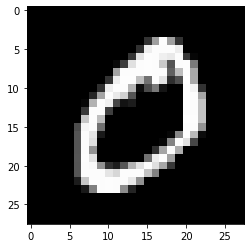

In [4]:
print(y_train[1])
plt.imshow(X_train[1], cmap='gray')
plt.show()

In [10]:
y_test.shape

(10000,)

In [11]:
def show_distribution(labels):
  # Convert tensor to a list.
  labels_list = list(labels)
  num_classes = len(set(labels_list))
  # Populate distribution list.
  distribution = [labels_list.count(i) for i in range(num_classes)]
  # Visualise.
  y_index = range(num_classes)
  plt.bar(y_index, distribution, align='center')
  plt.xticks(y_index, sorted(set(labels_list)))
  plt.ylabel('Frequency')
  plt.show()

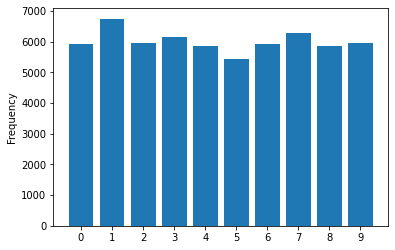

In [12]:
show_distribution(y_train)

In [40]:
# RESHAPE
input_shape = [28, 28, 1]

X_train = tf.reshape(X_train, [X_train.shape[0]] + input_shape)
X_test = tf.reshape(X_test, [X_test.shape[0]] + input_shape)

X_train = tf.cast(X_train, dtype=tf.float32)
X_test = tf.cast(X_test, dtype=tf.float32)

In [42]:
y_train = tf.reshape(y_train, [-1, 1])
y_test = tf.reshape(y_test, [-1, 1])

In [44]:
X_train /= 255
X_test /= 255

In [46]:
from sklearn.preprocessing import OneHotEncoder

# Set sparse to False in order to return an array.
encoder = OneHotEncoder(sparse=False)

y_train = tf.convert_to_tensor(encoder.fit_transform(y_train))
y_test = tf.convert_to_tensor(encoder.fit_transform(y_test))

C:\Users\samusilv\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\samusilv\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warnin

In [18]:
data_gen_args = dict( rotation_range=20,
                      width_shift_range=0.2,
                      height_shift_range=0.2,
                      shear_range=0.2,
                      zoom_range=0.2,
                      horizontal_flip=False,
                      vertical_flip=False,
                      fill_mode='nearest')

In [19]:
image_datagen = ImageDataGenerator(**data_gen_args)

In [20]:
seed = 1

In [32]:
image_datagen.fit(X_train, augment=True, seed=seed)

In [21]:
image_generator = image_datagen.flow(X_train,y_train,
    shuffle=True,
    sample_weight=None,
    seed=None,
    save_to_dir=None,
    save_prefix="",
    subset=None,
)

In [22]:
image_generator

In [ ]:
class MNISTModel(tf.keras.Model):
  def __init__(self):
    super(MNISTModel, self).__init__()
    # Declare Layers Individually.
    self.conv = tf.keras.layers.Conv2D(28, kernel_size=(3, 3), input_shape=input_shape)
    self.max_pool = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))
    self.flatten = tf.keras.layers.Flatten()
    self.fc1 = tf.keras.layers.Dense(128, activation=tf.nn.relu)
    self.fc1 = tf.keras.layers.Dense(256, activation=tf.nn.relu)
    self.fc2 = tf.keras.layers.Dense(10, activation=tf.nn.softmax)

  def call(self, inputs):
    t = self.conv(inputs)
    t = self.max_pool(t)
    t = self.flatten(t)
    t = self.fc1(t)
    return self.fc2(t)

In [25]:
from keras.models import Sequential
from keras.layers import Dense, InputLayer, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D
from keras.layers.normalization import BatchNormalization

In [26]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape=(28, 28, 1), activation = 'relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))

In [27]:
model.add(BatchNormalization())

In [28]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [29]:
model.add(Flatten())

In [30]:
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(units = 1024, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(units = 1024, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(units = 512, activation = 'relu')) 
model.add(Dropout(0.2))

In [35]:
model.add(Dense(units = 10, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [36]:
model.fit_generator(
    image_generator,
    steps_per_epoch=2000,
    epochs=30)

Epoch 1/30


 185/2000 [=>............................] - ETA: 26:07 - loss: 2.6632 - accuracy: 0.093 - ETA: 14:43 - loss: 2.8641 - accuracy: 0.140 - ETA: 10:47 - loss: 3.0833 - accuracy: 0.125 - ETA: 8:52 - loss: 2.9864 - accuracy: 0.125 - ETA: 7:43 - loss: 2.9268 - accuracy: 0.11 - ETA: 6:56 - loss: 2.8264 - accuracy: 0.13 - ETA: 6:22 - loss: 2.7637 - accuracy: 0.13 - ETA: 5:57 - loss: 2.7196 - accuracy: 0.12 - ETA: 5:37 - loss: 2.6870 - accuracy: 0.12 - ETA: 5:21 - loss: 2.6452 - accuracy: 0.12 - ETA: 5:08 - loss: 2.5984 - accuracy: 0.14 - ETA: 4:58 - loss: 2.5871 - accuracy: 0.15 - ETA: 4:50 - loss: 2.5932 - accuracy: 0.15 - ETA: 4:43 - loss: 2.5831 - accuracy: 0.16 - ETA: 4:36 - loss: 2.5590 - accuracy: 0.17 - ETA: 4:30 - loss: 2.5322 - accuracy: 0.17 - ETA: 4:25 - loss: 2.5228 - accuracy: 0.17 - ETA: 4:20 - loss: 2.5028 - accuracy: 0.17 - ETA: 4:15 - loss: 2.4848 - accuracy: 0.18 - ETA: 4:12 - loss: 2.4616 - accuracy: 0.19 - ETA: 4:08 - loss: 2.4387 - accuracy: 0.19 - ETA: 4:05 - loss: 2.4204

 371/2000 [====>.........................] - ETA: 2:57 - loss: 1.4357 - accuracy: 0.51 - ETA: 2:57 - loss: 1.4315 - accuracy: 0.51 - ETA: 2:57 - loss: 1.4290 - accuracy: 0.51 - ETA: 2:57 - loss: 1.4243 - accuracy: 0.51 - ETA: 2:57 - loss: 1.4230 - accuracy: 0.51 - ETA: 2:57 - loss: 1.4195 - accuracy: 0.51 - ETA: 2:57 - loss: 1.4166 - accuracy: 0.51 - ETA: 2:57 - loss: 1.4121 - accuracy: 0.51 - ETA: 2:57 - loss: 1.4097 - accuracy: 0.52 - ETA: 2:57 - loss: 1.4067 - accuracy: 0.52 - ETA: 2:57 - loss: 1.4052 - accuracy: 0.52 - ETA: 2:57 - loss: 1.4025 - accuracy: 0.52 - ETA: 2:57 - loss: 1.3983 - accuracy: 0.52 - ETA: 2:57 - loss: 1.3959 - accuracy: 0.52 - ETA: 2:56 - loss: 1.3925 - accuracy: 0.52 - ETA: 2:56 - loss: 1.3888 - accuracy: 0.52 - ETA: 2:56 - loss: 1.3852 - accuracy: 0.52 - ETA: 2:56 - loss: 1.3834 - accuracy: 0.52 - ETA: 2:56 - loss: 1.3797 - accuracy: 0.53 - ETA: 2:56 - loss: 1.3769 - accuracy: 0.53 - ETA: 2:56 - loss: 1.3733 - accuracy: 0.53 - ETA: 2:55 - loss: 1.3699 - accu

 557/2000 [=======>......................] - ETA: 2:42 - loss: 1.0801 - accuracy: 0.63 - ETA: 2:42 - loss: 1.0784 - accuracy: 0.63 - ETA: 2:42 - loss: 1.0766 - accuracy: 0.63 - ETA: 2:42 - loss: 1.0752 - accuracy: 0.63 - ETA: 2:42 - loss: 1.0741 - accuracy: 0.63 - ETA: 2:42 - loss: 1.0733 - accuracy: 0.64 - ETA: 2:42 - loss: 1.0727 - accuracy: 0.64 - ETA: 2:42 - loss: 1.0717 - accuracy: 0.64 - ETA: 2:41 - loss: 1.0705 - accuracy: 0.64 - ETA: 2:41 - loss: 1.0689 - accuracy: 0.64 - ETA: 2:41 - loss: 1.0674 - accuracy: 0.64 - ETA: 2:41 - loss: 1.0664 - accuracy: 0.64 - ETA: 2:41 - loss: 1.0651 - accuracy: 0.64 - ETA: 2:41 - loss: 1.0634 - accuracy: 0.64 - ETA: 2:41 - loss: 1.0622 - accuracy: 0.64 - ETA: 2:41 - loss: 1.0612 - accuracy: 0.64 - ETA: 2:41 - loss: 1.0603 - accuracy: 0.64 - ETA: 2:41 - loss: 1.0585 - accuracy: 0.64 - ETA: 2:41 - loss: 1.0569 - accuracy: 0.64 - ETA: 2:41 - loss: 1.0551 - accuracy: 0.64 - ETA: 2:41 - loss: 1.0537 - accuracy: 0.64 - ETA: 2:41 - loss: 1.0529 - accu

 743/2000 [==========>...................] - ETA: 2:22 - loss: 0.8948 - accuracy: 0.70 - ETA: 2:22 - loss: 0.8945 - accuracy: 0.70 - ETA: 2:22 - loss: 0.8938 - accuracy: 0.70 - ETA: 2:22 - loss: 0.8932 - accuracy: 0.70 - ETA: 2:22 - loss: 0.8923 - accuracy: 0.70 - ETA: 2:22 - loss: 0.8911 - accuracy: 0.70 - ETA: 2:22 - loss: 0.8898 - accuracy: 0.70 - ETA: 2:21 - loss: 0.8891 - accuracy: 0.70 - ETA: 2:21 - loss: 0.8884 - accuracy: 0.70 - ETA: 2:21 - loss: 0.8879 - accuracy: 0.70 - ETA: 2:21 - loss: 0.8875 - accuracy: 0.70 - ETA: 2:21 - loss: 0.8865 - accuracy: 0.70 - ETA: 2:21 - loss: 0.8858 - accuracy: 0.70 - ETA: 2:21 - loss: 0.8849 - accuracy: 0.70 - ETA: 2:21 - loss: 0.8841 - accuracy: 0.70 - ETA: 2:21 - loss: 0.8834 - accuracy: 0.71 - ETA: 2:20 - loss: 0.8832 - accuracy: 0.71 - ETA: 2:20 - loss: 0.8828 - accuracy: 0.71 - ETA: 2:20 - loss: 0.8823 - accuracy: 0.71 - ETA: 2:20 - loss: 0.8816 - accuracy: 0.71 - ETA: 2:20 - loss: 0.8807 - accuracy: 0.71 - ETA: 2:20 - loss: 0.8797 - accu

 929/2000 [============>.................] - ETA: 2:04 - loss: 0.7957 - accuracy: 0.74 - ETA: 2:04 - loss: 0.7955 - accuracy: 0.74 - ETA: 2:04 - loss: 0.7952 - accuracy: 0.74 - ETA: 2:04 - loss: 0.7944 - accuracy: 0.74 - ETA: 2:04 - loss: 0.7940 - accuracy: 0.74 - ETA: 2:04 - loss: 0.7936 - accuracy: 0.74 - ETA: 2:04 - loss: 0.7931 - accuracy: 0.74 - ETA: 2:04 - loss: 0.7924 - accuracy: 0.74 - ETA: 2:03 - loss: 0.7922 - accuracy: 0.74 - ETA: 2:03 - loss: 0.7914 - accuracy: 0.74 - ETA: 2:03 - loss: 0.7906 - accuracy: 0.74 - ETA: 2:03 - loss: 0.7900 - accuracy: 0.74 - ETA: 2:03 - loss: 0.7895 - accuracy: 0.74 - ETA: 2:03 - loss: 0.7892 - accuracy: 0.74 - ETA: 2:03 - loss: 0.7886 - accuracy: 0.74 - ETA: 2:03 - loss: 0.7882 - accuracy: 0.74 - ETA: 2:03 - loss: 0.7884 - accuracy: 0.74 - ETA: 2:02 - loss: 0.7881 - accuracy: 0.74 - ETA: 2:02 - loss: 0.7872 - accuracy: 0.74 - ETA: 2:02 - loss: 0.7868 - accuracy: 0.74 - ETA: 2:02 - loss: 0.7868 - accuracy: 0.74 - ETA: 2:02 - loss: 0.7861 - accu

1115/2000 [===============>..............] - ETA: 1:45 - loss: 0.7172 - accuracy: 0.76 - ETA: 1:45 - loss: 0.7168 - accuracy: 0.76 - ETA: 1:45 - loss: 0.7168 - accuracy: 0.76 - ETA: 1:45 - loss: 0.7167 - accuracy: 0.76 - ETA: 1:45 - loss: 0.7166 - accuracy: 0.76 - ETA: 1:45 - loss: 0.7163 - accuracy: 0.76 - ETA: 1:44 - loss: 0.7162 - accuracy: 0.76 - ETA: 1:44 - loss: 0.7158 - accuracy: 0.77 - ETA: 1:44 - loss: 0.7156 - accuracy: 0.77 - ETA: 1:44 - loss: 0.7153 - accuracy: 0.77 - ETA: 1:44 - loss: 0.7149 - accuracy: 0.77 - ETA: 1:44 - loss: 0.7146 - accuracy: 0.77 - ETA: 1:44 - loss: 0.7142 - accuracy: 0.77 - ETA: 1:44 - loss: 0.7140 - accuracy: 0.77 - ETA: 1:44 - loss: 0.7138 - accuracy: 0.77 - ETA: 1:43 - loss: 0.7134 - accuracy: 0.77 - ETA: 1:43 - loss: 0.7133 - accuracy: 0.77 - ETA: 1:43 - loss: 0.7133 - accuracy: 0.77 - ETA: 1:43 - loss: 0.7130 - accuracy: 0.77 - ETA: 1:43 - loss: 0.7125 - accuracy: 0.77 - ETA: 1:43 - loss: 0.7121 - accuracy: 0.77 - ETA: 1:43 - loss: 0.7117 - accu

1301/2000 [==================>...........] - ETA: 1:26 - loss: 0.6646 - accuracy: 0.78 - ETA: 1:26 - loss: 0.6641 - accuracy: 0.78 - ETA: 1:26 - loss: 0.6638 - accuracy: 0.78 - ETA: 1:25 - loss: 0.6634 - accuracy: 0.78 - ETA: 1:25 - loss: 0.6632 - accuracy: 0.78 - ETA: 1:25 - loss: 0.6628 - accuracy: 0.78 - ETA: 1:25 - loss: 0.6625 - accuracy: 0.78 - ETA: 1:25 - loss: 0.6621 - accuracy: 0.78 - ETA: 1:25 - loss: 0.6617 - accuracy: 0.78 - ETA: 1:25 - loss: 0.6613 - accuracy: 0.78 - ETA: 1:25 - loss: 0.6610 - accuracy: 0.78 - ETA: 1:25 - loss: 0.6611 - accuracy: 0.78 - ETA: 1:25 - loss: 0.6607 - accuracy: 0.78 - ETA: 1:24 - loss: 0.6604 - accuracy: 0.78 - ETA: 1:24 - loss: 0.6600 - accuracy: 0.78 - ETA: 1:24 - loss: 0.6597 - accuracy: 0.78 - ETA: 1:24 - loss: 0.6597 - accuracy: 0.78 - ETA: 1:24 - loss: 0.6594 - accuracy: 0.78 - ETA: 1:24 - loss: 0.6592 - accuracy: 0.78 - ETA: 1:24 - loss: 0.6590 - accuracy: 0.78 - ETA: 1:24 - loss: 0.6585 - accuracy: 0.78 - ETA: 1:24 - loss: 0.6582 - accu

1487/2000 [=====================>........] - ETA: 1:07 - loss: 0.6211 - accuracy: 0.80 - ETA: 1:07 - loss: 0.6208 - accuracy: 0.80 - ETA: 1:07 - loss: 0.6204 - accuracy: 0.80 - ETA: 1:07 - loss: 0.6202 - accuracy: 0.80 - ETA: 1:07 - loss: 0.6200 - accuracy: 0.80 - ETA: 1:07 - loss: 0.6199 - accuracy: 0.80 - ETA: 1:07 - loss: 0.6196 - accuracy: 0.80 - ETA: 1:07 - loss: 0.6193 - accuracy: 0.80 - ETA: 1:07 - loss: 0.6192 - accuracy: 0.80 - ETA: 1:06 - loss: 0.6188 - accuracy: 0.80 - ETA: 1:06 - loss: 0.6186 - accuracy: 0.80 - ETA: 1:06 - loss: 0.6184 - accuracy: 0.80 - ETA: 1:06 - loss: 0.6184 - accuracy: 0.80 - ETA: 1:06 - loss: 0.6182 - accuracy: 0.80 - ETA: 1:06 - loss: 0.6180 - accuracy: 0.80 - ETA: 1:06 - loss: 0.6178 - accuracy: 0.80 - ETA: 1:06 - loss: 0.6174 - accuracy: 0.80 - ETA: 1:06 - loss: 0.6172 - accuracy: 0.80 - ETA: 1:06 - loss: 0.6172 - accuracy: 0.80 - ETA: 1:06 - loss: 0.6169 - accuracy: 0.80 - ETA: 1:05 - loss: 0.6167 - accuracy: 0.80 - ETA: 1:05 - loss: 0.6165 - accu

1673/2000 [========================>.....] - ETA: 49s - loss: 0.5863 - accuracy: 0.815 - ETA: 49s - loss: 0.5861 - accuracy: 0.815 - ETA: 49s - loss: 0.5860 - accuracy: 0.815 - ETA: 49s - loss: 0.5858 - accuracy: 0.815 - ETA: 49s - loss: 0.5855 - accuracy: 0.815 - ETA: 49s - loss: 0.5855 - accuracy: 0.815 - ETA: 49s - loss: 0.5852 - accuracy: 0.815 - ETA: 48s - loss: 0.5852 - accuracy: 0.815 - ETA: 48s - loss: 0.5849 - accuracy: 0.815 - ETA: 48s - loss: 0.5848 - accuracy: 0.815 - ETA: 48s - loss: 0.5844 - accuracy: 0.815 - ETA: 48s - loss: 0.5846 - accuracy: 0.815 - ETA: 48s - loss: 0.5843 - accuracy: 0.815 - ETA: 48s - loss: 0.5842 - accuracy: 0.816 - ETA: 48s - loss: 0.5841 - accuracy: 0.816 - ETA: 48s - loss: 0.5840 - accuracy: 0.816 - ETA: 48s - loss: 0.5840 - accuracy: 0.816 - ETA: 47s - loss: 0.5838 - accuracy: 0.816 - ETA: 47s - loss: 0.5838 - accuracy: 0.816 - ETA: 47s - loss: 0.5837 - accuracy: 0.816 - ETA: 47s - loss: 0.5835 - accuracy: 0.816 - ETA: 47s - loss: 0.5833 - accur

1859/2000 [==========================>...] - ETA: 31s - loss: 0.5567 - accuracy: 0.825 - ETA: 31s - loss: 0.5565 - accuracy: 0.825 - ETA: 31s - loss: 0.5563 - accuracy: 0.825 - ETA: 31s - loss: 0.5560 - accuracy: 0.825 - ETA: 31s - loss: 0.5559 - accuracy: 0.825 - ETA: 30s - loss: 0.5557 - accuracy: 0.825 - ETA: 30s - loss: 0.5555 - accuracy: 0.825 - ETA: 30s - loss: 0.5553 - accuracy: 0.825 - ETA: 30s - loss: 0.5552 - accuracy: 0.825 - ETA: 30s - loss: 0.5550 - accuracy: 0.825 - ETA: 30s - loss: 0.5548 - accuracy: 0.826 - ETA: 30s - loss: 0.5546 - accuracy: 0.826 - ETA: 30s - loss: 0.5545 - accuracy: 0.826 - ETA: 30s - loss: 0.5544 - accuracy: 0.826 - ETA: 30s - loss: 0.5542 - accuracy: 0.826 - ETA: 29s - loss: 0.5540 - accuracy: 0.826 - ETA: 29s - loss: 0.5539 - accuracy: 0.826 - ETA: 29s - loss: 0.5537 - accuracy: 0.826 - ETA: 29s - loss: 0.5535 - accuracy: 0.826 - ETA: 29s - loss: 0.5534 - accuracy: 0.826 - ETA: 29s - loss: 0.5532 - accuracy: 0.826 - ETA: 29s - loss: 0.5529 - accur

2000/2000 [==============================] - ETA: 13s - loss: 0.5317 - accuracy: 0.834 - ETA: 13s - loss: 0.5314 - accuracy: 0.834 - ETA: 13s - loss: 0.5313 - accuracy: 0.834 - ETA: 13s - loss: 0.5313 - accuracy: 0.834 - ETA: 12s - loss: 0.5311 - accuracy: 0.834 - ETA: 12s - loss: 0.5308 - accuracy: 0.834 - ETA: 12s - loss: 0.5306 - accuracy: 0.834 - ETA: 12s - loss: 0.5305 - accuracy: 0.834 - ETA: 12s - loss: 0.5303 - accuracy: 0.834 - ETA: 12s - loss: 0.5301 - accuracy: 0.834 - ETA: 12s - loss: 0.5299 - accuracy: 0.834 - ETA: 12s - loss: 0.5297 - accuracy: 0.834 - ETA: 12s - loss: 0.5299 - accuracy: 0.834 - ETA: 12s - loss: 0.5297 - accuracy: 0.834 - ETA: 11s - loss: 0.5295 - accuracy: 0.834 - ETA: 11s - loss: 0.5293 - accuracy: 0.834 - ETA: 11s - loss: 0.5292 - accuracy: 0.834 - ETA: 11s - loss: 0.5290 - accuracy: 0.835 - ETA: 11s - loss: 0.5290 - accuracy: 0.835 - ETA: 11s - loss: 0.5290 - accuracy: 0.835 - ETA: 11s - loss: 0.5287 - accuracy: 0.835 - ETA: 11s - loss: 0.5285 - accur

 186/2000 [=>............................] - ETA: 2:53 - loss: 0.4206 - accuracy: 0.87 - ETA: 2:56 - loss: 0.3283 - accuracy: 0.90 - ETA: 3:02 - loss: 0.3608 - accuracy: 0.89 - ETA: 3:01 - loss: 0.3024 - accuracy: 0.91 - ETA: 3:00 - loss: 0.2700 - accuracy: 0.93 - ETA: 2:59 - loss: 0.2388 - accuracy: 0.94 - ETA: 3:01 - loss: 0.2312 - accuracy: 0.94 - ETA: 3:00 - loss: 0.2919 - accuracy: 0.94 - ETA: 3:00 - loss: 0.2930 - accuracy: 0.93 - ETA: 3:00 - loss: 0.3066 - accuracy: 0.93 - ETA: 2:59 - loss: 0.3057 - accuracy: 0.93 - ETA: 2:59 - loss: 0.3029 - accuracy: 0.93 - ETA: 2:58 - loss: 0.3019 - accuracy: 0.93 - ETA: 2:57 - loss: 0.2946 - accuracy: 0.92 - ETA: 2:56 - loss: 0.2855 - accuracy: 0.92 - ETA: 2:55 - loss: 0.2831 - accuracy: 0.92 - ETA: 2:54 - loss: 0.2924 - accuracy: 0.92 - ETA: 2:53 - loss: 0.2962 - accuracy: 0.92 - ETA: 2:53 - loss: 0.2830 - accuracy: 0.92 - ETA: 2:52 - loss: 0.2842 - accuracy: 0.92 - ETA: 2:50 - loss: 0.2891 - accuracy: 0.92 - ETA: 2:50 - loss: 0.2920 - accu

 372/2000 [====>.........................] - ETA: 2:42 - loss: 0.2949 - accuracy: 0.91 - ETA: 2:42 - loss: 0.2949 - accuracy: 0.91 - ETA: 2:42 - loss: 0.2944 - accuracy: 0.91 - ETA: 2:42 - loss: 0.2945 - accuracy: 0.91 - ETA: 2:42 - loss: 0.2936 - accuracy: 0.91 - ETA: 2:43 - loss: 0.2948 - accuracy: 0.91 - ETA: 2:42 - loss: 0.2955 - accuracy: 0.91 - ETA: 2:43 - loss: 0.2944 - accuracy: 0.91 - ETA: 2:43 - loss: 0.2944 - accuracy: 0.91 - ETA: 2:43 - loss: 0.2947 - accuracy: 0.91 - ETA: 2:43 - loss: 0.2948 - accuracy: 0.91 - ETA: 2:43 - loss: 0.2944 - accuracy: 0.91 - ETA: 2:43 - loss: 0.2940 - accuracy: 0.91 - ETA: 2:42 - loss: 0.2939 - accuracy: 0.91 - ETA: 2:42 - loss: 0.2946 - accuracy: 0.91 - ETA: 2:42 - loss: 0.2962 - accuracy: 0.91 - ETA: 2:42 - loss: 0.2967 - accuracy: 0.91 - ETA: 2:42 - loss: 0.2967 - accuracy: 0.91 - ETA: 2:43 - loss: 0.2957 - accuracy: 0.91 - ETA: 2:43 - loss: 0.2955 - accuracy: 0.91 - ETA: 2:43 - loss: 0.2962 - accuracy: 0.91 - ETA: 2:42 - loss: 0.2978 - accu

 558/2000 [=======>......................] - ETA: 2:31 - loss: 0.2933 - accuracy: 0.91 - ETA: 2:31 - loss: 0.2933 - accuracy: 0.91 - ETA: 2:31 - loss: 0.2932 - accuracy: 0.91 - ETA: 2:31 - loss: 0.2949 - accuracy: 0.91 - ETA: 2:30 - loss: 0.2946 - accuracy: 0.91 - ETA: 2:30 - loss: 0.2953 - accuracy: 0.91 - ETA: 2:30 - loss: 0.2956 - accuracy: 0.91 - ETA: 2:30 - loss: 0.2965 - accuracy: 0.91 - ETA: 2:30 - loss: 0.2967 - accuracy: 0.91 - ETA: 2:30 - loss: 0.2963 - accuracy: 0.91 - ETA: 2:30 - loss: 0.2963 - accuracy: 0.91 - ETA: 2:30 - loss: 0.2958 - accuracy: 0.91 - ETA: 2:30 - loss: 0.2952 - accuracy: 0.91 - ETA: 2:30 - loss: 0.2954 - accuracy: 0.91 - ETA: 2:29 - loss: 0.2952 - accuracy: 0.91 - ETA: 2:29 - loss: 0.2946 - accuracy: 0.91 - ETA: 2:29 - loss: 0.2950 - accuracy: 0.91 - ETA: 2:29 - loss: 0.2949 - accuracy: 0.91 - ETA: 2:29 - loss: 0.2948 - accuracy: 0.91 - ETA: 2:29 - loss: 0.2952 - accuracy: 0.91 - ETA: 2:29 - loss: 0.2956 - accuracy: 0.91 - ETA: 2:29 - loss: 0.2955 - accu

 744/2000 [==========>...................] - ETA: 2:15 - loss: 0.2919 - accuracy: 0.91 - ETA: 2:15 - loss: 0.2916 - accuracy: 0.91 - ETA: 2:15 - loss: 0.2920 - accuracy: 0.91 - ETA: 2:14 - loss: 0.2916 - accuracy: 0.91 - ETA: 2:14 - loss: 0.2918 - accuracy: 0.91 - ETA: 2:14 - loss: 0.2917 - accuracy: 0.91 - ETA: 2:14 - loss: 0.2915 - accuracy: 0.91 - ETA: 2:14 - loss: 0.2914 - accuracy: 0.91 - ETA: 2:14 - loss: 0.2915 - accuracy: 0.91 - ETA: 2:14 - loss: 0.2917 - accuracy: 0.91 - ETA: 2:14 - loss: 0.2913 - accuracy: 0.91 - ETA: 2:14 - loss: 0.2914 - accuracy: 0.91 - ETA: 2:14 - loss: 0.2915 - accuracy: 0.91 - ETA: 2:13 - loss: 0.2911 - accuracy: 0.91 - ETA: 2:13 - loss: 0.2914 - accuracy: 0.91 - ETA: 2:13 - loss: 0.2919 - accuracy: 0.91 - ETA: 2:13 - loss: 0.2920 - accuracy: 0.91 - ETA: 2:13 - loss: 0.2920 - accuracy: 0.91 - ETA: 2:13 - loss: 0.2920 - accuracy: 0.91 - ETA: 2:13 - loss: 0.2919 - accuracy: 0.91 - ETA: 2:13 - loss: 0.2922 - accuracy: 0.91 - ETA: 2:13 - loss: 0.2922 - accu

 930/2000 [============>.................] - ETA: 2:00 - loss: 0.2914 - accuracy: 0.91 - ETA: 2:00 - loss: 0.2914 - accuracy: 0.91 - ETA: 2:00 - loss: 0.2915 - accuracy: 0.91 - ETA: 2:00 - loss: 0.2915 - accuracy: 0.91 - ETA: 2:00 - loss: 0.2914 - accuracy: 0.91 - ETA: 2:00 - loss: 0.2914 - accuracy: 0.91 - ETA: 2:00 - loss: 0.2915 - accuracy: 0.91 - ETA: 2:00 - loss: 0.2915 - accuracy: 0.91 - ETA: 2:00 - loss: 0.2914 - accuracy: 0.91 - ETA: 2:00 - loss: 0.2911 - accuracy: 0.91 - ETA: 2:00 - loss: 0.2912 - accuracy: 0.91 - ETA: 2:00 - loss: 0.2909 - accuracy: 0.91 - ETA: 1:59 - loss: 0.2911 - accuracy: 0.91 - ETA: 1:59 - loss: 0.2911 - accuracy: 0.91 - ETA: 1:59 - loss: 0.2912 - accuracy: 0.91 - ETA: 1:59 - loss: 0.2914 - accuracy: 0.91 - ETA: 1:59 - loss: 0.2912 - accuracy: 0.91 - ETA: 1:59 - loss: 0.2909 - accuracy: 0.91 - ETA: 1:59 - loss: 0.2914 - accuracy: 0.91 - ETA: 1:59 - loss: 0.2913 - accuracy: 0.91 - ETA: 1:59 - loss: 0.2916 - accuracy: 0.91 - ETA: 1:58 - loss: 0.2915 - accu

1116/2000 [===============>..............] - ETA: 1:42 - loss: 0.2883 - accuracy: 0.91 - ETA: 1:42 - loss: 0.2888 - accuracy: 0.91 - ETA: 1:42 - loss: 0.2886 - accuracy: 0.91 - ETA: 1:42 - loss: 0.2886 - accuracy: 0.91 - ETA: 1:42 - loss: 0.2886 - accuracy: 0.91 - ETA: 1:42 - loss: 0.2885 - accuracy: 0.91 - ETA: 1:42 - loss: 0.2887 - accuracy: 0.91 - ETA: 1:42 - loss: 0.2886 - accuracy: 0.91 - ETA: 1:42 - loss: 0.2886 - accuracy: 0.91 - ETA: 1:41 - loss: 0.2891 - accuracy: 0.91 - ETA: 1:41 - loss: 0.2889 - accuracy: 0.91 - ETA: 1:41 - loss: 0.2888 - accuracy: 0.91 - ETA: 1:41 - loss: 0.2888 - accuracy: 0.91 - ETA: 1:41 - loss: 0.2888 - accuracy: 0.91 - ETA: 1:41 - loss: 0.2887 - accuracy: 0.91 - ETA: 1:41 - loss: 0.2892 - accuracy: 0.91 - ETA: 1:41 - loss: 0.2900 - accuracy: 0.91 - ETA: 1:41 - loss: 0.2901 - accuracy: 0.91 - ETA: 1:41 - loss: 0.2901 - accuracy: 0.91 - ETA: 1:41 - loss: 0.2905 - accuracy: 0.91 - ETA: 1:40 - loss: 0.2903 - accuracy: 0.91 - ETA: 1:40 - loss: 0.2906 - accu

1302/2000 [==================>...........] - ETA: 1:25 - loss: 0.2887 - accuracy: 0.91 - ETA: 1:24 - loss: 0.2886 - accuracy: 0.91 - ETA: 1:24 - loss: 0.2886 - accuracy: 0.91 - ETA: 1:24 - loss: 0.2887 - accuracy: 0.91 - ETA: 1:24 - loss: 0.2885 - accuracy: 0.91 - ETA: 1:24 - loss: 0.2886 - accuracy: 0.91 - ETA: 1:24 - loss: 0.2885 - accuracy: 0.91 - ETA: 1:24 - loss: 0.2890 - accuracy: 0.91 - ETA: 1:24 - loss: 0.2890 - accuracy: 0.91 - ETA: 1:24 - loss: 0.2893 - accuracy: 0.91 - ETA: 1:24 - loss: 0.2893 - accuracy: 0.91 - ETA: 1:23 - loss: 0.2892 - accuracy: 0.91 - ETA: 1:23 - loss: 0.2892 - accuracy: 0.91 - ETA: 1:23 - loss: 0.2894 - accuracy: 0.91 - ETA: 1:23 - loss: 0.2892 - accuracy: 0.91 - ETA: 1:23 - loss: 0.2892 - accuracy: 0.91 - ETA: 1:23 - loss: 0.2891 - accuracy: 0.91 - ETA: 1:23 - loss: 0.2891 - accuracy: 0.91 - ETA: 1:23 - loss: 0.2890 - accuracy: 0.91 - ETA: 1:23 - loss: 0.2889 - accuracy: 0.91 - ETA: 1:23 - loss: 0.2890 - accuracy: 0.91 - ETA: 1:22 - loss: 0.2889 - accu

1488/2000 [=====================>........] - ETA: 1:06 - loss: 0.2842 - accuracy: 0.92 - ETA: 1:06 - loss: 0.2841 - accuracy: 0.92 - ETA: 1:06 - loss: 0.2840 - accuracy: 0.92 - ETA: 1:06 - loss: 0.2844 - accuracy: 0.92 - ETA: 1:05 - loss: 0.2846 - accuracy: 0.92 - ETA: 1:05 - loss: 0.2844 - accuracy: 0.92 - ETA: 1:05 - loss: 0.2842 - accuracy: 0.92 - ETA: 1:05 - loss: 0.2842 - accuracy: 0.92 - ETA: 1:05 - loss: 0.2842 - accuracy: 0.92 - ETA: 1:05 - loss: 0.2843 - accuracy: 0.92 - ETA: 1:05 - loss: 0.2842 - accuracy: 0.92 - ETA: 1:05 - loss: 0.2841 - accuracy: 0.92 - ETA: 1:05 - loss: 0.2840 - accuracy: 0.92 - ETA: 1:05 - loss: 0.2840 - accuracy: 0.92 - ETA: 1:05 - loss: 0.2839 - accuracy: 0.92 - ETA: 1:04 - loss: 0.2837 - accuracy: 0.92 - ETA: 1:04 - loss: 0.2836 - accuracy: 0.92 - ETA: 1:04 - loss: 0.2838 - accuracy: 0.92 - ETA: 1:04 - loss: 0.2840 - accuracy: 0.92 - ETA: 1:04 - loss: 0.2839 - accuracy: 0.92 - ETA: 1:04 - loss: 0.2839 - accuracy: 0.92 - ETA: 1:04 - loss: 0.2839 - accu

1674/2000 [========================>.....] - ETA: 48s - loss: 0.2801 - accuracy: 0.921 - ETA: 48s - loss: 0.2800 - accuracy: 0.921 - ETA: 48s - loss: 0.2798 - accuracy: 0.921 - ETA: 48s - loss: 0.2799 - accuracy: 0.921 - ETA: 48s - loss: 0.2799 - accuracy: 0.921 - ETA: 48s - loss: 0.2800 - accuracy: 0.921 - ETA: 47s - loss: 0.2802 - accuracy: 0.921 - ETA: 47s - loss: 0.2801 - accuracy: 0.921 - ETA: 47s - loss: 0.2802 - accuracy: 0.921 - ETA: 47s - loss: 0.2804 - accuracy: 0.921 - ETA: 47s - loss: 0.2802 - accuracy: 0.921 - ETA: 47s - loss: 0.2801 - accuracy: 0.921 - ETA: 47s - loss: 0.2800 - accuracy: 0.921 - ETA: 47s - loss: 0.2799 - accuracy: 0.921 - ETA: 47s - loss: 0.2798 - accuracy: 0.921 - ETA: 47s - loss: 0.2797 - accuracy: 0.921 - ETA: 46s - loss: 0.2798 - accuracy: 0.921 - ETA: 46s - loss: 0.2797 - accuracy: 0.921 - ETA: 46s - loss: 0.2795 - accuracy: 0.921 - ETA: 46s - loss: 0.2797 - accuracy: 0.921 - ETA: 46s - loss: 0.2796 - accuracy: 0.921 - ETA: 46s - loss: 0.2798 - accur

1860/2000 [==========================>...] - ETA: 30s - loss: 0.2781 - accuracy: 0.922 - ETA: 30s - loss: 0.2782 - accuracy: 0.922 - ETA: 30s - loss: 0.2781 - accuracy: 0.922 - ETA: 30s - loss: 0.2782 - accuracy: 0.922 - ETA: 30s - loss: 0.2781 - accuracy: 0.922 - ETA: 30s - loss: 0.2783 - accuracy: 0.922 - ETA: 30s - loss: 0.2782 - accuracy: 0.922 - ETA: 30s - loss: 0.2781 - accuracy: 0.922 - ETA: 29s - loss: 0.2780 - accuracy: 0.922 - ETA: 29s - loss: 0.2779 - accuracy: 0.922 - ETA: 29s - loss: 0.2779 - accuracy: 0.922 - ETA: 29s - loss: 0.2781 - accuracy: 0.922 - ETA: 29s - loss: 0.2780 - accuracy: 0.922 - ETA: 29s - loss: 0.2780 - accuracy: 0.922 - ETA: 29s - loss: 0.2780 - accuracy: 0.922 - ETA: 29s - loss: 0.2779 - accuracy: 0.922 - ETA: 29s - loss: 0.2778 - accuracy: 0.922 - ETA: 29s - loss: 0.2777 - accuracy: 0.922 - ETA: 29s - loss: 0.2777 - accuracy: 0.922 - ETA: 28s - loss: 0.2777 - accuracy: 0.922 - ETA: 28s - loss: 0.2776 - accuracy: 0.922 - ETA: 28s - loss: 0.2774 - accur

2000/2000 [==============================] - ETA: 13s - loss: 0.2761 - accuracy: 0.922 - ETA: 12s - loss: 0.2760 - accuracy: 0.922 - ETA: 12s - loss: 0.2759 - accuracy: 0.922 - ETA: 12s - loss: 0.2759 - accuracy: 0.922 - ETA: 12s - loss: 0.2761 - accuracy: 0.922 - ETA: 12s - loss: 0.2761 - accuracy: 0.922 - ETA: 12s - loss: 0.2760 - accuracy: 0.922 - ETA: 12s - loss: 0.2760 - accuracy: 0.922 - ETA: 12s - loss: 0.2760 - accuracy: 0.922 - ETA: 12s - loss: 0.2759 - accuracy: 0.922 - ETA: 12s - loss: 0.2758 - accuracy: 0.922 - ETA: 12s - loss: 0.2760 - accuracy: 0.922 - ETA: 11s - loss: 0.2759 - accuracy: 0.922 - ETA: 11s - loss: 0.2758 - accuracy: 0.922 - ETA: 11s - loss: 0.2760 - accuracy: 0.922 - ETA: 11s - loss: 0.2759 - accuracy: 0.922 - ETA: 11s - loss: 0.2760 - accuracy: 0.922 - ETA: 11s - loss: 0.2761 - accuracy: 0.922 - ETA: 11s - loss: 0.2760 - accuracy: 0.922 - ETA: 11s - loss: 0.2760 - accuracy: 0.922 - ETA: 11s - loss: 0.2760 - accuracy: 0.922 - ETA: 11s - loss: 0.2759 - accur

 186/2000 [=>............................] - ETA: 3:01 - loss: 0.0443 - accuracy: 1.00 - ETA: 3:16 - loss: 0.1320 - accuracy: 0.95 - ETA: 3:15 - loss: 0.1767 - accuracy: 0.92 - ETA: 3:16 - loss: 0.1859 - accuracy: 0.92 - ETA: 3:12 - loss: 0.2671 - accuracy: 0.91 - ETA: 3:14 - loss: 0.2529 - accuracy: 0.92 - ETA: 3:14 - loss: 0.2591 - accuracy: 0.91 - ETA: 3:13 - loss: 0.2523 - accuracy: 0.92 - ETA: 3:14 - loss: 0.2311 - accuracy: 0.93 - ETA: 3:16 - loss: 0.2311 - accuracy: 0.93 - ETA: 3:17 - loss: 0.2228 - accuracy: 0.93 - ETA: 3:19 - loss: 0.2066 - accuracy: 0.94 - ETA: 3:21 - loss: 0.2083 - accuracy: 0.94 - ETA: 3:23 - loss: 0.2154 - accuracy: 0.94 - ETA: 3:23 - loss: 0.2187 - accuracy: 0.94 - ETA: 3:23 - loss: 0.2129 - accuracy: 0.94 - ETA: 3:22 - loss: 0.2101 - accuracy: 0.94 - ETA: 3:23 - loss: 0.2182 - accuracy: 0.94 - ETA: 3:23 - loss: 0.2198 - accuracy: 0.94 - ETA: 3:23 - loss: 0.2214 - accuracy: 0.94 - ETA: 3:22 - loss: 0.2129 - accuracy: 0.94 - ETA: 3:22 - loss: 0.2208 - accu

 372/2000 [====>.........................] - ETA: 2:55 - loss: 0.2607 - accuracy: 0.93 - ETA: 2:54 - loss: 0.2599 - accuracy: 0.93 - ETA: 2:54 - loss: 0.2605 - accuracy: 0.93 - ETA: 2:54 - loss: 0.2599 - accuracy: 0.93 - ETA: 2:54 - loss: 0.2590 - accuracy: 0.93 - ETA: 2:53 - loss: 0.2583 - accuracy: 0.93 - ETA: 2:53 - loss: 0.2581 - accuracy: 0.93 - ETA: 2:53 - loss: 0.2573 - accuracy: 0.93 - ETA: 2:53 - loss: 0.2563 - accuracy: 0.93 - ETA: 2:53 - loss: 0.2561 - accuracy: 0.93 - ETA: 2:53 - loss: 0.2556 - accuracy: 0.93 - ETA: 2:52 - loss: 0.2554 - accuracy: 0.93 - ETA: 2:52 - loss: 0.2548 - accuracy: 0.93 - ETA: 2:52 - loss: 0.2541 - accuracy: 0.93 - ETA: 2:52 - loss: 0.2538 - accuracy: 0.93 - ETA: 2:52 - loss: 0.2533 - accuracy: 0.93 - ETA: 2:51 - loss: 0.2524 - accuracy: 0.93 - ETA: 2:51 - loss: 0.2538 - accuracy: 0.93 - ETA: 2:51 - loss: 0.2533 - accuracy: 0.93 - ETA: 2:51 - loss: 0.2529 - accuracy: 0.93 - ETA: 2:51 - loss: 0.2528 - accuracy: 0.93 - ETA: 2:51 - loss: 0.2530 - accu

 558/2000 [=======>......................] - ETA: 2:30 - loss: 0.2424 - accuracy: 0.93 - ETA: 2:30 - loss: 0.2425 - accuracy: 0.93 - ETA: 2:30 - loss: 0.2423 - accuracy: 0.93 - ETA: 2:30 - loss: 0.2430 - accuracy: 0.93 - ETA: 2:30 - loss: 0.2424 - accuracy: 0.93 - ETA: 2:30 - loss: 0.2443 - accuracy: 0.93 - ETA: 2:30 - loss: 0.2438 - accuracy: 0.93 - ETA: 2:30 - loss: 0.2433 - accuracy: 0.93 - ETA: 2:29 - loss: 0.2434 - accuracy: 0.93 - ETA: 2:29 - loss: 0.2445 - accuracy: 0.93 - ETA: 2:29 - loss: 0.2443 - accuracy: 0.93 - ETA: 2:29 - loss: 0.2441 - accuracy: 0.93 - ETA: 2:29 - loss: 0.2441 - accuracy: 0.93 - ETA: 2:29 - loss: 0.2449 - accuracy: 0.93 - ETA: 2:29 - loss: 0.2455 - accuracy: 0.93 - ETA: 2:29 - loss: 0.2456 - accuracy: 0.93 - ETA: 2:28 - loss: 0.2450 - accuracy: 0.93 - ETA: 2:28 - loss: 0.2452 - accuracy: 0.93 - ETA: 2:28 - loss: 0.2449 - accuracy: 0.93 - ETA: 2:28 - loss: 0.2449 - accuracy: 0.93 - ETA: 2:28 - loss: 0.2452 - accuracy: 0.93 - ETA: 2:28 - loss: 0.2448 - accu

 744/2000 [==========>...................] - ETA: 2:12 - loss: 0.2429 - accuracy: 0.93 - ETA: 2:12 - loss: 0.2426 - accuracy: 0.93 - ETA: 2:12 - loss: 0.2428 - accuracy: 0.93 - ETA: 2:12 - loss: 0.2425 - accuracy: 0.93 - ETA: 2:12 - loss: 0.2422 - accuracy: 0.93 - ETA: 2:12 - loss: 0.2424 - accuracy: 0.93 - ETA: 2:11 - loss: 0.2427 - accuracy: 0.93 - ETA: 2:11 - loss: 0.2424 - accuracy: 0.93 - ETA: 2:11 - loss: 0.2432 - accuracy: 0.93 - ETA: 2:11 - loss: 0.2435 - accuracy: 0.93 - ETA: 2:11 - loss: 0.2437 - accuracy: 0.93 - ETA: 2:11 - loss: 0.2439 - accuracy: 0.93 - ETA: 2:11 - loss: 0.2444 - accuracy: 0.93 - ETA: 2:11 - loss: 0.2443 - accuracy: 0.93 - ETA: 2:11 - loss: 0.2440 - accuracy: 0.93 - ETA: 2:11 - loss: 0.2436 - accuracy: 0.93 - ETA: 2:11 - loss: 0.2434 - accuracy: 0.93 - ETA: 2:10 - loss: 0.2434 - accuracy: 0.93 - ETA: 2:10 - loss: 0.2433 - accuracy: 0.93 - ETA: 2:10 - loss: 0.2431 - accuracy: 0.93 - ETA: 2:10 - loss: 0.2437 - accuracy: 0.93 - ETA: 2:10 - loss: 0.2438 - accu

 930/2000 [============>.................] - ETA: 1:55 - loss: 0.2453 - accuracy: 0.93 - ETA: 1:55 - loss: 0.2452 - accuracy: 0.93 - ETA: 1:55 - loss: 0.2450 - accuracy: 0.93 - ETA: 1:54 - loss: 0.2449 - accuracy: 0.93 - ETA: 1:54 - loss: 0.2452 - accuracy: 0.93 - ETA: 1:54 - loss: 0.2452 - accuracy: 0.93 - ETA: 1:54 - loss: 0.2450 - accuracy: 0.93 - ETA: 1:54 - loss: 0.2448 - accuracy: 0.93 - ETA: 1:54 - loss: 0.2447 - accuracy: 0.93 - ETA: 1:54 - loss: 0.2449 - accuracy: 0.93 - ETA: 1:54 - loss: 0.2449 - accuracy: 0.93 - ETA: 1:54 - loss: 0.2452 - accuracy: 0.93 - ETA: 1:54 - loss: 0.2452 - accuracy: 0.93 - ETA: 1:53 - loss: 0.2452 - accuracy: 0.93 - ETA: 1:53 - loss: 0.2450 - accuracy: 0.93 - ETA: 1:53 - loss: 0.2449 - accuracy: 0.93 - ETA: 1:53 - loss: 0.2448 - accuracy: 0.93 - ETA: 1:53 - loss: 0.2452 - accuracy: 0.93 - ETA: 1:53 - loss: 0.2451 - accuracy: 0.93 - ETA: 1:53 - loss: 0.2448 - accuracy: 0.93 - ETA: 1:53 - loss: 0.2446 - accuracy: 0.93 - ETA: 1:53 - loss: 0.2446 - accu

1116/2000 [===============>..............] - ETA: 1:37 - loss: 0.2426 - accuracy: 0.93 - ETA: 1:37 - loss: 0.2424 - accuracy: 0.93 - ETA: 1:37 - loss: 0.2423 - accuracy: 0.93 - ETA: 1:37 - loss: 0.2421 - accuracy: 0.93 - ETA: 1:37 - loss: 0.2421 - accuracy: 0.93 - ETA: 1:37 - loss: 0.2422 - accuracy: 0.93 - ETA: 1:37 - loss: 0.2422 - accuracy: 0.93 - ETA: 1:37 - loss: 0.2422 - accuracy: 0.93 - ETA: 1:37 - loss: 0.2422 - accuracy: 0.93 - ETA: 1:37 - loss: 0.2422 - accuracy: 0.93 - ETA: 1:37 - loss: 0.2423 - accuracy: 0.93 - ETA: 1:36 - loss: 0.2424 - accuracy: 0.93 - ETA: 1:36 - loss: 0.2424 - accuracy: 0.93 - ETA: 1:36 - loss: 0.2423 - accuracy: 0.93 - ETA: 1:36 - loss: 0.2422 - accuracy: 0.93 - ETA: 1:36 - loss: 0.2421 - accuracy: 0.93 - ETA: 1:36 - loss: 0.2419 - accuracy: 0.93 - ETA: 1:36 - loss: 0.2420 - accuracy: 0.93 - ETA: 1:36 - loss: 0.2418 - accuracy: 0.93 - ETA: 1:36 - loss: 0.2417 - accuracy: 0.93 - ETA: 1:36 - loss: 0.2416 - accuracy: 0.93 - ETA: 1:36 - loss: 0.2415 - accu

1302/2000 [==================>...........] - ETA: 1:20 - loss: 0.2421 - accuracy: 0.93 - ETA: 1:20 - loss: 0.2419 - accuracy: 0.93 - ETA: 1:20 - loss: 0.2419 - accuracy: 0.93 - ETA: 1:20 - loss: 0.2419 - accuracy: 0.93 - ETA: 1:20 - loss: 0.2424 - accuracy: 0.93 - ETA: 1:20 - loss: 0.2424 - accuracy: 0.93 - ETA: 1:20 - loss: 0.2425 - accuracy: 0.93 - ETA: 1:20 - loss: 0.2426 - accuracy: 0.93 - ETA: 1:20 - loss: 0.2428 - accuracy: 0.93 - ETA: 1:20 - loss: 0.2428 - accuracy: 0.93 - ETA: 1:20 - loss: 0.2430 - accuracy: 0.93 - ETA: 1:19 - loss: 0.2430 - accuracy: 0.93 - ETA: 1:19 - loss: 0.2433 - accuracy: 0.93 - ETA: 1:19 - loss: 0.2433 - accuracy: 0.93 - ETA: 1:19 - loss: 0.2433 - accuracy: 0.93 - ETA: 1:19 - loss: 0.2432 - accuracy: 0.93 - ETA: 1:19 - loss: 0.2431 - accuracy: 0.93 - ETA: 1:19 - loss: 0.2432 - accuracy: 0.93 - ETA: 1:19 - loss: 0.2433 - accuracy: 0.93 - ETA: 1:19 - loss: 0.2436 - accuracy: 0.93 - ETA: 1:19 - loss: 0.2435 - accuracy: 0.93 - ETA: 1:19 - loss: 0.2438 - accu

1488/2000 [=====================>........] - ETA: 1:04 - loss: 0.2391 - accuracy: 0.93 - ETA: 1:04 - loss: 0.2390 - accuracy: 0.93 - ETA: 1:04 - loss: 0.2389 - accuracy: 0.93 - ETA: 1:04 - loss: 0.2389 - accuracy: 0.93 - ETA: 1:04 - loss: 0.2388 - accuracy: 0.93 - ETA: 1:03 - loss: 0.2389 - accuracy: 0.93 - ETA: 1:03 - loss: 0.2388 - accuracy: 0.93 - ETA: 1:03 - loss: 0.2386 - accuracy: 0.93 - ETA: 1:03 - loss: 0.2388 - accuracy: 0.93 - ETA: 1:03 - loss: 0.2389 - accuracy: 0.93 - ETA: 1:03 - loss: 0.2394 - accuracy: 0.93 - ETA: 1:03 - loss: 0.2393 - accuracy: 0.93 - ETA: 1:03 - loss: 0.2392 - accuracy: 0.93 - ETA: 1:03 - loss: 0.2392 - accuracy: 0.93 - ETA: 1:03 - loss: 0.2391 - accuracy: 0.93 - ETA: 1:02 - loss: 0.2392 - accuracy: 0.93 - ETA: 1:02 - loss: 0.2393 - accuracy: 0.93 - ETA: 1:02 - loss: 0.2392 - accuracy: 0.93 - ETA: 1:02 - loss: 0.2390 - accuracy: 0.93 - ETA: 1:02 - loss: 0.2392 - accuracy: 0.93 - ETA: 1:02 - loss: 0.2391 - accuracy: 0.93 - ETA: 1:02 - loss: 0.2391 - accu

1674/2000 [========================>.....] - ETA: 47s - loss: 0.2378 - accuracy: 0.936 - ETA: 47s - loss: 0.2378 - accuracy: 0.936 - ETA: 47s - loss: 0.2377 - accuracy: 0.936 - ETA: 47s - loss: 0.2376 - accuracy: 0.936 - ETA: 46s - loss: 0.2381 - accuracy: 0.936 - ETA: 46s - loss: 0.2380 - accuracy: 0.936 - ETA: 46s - loss: 0.2380 - accuracy: 0.936 - ETA: 46s - loss: 0.2383 - accuracy: 0.936 - ETA: 46s - loss: 0.2384 - accuracy: 0.936 - ETA: 46s - loss: 0.2385 - accuracy: 0.936 - ETA: 46s - loss: 0.2384 - accuracy: 0.936 - ETA: 46s - loss: 0.2383 - accuracy: 0.936 - ETA: 46s - loss: 0.2382 - accuracy: 0.936 - ETA: 46s - loss: 0.2381 - accuracy: 0.936 - ETA: 45s - loss: 0.2380 - accuracy: 0.936 - ETA: 45s - loss: 0.2383 - accuracy: 0.936 - ETA: 45s - loss: 0.2383 - accuracy: 0.936 - ETA: 45s - loss: 0.2385 - accuracy: 0.936 - ETA: 45s - loss: 0.2384 - accuracy: 0.936 - ETA: 45s - loss: 0.2383 - accuracy: 0.936 - ETA: 45s - loss: 0.2382 - accuracy: 0.936 - ETA: 45s - loss: 0.2382 - accur

1860/2000 [==========================>...] - ETA: 30s - loss: 0.2358 - accuracy: 0.937 - ETA: 29s - loss: 0.2359 - accuracy: 0.937 - ETA: 29s - loss: 0.2358 - accuracy: 0.937 - ETA: 29s - loss: 0.2358 - accuracy: 0.937 - ETA: 29s - loss: 0.2357 - accuracy: 0.937 - ETA: 29s - loss: 0.2356 - accuracy: 0.937 - ETA: 29s - loss: 0.2355 - accuracy: 0.937 - ETA: 29s - loss: 0.2355 - accuracy: 0.937 - ETA: 29s - loss: 0.2354 - accuracy: 0.937 - ETA: 29s - loss: 0.2354 - accuracy: 0.937 - ETA: 29s - loss: 0.2354 - accuracy: 0.937 - ETA: 29s - loss: 0.2354 - accuracy: 0.937 - ETA: 28s - loss: 0.2354 - accuracy: 0.937 - ETA: 28s - loss: 0.2355 - accuracy: 0.937 - ETA: 28s - loss: 0.2354 - accuracy: 0.937 - ETA: 28s - loss: 0.2356 - accuracy: 0.937 - ETA: 28s - loss: 0.2357 - accuracy: 0.937 - ETA: 28s - loss: 0.2358 - accuracy: 0.937 - ETA: 28s - loss: 0.2360 - accuracy: 0.937 - ETA: 28s - loss: 0.2361 - accuracy: 0.937 - ETA: 28s - loss: 0.2363 - accuracy: 0.937 - ETA: 28s - loss: 0.2362 - accur

2000/2000 [==============================] - ETA: 12s - loss: 0.2365 - accuracy: 0.937 - ETA: 12s - loss: 0.2367 - accuracy: 0.937 - ETA: 12s - loss: 0.2366 - accuracy: 0.937 - ETA: 12s - loss: 0.2368 - accuracy: 0.937 - ETA: 12s - loss: 0.2367 - accuracy: 0.937 - ETA: 12s - loss: 0.2366 - accuracy: 0.937 - ETA: 12s - loss: 0.2365 - accuracy: 0.937 - ETA: 12s - loss: 0.2365 - accuracy: 0.937 - ETA: 12s - loss: 0.2365 - accuracy: 0.937 - ETA: 12s - loss: 0.2364 - accuracy: 0.937 - ETA: 11s - loss: 0.2364 - accuracy: 0.937 - ETA: 11s - loss: 0.2363 - accuracy: 0.937 - ETA: 11s - loss: 0.2364 - accuracy: 0.937 - ETA: 11s - loss: 0.2365 - accuracy: 0.937 - ETA: 11s - loss: 0.2365 - accuracy: 0.937 - ETA: 11s - loss: 0.2364 - accuracy: 0.937 - ETA: 11s - loss: 0.2363 - accuracy: 0.937 - ETA: 11s - loss: 0.2363 - accuracy: 0.937 - ETA: 11s - loss: 0.2362 - accuracy: 0.937 - ETA: 11s - loss: 0.2361 - accuracy: 0.937 - ETA: 10s - loss: 0.2360 - accuracy: 0.937 - ETA: 10s - loss: 0.2360 - accur

 186/2000 [=>............................] - ETA: 2:34 - loss: 0.0534 - accuracy: 1.00 - ETA: 2:41 - loss: 0.1031 - accuracy: 0.96 - ETA: 2:48 - loss: 0.1386 - accuracy: 0.95 - ETA: 2:51 - loss: 0.1114 - accuracy: 0.96 - ETA: 2:55 - loss: 0.0938 - accuracy: 0.97 - ETA: 2:59 - loss: 0.1208 - accuracy: 0.96 - ETA: 3:00 - loss: 0.1853 - accuracy: 0.95 - ETA: 2:58 - loss: 0.1743 - accuracy: 0.95 - ETA: 3:02 - loss: 0.1750 - accuracy: 0.95 - ETA: 3:03 - loss: 0.1711 - accuracy: 0.95 - ETA: 3:05 - loss: 0.1714 - accuracy: 0.95 - ETA: 3:03 - loss: 0.1663 - accuracy: 0.95 - ETA: 3:06 - loss: 0.1765 - accuracy: 0.95 - ETA: 3:07 - loss: 0.1746 - accuracy: 0.95 - ETA: 3:06 - loss: 0.1759 - accuracy: 0.95 - ETA: 3:05 - loss: 0.1773 - accuracy: 0.94 - ETA: 3:04 - loss: 0.1848 - accuracy: 0.94 - ETA: 3:03 - loss: 0.1767 - accuracy: 0.94 - ETA: 3:03 - loss: 0.1742 - accuracy: 0.94 - ETA: 3:03 - loss: 0.1671 - accuracy: 0.94 - ETA: 3:03 - loss: 0.1638 - accuracy: 0.94 - ETA: 3:03 - loss: 0.1623 - accu

 372/2000 [====>.........................] - ETA: 2:49 - loss: 0.1990 - accuracy: 0.94 - ETA: 2:49 - loss: 0.1985 - accuracy: 0.94 - ETA: 2:49 - loss: 0.1984 - accuracy: 0.94 - ETA: 2:48 - loss: 0.1996 - accuracy: 0.94 - ETA: 2:48 - loss: 0.1988 - accuracy: 0.94 - ETA: 2:48 - loss: 0.1982 - accuracy: 0.94 - ETA: 2:48 - loss: 0.1977 - accuracy: 0.94 - ETA: 2:48 - loss: 0.1975 - accuracy: 0.94 - ETA: 2:48 - loss: 0.1986 - accuracy: 0.94 - ETA: 2:48 - loss: 0.1981 - accuracy: 0.94 - ETA: 2:48 - loss: 0.2001 - accuracy: 0.94 - ETA: 2:48 - loss: 0.2000 - accuracy: 0.94 - ETA: 2:47 - loss: 0.1995 - accuracy: 0.94 - ETA: 2:47 - loss: 0.1988 - accuracy: 0.94 - ETA: 2:47 - loss: 0.1991 - accuracy: 0.94 - ETA: 2:47 - loss: 0.1989 - accuracy: 0.94 - ETA: 2:47 - loss: 0.1982 - accuracy: 0.94 - ETA: 2:47 - loss: 0.1974 - accuracy: 0.94 - ETA: 2:46 - loss: 0.1971 - accuracy: 0.94 - ETA: 2:46 - loss: 0.1971 - accuracy: 0.94 - ETA: 2:46 - loss: 0.1969 - accuracy: 0.94 - ETA: 2:46 - loss: 0.1980 - accu

 558/2000 [=======>......................] - ETA: 2:28 - loss: 0.2078 - accuracy: 0.94 - ETA: 2:27 - loss: 0.2078 - accuracy: 0.94 - ETA: 2:27 - loss: 0.2076 - accuracy: 0.94 - ETA: 2:27 - loss: 0.2074 - accuracy: 0.94 - ETA: 2:27 - loss: 0.2073 - accuracy: 0.94 - ETA: 2:27 - loss: 0.2075 - accuracy: 0.94 - ETA: 2:27 - loss: 0.2072 - accuracy: 0.94 - ETA: 2:27 - loss: 0.2067 - accuracy: 0.94 - ETA: 2:27 - loss: 0.2063 - accuracy: 0.94 - ETA: 2:27 - loss: 0.2064 - accuracy: 0.94 - ETA: 2:27 - loss: 0.2061 - accuracy: 0.94 - ETA: 2:26 - loss: 0.2068 - accuracy: 0.94 - ETA: 2:26 - loss: 0.2068 - accuracy: 0.94 - ETA: 2:26 - loss: 0.2070 - accuracy: 0.94 - ETA: 2:26 - loss: 0.2070 - accuracy: 0.94 - ETA: 2:26 - loss: 0.2066 - accuracy: 0.94 - ETA: 2:26 - loss: 0.2066 - accuracy: 0.94 - ETA: 2:26 - loss: 0.2068 - accuracy: 0.94 - ETA: 2:26 - loss: 0.2064 - accuracy: 0.94 - ETA: 2:26 - loss: 0.2059 - accuracy: 0.94 - ETA: 2:26 - loss: 0.2066 - accuracy: 0.94 - ETA: 2:26 - loss: 0.2067 - accu

 744/2000 [==========>...................] - ETA: 2:13 - loss: 0.2072 - accuracy: 0.94 - ETA: 2:13 - loss: 0.2073 - accuracy: 0.94 - ETA: 2:12 - loss: 0.2072 - accuracy: 0.94 - ETA: 2:12 - loss: 0.2076 - accuracy: 0.94 - ETA: 2:12 - loss: 0.2079 - accuracy: 0.94 - ETA: 2:12 - loss: 0.2077 - accuracy: 0.94 - ETA: 2:12 - loss: 0.2075 - accuracy: 0.94 - ETA: 2:12 - loss: 0.2076 - accuracy: 0.94 - ETA: 2:12 - loss: 0.2075 - accuracy: 0.94 - ETA: 2:12 - loss: 0.2076 - accuracy: 0.94 - ETA: 2:12 - loss: 0.2073 - accuracy: 0.94 - ETA: 2:12 - loss: 0.2070 - accuracy: 0.94 - ETA: 2:11 - loss: 0.2086 - accuracy: 0.94 - ETA: 2:11 - loss: 0.2082 - accuracy: 0.94 - ETA: 2:11 - loss: 0.2082 - accuracy: 0.94 - ETA: 2:11 - loss: 0.2080 - accuracy: 0.94 - ETA: 2:11 - loss: 0.2080 - accuracy: 0.94 - ETA: 2:11 - loss: 0.2080 - accuracy: 0.94 - ETA: 2:11 - loss: 0.2081 - accuracy: 0.94 - ETA: 2:11 - loss: 0.2079 - accuracy: 0.94 - ETA: 2:11 - loss: 0.2079 - accuracy: 0.94 - ETA: 2:11 - loss: 0.2075 - accu

 930/2000 [============>.................] - ETA: 1:55 - loss: 0.2102 - accuracy: 0.94 - ETA: 1:55 - loss: 0.2100 - accuracy: 0.94 - ETA: 1:55 - loss: 0.2098 - accuracy: 0.94 - ETA: 1:55 - loss: 0.2101 - accuracy: 0.94 - ETA: 1:55 - loss: 0.2102 - accuracy: 0.94 - ETA: 1:55 - loss: 0.2101 - accuracy: 0.94 - ETA: 1:55 - loss: 0.2102 - accuracy: 0.94 - ETA: 1:55 - loss: 0.2100 - accuracy: 0.94 - ETA: 1:54 - loss: 0.2099 - accuracy: 0.94 - ETA: 1:54 - loss: 0.2100 - accuracy: 0.94 - ETA: 1:54 - loss: 0.2111 - accuracy: 0.94 - ETA: 1:54 - loss: 0.2111 - accuracy: 0.94 - ETA: 1:54 - loss: 0.2113 - accuracy: 0.94 - ETA: 1:54 - loss: 0.2111 - accuracy: 0.94 - ETA: 1:54 - loss: 0.2110 - accuracy: 0.94 - ETA: 1:54 - loss: 0.2109 - accuracy: 0.94 - ETA: 1:54 - loss: 0.2109 - accuracy: 0.94 - ETA: 1:54 - loss: 0.2107 - accuracy: 0.94 - ETA: 1:54 - loss: 0.2110 - accuracy: 0.94 - ETA: 1:53 - loss: 0.2115 - accuracy: 0.94 - ETA: 1:53 - loss: 0.2114 - accuracy: 0.94 - ETA: 1:53 - loss: 0.2115 - accu

1116/2000 [===============>..............] - ETA: 1:37 - loss: 0.2104 - accuracy: 0.94 - ETA: 1:37 - loss: 0.2103 - accuracy: 0.94 - ETA: 1:37 - loss: 0.2101 - accuracy: 0.94 - ETA: 1:37 - loss: 0.2099 - accuracy: 0.94 - ETA: 1:37 - loss: 0.2100 - accuracy: 0.94 - ETA: 1:36 - loss: 0.2098 - accuracy: 0.94 - ETA: 1:36 - loss: 0.2101 - accuracy: 0.94 - ETA: 1:36 - loss: 0.2101 - accuracy: 0.94 - ETA: 1:36 - loss: 0.2102 - accuracy: 0.94 - ETA: 1:36 - loss: 0.2100 - accuracy: 0.94 - ETA: 1:36 - loss: 0.2099 - accuracy: 0.94 - ETA: 1:36 - loss: 0.2098 - accuracy: 0.94 - ETA: 1:36 - loss: 0.2098 - accuracy: 0.94 - ETA: 1:36 - loss: 0.2097 - accuracy: 0.94 - ETA: 1:36 - loss: 0.2095 - accuracy: 0.94 - ETA: 1:35 - loss: 0.2095 - accuracy: 0.94 - ETA: 1:35 - loss: 0.2093 - accuracy: 0.94 - ETA: 1:35 - loss: 0.2096 - accuracy: 0.94 - ETA: 1:35 - loss: 0.2096 - accuracy: 0.94 - ETA: 1:35 - loss: 0.2095 - accuracy: 0.94 - ETA: 1:35 - loss: 0.2093 - accuracy: 0.94 - ETA: 1:35 - loss: 0.2091 - accu

1302/2000 [==================>...........] - ETA: 1:19 - loss: 0.2080 - accuracy: 0.94 - ETA: 1:18 - loss: 0.2080 - accuracy: 0.94 - ETA: 1:18 - loss: 0.2078 - accuracy: 0.94 - ETA: 1:18 - loss: 0.2079 - accuracy: 0.94 - ETA: 1:18 - loss: 0.2078 - accuracy: 0.94 - ETA: 1:18 - loss: 0.2078 - accuracy: 0.94 - ETA: 1:18 - loss: 0.2076 - accuracy: 0.94 - ETA: 1:18 - loss: 0.2075 - accuracy: 0.94 - ETA: 1:18 - loss: 0.2076 - accuracy: 0.94 - ETA: 1:18 - loss: 0.2075 - accuracy: 0.94 - ETA: 1:18 - loss: 0.2073 - accuracy: 0.94 - ETA: 1:18 - loss: 0.2075 - accuracy: 0.94 - ETA: 1:17 - loss: 0.2075 - accuracy: 0.94 - ETA: 1:17 - loss: 0.2075 - accuracy: 0.94 - ETA: 1:17 - loss: 0.2079 - accuracy: 0.94 - ETA: 1:17 - loss: 0.2077 - accuracy: 0.94 - ETA: 1:17 - loss: 0.2079 - accuracy: 0.94 - ETA: 1:17 - loss: 0.2079 - accuracy: 0.94 - ETA: 1:17 - loss: 0.2080 - accuracy: 0.94 - ETA: 1:17 - loss: 0.2081 - accuracy: 0.94 - ETA: 1:17 - loss: 0.2082 - accuracy: 0.94 - ETA: 1:17 - loss: 0.2085 - accu

1488/2000 [=====================>........] - ETA: 1:01 - loss: 0.2065 - accuracy: 0.94 - ETA: 1:01 - loss: 0.2065 - accuracy: 0.94 - ETA: 1:01 - loss: 0.2066 - accuracy: 0.94 - ETA: 1:01 - loss: 0.2065 - accuracy: 0.94 - ETA: 1:01 - loss: 0.2065 - accuracy: 0.94 - ETA: 1:01 - loss: 0.2066 - accuracy: 0.94 - ETA: 1:01 - loss: 0.2070 - accuracy: 0.94 - ETA: 1:00 - loss: 0.2068 - accuracy: 0.94 - ETA: 1:00 - loss: 0.2068 - accuracy: 0.94 - ETA: 1:00 - loss: 0.2069 - accuracy: 0.94 - ETA: 1:00 - loss: 0.2068 - accuracy: 0.94 - ETA: 1:00 - loss: 0.2069 - accuracy: 0.94 - ETA: 1:00 - loss: 0.2071 - accuracy: 0.94 - ETA: 1:00 - loss: 0.2075 - accuracy: 0.94 - ETA: 1:00 - loss: 0.2075 - accuracy: 0.94 - ETA: 1:00 - loss: 0.2076 - accuracy: 0.94 - ETA: 1:00 - loss: 0.2075 - accuracy: 0.94 - ETA: 1:00 - loss: 0.2075 - accuracy: 0.94 - ETA: 59s - loss: 0.2074 - accuracy: 0.9463 - ETA: 59s - loss: 0.2073 - accuracy: 0.946 - ETA: 59s - loss: 0.2074 - accuracy: 0.946 - ETA: 59s - loss: 0.2072 - accu

1674/2000 [========================>.....] - ETA: 45s - loss: 0.2089 - accuracy: 0.945 - ETA: 44s - loss: 0.2091 - accuracy: 0.945 - ETA: 44s - loss: 0.2090 - accuracy: 0.945 - ETA: 44s - loss: 0.2089 - accuracy: 0.945 - ETA: 44s - loss: 0.2087 - accuracy: 0.945 - ETA: 44s - loss: 0.2088 - accuracy: 0.945 - ETA: 44s - loss: 0.2088 - accuracy: 0.945 - ETA: 44s - loss: 0.2089 - accuracy: 0.945 - ETA: 44s - loss: 0.2089 - accuracy: 0.945 - ETA: 44s - loss: 0.2088 - accuracy: 0.945 - ETA: 44s - loss: 0.2087 - accuracy: 0.945 - ETA: 44s - loss: 0.2088 - accuracy: 0.945 - ETA: 43s - loss: 0.2088 - accuracy: 0.945 - ETA: 43s - loss: 0.2092 - accuracy: 0.945 - ETA: 43s - loss: 0.2092 - accuracy: 0.945 - ETA: 43s - loss: 0.2091 - accuracy: 0.945 - ETA: 43s - loss: 0.2091 - accuracy: 0.945 - ETA: 43s - loss: 0.2091 - accuracy: 0.945 - ETA: 43s - loss: 0.2091 - accuracy: 0.945 - ETA: 43s - loss: 0.2092 - accuracy: 0.945 - ETA: 43s - loss: 0.2092 - accuracy: 0.945 - ETA: 43s - loss: 0.2093 - accur

1860/2000 [==========================>...] - ETA: 28s - loss: 0.2079 - accuracy: 0.945 - ETA: 28s - loss: 0.2083 - accuracy: 0.945 - ETA: 28s - loss: 0.2083 - accuracy: 0.945 - ETA: 28s - loss: 0.2083 - accuracy: 0.945 - ETA: 28s - loss: 0.2083 - accuracy: 0.945 - ETA: 28s - loss: 0.2082 - accuracy: 0.945 - ETA: 28s - loss: 0.2082 - accuracy: 0.945 - ETA: 28s - loss: 0.2081 - accuracy: 0.945 - ETA: 28s - loss: 0.2081 - accuracy: 0.945 - ETA: 28s - loss: 0.2083 - accuracy: 0.945 - ETA: 27s - loss: 0.2082 - accuracy: 0.945 - ETA: 27s - loss: 0.2083 - accuracy: 0.945 - ETA: 27s - loss: 0.2083 - accuracy: 0.945 - ETA: 27s - loss: 0.2082 - accuracy: 0.945 - ETA: 27s - loss: 0.2082 - accuracy: 0.945 - ETA: 27s - loss: 0.2083 - accuracy: 0.945 - ETA: 27s - loss: 0.2083 - accuracy: 0.945 - ETA: 27s - loss: 0.2083 - accuracy: 0.945 - ETA: 27s - loss: 0.2082 - accuracy: 0.945 - ETA: 27s - loss: 0.2082 - accuracy: 0.945 - ETA: 27s - loss: 0.2083 - accuracy: 0.945 - ETA: 26s - loss: 0.2083 - accur

2000/2000 [==============================] - ETA: 12s - loss: 0.2067 - accuracy: 0.946 - ETA: 12s - loss: 0.2067 - accuracy: 0.946 - ETA: 12s - loss: 0.2069 - accuracy: 0.946 - ETA: 11s - loss: 0.2071 - accuracy: 0.946 - ETA: 11s - loss: 0.2070 - accuracy: 0.946 - ETA: 11s - loss: 0.2069 - accuracy: 0.946 - ETA: 11s - loss: 0.2069 - accuracy: 0.946 - ETA: 11s - loss: 0.2068 - accuracy: 0.946 - ETA: 11s - loss: 0.2068 - accuracy: 0.946 - ETA: 11s - loss: 0.2068 - accuracy: 0.946 - ETA: 11s - loss: 0.2067 - accuracy: 0.946 - ETA: 11s - loss: 0.2067 - accuracy: 0.946 - ETA: 11s - loss: 0.2066 - accuracy: 0.946 - ETA: 11s - loss: 0.2067 - accuracy: 0.946 - ETA: 11s - loss: 0.2067 - accuracy: 0.946 - ETA: 10s - loss: 0.2067 - accuracy: 0.946 - ETA: 10s - loss: 0.2067 - accuracy: 0.946 - ETA: 10s - loss: 0.2067 - accuracy: 0.946 - ETA: 10s - loss: 0.2067 - accuracy: 0.946 - ETA: 10s - loss: 0.2067 - accuracy: 0.946 - ETA: 10s - loss: 0.2067 - accuracy: 0.946 - ETA: 10s - loss: 0.2070 - accur

 186/2000 [=>............................] - ETA: 2:42 - loss: 0.3397 - accuracy: 0.93 - ETA: 2:50 - loss: 0.6347 - accuracy: 0.89 - ETA: 2:48 - loss: 0.5001 - accuracy: 0.91 - ETA: 2:51 - loss: 0.4126 - accuracy: 0.92 - ETA: 2:51 - loss: 0.3838 - accuracy: 0.92 - ETA: 2:46 - loss: 0.3992 - accuracy: 0.91 - ETA: 2:46 - loss: 0.3544 - accuracy: 0.92 - ETA: 2:46 - loss: 0.3402 - accuracy: 0.92 - ETA: 2:50 - loss: 0.3245 - accuracy: 0.92 - ETA: 2:51 - loss: 0.2984 - accuracy: 0.92 - ETA: 2:51 - loss: 0.2811 - accuracy: 0.93 - ETA: 2:50 - loss: 0.2773 - accuracy: 0.92 - ETA: 2:50 - loss: 0.2740 - accuracy: 0.92 - ETA: 2:50 - loss: 0.2664 - accuracy: 0.92 - ETA: 2:50 - loss: 0.2781 - accuracy: 0.92 - ETA: 2:50 - loss: 0.2716 - accuracy: 0.92 - ETA: 2:50 - loss: 0.2584 - accuracy: 0.93 - ETA: 2:50 - loss: 0.2664 - accuracy: 0.92 - ETA: 2:49 - loss: 0.2543 - accuracy: 0.93 - ETA: 2:49 - loss: 0.2480 - accuracy: 0.93 - ETA: 2:49 - loss: 0.2389 - accuracy: 0.93 - ETA: 2:49 - loss: 0.2420 - accu

 372/2000 [====>.........................] - ETA: 2:32 - loss: 0.2379 - accuracy: 0.93 - ETA: 2:32 - loss: 0.2371 - accuracy: 0.93 - ETA: 2:31 - loss: 0.2365 - accuracy: 0.93 - ETA: 2:31 - loss: 0.2362 - accuracy: 0.93 - ETA: 2:31 - loss: 0.2359 - accuracy: 0.93 - ETA: 2:31 - loss: 0.2364 - accuracy: 0.93 - ETA: 2:31 - loss: 0.2361 - accuracy: 0.93 - ETA: 2:31 - loss: 0.2355 - accuracy: 0.93 - ETA: 2:31 - loss: 0.2354 - accuracy: 0.93 - ETA: 2:31 - loss: 0.2350 - accuracy: 0.93 - ETA: 2:30 - loss: 0.2340 - accuracy: 0.93 - ETA: 2:30 - loss: 0.2338 - accuracy: 0.93 - ETA: 2:30 - loss: 0.2335 - accuracy: 0.93 - ETA: 2:30 - loss: 0.2338 - accuracy: 0.93 - ETA: 2:30 - loss: 0.2332 - accuracy: 0.93 - ETA: 2:30 - loss: 0.2334 - accuracy: 0.93 - ETA: 2:30 - loss: 0.2324 - accuracy: 0.94 - ETA: 2:30 - loss: 0.2327 - accuracy: 0.93 - ETA: 2:30 - loss: 0.2342 - accuracy: 0.93 - ETA: 2:30 - loss: 0.2347 - accuracy: 0.93 - ETA: 2:30 - loss: 0.2340 - accuracy: 0.93 - ETA: 2:29 - loss: 0.2335 - accu

 558/2000 [=======>......................] - ETA: 2:19 - loss: 0.2099 - accuracy: 0.94 - ETA: 2:19 - loss: 0.2102 - accuracy: 0.94 - ETA: 2:19 - loss: 0.2098 - accuracy: 0.94 - ETA: 2:19 - loss: 0.2099 - accuracy: 0.94 - ETA: 2:18 - loss: 0.2104 - accuracy: 0.94 - ETA: 2:18 - loss: 0.2101 - accuracy: 0.94 - ETA: 2:18 - loss: 0.2101 - accuracy: 0.94 - ETA: 2:18 - loss: 0.2097 - accuracy: 0.94 - ETA: 2:18 - loss: 0.2092 - accuracy: 0.94 - ETA: 2:18 - loss: 0.2093 - accuracy: 0.94 - ETA: 2:18 - loss: 0.2096 - accuracy: 0.94 - ETA: 2:18 - loss: 0.2094 - accuracy: 0.94 - ETA: 2:18 - loss: 0.2093 - accuracy: 0.94 - ETA: 2:18 - loss: 0.2091 - accuracy: 0.94 - ETA: 2:18 - loss: 0.2089 - accuracy: 0.94 - ETA: 2:17 - loss: 0.2085 - accuracy: 0.94 - ETA: 2:17 - loss: 0.2081 - accuracy: 0.94 - ETA: 2:17 - loss: 0.2079 - accuracy: 0.94 - ETA: 2:17 - loss: 0.2080 - accuracy: 0.94 - ETA: 2:17 - loss: 0.2077 - accuracy: 0.94 - ETA: 2:17 - loss: 0.2078 - accuracy: 0.94 - ETA: 2:17 - loss: 0.2076 - accu

 744/2000 [==========>...................] - ETA: 2:00 - loss: 0.2059 - accuracy: 0.94 - ETA: 2:00 - loss: 0.2056 - accuracy: 0.94 - ETA: 2:00 - loss: 0.2058 - accuracy: 0.94 - ETA: 2:00 - loss: 0.2059 - accuracy: 0.94 - ETA: 2:00 - loss: 0.2064 - accuracy: 0.94 - ETA: 2:00 - loss: 0.2063 - accuracy: 0.94 - ETA: 2:00 - loss: 0.2062 - accuracy: 0.94 - ETA: 2:00 - loss: 0.2071 - accuracy: 0.94 - ETA: 2:00 - loss: 0.2074 - accuracy: 0.94 - ETA: 1:59 - loss: 0.2075 - accuracy: 0.94 - ETA: 1:59 - loss: 0.2074 - accuracy: 0.94 - ETA: 1:59 - loss: 0.2079 - accuracy: 0.94 - ETA: 1:59 - loss: 0.2078 - accuracy: 0.94 - ETA: 1:59 - loss: 0.2080 - accuracy: 0.94 - ETA: 1:59 - loss: 0.2080 - accuracy: 0.94 - ETA: 1:59 - loss: 0.2079 - accuracy: 0.94 - ETA: 1:59 - loss: 0.2079 - accuracy: 0.94 - ETA: 1:59 - loss: 0.2078 - accuracy: 0.94 - ETA: 1:59 - loss: 0.2081 - accuracy: 0.94 - ETA: 1:59 - loss: 0.2080 - accuracy: 0.94 - ETA: 1:58 - loss: 0.2077 - accuracy: 0.94 - ETA: 1:58 - loss: 0.2080 - accu

 930/2000 [============>.................] - ETA: 1:44 - loss: 0.2010 - accuracy: 0.94 - ETA: 1:44 - loss: 0.2017 - accuracy: 0.94 - ETA: 1:44 - loss: 0.2017 - accuracy: 0.94 - ETA: 1:44 - loss: 0.2017 - accuracy: 0.94 - ETA: 1:44 - loss: 0.2016 - accuracy: 0.94 - ETA: 1:44 - loss: 0.2015 - accuracy: 0.94 - ETA: 1:44 - loss: 0.2016 - accuracy: 0.94 - ETA: 1:43 - loss: 0.2014 - accuracy: 0.94 - ETA: 1:43 - loss: 0.2013 - accuracy: 0.94 - ETA: 1:43 - loss: 0.2012 - accuracy: 0.94 - ETA: 1:43 - loss: 0.2012 - accuracy: 0.94 - ETA: 1:43 - loss: 0.2010 - accuracy: 0.94 - ETA: 1:43 - loss: 0.2014 - accuracy: 0.94 - ETA: 1:43 - loss: 0.2014 - accuracy: 0.94 - ETA: 1:43 - loss: 0.2014 - accuracy: 0.94 - ETA: 1:43 - loss: 0.2013 - accuracy: 0.94 - ETA: 1:43 - loss: 0.2011 - accuracy: 0.94 - ETA: 1:43 - loss: 0.2015 - accuracy: 0.94 - ETA: 1:42 - loss: 0.2014 - accuracy: 0.94 - ETA: 1:42 - loss: 0.2013 - accuracy: 0.94 - ETA: 1:42 - loss: 0.2012 - accuracy: 0.94 - ETA: 1:42 - loss: 0.2013 - accu

1116/2000 [===============>..............] - ETA: 1:30 - loss: 0.1993 - accuracy: 0.94 - ETA: 1:30 - loss: 0.1992 - accuracy: 0.94 - ETA: 1:30 - loss: 0.1992 - accuracy: 0.94 - ETA: 1:30 - loss: 0.1990 - accuracy: 0.94 - ETA: 1:30 - loss: 0.1991 - accuracy: 0.94 - ETA: 1:30 - loss: 0.1991 - accuracy: 0.94 - ETA: 1:29 - loss: 0.1992 - accuracy: 0.94 - ETA: 1:29 - loss: 0.1992 - accuracy: 0.94 - ETA: 1:29 - loss: 0.1992 - accuracy: 0.94 - ETA: 1:29 - loss: 0.1993 - accuracy: 0.94 - ETA: 1:29 - loss: 0.1993 - accuracy: 0.94 - ETA: 1:29 - loss: 0.1991 - accuracy: 0.94 - ETA: 1:29 - loss: 0.1991 - accuracy: 0.94 - ETA: 1:29 - loss: 0.1990 - accuracy: 0.94 - ETA: 1:29 - loss: 0.1990 - accuracy: 0.94 - ETA: 1:29 - loss: 0.1988 - accuracy: 0.94 - ETA: 1:29 - loss: 0.1988 - accuracy: 0.94 - ETA: 1:29 - loss: 0.1988 - accuracy: 0.94 - ETA: 1:29 - loss: 0.1988 - accuracy: 0.94 - ETA: 1:28 - loss: 0.1987 - accuracy: 0.94 - ETA: 1:28 - loss: 0.1986 - accuracy: 0.94 - ETA: 1:28 - loss: 0.1984 - accu

1302/2000 [==================>...........] - ETA: 1:16 - loss: 0.1974 - accuracy: 0.94 - ETA: 1:16 - loss: 0.1974 - accuracy: 0.94 - ETA: 1:16 - loss: 0.1973 - accuracy: 0.94 - ETA: 1:16 - loss: 0.1973 - accuracy: 0.94 - ETA: 1:16 - loss: 0.1973 - accuracy: 0.94 - ETA: 1:16 - loss: 0.1973 - accuracy: 0.94 - ETA: 1:16 - loss: 0.1973 - accuracy: 0.94 - ETA: 1:16 - loss: 0.1971 - accuracy: 0.94 - ETA: 1:16 - loss: 0.1971 - accuracy: 0.94 - ETA: 1:15 - loss: 0.1971 - accuracy: 0.94 - ETA: 1:15 - loss: 0.1970 - accuracy: 0.94 - ETA: 1:15 - loss: 0.1981 - accuracy: 0.94 - ETA: 1:15 - loss: 0.1980 - accuracy: 0.94 - ETA: 1:15 - loss: 0.1980 - accuracy: 0.94 - ETA: 1:15 - loss: 0.1978 - accuracy: 0.94 - ETA: 1:15 - loss: 0.1978 - accuracy: 0.94 - ETA: 1:15 - loss: 0.1979 - accuracy: 0.94 - ETA: 1:15 - loss: 0.1979 - accuracy: 0.94 - ETA: 1:15 - loss: 0.1978 - accuracy: 0.94 - ETA: 1:15 - loss: 0.1977 - accuracy: 0.94 - ETA: 1:15 - loss: 0.1977 - accuracy: 0.94 - ETA: 1:14 - loss: 0.1977 - accu

1488/2000 [=====================>........] - ETA: 1:01 - loss: 0.1982 - accuracy: 0.94 - ETA: 1:01 - loss: 0.1984 - accuracy: 0.94 - ETA: 1:01 - loss: 0.1985 - accuracy: 0.94 - ETA: 1:01 - loss: 0.1986 - accuracy: 0.94 - ETA: 1:01 - loss: 0.1986 - accuracy: 0.94 - ETA: 1:00 - loss: 0.1987 - accuracy: 0.94 - ETA: 1:00 - loss: 0.1986 - accuracy: 0.94 - ETA: 1:00 - loss: 0.1987 - accuracy: 0.94 - ETA: 1:00 - loss: 0.1986 - accuracy: 0.94 - ETA: 1:00 - loss: 0.1985 - accuracy: 0.94 - ETA: 1:00 - loss: 0.1985 - accuracy: 0.94 - ETA: 1:00 - loss: 0.1984 - accuracy: 0.94 - ETA: 1:00 - loss: 0.1984 - accuracy: 0.94 - ETA: 1:00 - loss: 0.1986 - accuracy: 0.94 - ETA: 1:00 - loss: 0.1986 - accuracy: 0.94 - ETA: 1:00 - loss: 0.1986 - accuracy: 0.94 - ETA: 59s - loss: 0.1991 - accuracy: 0.9470 - ETA: 59s - loss: 0.1992 - accuracy: 0.946 - ETA: 59s - loss: 0.1992 - accuracy: 0.946 - ETA: 59s - loss: 0.1991 - accuracy: 0.947 - ETA: 59s - loss: 0.1990 - accuracy: 0.946 - ETA: 59s - loss: 0.1989 - accu

1674/2000 [========================>.....] - ETA: 45s - loss: 0.1950 - accuracy: 0.948 - ETA: 44s - loss: 0.1949 - accuracy: 0.948 - ETA: 44s - loss: 0.1948 - accuracy: 0.948 - ETA: 44s - loss: 0.1947 - accuracy: 0.948 - ETA: 44s - loss: 0.1946 - accuracy: 0.948 - ETA: 44s - loss: 0.1946 - accuracy: 0.948 - ETA: 44s - loss: 0.1945 - accuracy: 0.948 - ETA: 44s - loss: 0.1944 - accuracy: 0.948 - ETA: 44s - loss: 0.1944 - accuracy: 0.948 - ETA: 44s - loss: 0.1944 - accuracy: 0.948 - ETA: 44s - loss: 0.1944 - accuracy: 0.948 - ETA: 44s - loss: 0.1943 - accuracy: 0.948 - ETA: 43s - loss: 0.1943 - accuracy: 0.948 - ETA: 43s - loss: 0.1945 - accuracy: 0.948 - ETA: 43s - loss: 0.1945 - accuracy: 0.948 - ETA: 43s - loss: 0.1945 - accuracy: 0.948 - ETA: 43s - loss: 0.1944 - accuracy: 0.948 - ETA: 43s - loss: 0.1943 - accuracy: 0.948 - ETA: 43s - loss: 0.1944 - accuracy: 0.948 - ETA: 43s - loss: 0.1945 - accuracy: 0.948 - ETA: 43s - loss: 0.1945 - accuracy: 0.948 - ETA: 43s - loss: 0.1945 - accur

1860/2000 [==========================>...] - ETA: 28s - loss: 0.1946 - accuracy: 0.948 - ETA: 28s - loss: 0.1945 - accuracy: 0.948 - ETA: 28s - loss: 0.1944 - accuracy: 0.948 - ETA: 28s - loss: 0.1944 - accuracy: 0.948 - ETA: 28s - loss: 0.1944 - accuracy: 0.948 - ETA: 28s - loss: 0.1944 - accuracy: 0.948 - ETA: 28s - loss: 0.1943 - accuracy: 0.948 - ETA: 28s - loss: 0.1942 - accuracy: 0.948 - ETA: 28s - loss: 0.1942 - accuracy: 0.948 - ETA: 27s - loss: 0.1942 - accuracy: 0.948 - ETA: 27s - loss: 0.1943 - accuracy: 0.948 - ETA: 27s - loss: 0.1942 - accuracy: 0.948 - ETA: 27s - loss: 0.1946 - accuracy: 0.948 - ETA: 27s - loss: 0.1946 - accuracy: 0.948 - ETA: 27s - loss: 0.1945 - accuracy: 0.948 - ETA: 27s - loss: 0.1945 - accuracy: 0.948 - ETA: 27s - loss: 0.1947 - accuracy: 0.948 - ETA: 27s - loss: 0.1946 - accuracy: 0.948 - ETA: 27s - loss: 0.1946 - accuracy: 0.948 - ETA: 27s - loss: 0.1946 - accuracy: 0.948 - ETA: 26s - loss: 0.1946 - accuracy: 0.948 - ETA: 26s - loss: 0.1945 - accur

2000/2000 [==============================] - ETA: 12s - loss: 0.1945 - accuracy: 0.948 - ETA: 12s - loss: 0.1944 - accuracy: 0.948 - ETA: 12s - loss: 0.1949 - accuracy: 0.948 - ETA: 12s - loss: 0.1949 - accuracy: 0.948 - ETA: 11s - loss: 0.1948 - accuracy: 0.948 - ETA: 11s - loss: 0.1950 - accuracy: 0.948 - ETA: 11s - loss: 0.1949 - accuracy: 0.948 - ETA: 11s - loss: 0.1950 - accuracy: 0.948 - ETA: 11s - loss: 0.1951 - accuracy: 0.948 - ETA: 11s - loss: 0.1952 - accuracy: 0.948 - ETA: 11s - loss: 0.1951 - accuracy: 0.948 - ETA: 11s - loss: 0.1952 - accuracy: 0.948 - ETA: 11s - loss: 0.1951 - accuracy: 0.948 - ETA: 11s - loss: 0.1950 - accuracy: 0.948 - ETA: 11s - loss: 0.1950 - accuracy: 0.948 - ETA: 11s - loss: 0.1949 - accuracy: 0.948 - ETA: 10s - loss: 0.1948 - accuracy: 0.948 - ETA: 10s - loss: 0.1950 - accuracy: 0.948 - ETA: 10s - loss: 0.1949 - accuracy: 0.948 - ETA: 10s - loss: 0.1951 - accuracy: 0.948 - ETA: 10s - loss: 0.1950 - accuracy: 0.948 - ETA: 10s - loss: 0.1950 - accur

 186/2000 [=>............................] - ETA: 3:03 - loss: 0.1982 - accuracy: 0.93 - ETA: 3:07 - loss: 0.1894 - accuracy: 0.93 - ETA: 3:14 - loss: 0.1806 - accuracy: 0.93 - ETA: 3:11 - loss: 0.1523 - accuracy: 0.94 - ETA: 3:10 - loss: 0.1716 - accuracy: 0.95 - ETA: 3:08 - loss: 0.1453 - accuracy: 0.95 - ETA: 3:09 - loss: 0.1907 - accuracy: 0.95 - ETA: 3:10 - loss: 0.1730 - accuracy: 0.96 - ETA: 3:11 - loss: 0.1638 - accuracy: 0.96 - ETA: 3:09 - loss: 0.1556 - accuracy: 0.96 - ETA: 3:10 - loss: 0.1523 - accuracy: 0.96 - ETA: 3:10 - loss: 0.1697 - accuracy: 0.95 - ETA: 3:10 - loss: 0.1766 - accuracy: 0.95 - ETA: 3:10 - loss: 0.1742 - accuracy: 0.95 - ETA: 3:11 - loss: 0.1697 - accuracy: 0.95 - ETA: 3:12 - loss: 0.1828 - accuracy: 0.94 - ETA: 3:12 - loss: 0.1744 - accuracy: 0.95 - ETA: 3:11 - loss: 0.1728 - accuracy: 0.95 - ETA: 3:11 - loss: 0.1782 - accuracy: 0.95 - ETA: 3:11 - loss: 0.1728 - accuracy: 0.95 - ETA: 3:10 - loss: 0.1731 - accuracy: 0.95 - ETA: 3:10 - loss: 0.1742 - accu

 372/2000 [====>.........................] - ETA: 2:58 - loss: 0.2110 - accuracy: 0.94 - ETA: 2:58 - loss: 0.2100 - accuracy: 0.94 - ETA: 2:58 - loss: 0.2112 - accuracy: 0.94 - ETA: 2:58 - loss: 0.2115 - accuracy: 0.94 - ETA: 2:58 - loss: 0.2131 - accuracy: 0.94 - ETA: 2:58 - loss: 0.2123 - accuracy: 0.94 - ETA: 2:58 - loss: 0.2116 - accuracy: 0.94 - ETA: 2:57 - loss: 0.2122 - accuracy: 0.94 - ETA: 2:57 - loss: 0.2121 - accuracy: 0.94 - ETA: 2:57 - loss: 0.2127 - accuracy: 0.94 - ETA: 2:57 - loss: 0.2141 - accuracy: 0.94 - ETA: 2:57 - loss: 0.2142 - accuracy: 0.94 - ETA: 2:57 - loss: 0.2160 - accuracy: 0.94 - ETA: 2:57 - loss: 0.2157 - accuracy: 0.94 - ETA: 2:57 - loss: 0.2154 - accuracy: 0.94 - ETA: 2:57 - loss: 0.2153 - accuracy: 0.94 - ETA: 2:56 - loss: 0.2166 - accuracy: 0.94 - ETA: 2:56 - loss: 0.2170 - accuracy: 0.94 - ETA: 2:56 - loss: 0.2170 - accuracy: 0.94 - ETA: 2:56 - loss: 0.2161 - accuracy: 0.94 - ETA: 2:56 - loss: 0.2164 - accuracy: 0.94 - ETA: 2:56 - loss: 0.2180 - accu

 558/2000 [=======>......................] - ETA: 2:38 - loss: 0.1994 - accuracy: 0.95 - ETA: 2:37 - loss: 0.1991 - accuracy: 0.95 - ETA: 2:37 - loss: 0.1989 - accuracy: 0.95 - ETA: 2:37 - loss: 0.1988 - accuracy: 0.95 - ETA: 2:37 - loss: 0.1987 - accuracy: 0.95 - ETA: 2:37 - loss: 0.1983 - accuracy: 0.95 - ETA: 2:37 - loss: 0.1983 - accuracy: 0.95 - ETA: 2:37 - loss: 0.1981 - accuracy: 0.95 - ETA: 2:37 - loss: 0.1979 - accuracy: 0.95 - ETA: 2:36 - loss: 0.1977 - accuracy: 0.95 - ETA: 2:36 - loss: 0.1976 - accuracy: 0.95 - ETA: 2:36 - loss: 0.1974 - accuracy: 0.95 - ETA: 2:36 - loss: 0.1971 - accuracy: 0.95 - ETA: 2:36 - loss: 0.1972 - accuracy: 0.95 - ETA: 2:36 - loss: 0.1969 - accuracy: 0.95 - ETA: 2:36 - loss: 0.1969 - accuracy: 0.95 - ETA: 2:36 - loss: 0.1967 - accuracy: 0.94 - ETA: 2:36 - loss: 0.1963 - accuracy: 0.95 - ETA: 2:36 - loss: 0.1961 - accuracy: 0.95 - ETA: 2:36 - loss: 0.1959 - accuracy: 0.95 - ETA: 2:36 - loss: 0.1960 - accuracy: 0.95 - ETA: 2:35 - loss: 0.1960 - accu

 744/2000 [==========>...................] - ETA: 2:17 - loss: 0.2037 - accuracy: 0.94 - ETA: 2:17 - loss: 0.2043 - accuracy: 0.94 - ETA: 2:17 - loss: 0.2042 - accuracy: 0.94 - ETA: 2:17 - loss: 0.2044 - accuracy: 0.94 - ETA: 2:17 - loss: 0.2041 - accuracy: 0.94 - ETA: 2:17 - loss: 0.2039 - accuracy: 0.94 - ETA: 2:17 - loss: 0.2041 - accuracy: 0.94 - ETA: 2:17 - loss: 0.2040 - accuracy: 0.94 - ETA: 2:17 - loss: 0.2045 - accuracy: 0.94 - ETA: 2:17 - loss: 0.2042 - accuracy: 0.94 - ETA: 2:17 - loss: 0.2042 - accuracy: 0.94 - ETA: 2:17 - loss: 0.2043 - accuracy: 0.94 - ETA: 2:17 - loss: 0.2043 - accuracy: 0.94 - ETA: 2:17 - loss: 0.2041 - accuracy: 0.94 - ETA: 2:16 - loss: 0.2045 - accuracy: 0.94 - ETA: 2:16 - loss: 0.2046 - accuracy: 0.94 - ETA: 2:16 - loss: 0.2043 - accuracy: 0.94 - ETA: 2:16 - loss: 0.2043 - accuracy: 0.94 - ETA: 2:16 - loss: 0.2040 - accuracy: 0.94 - ETA: 2:16 - loss: 0.2037 - accuracy: 0.94 - ETA: 2:16 - loss: 0.2034 - accuracy: 0.94 - ETA: 2:16 - loss: 0.2034 - accu

 930/2000 [============>.................] - ETA: 1:59 - loss: 0.2026 - accuracy: 0.94 - ETA: 1:59 - loss: 0.2024 - accuracy: 0.94 - ETA: 1:59 - loss: 0.2022 - accuracy: 0.94 - ETA: 1:59 - loss: 0.2021 - accuracy: 0.94 - ETA: 1:59 - loss: 0.2021 - accuracy: 0.94 - ETA: 1:59 - loss: 0.2021 - accuracy: 0.94 - ETA: 1:59 - loss: 0.2019 - accuracy: 0.94 - ETA: 1:59 - loss: 0.2021 - accuracy: 0.94 - ETA: 1:59 - loss: 0.2019 - accuracy: 0.94 - ETA: 1:59 - loss: 0.2018 - accuracy: 0.94 - ETA: 1:59 - loss: 0.2021 - accuracy: 0.94 - ETA: 1:58 - loss: 0.2020 - accuracy: 0.94 - ETA: 1:58 - loss: 0.2028 - accuracy: 0.94 - ETA: 1:58 - loss: 0.2028 - accuracy: 0.94 - ETA: 1:58 - loss: 0.2025 - accuracy: 0.94 - ETA: 1:58 - loss: 0.2023 - accuracy: 0.94 - ETA: 1:58 - loss: 0.2023 - accuracy: 0.94 - ETA: 1:58 - loss: 0.2022 - accuracy: 0.94 - ETA: 1:58 - loss: 0.2022 - accuracy: 0.94 - ETA: 1:58 - loss: 0.2020 - accuracy: 0.94 - ETA: 1:58 - loss: 0.2018 - accuracy: 0.94 - ETA: 1:58 - loss: 0.2017 - accu

1116/2000 [===============>..............] - ETA: 1:42 - loss: 0.1955 - accuracy: 0.95 - ETA: 1:41 - loss: 0.1954 - accuracy: 0.95 - ETA: 1:41 - loss: 0.1954 - accuracy: 0.95 - ETA: 1:41 - loss: 0.1952 - accuracy: 0.95 - ETA: 1:41 - loss: 0.1956 - accuracy: 0.95 - ETA: 1:41 - loss: 0.1955 - accuracy: 0.95 - ETA: 1:41 - loss: 0.1954 - accuracy: 0.95 - ETA: 1:41 - loss: 0.1954 - accuracy: 0.95 - ETA: 1:41 - loss: 0.1953 - accuracy: 0.95 - ETA: 1:41 - loss: 0.1953 - accuracy: 0.95 - ETA: 1:41 - loss: 0.1952 - accuracy: 0.95 - ETA: 1:40 - loss: 0.1951 - accuracy: 0.95 - ETA: 1:40 - loss: 0.1950 - accuracy: 0.95 - ETA: 1:40 - loss: 0.1949 - accuracy: 0.95 - ETA: 1:40 - loss: 0.1948 - accuracy: 0.95 - ETA: 1:40 - loss: 0.1949 - accuracy: 0.95 - ETA: 1:40 - loss: 0.1950 - accuracy: 0.95 - ETA: 1:40 - loss: 0.1950 - accuracy: 0.95 - ETA: 1:40 - loss: 0.1949 - accuracy: 0.95 - ETA: 1:40 - loss: 0.1951 - accuracy: 0.95 - ETA: 1:40 - loss: 0.1954 - accuracy: 0.95 - ETA: 1:39 - loss: 0.1955 - accu

1302/2000 [==================>...........] - ETA: 1:24 - loss: 0.1945 - accuracy: 0.95 - ETA: 1:24 - loss: 0.1944 - accuracy: 0.95 - ETA: 1:24 - loss: 0.1945 - accuracy: 0.95 - ETA: 1:24 - loss: 0.1945 - accuracy: 0.95 - ETA: 1:23 - loss: 0.1944 - accuracy: 0.95 - ETA: 1:23 - loss: 0.1944 - accuracy: 0.95 - ETA: 1:23 - loss: 0.1945 - accuracy: 0.95 - ETA: 1:23 - loss: 0.1944 - accuracy: 0.95 - ETA: 1:23 - loss: 0.1942 - accuracy: 0.95 - ETA: 1:23 - loss: 0.1941 - accuracy: 0.95 - ETA: 1:23 - loss: 0.1941 - accuracy: 0.95 - ETA: 1:23 - loss: 0.1941 - accuracy: 0.95 - ETA: 1:23 - loss: 0.1942 - accuracy: 0.95 - ETA: 1:23 - loss: 0.1942 - accuracy: 0.95 - ETA: 1:23 - loss: 0.1941 - accuracy: 0.95 - ETA: 1:22 - loss: 0.1942 - accuracy: 0.95 - ETA: 1:22 - loss: 0.1942 - accuracy: 0.95 - ETA: 1:22 - loss: 0.1942 - accuracy: 0.95 - ETA: 1:22 - loss: 0.1941 - accuracy: 0.95 - ETA: 1:22 - loss: 0.1941 - accuracy: 0.95 - ETA: 1:22 - loss: 0.1940 - accuracy: 0.95 - ETA: 1:22 - loss: 0.1940 - accu

1488/2000 [=====================>........] - ETA: 1:06 - loss: 0.1935 - accuracy: 0.94 - ETA: 1:06 - loss: 0.1935 - accuracy: 0.94 - ETA: 1:06 - loss: 0.1935 - accuracy: 0.95 - ETA: 1:06 - loss: 0.1936 - accuracy: 0.94 - ETA: 1:06 - loss: 0.1936 - accuracy: 0.94 - ETA: 1:05 - loss: 0.1937 - accuracy: 0.94 - ETA: 1:05 - loss: 0.1936 - accuracy: 0.94 - ETA: 1:05 - loss: 0.1935 - accuracy: 0.94 - ETA: 1:05 - loss: 0.1934 - accuracy: 0.94 - ETA: 1:05 - loss: 0.1934 - accuracy: 0.94 - ETA: 1:05 - loss: 0.1936 - accuracy: 0.94 - ETA: 1:05 - loss: 0.1936 - accuracy: 0.94 - ETA: 1:05 - loss: 0.1935 - accuracy: 0.95 - ETA: 1:05 - loss: 0.1934 - accuracy: 0.95 - ETA: 1:05 - loss: 0.1935 - accuracy: 0.94 - ETA: 1:04 - loss: 0.1936 - accuracy: 0.94 - ETA: 1:04 - loss: 0.1936 - accuracy: 0.94 - ETA: 1:04 - loss: 0.1935 - accuracy: 0.94 - ETA: 1:04 - loss: 0.1934 - accuracy: 0.94 - ETA: 1:04 - loss: 0.1933 - accuracy: 0.95 - ETA: 1:04 - loss: 0.1935 - accuracy: 0.94 - ETA: 1:04 - loss: 0.1935 - accu

1674/2000 [========================>.....] - ETA: 48s - loss: 0.1927 - accuracy: 0.950 - ETA: 48s - loss: 0.1926 - accuracy: 0.950 - ETA: 48s - loss: 0.1925 - accuracy: 0.950 - ETA: 48s - loss: 0.1924 - accuracy: 0.950 - ETA: 48s - loss: 0.1924 - accuracy: 0.950 - ETA: 48s - loss: 0.1923 - accuracy: 0.950 - ETA: 47s - loss: 0.1923 - accuracy: 0.950 - ETA: 47s - loss: 0.1922 - accuracy: 0.950 - ETA: 47s - loss: 0.1921 - accuracy: 0.950 - ETA: 47s - loss: 0.1921 - accuracy: 0.950 - ETA: 47s - loss: 0.1921 - accuracy: 0.950 - ETA: 47s - loss: 0.1922 - accuracy: 0.950 - ETA: 47s - loss: 0.1922 - accuracy: 0.950 - ETA: 47s - loss: 0.1920 - accuracy: 0.950 - ETA: 47s - loss: 0.1919 - accuracy: 0.950 - ETA: 47s - loss: 0.1919 - accuracy: 0.950 - ETA: 47s - loss: 0.1919 - accuracy: 0.950 - ETA: 46s - loss: 0.1919 - accuracy: 0.950 - ETA: 46s - loss: 0.1918 - accuracy: 0.950 - ETA: 46s - loss: 0.1918 - accuracy: 0.950 - ETA: 46s - loss: 0.1917 - accuracy: 0.950 - ETA: 46s - loss: 0.1916 - accur

1860/2000 [==========================>...] - ETA: 30s - loss: 0.1903 - accuracy: 0.950 - ETA: 30s - loss: 0.1903 - accuracy: 0.950 - ETA: 30s - loss: 0.1902 - accuracy: 0.950 - ETA: 30s - loss: 0.1902 - accuracy: 0.950 - ETA: 30s - loss: 0.1902 - accuracy: 0.950 - ETA: 30s - loss: 0.1901 - accuracy: 0.950 - ETA: 30s - loss: 0.1906 - accuracy: 0.950 - ETA: 30s - loss: 0.1905 - accuracy: 0.950 - ETA: 30s - loss: 0.1905 - accuracy: 0.950 - ETA: 29s - loss: 0.1908 - accuracy: 0.950 - ETA: 29s - loss: 0.1907 - accuracy: 0.950 - ETA: 29s - loss: 0.1908 - accuracy: 0.950 - ETA: 29s - loss: 0.1907 - accuracy: 0.950 - ETA: 29s - loss: 0.1909 - accuracy: 0.950 - ETA: 29s - loss: 0.1908 - accuracy: 0.950 - ETA: 29s - loss: 0.1908 - accuracy: 0.950 - ETA: 29s - loss: 0.1909 - accuracy: 0.950 - ETA: 29s - loss: 0.1909 - accuracy: 0.950 - ETA: 29s - loss: 0.1909 - accuracy: 0.950 - ETA: 28s - loss: 0.1908 - accuracy: 0.950 - ETA: 28s - loss: 0.1908 - accuracy: 0.950 - ETA: 28s - loss: 0.1908 - accur

2000/2000 [==============================] - ETA: 13s - loss: 0.1892 - accuracy: 0.950 - ETA: 13s - loss: 0.1893 - accuracy: 0.950 - ETA: 12s - loss: 0.1893 - accuracy: 0.950 - ETA: 12s - loss: 0.1892 - accuracy: 0.950 - ETA: 12s - loss: 0.1892 - accuracy: 0.950 - ETA: 12s - loss: 0.1891 - accuracy: 0.950 - ETA: 12s - loss: 0.1890 - accuracy: 0.950 - ETA: 12s - loss: 0.1892 - accuracy: 0.950 - ETA: 12s - loss: 0.1891 - accuracy: 0.950 - ETA: 12s - loss: 0.1892 - accuracy: 0.950 - ETA: 12s - loss: 0.1892 - accuracy: 0.950 - ETA: 12s - loss: 0.1891 - accuracy: 0.950 - ETA: 11s - loss: 0.1892 - accuracy: 0.950 - ETA: 11s - loss: 0.1893 - accuracy: 0.950 - ETA: 11s - loss: 0.1894 - accuracy: 0.950 - ETA: 11s - loss: 0.1894 - accuracy: 0.950 - ETA: 11s - loss: 0.1893 - accuracy: 0.950 - ETA: 11s - loss: 0.1892 - accuracy: 0.950 - ETA: 11s - loss: 0.1892 - accuracy: 0.950 - ETA: 11s - loss: 0.1892 - accuracy: 0.950 - ETA: 11s - loss: 0.1892 - accuracy: 0.950 - ETA: 11s - loss: 0.1893 - accur

 186/2000 [=>............................] - ETA: 2:47 - loss: 0.0722 - accuracy: 0.96 - ETA: 2:53 - loss: 0.1177 - accuracy: 0.93 - ETA: 2:51 - loss: 0.0825 - accuracy: 0.95 - ETA: 2:53 - loss: 0.0764 - accuracy: 0.96 - ETA: 2:54 - loss: 0.1501 - accuracy: 0.93 - ETA: 2:55 - loss: 0.1298 - accuracy: 0.94 - ETA: 2:55 - loss: 0.1675 - accuracy: 0.94 - ETA: 2:55 - loss: 0.1881 - accuracy: 0.94 - ETA: 2:55 - loss: 0.1867 - accuracy: 0.94 - ETA: 2:55 - loss: 0.1745 - accuracy: 0.94 - ETA: 2:55 - loss: 0.1686 - accuracy: 0.95 - ETA: 2:55 - loss: 0.1728 - accuracy: 0.94 - ETA: 2:55 - loss: 0.1797 - accuracy: 0.94 - ETA: 2:55 - loss: 0.1714 - accuracy: 0.94 - ETA: 2:55 - loss: 0.1643 - accuracy: 0.94 - ETA: 2:54 - loss: 0.1561 - accuracy: 0.95 - ETA: 2:54 - loss: 0.1629 - accuracy: 0.94 - ETA: 2:54 - loss: 0.1583 - accuracy: 0.94 - ETA: 2:54 - loss: 0.1587 - accuracy: 0.94 - ETA: 2:54 - loss: 0.1515 - accuracy: 0.95 - ETA: 2:53 - loss: 0.1489 - accuracy: 0.95 - ETA: 2:53 - loss: 0.1445 - accu

 372/2000 [====>.........................] - ETA: 2:42 - loss: 0.1698 - accuracy: 0.95 - ETA: 2:42 - loss: 0.1712 - accuracy: 0.95 - ETA: 2:42 - loss: 0.1719 - accuracy: 0.95 - ETA: 2:42 - loss: 0.1717 - accuracy: 0.95 - ETA: 2:42 - loss: 0.1721 - accuracy: 0.95 - ETA: 2:42 - loss: 0.1724 - accuracy: 0.95 - ETA: 2:42 - loss: 0.1719 - accuracy: 0.95 - ETA: 2:42 - loss: 0.1772 - accuracy: 0.95 - ETA: 2:42 - loss: 0.1767 - accuracy: 0.95 - ETA: 2:42 - loss: 0.1767 - accuracy: 0.95 - ETA: 2:41 - loss: 0.1766 - accuracy: 0.95 - ETA: 2:41 - loss: 0.1776 - accuracy: 0.95 - ETA: 2:41 - loss: 0.1787 - accuracy: 0.95 - ETA: 2:41 - loss: 0.1785 - accuracy: 0.95 - ETA: 2:41 - loss: 0.1792 - accuracy: 0.95 - ETA: 2:41 - loss: 0.1805 - accuracy: 0.95 - ETA: 2:41 - loss: 0.1806 - accuracy: 0.95 - ETA: 2:41 - loss: 0.1810 - accuracy: 0.95 - ETA: 2:41 - loss: 0.1803 - accuracy: 0.95 - ETA: 2:41 - loss: 0.1803 - accuracy: 0.95 - ETA: 2:41 - loss: 0.1811 - accuracy: 0.95 - ETA: 2:41 - loss: 0.1803 - accu

 558/2000 [=======>......................] - ETA: 2:26 - loss: 0.1759 - accuracy: 0.95 - ETA: 2:26 - loss: 0.1756 - accuracy: 0.95 - ETA: 2:26 - loss: 0.1754 - accuracy: 0.95 - ETA: 2:26 - loss: 0.1751 - accuracy: 0.95 - ETA: 2:26 - loss: 0.1753 - accuracy: 0.95 - ETA: 2:26 - loss: 0.1763 - accuracy: 0.95 - ETA: 2:26 - loss: 0.1769 - accuracy: 0.95 - ETA: 2:26 - loss: 0.1764 - accuracy: 0.95 - ETA: 2:26 - loss: 0.1762 - accuracy: 0.95 - ETA: 2:26 - loss: 0.1762 - accuracy: 0.95 - ETA: 2:25 - loss: 0.1758 - accuracy: 0.95 - ETA: 2:25 - loss: 0.1761 - accuracy: 0.95 - ETA: 2:25 - loss: 0.1758 - accuracy: 0.95 - ETA: 2:25 - loss: 0.1757 - accuracy: 0.95 - ETA: 2:25 - loss: 0.1753 - accuracy: 0.95 - ETA: 2:25 - loss: 0.1751 - accuracy: 0.95 - ETA: 2:25 - loss: 0.1750 - accuracy: 0.95 - ETA: 2:25 - loss: 0.1752 - accuracy: 0.95 - ETA: 2:25 - loss: 0.1748 - accuracy: 0.95 - ETA: 2:25 - loss: 0.1749 - accuracy: 0.95 - ETA: 2:25 - loss: 0.1746 - accuracy: 0.95 - ETA: 2:24 - loss: 0.1742 - accu

 744/2000 [==========>...................] - ETA: 2:12 - loss: 0.1732 - accuracy: 0.95 - ETA: 2:12 - loss: 0.1734 - accuracy: 0.95 - ETA: 2:11 - loss: 0.1733 - accuracy: 0.95 - ETA: 2:11 - loss: 0.1733 - accuracy: 0.95 - ETA: 2:11 - loss: 0.1731 - accuracy: 0.95 - ETA: 2:11 - loss: 0.1736 - accuracy: 0.95 - ETA: 2:11 - loss: 0.1741 - accuracy: 0.95 - ETA: 2:11 - loss: 0.1742 - accuracy: 0.95 - ETA: 2:11 - loss: 0.1743 - accuracy: 0.95 - ETA: 2:11 - loss: 0.1741 - accuracy: 0.95 - ETA: 2:11 - loss: 0.1741 - accuracy: 0.95 - ETA: 2:11 - loss: 0.1739 - accuracy: 0.95 - ETA: 2:11 - loss: 0.1741 - accuracy: 0.95 - ETA: 2:11 - loss: 0.1739 - accuracy: 0.95 - ETA: 2:11 - loss: 0.1737 - accuracy: 0.95 - ETA: 2:10 - loss: 0.1748 - accuracy: 0.95 - ETA: 2:10 - loss: 0.1748 - accuracy: 0.95 - ETA: 2:10 - loss: 0.1753 - accuracy: 0.95 - ETA: 2:10 - loss: 0.1751 - accuracy: 0.95 - ETA: 2:10 - loss: 0.1751 - accuracy: 0.95 - ETA: 2:10 - loss: 0.1756 - accuracy: 0.95 - ETA: 2:10 - loss: 0.1755 - accu

 930/2000 [============>.................] - ETA: 1:56 - loss: 0.1777 - accuracy: 0.95 - ETA: 1:56 - loss: 0.1778 - accuracy: 0.95 - ETA: 1:56 - loss: 0.1778 - accuracy: 0.95 - ETA: 1:56 - loss: 0.1780 - accuracy: 0.95 - ETA: 1:56 - loss: 0.1780 - accuracy: 0.95 - ETA: 1:55 - loss: 0.1778 - accuracy: 0.95 - ETA: 1:55 - loss: 0.1782 - accuracy: 0.95 - ETA: 1:55 - loss: 0.1782 - accuracy: 0.95 - ETA: 1:55 - loss: 0.1782 - accuracy: 0.95 - ETA: 1:55 - loss: 0.1784 - accuracy: 0.95 - ETA: 1:55 - loss: 0.1785 - accuracy: 0.95 - ETA: 1:55 - loss: 0.1784 - accuracy: 0.95 - ETA: 1:55 - loss: 0.1782 - accuracy: 0.95 - ETA: 1:55 - loss: 0.1781 - accuracy: 0.95 - ETA: 1:55 - loss: 0.1782 - accuracy: 0.95 - ETA: 1:55 - loss: 0.1780 - accuracy: 0.95 - ETA: 1:55 - loss: 0.1781 - accuracy: 0.95 - ETA: 1:54 - loss: 0.1783 - accuracy: 0.95 - ETA: 1:54 - loss: 0.1784 - accuracy: 0.95 - ETA: 1:54 - loss: 0.1783 - accuracy: 0.95 - ETA: 1:54 - loss: 0.1783 - accuracy: 0.95 - ETA: 1:54 - loss: 0.1781 - accu

1116/2000 [===============>..............] - ETA: 1:39 - loss: 0.1795 - accuracy: 0.95 - ETA: 1:39 - loss: 0.1797 - accuracy: 0.95 - ETA: 1:39 - loss: 0.1798 - accuracy: 0.95 - ETA: 1:39 - loss: 0.1797 - accuracy: 0.95 - ETA: 1:39 - loss: 0.1799 - accuracy: 0.95 - ETA: 1:39 - loss: 0.1798 - accuracy: 0.95 - ETA: 1:39 - loss: 0.1797 - accuracy: 0.95 - ETA: 1:39 - loss: 0.1797 - accuracy: 0.95 - ETA: 1:38 - loss: 0.1796 - accuracy: 0.95 - ETA: 1:38 - loss: 0.1796 - accuracy: 0.95 - ETA: 1:38 - loss: 0.1798 - accuracy: 0.95 - ETA: 1:38 - loss: 0.1797 - accuracy: 0.95 - ETA: 1:38 - loss: 0.1797 - accuracy: 0.95 - ETA: 1:38 - loss: 0.1796 - accuracy: 0.95 - ETA: 1:38 - loss: 0.1800 - accuracy: 0.95 - ETA: 1:38 - loss: 0.1799 - accuracy: 0.95 - ETA: 1:38 - loss: 0.1798 - accuracy: 0.95 - ETA: 1:38 - loss: 0.1798 - accuracy: 0.95 - ETA: 1:38 - loss: 0.1798 - accuracy: 0.95 - ETA: 1:37 - loss: 0.1801 - accuracy: 0.95 - ETA: 1:37 - loss: 0.1800 - accuracy: 0.95 - ETA: 1:37 - loss: 0.1800 - accu

1302/2000 [==================>...........] - ETA: 1:23 - loss: 0.1818 - accuracy: 0.95 - ETA: 1:23 - loss: 0.1818 - accuracy: 0.95 - ETA: 1:23 - loss: 0.1818 - accuracy: 0.95 - ETA: 1:23 - loss: 0.1819 - accuracy: 0.95 - ETA: 1:23 - loss: 0.1817 - accuracy: 0.95 - ETA: 1:23 - loss: 0.1817 - accuracy: 0.95 - ETA: 1:23 - loss: 0.1816 - accuracy: 0.95 - ETA: 1:23 - loss: 0.1816 - accuracy: 0.95 - ETA: 1:23 - loss: 0.1815 - accuracy: 0.95 - ETA: 1:23 - loss: 0.1814 - accuracy: 0.95 - ETA: 1:23 - loss: 0.1813 - accuracy: 0.95 - ETA: 1:23 - loss: 0.1812 - accuracy: 0.95 - ETA: 1:22 - loss: 0.1812 - accuracy: 0.95 - ETA: 1:22 - loss: 0.1811 - accuracy: 0.95 - ETA: 1:22 - loss: 0.1810 - accuracy: 0.95 - ETA: 1:22 - loss: 0.1810 - accuracy: 0.95 - ETA: 1:22 - loss: 0.1810 - accuracy: 0.95 - ETA: 1:22 - loss: 0.1810 - accuracy: 0.95 - ETA: 1:22 - loss: 0.1810 - accuracy: 0.95 - ETA: 1:22 - loss: 0.1812 - accuracy: 0.95 - ETA: 1:22 - loss: 0.1814 - accuracy: 0.95 - ETA: 1:22 - loss: 0.1815 - accu

1488/2000 [=====================>........] - ETA: 1:07 - loss: 0.1820 - accuracy: 0.95 - ETA: 1:07 - loss: 0.1821 - accuracy: 0.95 - ETA: 1:07 - loss: 0.1819 - accuracy: 0.95 - ETA: 1:06 - loss: 0.1820 - accuracy: 0.95 - ETA: 1:06 - loss: 0.1819 - accuracy: 0.95 - ETA: 1:06 - loss: 0.1818 - accuracy: 0.95 - ETA: 1:06 - loss: 0.1817 - accuracy: 0.95 - ETA: 1:06 - loss: 0.1816 - accuracy: 0.95 - ETA: 1:06 - loss: 0.1816 - accuracy: 0.95 - ETA: 1:06 - loss: 0.1817 - accuracy: 0.95 - ETA: 1:06 - loss: 0.1816 - accuracy: 0.95 - ETA: 1:06 - loss: 0.1815 - accuracy: 0.95 - ETA: 1:06 - loss: 0.1815 - accuracy: 0.95 - ETA: 1:05 - loss: 0.1816 - accuracy: 0.95 - ETA: 1:05 - loss: 0.1816 - accuracy: 0.95 - ETA: 1:05 - loss: 0.1815 - accuracy: 0.95 - ETA: 1:05 - loss: 0.1815 - accuracy: 0.95 - ETA: 1:05 - loss: 0.1815 - accuracy: 0.95 - ETA: 1:05 - loss: 0.1823 - accuracy: 0.95 - ETA: 1:05 - loss: 0.1822 - accuracy: 0.95 - ETA: 1:05 - loss: 0.1821 - accuracy: 0.95 - ETA: 1:05 - loss: 0.1820 - accu

1674/2000 [========================>.....] - ETA: 49s - loss: 0.1828 - accuracy: 0.953 - ETA: 49s - loss: 0.1828 - accuracy: 0.953 - ETA: 49s - loss: 0.1831 - accuracy: 0.953 - ETA: 49s - loss: 0.1832 - accuracy: 0.953 - ETA: 48s - loss: 0.1833 - accuracy: 0.953 - ETA: 48s - loss: 0.1832 - accuracy: 0.953 - ETA: 48s - loss: 0.1831 - accuracy: 0.953 - ETA: 48s - loss: 0.1832 - accuracy: 0.953 - ETA: 48s - loss: 0.1832 - accuracy: 0.953 - ETA: 48s - loss: 0.1832 - accuracy: 0.953 - ETA: 48s - loss: 0.1831 - accuracy: 0.953 - ETA: 48s - loss: 0.1832 - accuracy: 0.953 - ETA: 48s - loss: 0.1831 - accuracy: 0.953 - ETA: 48s - loss: 0.1831 - accuracy: 0.953 - ETA: 47s - loss: 0.1831 - accuracy: 0.953 - ETA: 47s - loss: 0.1831 - accuracy: 0.953 - ETA: 47s - loss: 0.1831 - accuracy: 0.953 - ETA: 47s - loss: 0.1830 - accuracy: 0.953 - ETA: 47s - loss: 0.1829 - accuracy: 0.953 - ETA: 47s - loss: 0.1831 - accuracy: 0.953 - ETA: 47s - loss: 0.1831 - accuracy: 0.953 - ETA: 47s - loss: 0.1831 - accur

1860/2000 [==========================>...] - ETA: 31s - loss: 0.1807 - accuracy: 0.954 - ETA: 31s - loss: 0.1807 - accuracy: 0.954 - ETA: 31s - loss: 0.1807 - accuracy: 0.954 - ETA: 30s - loss: 0.1808 - accuracy: 0.954 - ETA: 30s - loss: 0.1809 - accuracy: 0.954 - ETA: 30s - loss: 0.1810 - accuracy: 0.954 - ETA: 30s - loss: 0.1810 - accuracy: 0.954 - ETA: 30s - loss: 0.1810 - accuracy: 0.954 - ETA: 30s - loss: 0.1811 - accuracy: 0.954 - ETA: 30s - loss: 0.1811 - accuracy: 0.954 - ETA: 30s - loss: 0.1811 - accuracy: 0.954 - ETA: 30s - loss: 0.1810 - accuracy: 0.954 - ETA: 30s - loss: 0.1809 - accuracy: 0.954 - ETA: 29s - loss: 0.1814 - accuracy: 0.954 - ETA: 29s - loss: 0.1813 - accuracy: 0.954 - ETA: 29s - loss: 0.1812 - accuracy: 0.954 - ETA: 29s - loss: 0.1812 - accuracy: 0.954 - ETA: 29s - loss: 0.1812 - accuracy: 0.954 - ETA: 29s - loss: 0.1815 - accuracy: 0.954 - ETA: 29s - loss: 0.1816 - accuracy: 0.954 - ETA: 29s - loss: 0.1815 - accuracy: 0.954 - ETA: 29s - loss: 0.1814 - accur

2000/2000 [==============================] - ETA: 13s - loss: 0.1820 - accuracy: 0.954 - ETA: 13s - loss: 0.1819 - accuracy: 0.954 - ETA: 13s - loss: 0.1819 - accuracy: 0.954 - ETA: 13s - loss: 0.1824 - accuracy: 0.954 - ETA: 13s - loss: 0.1825 - accuracy: 0.954 - ETA: 12s - loss: 0.1824 - accuracy: 0.954 - ETA: 12s - loss: 0.1824 - accuracy: 0.954 - ETA: 12s - loss: 0.1824 - accuracy: 0.954 - ETA: 12s - loss: 0.1824 - accuracy: 0.954 - ETA: 12s - loss: 0.1823 - accuracy: 0.954 - ETA: 12s - loss: 0.1823 - accuracy: 0.954 - ETA: 12s - loss: 0.1824 - accuracy: 0.954 - ETA: 12s - loss: 0.1823 - accuracy: 0.954 - ETA: 12s - loss: 0.1825 - accuracy: 0.954 - ETA: 12s - loss: 0.1825 - accuracy: 0.954 - ETA: 11s - loss: 0.1825 - accuracy: 0.954 - ETA: 11s - loss: 0.1824 - accuracy: 0.954 - ETA: 11s - loss: 0.1826 - accuracy: 0.954 - ETA: 11s - loss: 0.1826 - accuracy: 0.954 - ETA: 11s - loss: 0.1825 - accuracy: 0.954 - ETA: 11s - loss: 0.1825 - accuracy: 0.954 - ETA: 11s - loss: 0.1826 - accur

 186/2000 [=>............................] - ETA: 3:02 - loss: 0.1873 - accuracy: 0.93 - ETA: 2:52 - loss: 0.1633 - accuracy: 0.95 - ETA: 2:50 - loss: 0.2083 - accuracy: 0.94 - ETA: 2:48 - loss: 0.2580 - accuracy: 0.95 - ETA: 2:47 - loss: 0.2194 - accuracy: 0.96 - ETA: 2:48 - loss: 0.2597 - accuracy: 0.95 - ETA: 2:47 - loss: 0.2617 - accuracy: 0.95 - ETA: 2:47 - loss: 0.2452 - accuracy: 0.95 - ETA: 2:47 - loss: 0.2347 - accuracy: 0.95 - ETA: 2:47 - loss: 0.2874 - accuracy: 0.95 - ETA: 2:47 - loss: 0.2706 - accuracy: 0.95 - ETA: 2:48 - loss: 0.2530 - accuracy: 0.95 - ETA: 2:48 - loss: 0.2411 - accuracy: 0.95 - ETA: 2:49 - loss: 0.2310 - accuracy: 0.95 - ETA: 2:49 - loss: 0.2226 - accuracy: 0.96 - ETA: 2:49 - loss: 0.2185 - accuracy: 0.95 - ETA: 2:49 - loss: 0.2156 - accuracy: 0.95 - ETA: 2:48 - loss: 0.2111 - accuracy: 0.95 - ETA: 2:48 - loss: 0.2114 - accuracy: 0.95 - ETA: 2:47 - loss: 0.2088 - accuracy: 0.95 - ETA: 2:47 - loss: 0.2108 - accuracy: 0.95 - ETA: 2:48 - loss: 0.2144 - accu

 372/2000 [====>.........................] - ETA: 2:39 - loss: 0.1972 - accuracy: 0.95 - ETA: 2:40 - loss: 0.1972 - accuracy: 0.95 - ETA: 2:40 - loss: 0.2009 - accuracy: 0.95 - ETA: 2:40 - loss: 0.2007 - accuracy: 0.95 - ETA: 2:40 - loss: 0.2018 - accuracy: 0.95 - ETA: 2:40 - loss: 0.2014 - accuracy: 0.95 - ETA: 2:40 - loss: 0.2018 - accuracy: 0.95 - ETA: 2:40 - loss: 0.2012 - accuracy: 0.95 - ETA: 2:40 - loss: 0.2010 - accuracy: 0.95 - ETA: 2:40 - loss: 0.2019 - accuracy: 0.95 - ETA: 2:41 - loss: 0.2012 - accuracy: 0.95 - ETA: 2:41 - loss: 0.2028 - accuracy: 0.95 - ETA: 2:41 - loss: 0.2030 - accuracy: 0.95 - ETA: 2:41 - loss: 0.2033 - accuracy: 0.95 - ETA: 2:41 - loss: 0.2033 - accuracy: 0.95 - ETA: 2:41 - loss: 0.2027 - accuracy: 0.95 - ETA: 2:42 - loss: 0.2025 - accuracy: 0.95 - ETA: 2:42 - loss: 0.2025 - accuracy: 0.95 - ETA: 2:42 - loss: 0.2026 - accuracy: 0.95 - ETA: 2:42 - loss: 0.2026 - accuracy: 0.95 - ETA: 2:42 - loss: 0.2025 - accuracy: 0.95 - ETA: 2:42 - loss: 0.2023 - accu

 558/2000 [=======>......................] - ETA: 2:27 - loss: 0.1968 - accuracy: 0.95 - ETA: 2:27 - loss: 0.1971 - accuracy: 0.95 - ETA: 2:27 - loss: 0.1966 - accuracy: 0.95 - ETA: 2:27 - loss: 0.1964 - accuracy: 0.95 - ETA: 2:27 - loss: 0.1961 - accuracy: 0.95 - ETA: 2:27 - loss: 0.1959 - accuracy: 0.95 - ETA: 2:27 - loss: 0.1955 - accuracy: 0.95 - ETA: 2:27 - loss: 0.1951 - accuracy: 0.95 - ETA: 2:26 - loss: 0.1953 - accuracy: 0.95 - ETA: 2:26 - loss: 0.1954 - accuracy: 0.95 - ETA: 2:26 - loss: 0.1953 - accuracy: 0.95 - ETA: 2:26 - loss: 0.1948 - accuracy: 0.95 - ETA: 2:26 - loss: 0.1945 - accuracy: 0.95 - ETA: 2:26 - loss: 0.1942 - accuracy: 0.95 - ETA: 2:26 - loss: 0.1954 - accuracy: 0.95 - ETA: 2:26 - loss: 0.1951 - accuracy: 0.95 - ETA: 2:26 - loss: 0.1950 - accuracy: 0.95 - ETA: 2:26 - loss: 0.1946 - accuracy: 0.95 - ETA: 2:26 - loss: 0.1943 - accuracy: 0.95 - ETA: 2:26 - loss: 0.1939 - accuracy: 0.95 - ETA: 2:26 - loss: 0.1941 - accuracy: 0.95 - ETA: 2:26 - loss: 0.1955 - accu

 744/2000 [==========>...................] - ETA: 2:11 - loss: 0.1885 - accuracy: 0.95 - ETA: 2:11 - loss: 0.1882 - accuracy: 0.95 - ETA: 2:11 - loss: 0.1884 - accuracy: 0.95 - ETA: 2:11 - loss: 0.1884 - accuracy: 0.95 - ETA: 2:11 - loss: 0.1885 - accuracy: 0.95 - ETA: 2:10 - loss: 0.1885 - accuracy: 0.95 - ETA: 2:10 - loss: 0.1884 - accuracy: 0.95 - ETA: 2:10 - loss: 0.1881 - accuracy: 0.95 - ETA: 2:10 - loss: 0.1880 - accuracy: 0.95 - ETA: 2:10 - loss: 0.1881 - accuracy: 0.95 - ETA: 2:10 - loss: 0.1882 - accuracy: 0.95 - ETA: 2:10 - loss: 0.1880 - accuracy: 0.95 - ETA: 2:10 - loss: 0.1878 - accuracy: 0.95 - ETA: 2:10 - loss: 0.1876 - accuracy: 0.95 - ETA: 2:09 - loss: 0.1872 - accuracy: 0.95 - ETA: 2:09 - loss: 0.1884 - accuracy: 0.95 - ETA: 2:09 - loss: 0.1885 - accuracy: 0.95 - ETA: 2:09 - loss: 0.1887 - accuracy: 0.95 - ETA: 2:09 - loss: 0.1886 - accuracy: 0.95 - ETA: 2:09 - loss: 0.1886 - accuracy: 0.95 - ETA: 2:09 - loss: 0.1883 - accuracy: 0.95 - ETA: 2:09 - loss: 0.1882 - accu

 930/2000 [============>.................] - ETA: 1:56 - loss: 0.1888 - accuracy: 0.95 - ETA: 1:56 - loss: 0.1890 - accuracy: 0.95 - ETA: 1:56 - loss: 0.1892 - accuracy: 0.95 - ETA: 1:55 - loss: 0.1891 - accuracy: 0.95 - ETA: 1:55 - loss: 0.1892 - accuracy: 0.95 - ETA: 1:55 - loss: 0.1890 - accuracy: 0.95 - ETA: 1:55 - loss: 0.1891 - accuracy: 0.95 - ETA: 1:55 - loss: 0.1891 - accuracy: 0.95 - ETA: 1:55 - loss: 0.1889 - accuracy: 0.95 - ETA: 1:55 - loss: 0.1887 - accuracy: 0.95 - ETA: 1:55 - loss: 0.1886 - accuracy: 0.95 - ETA: 1:55 - loss: 0.1886 - accuracy: 0.95 - ETA: 1:55 - loss: 0.1893 - accuracy: 0.95 - ETA: 1:55 - loss: 0.1893 - accuracy: 0.95 - ETA: 1:54 - loss: 0.1901 - accuracy: 0.95 - ETA: 1:54 - loss: 0.1903 - accuracy: 0.95 - ETA: 1:54 - loss: 0.1901 - accuracy: 0.95 - ETA: 1:54 - loss: 0.1903 - accuracy: 0.95 - ETA: 1:54 - loss: 0.1902 - accuracy: 0.95 - ETA: 1:54 - loss: 0.1901 - accuracy: 0.95 - ETA: 1:54 - loss: 0.1902 - accuracy: 0.95 - ETA: 1:54 - loss: 0.1900 - accu

1116/2000 [===============>..............] - ETA: 1:39 - loss: 0.1834 - accuracy: 0.95 - ETA: 1:39 - loss: 0.1832 - accuracy: 0.95 - ETA: 1:39 - loss: 0.1833 - accuracy: 0.95 - ETA: 1:38 - loss: 0.1835 - accuracy: 0.95 - ETA: 1:38 - loss: 0.1834 - accuracy: 0.95 - ETA: 1:38 - loss: 0.1834 - accuracy: 0.95 - ETA: 1:38 - loss: 0.1833 - accuracy: 0.95 - ETA: 1:38 - loss: 0.1831 - accuracy: 0.95 - ETA: 1:38 - loss: 0.1830 - accuracy: 0.95 - ETA: 1:38 - loss: 0.1833 - accuracy: 0.95 - ETA: 1:38 - loss: 0.1831 - accuracy: 0.95 - ETA: 1:38 - loss: 0.1830 - accuracy: 0.95 - ETA: 1:38 - loss: 0.1828 - accuracy: 0.95 - ETA: 1:37 - loss: 0.1830 - accuracy: 0.95 - ETA: 1:37 - loss: 0.1830 - accuracy: 0.95 - ETA: 1:37 - loss: 0.1829 - accuracy: 0.95 - ETA: 1:37 - loss: 0.1828 - accuracy: 0.95 - ETA: 1:37 - loss: 0.1828 - accuracy: 0.95 - ETA: 1:37 - loss: 0.1826 - accuracy: 0.95 - ETA: 1:37 - loss: 0.1826 - accuracy: 0.95 - ETA: 1:37 - loss: 0.1826 - accuracy: 0.95 - ETA: 1:37 - loss: 0.1830 - accu

1302/2000 [==================>...........] - ETA: 1:21 - loss: 0.1846 - accuracy: 0.95 - ETA: 1:21 - loss: 0.1846 - accuracy: 0.95 - ETA: 1:21 - loss: 0.1844 - accuracy: 0.95 - ETA: 1:21 - loss: 0.1843 - accuracy: 0.95 - ETA: 1:21 - loss: 0.1842 - accuracy: 0.95 - ETA: 1:21 - loss: 0.1840 - accuracy: 0.95 - ETA: 1:21 - loss: 0.1839 - accuracy: 0.95 - ETA: 1:21 - loss: 0.1838 - accuracy: 0.95 - ETA: 1:20 - loss: 0.1838 - accuracy: 0.95 - ETA: 1:20 - loss: 0.1837 - accuracy: 0.95 - ETA: 1:20 - loss: 0.1835 - accuracy: 0.95 - ETA: 1:20 - loss: 0.1836 - accuracy: 0.95 - ETA: 1:20 - loss: 0.1836 - accuracy: 0.95 - ETA: 1:20 - loss: 0.1835 - accuracy: 0.95 - ETA: 1:20 - loss: 0.1837 - accuracy: 0.95 - ETA: 1:20 - loss: 0.1835 - accuracy: 0.95 - ETA: 1:20 - loss: 0.1834 - accuracy: 0.95 - ETA: 1:20 - loss: 0.1835 - accuracy: 0.95 - ETA: 1:20 - loss: 0.1835 - accuracy: 0.95 - ETA: 1:19 - loss: 0.1833 - accuracy: 0.95 - ETA: 1:19 - loss: 0.1833 - accuracy: 0.95 - ETA: 1:19 - loss: 0.1833 - accu

1488/2000 [=====================>........] - ETA: 1:04 - loss: 0.1814 - accuracy: 0.95 - ETA: 1:04 - loss: 0.1813 - accuracy: 0.95 - ETA: 1:04 - loss: 0.1812 - accuracy: 0.95 - ETA: 1:04 - loss: 0.1812 - accuracy: 0.95 - ETA: 1:04 - loss: 0.1811 - accuracy: 0.95 - ETA: 1:04 - loss: 0.1813 - accuracy: 0.95 - ETA: 1:03 - loss: 0.1813 - accuracy: 0.95 - ETA: 1:03 - loss: 0.1814 - accuracy: 0.95 - ETA: 1:03 - loss: 0.1814 - accuracy: 0.95 - ETA: 1:03 - loss: 0.1816 - accuracy: 0.95 - ETA: 1:03 - loss: 0.1820 - accuracy: 0.95 - ETA: 1:03 - loss: 0.1821 - accuracy: 0.95 - ETA: 1:03 - loss: 0.1822 - accuracy: 0.95 - ETA: 1:03 - loss: 0.1822 - accuracy: 0.95 - ETA: 1:03 - loss: 0.1821 - accuracy: 0.95 - ETA: 1:03 - loss: 0.1820 - accuracy: 0.95 - ETA: 1:02 - loss: 0.1820 - accuracy: 0.95 - ETA: 1:02 - loss: 0.1823 - accuracy: 0.95 - ETA: 1:02 - loss: 0.1823 - accuracy: 0.95 - ETA: 1:02 - loss: 0.1823 - accuracy: 0.95 - ETA: 1:02 - loss: 0.1823 - accuracy: 0.95 - ETA: 1:02 - loss: 0.1822 - accu

1674/2000 [========================>.....] - ETA: 47s - loss: 0.1809 - accuracy: 0.954 - ETA: 46s - loss: 0.1808 - accuracy: 0.954 - ETA: 46s - loss: 0.1807 - accuracy: 0.954 - ETA: 46s - loss: 0.1807 - accuracy: 0.954 - ETA: 46s - loss: 0.1806 - accuracy: 0.954 - ETA: 46s - loss: 0.1805 - accuracy: 0.954 - ETA: 46s - loss: 0.1805 - accuracy: 0.954 - ETA: 46s - loss: 0.1805 - accuracy: 0.954 - ETA: 46s - loss: 0.1805 - accuracy: 0.954 - ETA: 46s - loss: 0.1805 - accuracy: 0.954 - ETA: 46s - loss: 0.1803 - accuracy: 0.954 - ETA: 46s - loss: 0.1803 - accuracy: 0.954 - ETA: 45s - loss: 0.1802 - accuracy: 0.954 - ETA: 45s - loss: 0.1801 - accuracy: 0.954 - ETA: 45s - loss: 0.1801 - accuracy: 0.954 - ETA: 45s - loss: 0.1800 - accuracy: 0.954 - ETA: 45s - loss: 0.1800 - accuracy: 0.954 - ETA: 45s - loss: 0.1800 - accuracy: 0.954 - ETA: 45s - loss: 0.1799 - accuracy: 0.954 - ETA: 45s - loss: 0.1798 - accuracy: 0.954 - ETA: 45s - loss: 0.1798 - accuracy: 0.954 - ETA: 45s - loss: 0.1801 - accur

1860/2000 [==========================>...] - ETA: 29s - loss: 0.1804 - accuracy: 0.954 - ETA: 29s - loss: 0.1804 - accuracy: 0.954 - ETA: 29s - loss: 0.1804 - accuracy: 0.954 - ETA: 29s - loss: 0.1804 - accuracy: 0.954 - ETA: 29s - loss: 0.1803 - accuracy: 0.954 - ETA: 29s - loss: 0.1803 - accuracy: 0.954 - ETA: 29s - loss: 0.1804 - accuracy: 0.954 - ETA: 29s - loss: 0.1803 - accuracy: 0.954 - ETA: 29s - loss: 0.1804 - accuracy: 0.954 - ETA: 29s - loss: 0.1804 - accuracy: 0.954 - ETA: 28s - loss: 0.1803 - accuracy: 0.954 - ETA: 28s - loss: 0.1803 - accuracy: 0.954 - ETA: 28s - loss: 0.1803 - accuracy: 0.954 - ETA: 28s - loss: 0.1803 - accuracy: 0.954 - ETA: 28s - loss: 0.1807 - accuracy: 0.954 - ETA: 28s - loss: 0.1807 - accuracy: 0.954 - ETA: 28s - loss: 0.1807 - accuracy: 0.954 - ETA: 28s - loss: 0.1811 - accuracy: 0.954 - ETA: 28s - loss: 0.1811 - accuracy: 0.954 - ETA: 28s - loss: 0.1813 - accuracy: 0.954 - ETA: 28s - loss: 0.1812 - accuracy: 0.954 - ETA: 27s - loss: 0.1812 - accur

2000/2000 [==============================] - ETA: 12s - loss: 0.1793 - accuracy: 0.954 - ETA: 12s - loss: 0.1793 - accuracy: 0.954 - ETA: 12s - loss: 0.1793 - accuracy: 0.954 - ETA: 12s - loss: 0.1793 - accuracy: 0.954 - ETA: 12s - loss: 0.1792 - accuracy: 0.954 - ETA: 12s - loss: 0.1791 - accuracy: 0.954 - ETA: 12s - loss: 0.1791 - accuracy: 0.954 - ETA: 12s - loss: 0.1791 - accuracy: 0.954 - ETA: 12s - loss: 0.1790 - accuracy: 0.954 - ETA: 12s - loss: 0.1790 - accuracy: 0.954 - ETA: 11s - loss: 0.1789 - accuracy: 0.954 - ETA: 11s - loss: 0.1790 - accuracy: 0.954 - ETA: 11s - loss: 0.1789 - accuracy: 0.954 - ETA: 11s - loss: 0.1789 - accuracy: 0.954 - ETA: 11s - loss: 0.1788 - accuracy: 0.954 - ETA: 11s - loss: 0.1788 - accuracy: 0.954 - ETA: 11s - loss: 0.1789 - accuracy: 0.954 - ETA: 11s - loss: 0.1788 - accuracy: 0.954 - ETA: 11s - loss: 0.1787 - accuracy: 0.954 - ETA: 11s - loss: 0.1786 - accuracy: 0.954 - ETA: 10s - loss: 0.1789 - accuracy: 0.954 - ETA: 10s - loss: 0.1788 - accur

 186/2000 [=>............................] - ETA: 3:05 - loss: 0.0518 - accuracy: 1.00 - ETA: 2:59 - loss: 0.1202 - accuracy: 0.96 - ETA: 3:00 - loss: 0.0861 - accuracy: 0.97 - ETA: 3:01 - loss: 0.1014 - accuracy: 0.97 - ETA: 2:59 - loss: 0.1300 - accuracy: 0.97 - ETA: 2:59 - loss: 0.1179 - accuracy: 0.97 - ETA: 2:59 - loss: 0.1494 - accuracy: 0.95 - ETA: 2:58 - loss: 0.1540 - accuracy: 0.95 - ETA: 2:57 - loss: 0.1572 - accuracy: 0.95 - ETA: 3:00 - loss: 0.1489 - accuracy: 0.95 - ETA: 3:01 - loss: 0.1537 - accuracy: 0.94 - ETA: 3:00 - loss: 0.1585 - accuracy: 0.94 - ETA: 3:00 - loss: 0.1668 - accuracy: 0.94 - ETA: 3:00 - loss: 0.1730 - accuracy: 0.94 - ETA: 3:00 - loss: 0.1687 - accuracy: 0.94 - ETA: 3:00 - loss: 0.1755 - accuracy: 0.94 - ETA: 2:59 - loss: 0.1716 - accuracy: 0.94 - ETA: 2:59 - loss: 0.1674 - accuracy: 0.94 - ETA: 2:59 - loss: 0.1812 - accuracy: 0.94 - ETA: 2:59 - loss: 0.1884 - accuracy: 0.94 - ETA: 2:58 - loss: 0.1847 - accuracy: 0.94 - ETA: 2:58 - loss: 0.1901 - accu

 372/2000 [====>.........................] - ETA: 2:50 - loss: 0.1681 - accuracy: 0.95 - ETA: 2:50 - loss: 0.1683 - accuracy: 0.95 - ETA: 2:50 - loss: 0.1679 - accuracy: 0.95 - ETA: 2:50 - loss: 0.1683 - accuracy: 0.95 - ETA: 2:50 - loss: 0.1677 - accuracy: 0.95 - ETA: 2:50 - loss: 0.1670 - accuracy: 0.95 - ETA: 2:50 - loss: 0.1674 - accuracy: 0.95 - ETA: 2:50 - loss: 0.1671 - accuracy: 0.95 - ETA: 2:49 - loss: 0.1667 - accuracy: 0.95 - ETA: 2:49 - loss: 0.1670 - accuracy: 0.95 - ETA: 2:49 - loss: 0.1664 - accuracy: 0.95 - ETA: 2:49 - loss: 0.1659 - accuracy: 0.95 - ETA: 2:49 - loss: 0.1655 - accuracy: 0.95 - ETA: 2:49 - loss: 0.1650 - accuracy: 0.95 - ETA: 2:49 - loss: 0.1643 - accuracy: 0.95 - ETA: 2:49 - loss: 0.1652 - accuracy: 0.95 - ETA: 2:49 - loss: 0.1648 - accuracy: 0.95 - ETA: 2:49 - loss: 0.1642 - accuracy: 0.95 - ETA: 2:49 - loss: 0.1638 - accuracy: 0.95 - ETA: 2:49 - loss: 0.1646 - accuracy: 0.95 - ETA: 2:49 - loss: 0.1639 - accuracy: 0.95 - ETA: 2:49 - loss: 0.1637 - accu

 558/2000 [=======>......................] - ETA: 2:32 - loss: 0.1615 - accuracy: 0.95 - ETA: 2:32 - loss: 0.1622 - accuracy: 0.95 - ETA: 2:32 - loss: 0.1620 - accuracy: 0.95 - ETA: 2:32 - loss: 0.1616 - accuracy: 0.95 - ETA: 2:32 - loss: 0.1613 - accuracy: 0.95 - ETA: 2:32 - loss: 0.1610 - accuracy: 0.95 - ETA: 2:31 - loss: 0.1613 - accuracy: 0.95 - ETA: 2:31 - loss: 0.1619 - accuracy: 0.95 - ETA: 2:31 - loss: 0.1616 - accuracy: 0.95 - ETA: 2:31 - loss: 0.1623 - accuracy: 0.95 - ETA: 2:31 - loss: 0.1623 - accuracy: 0.95 - ETA: 2:31 - loss: 0.1631 - accuracy: 0.95 - ETA: 2:31 - loss: 0.1627 - accuracy: 0.95 - ETA: 2:31 - loss: 0.1628 - accuracy: 0.95 - ETA: 2:31 - loss: 0.1625 - accuracy: 0.95 - ETA: 2:31 - loss: 0.1623 - accuracy: 0.95 - ETA: 2:31 - loss: 0.1628 - accuracy: 0.95 - ETA: 2:30 - loss: 0.1625 - accuracy: 0.95 - ETA: 2:30 - loss: 0.1644 - accuracy: 0.95 - ETA: 2:30 - loss: 0.1647 - accuracy: 0.95 - ETA: 2:30 - loss: 0.1644 - accuracy: 0.95 - ETA: 2:30 - loss: 0.1648 - accu

 744/2000 [==========>...................] - ETA: 2:16 - loss: 0.1654 - accuracy: 0.95 - ETA: 2:16 - loss: 0.1654 - accuracy: 0.95 - ETA: 2:16 - loss: 0.1653 - accuracy: 0.95 - ETA: 2:16 - loss: 0.1651 - accuracy: 0.95 - ETA: 2:16 - loss: 0.1653 - accuracy: 0.95 - ETA: 2:15 - loss: 0.1657 - accuracy: 0.95 - ETA: 2:15 - loss: 0.1655 - accuracy: 0.95 - ETA: 2:15 - loss: 0.1652 - accuracy: 0.95 - ETA: 2:15 - loss: 0.1651 - accuracy: 0.95 - ETA: 2:15 - loss: 0.1653 - accuracy: 0.95 - ETA: 2:15 - loss: 0.1651 - accuracy: 0.95 - ETA: 2:15 - loss: 0.1649 - accuracy: 0.95 - ETA: 2:15 - loss: 0.1649 - accuracy: 0.95 - ETA: 2:15 - loss: 0.1649 - accuracy: 0.95 - ETA: 2:15 - loss: 0.1647 - accuracy: 0.95 - ETA: 2:15 - loss: 0.1646 - accuracy: 0.95 - ETA: 2:15 - loss: 0.1643 - accuracy: 0.95 - ETA: 2:15 - loss: 0.1643 - accuracy: 0.95 - ETA: 2:15 - loss: 0.1644 - accuracy: 0.95 - ETA: 2:15 - loss: 0.1644 - accuracy: 0.95 - ETA: 2:14 - loss: 0.1645 - accuracy: 0.95 - ETA: 2:14 - loss: 0.1648 - accu

 930/2000 [============>.................] - ETA: 1:58 - loss: 0.1644 - accuracy: 0.95 - ETA: 1:58 - loss: 0.1643 - accuracy: 0.95 - ETA: 1:58 - loss: 0.1641 - accuracy: 0.95 - ETA: 1:58 - loss: 0.1643 - accuracy: 0.95 - ETA: 1:58 - loss: 0.1642 - accuracy: 0.95 - ETA: 1:58 - loss: 0.1640 - accuracy: 0.95 - ETA: 1:58 - loss: 0.1639 - accuracy: 0.95 - ETA: 1:58 - loss: 0.1639 - accuracy: 0.95 - ETA: 1:57 - loss: 0.1639 - accuracy: 0.95 - ETA: 1:57 - loss: 0.1641 - accuracy: 0.95 - ETA: 1:57 - loss: 0.1640 - accuracy: 0.95 - ETA: 1:57 - loss: 0.1639 - accuracy: 0.95 - ETA: 1:57 - loss: 0.1640 - accuracy: 0.95 - ETA: 1:57 - loss: 0.1648 - accuracy: 0.95 - ETA: 1:57 - loss: 0.1646 - accuracy: 0.95 - ETA: 1:57 - loss: 0.1645 - accuracy: 0.95 - ETA: 1:57 - loss: 0.1644 - accuracy: 0.95 - ETA: 1:56 - loss: 0.1643 - accuracy: 0.95 - ETA: 1:56 - loss: 0.1642 - accuracy: 0.95 - ETA: 1:56 - loss: 0.1646 - accuracy: 0.95 - ETA: 1:56 - loss: 0.1644 - accuracy: 0.95 - ETA: 1:56 - loss: 0.1645 - accu

1116/2000 [===============>..............] - ETA: 1:40 - loss: 0.1657 - accuracy: 0.95 - ETA: 1:40 - loss: 0.1655 - accuracy: 0.95 - ETA: 1:40 - loss: 0.1654 - accuracy: 0.95 - ETA: 1:40 - loss: 0.1653 - accuracy: 0.95 - ETA: 1:39 - loss: 0.1655 - accuracy: 0.95 - ETA: 1:39 - loss: 0.1655 - accuracy: 0.95 - ETA: 1:39 - loss: 0.1654 - accuracy: 0.95 - ETA: 1:39 - loss: 0.1652 - accuracy: 0.95 - ETA: 1:39 - loss: 0.1652 - accuracy: 0.95 - ETA: 1:39 - loss: 0.1651 - accuracy: 0.95 - ETA: 1:39 - loss: 0.1650 - accuracy: 0.95 - ETA: 1:39 - loss: 0.1651 - accuracy: 0.95 - ETA: 1:39 - loss: 0.1649 - accuracy: 0.95 - ETA: 1:39 - loss: 0.1648 - accuracy: 0.95 - ETA: 1:39 - loss: 0.1647 - accuracy: 0.95 - ETA: 1:38 - loss: 0.1648 - accuracy: 0.95 - ETA: 1:38 - loss: 0.1648 - accuracy: 0.95 - ETA: 1:38 - loss: 0.1646 - accuracy: 0.95 - ETA: 1:38 - loss: 0.1646 - accuracy: 0.95 - ETA: 1:38 - loss: 0.1646 - accuracy: 0.95 - ETA: 1:38 - loss: 0.1647 - accuracy: 0.95 - ETA: 1:38 - loss: 0.1649 - accu

1302/2000 [==================>...........] - ETA: 1:22 - loss: 0.1604 - accuracy: 0.95 - ETA: 1:22 - loss: 0.1604 - accuracy: 0.95 - ETA: 1:22 - loss: 0.1603 - accuracy: 0.95 - ETA: 1:22 - loss: 0.1602 - accuracy: 0.95 - ETA: 1:22 - loss: 0.1601 - accuracy: 0.95 - ETA: 1:22 - loss: 0.1600 - accuracy: 0.95 - ETA: 1:21 - loss: 0.1601 - accuracy: 0.95 - ETA: 1:21 - loss: 0.1601 - accuracy: 0.95 - ETA: 1:21 - loss: 0.1601 - accuracy: 0.95 - ETA: 1:21 - loss: 0.1601 - accuracy: 0.95 - ETA: 1:21 - loss: 0.1602 - accuracy: 0.95 - ETA: 1:21 - loss: 0.1604 - accuracy: 0.95 - ETA: 1:21 - loss: 0.1606 - accuracy: 0.95 - ETA: 1:21 - loss: 0.1605 - accuracy: 0.95 - ETA: 1:21 - loss: 0.1604 - accuracy: 0.95 - ETA: 1:21 - loss: 0.1603 - accuracy: 0.95 - ETA: 1:20 - loss: 0.1602 - accuracy: 0.95 - ETA: 1:20 - loss: 0.1601 - accuracy: 0.95 - ETA: 1:20 - loss: 0.1600 - accuracy: 0.95 - ETA: 1:20 - loss: 0.1599 - accuracy: 0.95 - ETA: 1:20 - loss: 0.1600 - accuracy: 0.95 - ETA: 1:20 - loss: 0.1601 - accu

1488/2000 [=====================>........] - ETA: 1:05 - loss: 0.1615 - accuracy: 0.95 - ETA: 1:04 - loss: 0.1615 - accuracy: 0.95 - ETA: 1:04 - loss: 0.1615 - accuracy: 0.95 - ETA: 1:04 - loss: 0.1615 - accuracy: 0.95 - ETA: 1:04 - loss: 0.1615 - accuracy: 0.95 - ETA: 1:04 - loss: 0.1615 - accuracy: 0.95 - ETA: 1:04 - loss: 0.1614 - accuracy: 0.95 - ETA: 1:04 - loss: 0.1613 - accuracy: 0.95 - ETA: 1:04 - loss: 0.1613 - accuracy: 0.95 - ETA: 1:04 - loss: 0.1614 - accuracy: 0.95 - ETA: 1:04 - loss: 0.1613 - accuracy: 0.95 - ETA: 1:04 - loss: 0.1613 - accuracy: 0.95 - ETA: 1:03 - loss: 0.1612 - accuracy: 0.95 - ETA: 1:03 - loss: 0.1611 - accuracy: 0.95 - ETA: 1:03 - loss: 0.1610 - accuracy: 0.95 - ETA: 1:03 - loss: 0.1609 - accuracy: 0.95 - ETA: 1:03 - loss: 0.1610 - accuracy: 0.95 - ETA: 1:03 - loss: 0.1609 - accuracy: 0.95 - ETA: 1:03 - loss: 0.1609 - accuracy: 0.95 - ETA: 1:03 - loss: 0.1608 - accuracy: 0.95 - ETA: 1:03 - loss: 0.1609 - accuracy: 0.95 - ETA: 1:03 - loss: 0.1608 - accu

1674/2000 [========================>.....] - ETA: 47s - loss: 0.1587 - accuracy: 0.959 - ETA: 47s - loss: 0.1588 - accuracy: 0.959 - ETA: 47s - loss: 0.1588 - accuracy: 0.959 - ETA: 47s - loss: 0.1587 - accuracy: 0.959 - ETA: 47s - loss: 0.1587 - accuracy: 0.959 - ETA: 47s - loss: 0.1586 - accuracy: 0.959 - ETA: 46s - loss: 0.1586 - accuracy: 0.959 - ETA: 46s - loss: 0.1586 - accuracy: 0.959 - ETA: 46s - loss: 0.1585 - accuracy: 0.959 - ETA: 46s - loss: 0.1586 - accuracy: 0.959 - ETA: 46s - loss: 0.1586 - accuracy: 0.959 - ETA: 46s - loss: 0.1586 - accuracy: 0.959 - ETA: 46s - loss: 0.1586 - accuracy: 0.959 - ETA: 46s - loss: 0.1586 - accuracy: 0.959 - ETA: 46s - loss: 0.1585 - accuracy: 0.959 - ETA: 46s - loss: 0.1585 - accuracy: 0.959 - ETA: 45s - loss: 0.1584 - accuracy: 0.959 - ETA: 45s - loss: 0.1585 - accuracy: 0.959 - ETA: 45s - loss: 0.1585 - accuracy: 0.959 - ETA: 45s - loss: 0.1586 - accuracy: 0.959 - ETA: 45s - loss: 0.1587 - accuracy: 0.959 - ETA: 45s - loss: 0.1586 - accur

1860/2000 [==========================>...] - ETA: 30s - loss: 0.1599 - accuracy: 0.959 - ETA: 30s - loss: 0.1598 - accuracy: 0.959 - ETA: 29s - loss: 0.1600 - accuracy: 0.959 - ETA: 29s - loss: 0.1599 - accuracy: 0.959 - ETA: 29s - loss: 0.1598 - accuracy: 0.959 - ETA: 29s - loss: 0.1599 - accuracy: 0.959 - ETA: 29s - loss: 0.1598 - accuracy: 0.959 - ETA: 29s - loss: 0.1601 - accuracy: 0.959 - ETA: 29s - loss: 0.1600 - accuracy: 0.959 - ETA: 29s - loss: 0.1600 - accuracy: 0.959 - ETA: 29s - loss: 0.1599 - accuracy: 0.959 - ETA: 29s - loss: 0.1598 - accuracy: 0.959 - ETA: 29s - loss: 0.1598 - accuracy: 0.959 - ETA: 28s - loss: 0.1597 - accuracy: 0.959 - ETA: 28s - loss: 0.1596 - accuracy: 0.959 - ETA: 28s - loss: 0.1596 - accuracy: 0.959 - ETA: 28s - loss: 0.1596 - accuracy: 0.959 - ETA: 28s - loss: 0.1597 - accuracy: 0.959 - ETA: 28s - loss: 0.1597 - accuracy: 0.959 - ETA: 28s - loss: 0.1596 - accuracy: 0.959 - ETA: 28s - loss: 0.1599 - accuracy: 0.959 - ETA: 28s - loss: 0.1598 - accur

2000/2000 [==============================] - ETA: 12s - loss: 0.1607 - accuracy: 0.959 - ETA: 12s - loss: 0.1609 - accuracy: 0.958 - ETA: 12s - loss: 0.1608 - accuracy: 0.958 - ETA: 12s - loss: 0.1608 - accuracy: 0.958 - ETA: 12s - loss: 0.1607 - accuracy: 0.958 - ETA: 12s - loss: 0.1607 - accuracy: 0.958 - ETA: 12s - loss: 0.1607 - accuracy: 0.958 - ETA: 12s - loss: 0.1607 - accuracy: 0.958 - ETA: 12s - loss: 0.1608 - accuracy: 0.958 - ETA: 12s - loss: 0.1607 - accuracy: 0.958 - ETA: 11s - loss: 0.1606 - accuracy: 0.958 - ETA: 11s - loss: 0.1607 - accuracy: 0.958 - ETA: 11s - loss: 0.1606 - accuracy: 0.958 - ETA: 11s - loss: 0.1606 - accuracy: 0.959 - ETA: 11s - loss: 0.1605 - accuracy: 0.959 - ETA: 11s - loss: 0.1605 - accuracy: 0.959 - ETA: 11s - loss: 0.1605 - accuracy: 0.959 - ETA: 11s - loss: 0.1606 - accuracy: 0.959 - ETA: 11s - loss: 0.1606 - accuracy: 0.959 - ETA: 11s - loss: 0.1607 - accuracy: 0.959 - ETA: 11s - loss: 0.1608 - accuracy: 0.959 - ETA: 10s - loss: 0.1608 - accur

 186/2000 [=>............................] - ETA: 3:29 - loss: 0.1997 - accuracy: 0.93 - ETA: 3:21 - loss: 0.1746 - accuracy: 0.95 - ETA: 3:19 - loss: 0.4156 - accuracy: 0.94 - ETA: 3:12 - loss: 0.3120 - accuracy: 0.96 - ETA: 3:11 - loss: 0.2557 - accuracy: 0.96 - ETA: 3:11 - loss: 0.2137 - accuracy: 0.97 - ETA: 3:11 - loss: 0.2417 - accuracy: 0.96 - ETA: 3:11 - loss: 0.2267 - accuracy: 0.96 - ETA: 3:10 - loss: 0.2606 - accuracy: 0.96 - ETA: 3:11 - loss: 0.2414 - accuracy: 0.96 - ETA: 3:13 - loss: 0.2361 - accuracy: 0.96 - ETA: 3:13 - loss: 0.2695 - accuracy: 0.96 - ETA: 3:13 - loss: 0.2631 - accuracy: 0.96 - ETA: 3:13 - loss: 0.2522 - accuracy: 0.95 - ETA: 3:13 - loss: 0.2367 - accuracy: 0.96 - ETA: 3:12 - loss: 0.2268 - accuracy: 0.96 - ETA: 3:13 - loss: 0.2192 - accuracy: 0.96 - ETA: 3:12 - loss: 0.2091 - accuracy: 0.96 - ETA: 3:13 - loss: 0.2099 - accuracy: 0.96 - ETA: 3:13 - loss: 0.2078 - accuracy: 0.96 - ETA: 3:14 - loss: 0.2004 - accuracy: 0.96 - ETA: 3:13 - loss: 0.1946 - accu

 372/2000 [====>.........................] - ETA: 2:53 - loss: 0.1786 - accuracy: 0.95 - ETA: 2:53 - loss: 0.1793 - accuracy: 0.95 - ETA: 2:53 - loss: 0.1800 - accuracy: 0.95 - ETA: 2:52 - loss: 0.1800 - accuracy: 0.95 - ETA: 2:52 - loss: 0.1793 - accuracy: 0.95 - ETA: 2:52 - loss: 0.1791 - accuracy: 0.95 - ETA: 2:52 - loss: 0.1783 - accuracy: 0.95 - ETA: 2:52 - loss: 0.1788 - accuracy: 0.95 - ETA: 2:52 - loss: 0.1781 - accuracy: 0.95 - ETA: 2:51 - loss: 0.1780 - accuracy: 0.95 - ETA: 2:51 - loss: 0.1778 - accuracy: 0.95 - ETA: 2:51 - loss: 0.1776 - accuracy: 0.95 - ETA: 2:51 - loss: 0.1775 - accuracy: 0.95 - ETA: 2:51 - loss: 0.1790 - accuracy: 0.95 - ETA: 2:51 - loss: 0.1796 - accuracy: 0.95 - ETA: 2:50 - loss: 0.1794 - accuracy: 0.95 - ETA: 2:50 - loss: 0.1791 - accuracy: 0.95 - ETA: 2:50 - loss: 0.1787 - accuracy: 0.95 - ETA: 2:50 - loss: 0.1794 - accuracy: 0.95 - ETA: 2:50 - loss: 0.1792 - accuracy: 0.95 - ETA: 2:50 - loss: 0.1785 - accuracy: 0.95 - ETA: 2:50 - loss: 0.1780 - accu

 558/2000 [=======>......................] - ETA: 2:30 - loss: 0.1713 - accuracy: 0.95 - ETA: 2:30 - loss: 0.1717 - accuracy: 0.95 - ETA: 2:30 - loss: 0.1715 - accuracy: 0.95 - ETA: 2:30 - loss: 0.1711 - accuracy: 0.95 - ETA: 2:30 - loss: 0.1709 - accuracy: 0.95 - ETA: 2:29 - loss: 0.1713 - accuracy: 0.95 - ETA: 2:29 - loss: 0.1716 - accuracy: 0.95 - ETA: 2:29 - loss: 0.1717 - accuracy: 0.95 - ETA: 2:29 - loss: 0.1717 - accuracy: 0.95 - ETA: 2:29 - loss: 0.1717 - accuracy: 0.95 - ETA: 2:29 - loss: 0.1716 - accuracy: 0.95 - ETA: 2:29 - loss: 0.1711 - accuracy: 0.95 - ETA: 2:29 - loss: 0.1710 - accuracy: 0.95 - ETA: 2:29 - loss: 0.1707 - accuracy: 0.95 - ETA: 2:29 - loss: 0.1706 - accuracy: 0.95 - ETA: 2:28 - loss: 0.1705 - accuracy: 0.95 - ETA: 2:28 - loss: 0.1702 - accuracy: 0.95 - ETA: 2:28 - loss: 0.1702 - accuracy: 0.95 - ETA: 2:28 - loss: 0.1705 - accuracy: 0.95 - ETA: 2:28 - loss: 0.1704 - accuracy: 0.95 - ETA: 2:28 - loss: 0.1700 - accuracy: 0.95 - ETA: 2:28 - loss: 0.1698 - accu

 744/2000 [==========>...................] - ETA: 2:12 - loss: 0.1653 - accuracy: 0.95 - ETA: 2:12 - loss: 0.1651 - accuracy: 0.95 - ETA: 2:12 - loss: 0.1650 - accuracy: 0.95 - ETA: 2:12 - loss: 0.1651 - accuracy: 0.95 - ETA: 2:11 - loss: 0.1652 - accuracy: 0.95 - ETA: 2:11 - loss: 0.1651 - accuracy: 0.95 - ETA: 2:11 - loss: 0.1649 - accuracy: 0.95 - ETA: 2:11 - loss: 0.1647 - accuracy: 0.95 - ETA: 2:11 - loss: 0.1647 - accuracy: 0.95 - ETA: 2:11 - loss: 0.1647 - accuracy: 0.95 - ETA: 2:11 - loss: 0.1657 - accuracy: 0.95 - ETA: 2:11 - loss: 0.1657 - accuracy: 0.95 - ETA: 2:11 - loss: 0.1654 - accuracy: 0.95 - ETA: 2:11 - loss: 0.1661 - accuracy: 0.95 - ETA: 2:10 - loss: 0.1665 - accuracy: 0.95 - ETA: 2:10 - loss: 0.1663 - accuracy: 0.95 - ETA: 2:10 - loss: 0.1662 - accuracy: 0.95 - ETA: 2:10 - loss: 0.1660 - accuracy: 0.95 - ETA: 2:10 - loss: 0.1668 - accuracy: 0.95 - ETA: 2:10 - loss: 0.1666 - accuracy: 0.95 - ETA: 2:10 - loss: 0.1665 - accuracy: 0.95 - ETA: 2:10 - loss: 0.1666 - accu

 930/2000 [============>.................] - ETA: 1:55 - loss: 0.1635 - accuracy: 0.95 - ETA: 1:55 - loss: 0.1640 - accuracy: 0.95 - ETA: 1:54 - loss: 0.1639 - accuracy: 0.95 - ETA: 1:54 - loss: 0.1638 - accuracy: 0.95 - ETA: 1:54 - loss: 0.1638 - accuracy: 0.95 - ETA: 1:54 - loss: 0.1636 - accuracy: 0.95 - ETA: 1:54 - loss: 0.1639 - accuracy: 0.95 - ETA: 1:54 - loss: 0.1637 - accuracy: 0.95 - ETA: 1:54 - loss: 0.1636 - accuracy: 0.95 - ETA: 1:54 - loss: 0.1635 - accuracy: 0.95 - ETA: 1:54 - loss: 0.1637 - accuracy: 0.95 - ETA: 1:54 - loss: 0.1636 - accuracy: 0.95 - ETA: 1:53 - loss: 0.1637 - accuracy: 0.95 - ETA: 1:53 - loss: 0.1636 - accuracy: 0.95 - ETA: 1:53 - loss: 0.1635 - accuracy: 0.95 - ETA: 1:53 - loss: 0.1633 - accuracy: 0.95 - ETA: 1:53 - loss: 0.1632 - accuracy: 0.95 - ETA: 1:53 - loss: 0.1632 - accuracy: 0.95 - ETA: 1:53 - loss: 0.1633 - accuracy: 0.95 - ETA: 1:53 - loss: 0.1631 - accuracy: 0.95 - ETA: 1:53 - loss: 0.1631 - accuracy: 0.95 - ETA: 1:53 - loss: 0.1631 - accu

1116/2000 [===============>..............] - ETA: 1:38 - loss: 0.1641 - accuracy: 0.95 - ETA: 1:38 - loss: 0.1641 - accuracy: 0.95 - ETA: 1:38 - loss: 0.1640 - accuracy: 0.95 - ETA: 1:38 - loss: 0.1638 - accuracy: 0.95 - ETA: 1:38 - loss: 0.1637 - accuracy: 0.95 - ETA: 1:37 - loss: 0.1635 - accuracy: 0.95 - ETA: 1:37 - loss: 0.1638 - accuracy: 0.95 - ETA: 1:37 - loss: 0.1640 - accuracy: 0.95 - ETA: 1:37 - loss: 0.1639 - accuracy: 0.95 - ETA: 1:37 - loss: 0.1637 - accuracy: 0.95 - ETA: 1:37 - loss: 0.1637 - accuracy: 0.95 - ETA: 1:37 - loss: 0.1636 - accuracy: 0.95 - ETA: 1:37 - loss: 0.1635 - accuracy: 0.95 - ETA: 1:37 - loss: 0.1640 - accuracy: 0.95 - ETA: 1:37 - loss: 0.1639 - accuracy: 0.95 - ETA: 1:37 - loss: 0.1639 - accuracy: 0.95 - ETA: 1:36 - loss: 0.1637 - accuracy: 0.95 - ETA: 1:36 - loss: 0.1637 - accuracy: 0.95 - ETA: 1:36 - loss: 0.1637 - accuracy: 0.95 - ETA: 1:36 - loss: 0.1637 - accuracy: 0.95 - ETA: 1:36 - loss: 0.1636 - accuracy: 0.95 - ETA: 1:36 - loss: 0.1636 - accu

1302/2000 [==================>...........] - ETA: 1:21 - loss: 0.1637 - accuracy: 0.95 - ETA: 1:21 - loss: 0.1636 - accuracy: 0.95 - ETA: 1:21 - loss: 0.1638 - accuracy: 0.95 - ETA: 1:21 - loss: 0.1645 - accuracy: 0.95 - ETA: 1:21 - loss: 0.1645 - accuracy: 0.95 - ETA: 1:21 - loss: 0.1645 - accuracy: 0.95 - ETA: 1:21 - loss: 0.1648 - accuracy: 0.95 - ETA: 1:21 - loss: 0.1649 - accuracy: 0.95 - ETA: 1:20 - loss: 0.1649 - accuracy: 0.95 - ETA: 1:20 - loss: 0.1648 - accuracy: 0.95 - ETA: 1:20 - loss: 0.1652 - accuracy: 0.95 - ETA: 1:20 - loss: 0.1652 - accuracy: 0.95 - ETA: 1:20 - loss: 0.1651 - accuracy: 0.95 - ETA: 1:20 - loss: 0.1650 - accuracy: 0.95 - ETA: 1:20 - loss: 0.1652 - accuracy: 0.95 - ETA: 1:20 - loss: 0.1651 - accuracy: 0.95 - ETA: 1:20 - loss: 0.1650 - accuracy: 0.95 - ETA: 1:20 - loss: 0.1649 - accuracy: 0.95 - ETA: 1:20 - loss: 0.1648 - accuracy: 0.95 - ETA: 1:20 - loss: 0.1648 - accuracy: 0.95 - ETA: 1:19 - loss: 0.1646 - accuracy: 0.95 - ETA: 1:19 - loss: 0.1646 - accu

1488/2000 [=====================>........] - ETA: 1:05 - loss: 0.1647 - accuracy: 0.95 - ETA: 1:05 - loss: 0.1648 - accuracy: 0.95 - ETA: 1:04 - loss: 0.1647 - accuracy: 0.95 - ETA: 1:04 - loss: 0.1646 - accuracy: 0.95 - ETA: 1:04 - loss: 0.1647 - accuracy: 0.95 - ETA: 1:04 - loss: 0.1647 - accuracy: 0.95 - ETA: 1:04 - loss: 0.1647 - accuracy: 0.95 - ETA: 1:04 - loss: 0.1647 - accuracy: 0.95 - ETA: 1:04 - loss: 0.1646 - accuracy: 0.95 - ETA: 1:04 - loss: 0.1645 - accuracy: 0.95 - ETA: 1:04 - loss: 0.1644 - accuracy: 0.95 - ETA: 1:04 - loss: 0.1645 - accuracy: 0.95 - ETA: 1:04 - loss: 0.1648 - accuracy: 0.95 - ETA: 1:03 - loss: 0.1649 - accuracy: 0.95 - ETA: 1:03 - loss: 0.1648 - accuracy: 0.95 - ETA: 1:03 - loss: 0.1649 - accuracy: 0.95 - ETA: 1:03 - loss: 0.1648 - accuracy: 0.95 - ETA: 1:03 - loss: 0.1647 - accuracy: 0.95 - ETA: 1:03 - loss: 0.1646 - accuracy: 0.95 - ETA: 1:03 - loss: 0.1645 - accuracy: 0.95 - ETA: 1:03 - loss: 0.1644 - accuracy: 0.95 - ETA: 1:03 - loss: 0.1643 - accu

1674/2000 [========================>.....] - ETA: 47s - loss: 0.1634 - accuracy: 0.959 - ETA: 47s - loss: 0.1636 - accuracy: 0.959 - ETA: 47s - loss: 0.1637 - accuracy: 0.959 - ETA: 47s - loss: 0.1637 - accuracy: 0.959 - ETA: 47s - loss: 0.1636 - accuracy: 0.959 - ETA: 47s - loss: 0.1635 - accuracy: 0.959 - ETA: 47s - loss: 0.1635 - accuracy: 0.959 - ETA: 47s - loss: 0.1634 - accuracy: 0.959 - ETA: 47s - loss: 0.1634 - accuracy: 0.959 - ETA: 47s - loss: 0.1634 - accuracy: 0.959 - ETA: 46s - loss: 0.1633 - accuracy: 0.959 - ETA: 46s - loss: 0.1634 - accuracy: 0.959 - ETA: 46s - loss: 0.1633 - accuracy: 0.959 - ETA: 46s - loss: 0.1632 - accuracy: 0.959 - ETA: 46s - loss: 0.1632 - accuracy: 0.959 - ETA: 46s - loss: 0.1635 - accuracy: 0.959 - ETA: 46s - loss: 0.1634 - accuracy: 0.959 - ETA: 46s - loss: 0.1638 - accuracy: 0.959 - ETA: 46s - loss: 0.1637 - accuracy: 0.959 - ETA: 46s - loss: 0.1637 - accuracy: 0.959 - ETA: 45s - loss: 0.1636 - accuracy: 0.959 - ETA: 45s - loss: 0.1638 - accur

1860/2000 [==========================>...] - ETA: 30s - loss: 0.1623 - accuracy: 0.959 - ETA: 30s - loss: 0.1622 - accuracy: 0.959 - ETA: 30s - loss: 0.1622 - accuracy: 0.959 - ETA: 29s - loss: 0.1621 - accuracy: 0.959 - ETA: 29s - loss: 0.1621 - accuracy: 0.959 - ETA: 29s - loss: 0.1621 - accuracy: 0.959 - ETA: 29s - loss: 0.1621 - accuracy: 0.959 - ETA: 29s - loss: 0.1623 - accuracy: 0.959 - ETA: 29s - loss: 0.1623 - accuracy: 0.959 - ETA: 29s - loss: 0.1623 - accuracy: 0.959 - ETA: 29s - loss: 0.1622 - accuracy: 0.959 - ETA: 29s - loss: 0.1622 - accuracy: 0.959 - ETA: 29s - loss: 0.1622 - accuracy: 0.959 - ETA: 29s - loss: 0.1622 - accuracy: 0.959 - ETA: 28s - loss: 0.1621 - accuracy: 0.959 - ETA: 28s - loss: 0.1621 - accuracy: 0.959 - ETA: 28s - loss: 0.1620 - accuracy: 0.959 - ETA: 28s - loss: 0.1620 - accuracy: 0.959 - ETA: 28s - loss: 0.1619 - accuracy: 0.959 - ETA: 28s - loss: 0.1620 - accuracy: 0.959 - ETA: 28s - loss: 0.1619 - accuracy: 0.959 - ETA: 28s - loss: 0.1619 - accur

2000/2000 [==============================] - ETA: 12s - loss: 0.1607 - accuracy: 0.960 - ETA: 12s - loss: 0.1607 - accuracy: 0.960 - ETA: 12s - loss: 0.1607 - accuracy: 0.960 - ETA: 12s - loss: 0.1606 - accuracy: 0.960 - ETA: 12s - loss: 0.1609 - accuracy: 0.960 - ETA: 12s - loss: 0.1609 - accuracy: 0.960 - ETA: 12s - loss: 0.1610 - accuracy: 0.960 - ETA: 12s - loss: 0.1610 - accuracy: 0.960 - ETA: 12s - loss: 0.1610 - accuracy: 0.960 - ETA: 12s - loss: 0.1611 - accuracy: 0.960 - ETA: 11s - loss: 0.1610 - accuracy: 0.960 - ETA: 11s - loss: 0.1610 - accuracy: 0.960 - ETA: 11s - loss: 0.1609 - accuracy: 0.960 - ETA: 11s - loss: 0.1608 - accuracy: 0.960 - ETA: 11s - loss: 0.1608 - accuracy: 0.960 - ETA: 11s - loss: 0.1607 - accuracy: 0.960 - ETA: 11s - loss: 0.1607 - accuracy: 0.960 - ETA: 11s - loss: 0.1606 - accuracy: 0.960 - ETA: 11s - loss: 0.1606 - accuracy: 0.960 - ETA: 11s - loss: 0.1605 - accuracy: 0.960 - ETA: 10s - loss: 0.1605 - accuracy: 0.960 - ETA: 10s - loss: 0.1605 - accur

 186/2000 [=>............................] - ETA: 2:35 - loss: 0.0841 - accuracy: 0.96 - ETA: 2:38 - loss: 0.2005 - accuracy: 0.93 - ETA: 2:40 - loss: 0.1366 - accuracy: 0.95 - ETA: 2:40 - loss: 0.1109 - accuracy: 0.96 - ETA: 2:41 - loss: 0.1016 - accuracy: 0.97 - ETA: 2:42 - loss: 0.0973 - accuracy: 0.97 - ETA: 2:42 - loss: 0.1081 - accuracy: 0.96 - ETA: 2:42 - loss: 0.1108 - accuracy: 0.96 - ETA: 2:44 - loss: 0.1104 - accuracy: 0.96 - ETA: 2:48 - loss: 0.1160 - accuracy: 0.96 - ETA: 2:48 - loss: 0.1712 - accuracy: 0.95 - ETA: 2:46 - loss: 0.1661 - accuracy: 0.95 - ETA: 2:47 - loss: 0.1772 - accuracy: 0.95 - ETA: 2:46 - loss: 0.1667 - accuracy: 0.95 - ETA: 2:46 - loss: 0.1779 - accuracy: 0.95 - ETA: 2:48 - loss: 0.1996 - accuracy: 0.95 - ETA: 2:48 - loss: 0.1920 - accuracy: 0.95 - ETA: 2:48 - loss: 0.1890 - accuracy: 0.95 - ETA: 2:49 - loss: 0.1831 - accuracy: 0.95 - ETA: 2:49 - loss: 0.1772 - accuracy: 0.95 - ETA: 2:49 - loss: 0.1748 - accuracy: 0.95 - ETA: 2:49 - loss: 0.1670 - accu

 372/2000 [====>.........................] - ETA: 2:44 - loss: 0.1575 - accuracy: 0.95 - ETA: 2:44 - loss: 0.1572 - accuracy: 0.95 - ETA: 2:44 - loss: 0.1566 - accuracy: 0.96 - ETA: 2:44 - loss: 0.1567 - accuracy: 0.96 - ETA: 2:44 - loss: 0.1561 - accuracy: 0.96 - ETA: 2:44 - loss: 0.1553 - accuracy: 0.96 - ETA: 2:44 - loss: 0.1546 - accuracy: 0.96 - ETA: 2:44 - loss: 0.1538 - accuracy: 0.96 - ETA: 2:44 - loss: 0.1539 - accuracy: 0.96 - ETA: 2:44 - loss: 0.1538 - accuracy: 0.96 - ETA: 2:44 - loss: 0.1534 - accuracy: 0.96 - ETA: 2:44 - loss: 0.1535 - accuracy: 0.96 - ETA: 2:44 - loss: 0.1533 - accuracy: 0.96 - ETA: 2:44 - loss: 0.1536 - accuracy: 0.96 - ETA: 2:43 - loss: 0.1540 - accuracy: 0.96 - ETA: 2:43 - loss: 0.1538 - accuracy: 0.96 - ETA: 2:43 - loss: 0.1555 - accuracy: 0.95 - ETA: 2:43 - loss: 0.1550 - accuracy: 0.96 - ETA: 2:43 - loss: 0.1554 - accuracy: 0.95 - ETA: 2:43 - loss: 0.1548 - accuracy: 0.95 - ETA: 2:43 - loss: 0.1541 - accuracy: 0.96 - ETA: 2:42 - loss: 0.1535 - accu

 558/2000 [=======>......................] - ETA: 2:26 - loss: 0.1522 - accuracy: 0.96 - ETA: 2:26 - loss: 0.1519 - accuracy: 0.96 - ETA: 2:26 - loss: 0.1516 - accuracy: 0.96 - ETA: 2:26 - loss: 0.1536 - accuracy: 0.96 - ETA: 2:25 - loss: 0.1538 - accuracy: 0.96 - ETA: 2:25 - loss: 0.1536 - accuracy: 0.96 - ETA: 2:25 - loss: 0.1534 - accuracy: 0.96 - ETA: 2:25 - loss: 0.1530 - accuracy: 0.96 - ETA: 2:25 - loss: 0.1527 - accuracy: 0.96 - ETA: 2:25 - loss: 0.1527 - accuracy: 0.96 - ETA: 2:25 - loss: 0.1523 - accuracy: 0.96 - ETA: 2:25 - loss: 0.1519 - accuracy: 0.96 - ETA: 2:25 - loss: 0.1523 - accuracy: 0.96 - ETA: 2:25 - loss: 0.1520 - accuracy: 0.96 - ETA: 2:24 - loss: 0.1518 - accuracy: 0.96 - ETA: 2:24 - loss: 0.1533 - accuracy: 0.96 - ETA: 2:24 - loss: 0.1531 - accuracy: 0.96 - ETA: 2:24 - loss: 0.1527 - accuracy: 0.96 - ETA: 2:24 - loss: 0.1528 - accuracy: 0.96 - ETA: 2:24 - loss: 0.1527 - accuracy: 0.96 - ETA: 2:24 - loss: 0.1525 - accuracy: 0.96 - ETA: 2:24 - loss: 0.1524 - accu

 744/2000 [==========>...................] - ETA: 2:08 - loss: 0.1587 - accuracy: 0.96 - ETA: 2:08 - loss: 0.1588 - accuracy: 0.96 - ETA: 2:08 - loss: 0.1586 - accuracy: 0.96 - ETA: 2:08 - loss: 0.1584 - accuracy: 0.96 - ETA: 2:08 - loss: 0.1583 - accuracy: 0.96 - ETA: 2:08 - loss: 0.1585 - accuracy: 0.96 - ETA: 2:08 - loss: 0.1589 - accuracy: 0.96 - ETA: 2:08 - loss: 0.1586 - accuracy: 0.96 - ETA: 2:07 - loss: 0.1584 - accuracy: 0.96 - ETA: 2:07 - loss: 0.1581 - accuracy: 0.96 - ETA: 2:07 - loss: 0.1579 - accuracy: 0.96 - ETA: 2:07 - loss: 0.1576 - accuracy: 0.96 - ETA: 2:07 - loss: 0.1575 - accuracy: 0.96 - ETA: 2:07 - loss: 0.1580 - accuracy: 0.96 - ETA: 2:07 - loss: 0.1581 - accuracy: 0.96 - ETA: 2:07 - loss: 0.1580 - accuracy: 0.96 - ETA: 2:07 - loss: 0.1583 - accuracy: 0.96 - ETA: 2:07 - loss: 0.1582 - accuracy: 0.96 - ETA: 2:07 - loss: 0.1585 - accuracy: 0.96 - ETA: 2:06 - loss: 0.1583 - accuracy: 0.96 - ETA: 2:06 - loss: 0.1584 - accuracy: 0.96 - ETA: 2:06 - loss: 0.1583 - accu

 930/2000 [============>.................] - ETA: 1:55 - loss: 0.1577 - accuracy: 0.96 - ETA: 1:55 - loss: 0.1575 - accuracy: 0.96 - ETA: 1:55 - loss: 0.1573 - accuracy: 0.96 - ETA: 1:55 - loss: 0.1576 - accuracy: 0.96 - ETA: 1:55 - loss: 0.1576 - accuracy: 0.96 - ETA: 1:55 - loss: 0.1575 - accuracy: 0.96 - ETA: 1:55 - loss: 0.1573 - accuracy: 0.96 - ETA: 1:55 - loss: 0.1574 - accuracy: 0.96 - ETA: 1:55 - loss: 0.1572 - accuracy: 0.96 - ETA: 1:55 - loss: 0.1574 - accuracy: 0.96 - ETA: 1:55 - loss: 0.1572 - accuracy: 0.96 - ETA: 1:54 - loss: 0.1571 - accuracy: 0.96 - ETA: 1:54 - loss: 0.1572 - accuracy: 0.96 - ETA: 1:54 - loss: 0.1573 - accuracy: 0.96 - ETA: 1:54 - loss: 0.1571 - accuracy: 0.96 - ETA: 1:54 - loss: 0.1570 - accuracy: 0.96 - ETA: 1:54 - loss: 0.1568 - accuracy: 0.96 - ETA: 1:54 - loss: 0.1566 - accuracy: 0.96 - ETA: 1:54 - loss: 0.1565 - accuracy: 0.96 - ETA: 1:54 - loss: 0.1566 - accuracy: 0.96 - ETA: 1:54 - loss: 0.1566 - accuracy: 0.96 - ETA: 1:54 - loss: 0.1565 - accu

1116/2000 [===============>..............] - ETA: 1:38 - loss: 0.1593 - accuracy: 0.96 - ETA: 1:37 - loss: 0.1591 - accuracy: 0.96 - ETA: 1:37 - loss: 0.1591 - accuracy: 0.96 - ETA: 1:37 - loss: 0.1592 - accuracy: 0.96 - ETA: 1:37 - loss: 0.1595 - accuracy: 0.96 - ETA: 1:37 - loss: 0.1596 - accuracy: 0.96 - ETA: 1:37 - loss: 0.1595 - accuracy: 0.96 - ETA: 1:37 - loss: 0.1594 - accuracy: 0.96 - ETA: 1:37 - loss: 0.1593 - accuracy: 0.96 - ETA: 1:37 - loss: 0.1592 - accuracy: 0.96 - ETA: 1:37 - loss: 0.1596 - accuracy: 0.95 - ETA: 1:36 - loss: 0.1595 - accuracy: 0.96 - ETA: 1:36 - loss: 0.1594 - accuracy: 0.96 - ETA: 1:36 - loss: 0.1593 - accuracy: 0.96 - ETA: 1:36 - loss: 0.1592 - accuracy: 0.96 - ETA: 1:36 - loss: 0.1591 - accuracy: 0.96 - ETA: 1:36 - loss: 0.1593 - accuracy: 0.96 - ETA: 1:36 - loss: 0.1592 - accuracy: 0.96 - ETA: 1:36 - loss: 0.1592 - accuracy: 0.96 - ETA: 1:36 - loss: 0.1591 - accuracy: 0.96 - ETA: 1:36 - loss: 0.1592 - accuracy: 0.96 - ETA: 1:36 - loss: 0.1593 - accu

1302/2000 [==================>...........] - ETA: 1:22 - loss: 0.1582 - accuracy: 0.96 - ETA: 1:22 - loss: 0.1583 - accuracy: 0.96 - ETA: 1:22 - loss: 0.1586 - accuracy: 0.96 - ETA: 1:22 - loss: 0.1586 - accuracy: 0.96 - ETA: 1:22 - loss: 0.1586 - accuracy: 0.96 - ETA: 1:22 - loss: 0.1585 - accuracy: 0.96 - ETA: 1:21 - loss: 0.1584 - accuracy: 0.96 - ETA: 1:21 - loss: 0.1585 - accuracy: 0.96 - ETA: 1:21 - loss: 0.1584 - accuracy: 0.96 - ETA: 1:21 - loss: 0.1583 - accuracy: 0.96 - ETA: 1:21 - loss: 0.1583 - accuracy: 0.96 - ETA: 1:21 - loss: 0.1582 - accuracy: 0.96 - ETA: 1:21 - loss: 0.1581 - accuracy: 0.96 - ETA: 1:21 - loss: 0.1581 - accuracy: 0.96 - ETA: 1:21 - loss: 0.1581 - accuracy: 0.96 - ETA: 1:21 - loss: 0.1580 - accuracy: 0.96 - ETA: 1:21 - loss: 0.1578 - accuracy: 0.96 - ETA: 1:20 - loss: 0.1578 - accuracy: 0.96 - ETA: 1:20 - loss: 0.1578 - accuracy: 0.96 - ETA: 1:20 - loss: 0.1579 - accuracy: 0.96 - ETA: 1:20 - loss: 0.1578 - accuracy: 0.96 - ETA: 1:20 - loss: 0.1579 - accu

1488/2000 [=====================>........] - ETA: 1:05 - loss: 0.1575 - accuracy: 0.96 - ETA: 1:05 - loss: 0.1575 - accuracy: 0.96 - ETA: 1:05 - loss: 0.1575 - accuracy: 0.96 - ETA: 1:05 - loss: 0.1576 - accuracy: 0.96 - ETA: 1:05 - loss: 0.1575 - accuracy: 0.96 - ETA: 1:05 - loss: 0.1575 - accuracy: 0.96 - ETA: 1:05 - loss: 0.1574 - accuracy: 0.96 - ETA: 1:05 - loss: 0.1573 - accuracy: 0.96 - ETA: 1:05 - loss: 0.1574 - accuracy: 0.96 - ETA: 1:05 - loss: 0.1573 - accuracy: 0.96 - ETA: 1:04 - loss: 0.1573 - accuracy: 0.96 - ETA: 1:04 - loss: 0.1573 - accuracy: 0.96 - ETA: 1:04 - loss: 0.1574 - accuracy: 0.96 - ETA: 1:04 - loss: 0.1574 - accuracy: 0.96 - ETA: 1:04 - loss: 0.1573 - accuracy: 0.96 - ETA: 1:04 - loss: 0.1573 - accuracy: 0.96 - ETA: 1:04 - loss: 0.1572 - accuracy: 0.96 - ETA: 1:04 - loss: 0.1571 - accuracy: 0.96 - ETA: 1:04 - loss: 0.1571 - accuracy: 0.96 - ETA: 1:04 - loss: 0.1571 - accuracy: 0.96 - ETA: 1:04 - loss: 0.1572 - accuracy: 0.96 - ETA: 1:03 - loss: 0.1573 - accu

1674/2000 [========================>.....] - ETA: 48s - loss: 0.1576 - accuracy: 0.960 - ETA: 48s - loss: 0.1575 - accuracy: 0.960 - ETA: 48s - loss: 0.1575 - accuracy: 0.960 - ETA: 48s - loss: 0.1575 - accuracy: 0.960 - ETA: 48s - loss: 0.1576 - accuracy: 0.960 - ETA: 47s - loss: 0.1576 - accuracy: 0.960 - ETA: 47s - loss: 0.1576 - accuracy: 0.960 - ETA: 47s - loss: 0.1577 - accuracy: 0.960 - ETA: 47s - loss: 0.1577 - accuracy: 0.960 - ETA: 47s - loss: 0.1576 - accuracy: 0.960 - ETA: 47s - loss: 0.1576 - accuracy: 0.960 - ETA: 47s - loss: 0.1575 - accuracy: 0.960 - ETA: 47s - loss: 0.1574 - accuracy: 0.960 - ETA: 47s - loss: 0.1574 - accuracy: 0.960 - ETA: 47s - loss: 0.1573 - accuracy: 0.960 - ETA: 46s - loss: 0.1573 - accuracy: 0.960 - ETA: 46s - loss: 0.1576 - accuracy: 0.960 - ETA: 46s - loss: 0.1575 - accuracy: 0.960 - ETA: 46s - loss: 0.1575 - accuracy: 0.960 - ETA: 46s - loss: 0.1574 - accuracy: 0.960 - ETA: 46s - loss: 0.1575 - accuracy: 0.960 - ETA: 46s - loss: 0.1574 - accur

1860/2000 [==========================>...] - ETA: 30s - loss: 0.1559 - accuracy: 0.961 - ETA: 30s - loss: 0.1559 - accuracy: 0.961 - ETA: 30s - loss: 0.1559 - accuracy: 0.961 - ETA: 30s - loss: 0.1559 - accuracy: 0.961 - ETA: 30s - loss: 0.1559 - accuracy: 0.961 - ETA: 30s - loss: 0.1558 - accuracy: 0.961 - ETA: 30s - loss: 0.1557 - accuracy: 0.961 - ETA: 30s - loss: 0.1559 - accuracy: 0.961 - ETA: 30s - loss: 0.1559 - accuracy: 0.961 - ETA: 29s - loss: 0.1559 - accuracy: 0.961 - ETA: 29s - loss: 0.1559 - accuracy: 0.961 - ETA: 29s - loss: 0.1559 - accuracy: 0.961 - ETA: 29s - loss: 0.1560 - accuracy: 0.961 - ETA: 29s - loss: 0.1560 - accuracy: 0.961 - ETA: 29s - loss: 0.1560 - accuracy: 0.961 - ETA: 29s - loss: 0.1560 - accuracy: 0.961 - ETA: 29s - loss: 0.1560 - accuracy: 0.961 - ETA: 29s - loss: 0.1559 - accuracy: 0.961 - ETA: 29s - loss: 0.1559 - accuracy: 0.961 - ETA: 29s - loss: 0.1559 - accuracy: 0.961 - ETA: 28s - loss: 0.1559 - accuracy: 0.961 - ETA: 28s - loss: 0.1558 - accur

2000/2000 [==============================] - ETA: 13s - loss: 0.1547 - accuracy: 0.961 - ETA: 13s - loss: 0.1546 - accuracy: 0.961 - ETA: 12s - loss: 0.1546 - accuracy: 0.961 - ETA: 12s - loss: 0.1545 - accuracy: 0.961 - ETA: 12s - loss: 0.1545 - accuracy: 0.961 - ETA: 12s - loss: 0.1548 - accuracy: 0.961 - ETA: 12s - loss: 0.1551 - accuracy: 0.961 - ETA: 12s - loss: 0.1551 - accuracy: 0.961 - ETA: 12s - loss: 0.1550 - accuracy: 0.961 - ETA: 12s - loss: 0.1550 - accuracy: 0.961 - ETA: 12s - loss: 0.1550 - accuracy: 0.961 - ETA: 12s - loss: 0.1550 - accuracy: 0.961 - ETA: 11s - loss: 0.1549 - accuracy: 0.961 - ETA: 11s - loss: 0.1548 - accuracy: 0.961 - ETA: 11s - loss: 0.1548 - accuracy: 0.961 - ETA: 11s - loss: 0.1548 - accuracy: 0.961 - ETA: 11s - loss: 0.1549 - accuracy: 0.961 - ETA: 11s - loss: 0.1548 - accuracy: 0.961 - ETA: 11s - loss: 0.1549 - accuracy: 0.961 - ETA: 11s - loss: 0.1550 - accuracy: 0.961 - ETA: 11s - loss: 0.1550 - accuracy: 0.961 - ETA: 11s - loss: 0.1550 - accur

 186/2000 [=>............................] - ETA: 2:19 - loss: 0.1695 - accuracy: 0.90 - ETA: 2:48 - loss: 0.0985 - accuracy: 0.95 - ETA: 2:46 - loss: 0.0983 - accuracy: 0.95 - ETA: 2:48 - loss: 0.1060 - accuracy: 0.95 - ETA: 2:50 - loss: 0.0865 - accuracy: 0.96 - ETA: 2:51 - loss: 0.0919 - accuracy: 0.96 - ETA: 2:50 - loss: 0.0796 - accuracy: 0.96 - ETA: 2:47 - loss: 0.0917 - accuracy: 0.96 - ETA: 2:50 - loss: 0.1041 - accuracy: 0.96 - ETA: 2:48 - loss: 0.1014 - accuracy: 0.96 - ETA: 2:50 - loss: 0.0947 - accuracy: 0.96 - ETA: 2:52 - loss: 0.1071 - accuracy: 0.96 - ETA: 2:53 - loss: 0.1261 - accuracy: 0.96 - ETA: 2:55 - loss: 0.1447 - accuracy: 0.96 - ETA: 2:54 - loss: 0.1411 - accuracy: 0.96 - ETA: 2:56 - loss: 0.1349 - accuracy: 0.96 - ETA: 2:57 - loss: 0.1319 - accuracy: 0.96 - ETA: 2:57 - loss: 0.1279 - accuracy: 0.96 - ETA: 2:58 - loss: 0.1306 - accuracy: 0.96 - ETA: 2:57 - loss: 0.1321 - accuracy: 0.96 - ETA: 2:58 - loss: 0.1364 - accuracy: 0.96 - ETA: 2:59 - loss: 0.1425 - accu

 372/2000 [====>.........................] - ETA: 2:40 - loss: 0.1529 - accuracy: 0.96 - ETA: 2:40 - loss: 0.1522 - accuracy: 0.96 - ETA: 2:40 - loss: 0.1523 - accuracy: 0.96 - ETA: 2:39 - loss: 0.1522 - accuracy: 0.96 - ETA: 2:40 - loss: 0.1517 - accuracy: 0.96 - ETA: 2:40 - loss: 0.1510 - accuracy: 0.96 - ETA: 2:40 - loss: 0.1509 - accuracy: 0.96 - ETA: 2:40 - loss: 0.1503 - accuracy: 0.96 - ETA: 2:40 - loss: 0.1499 - accuracy: 0.96 - ETA: 2:40 - loss: 0.1494 - accuracy: 0.96 - ETA: 2:40 - loss: 0.1498 - accuracy: 0.96 - ETA: 2:40 - loss: 0.1496 - accuracy: 0.96 - ETA: 2:40 - loss: 0.1497 - accuracy: 0.96 - ETA: 2:41 - loss: 0.1491 - accuracy: 0.96 - ETA: 2:41 - loss: 0.1488 - accuracy: 0.96 - ETA: 2:40 - loss: 0.1496 - accuracy: 0.96 - ETA: 2:40 - loss: 0.1495 - accuracy: 0.96 - ETA: 2:40 - loss: 0.1496 - accuracy: 0.96 - ETA: 2:40 - loss: 0.1495 - accuracy: 0.96 - ETA: 2:40 - loss: 0.1492 - accuracy: 0.96 - ETA: 2:40 - loss: 0.1485 - accuracy: 0.96 - ETA: 2:40 - loss: 0.1490 - accu

 558/2000 [=======>......................] - ETA: 2:29 - loss: 0.1453 - accuracy: 0.96 - ETA: 2:29 - loss: 0.1450 - accuracy: 0.96 - ETA: 2:28 - loss: 0.1448 - accuracy: 0.96 - ETA: 2:28 - loss: 0.1445 - accuracy: 0.96 - ETA: 2:28 - loss: 0.1448 - accuracy: 0.96 - ETA: 2:28 - loss: 0.1444 - accuracy: 0.96 - ETA: 2:28 - loss: 0.1443 - accuracy: 0.96 - ETA: 2:28 - loss: 0.1446 - accuracy: 0.96 - ETA: 2:28 - loss: 0.1443 - accuracy: 0.96 - ETA: 2:28 - loss: 0.1439 - accuracy: 0.96 - ETA: 2:28 - loss: 0.1437 - accuracy: 0.96 - ETA: 2:28 - loss: 0.1437 - accuracy: 0.96 - ETA: 2:28 - loss: 0.1441 - accuracy: 0.96 - ETA: 2:28 - loss: 0.1441 - accuracy: 0.96 - ETA: 2:27 - loss: 0.1439 - accuracy: 0.96 - ETA: 2:27 - loss: 0.1438 - accuracy: 0.96 - ETA: 2:27 - loss: 0.1435 - accuracy: 0.96 - ETA: 2:27 - loss: 0.1442 - accuracy: 0.96 - ETA: 2:27 - loss: 0.1443 - accuracy: 0.96 - ETA: 2:27 - loss: 0.1442 - accuracy: 0.96 - ETA: 2:27 - loss: 0.1441 - accuracy: 0.96 - ETA: 2:27 - loss: 0.1441 - accu

 744/2000 [==========>...................] - ETA: 2:15 - loss: 0.1433 - accuracy: 0.96 - ETA: 2:15 - loss: 0.1434 - accuracy: 0.96 - ETA: 2:15 - loss: 0.1432 - accuracy: 0.96 - ETA: 2:15 - loss: 0.1430 - accuracy: 0.96 - ETA: 2:15 - loss: 0.1432 - accuracy: 0.96 - ETA: 2:15 - loss: 0.1431 - accuracy: 0.96 - ETA: 2:15 - loss: 0.1441 - accuracy: 0.96 - ETA: 2:15 - loss: 0.1439 - accuracy: 0.96 - ETA: 2:15 - loss: 0.1440 - accuracy: 0.96 - ETA: 2:15 - loss: 0.1441 - accuracy: 0.96 - ETA: 2:15 - loss: 0.1439 - accuracy: 0.96 - ETA: 2:15 - loss: 0.1439 - accuracy: 0.96 - ETA: 2:15 - loss: 0.1447 - accuracy: 0.96 - ETA: 2:15 - loss: 0.1445 - accuracy: 0.96 - ETA: 2:15 - loss: 0.1442 - accuracy: 0.96 - ETA: 2:15 - loss: 0.1444 - accuracy: 0.96 - ETA: 2:15 - loss: 0.1443 - accuracy: 0.96 - ETA: 2:15 - loss: 0.1441 - accuracy: 0.96 - ETA: 2:15 - loss: 0.1441 - accuracy: 0.96 - ETA: 2:15 - loss: 0.1438 - accuracy: 0.96 - ETA: 2:15 - loss: 0.1439 - accuracy: 0.96 - ETA: 2:15 - loss: 0.1439 - accu

 930/2000 [============>.................] - ETA: 1:59 - loss: 0.1494 - accuracy: 0.96 - ETA: 1:59 - loss: 0.1495 - accuracy: 0.96 - ETA: 1:59 - loss: 0.1496 - accuracy: 0.96 - ETA: 1:59 - loss: 0.1500 - accuracy: 0.96 - ETA: 1:59 - loss: 0.1499 - accuracy: 0.96 - ETA: 1:59 - loss: 0.1497 - accuracy: 0.96 - ETA: 1:59 - loss: 0.1495 - accuracy: 0.96 - ETA: 1:58 - loss: 0.1493 - accuracy: 0.96 - ETA: 1:58 - loss: 0.1492 - accuracy: 0.96 - ETA: 1:58 - loss: 0.1491 - accuracy: 0.96 - ETA: 1:58 - loss: 0.1491 - accuracy: 0.96 - ETA: 1:58 - loss: 0.1489 - accuracy: 0.96 - ETA: 1:58 - loss: 0.1490 - accuracy: 0.96 - ETA: 1:58 - loss: 0.1488 - accuracy: 0.96 - ETA: 1:58 - loss: 0.1488 - accuracy: 0.96 - ETA: 1:58 - loss: 0.1490 - accuracy: 0.96 - ETA: 1:57 - loss: 0.1489 - accuracy: 0.96 - ETA: 1:57 - loss: 0.1488 - accuracy: 0.96 - ETA: 1:57 - loss: 0.1490 - accuracy: 0.96 - ETA: 1:57 - loss: 0.1489 - accuracy: 0.96 - ETA: 1:57 - loss: 0.1489 - accuracy: 0.96 - ETA: 1:57 - loss: 0.1494 - accu

1116/2000 [===============>..............] - ETA: 1:40 - loss: 0.1488 - accuracy: 0.96 - ETA: 1:39 - loss: 0.1487 - accuracy: 0.96 - ETA: 1:39 - loss: 0.1486 - accuracy: 0.96 - ETA: 1:39 - loss: 0.1485 - accuracy: 0.96 - ETA: 1:39 - loss: 0.1487 - accuracy: 0.96 - ETA: 1:39 - loss: 0.1488 - accuracy: 0.96 - ETA: 1:39 - loss: 0.1486 - accuracy: 0.96 - ETA: 1:39 - loss: 0.1485 - accuracy: 0.96 - ETA: 1:39 - loss: 0.1484 - accuracy: 0.96 - ETA: 1:39 - loss: 0.1486 - accuracy: 0.96 - ETA: 1:39 - loss: 0.1485 - accuracy: 0.96 - ETA: 1:38 - loss: 0.1484 - accuracy: 0.96 - ETA: 1:38 - loss: 0.1483 - accuracy: 0.96 - ETA: 1:38 - loss: 0.1485 - accuracy: 0.96 - ETA: 1:38 - loss: 0.1486 - accuracy: 0.96 - ETA: 1:38 - loss: 0.1486 - accuracy: 0.96 - ETA: 1:38 - loss: 0.1486 - accuracy: 0.96 - ETA: 1:38 - loss: 0.1485 - accuracy: 0.96 - ETA: 1:38 - loss: 0.1484 - accuracy: 0.96 - ETA: 1:38 - loss: 0.1484 - accuracy: 0.96 - ETA: 1:38 - loss: 0.1483 - accuracy: 0.96 - ETA: 1:37 - loss: 0.1482 - accu

1302/2000 [==================>...........] - ETA: 1:21 - loss: 0.1474 - accuracy: 0.96 - ETA: 1:21 - loss: 0.1479 - accuracy: 0.96 - ETA: 1:21 - loss: 0.1477 - accuracy: 0.96 - ETA: 1:21 - loss: 0.1476 - accuracy: 0.96 - ETA: 1:21 - loss: 0.1477 - accuracy: 0.96 - ETA: 1:21 - loss: 0.1476 - accuracy: 0.96 - ETA: 1:21 - loss: 0.1476 - accuracy: 0.96 - ETA: 1:20 - loss: 0.1478 - accuracy: 0.96 - ETA: 1:20 - loss: 0.1476 - accuracy: 0.96 - ETA: 1:20 - loss: 0.1476 - accuracy: 0.96 - ETA: 1:20 - loss: 0.1476 - accuracy: 0.96 - ETA: 1:20 - loss: 0.1477 - accuracy: 0.96 - ETA: 1:20 - loss: 0.1476 - accuracy: 0.96 - ETA: 1:20 - loss: 0.1475 - accuracy: 0.96 - ETA: 1:20 - loss: 0.1476 - accuracy: 0.96 - ETA: 1:20 - loss: 0.1476 - accuracy: 0.96 - ETA: 1:20 - loss: 0.1476 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1477 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1478 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1477 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1481 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1482 - accu

1488/2000 [=====================>........] - ETA: 1:03 - loss: 0.1490 - accuracy: 0.96 - ETA: 1:03 - loss: 0.1490 - accuracy: 0.96 - ETA: 1:03 - loss: 0.1491 - accuracy: 0.96 - ETA: 1:03 - loss: 0.1491 - accuracy: 0.96 - ETA: 1:03 - loss: 0.1490 - accuracy: 0.96 - ETA: 1:03 - loss: 0.1490 - accuracy: 0.96 - ETA: 1:03 - loss: 0.1489 - accuracy: 0.96 - ETA: 1:03 - loss: 0.1490 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1489 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1488 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1488 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1487 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1487 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1487 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1488 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1493 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1495 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1494 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1494 - accuracy: 0.96 - ETA: 1:01 - loss: 0.1493 - accuracy: 0.96 - ETA: 1:01 - loss: 0.1493 - accuracy: 0.96 - ETA: 1:01 - loss: 0.1492 - accu

1674/2000 [========================>.....] - ETA: 46s - loss: 0.1507 - accuracy: 0.962 - ETA: 46s - loss: 0.1510 - accuracy: 0.962 - ETA: 46s - loss: 0.1509 - accuracy: 0.962 - ETA: 46s - loss: 0.1509 - accuracy: 0.962 - ETA: 46s - loss: 0.1509 - accuracy: 0.962 - ETA: 46s - loss: 0.1509 - accuracy: 0.962 - ETA: 45s - loss: 0.1508 - accuracy: 0.962 - ETA: 45s - loss: 0.1508 - accuracy: 0.962 - ETA: 45s - loss: 0.1508 - accuracy: 0.962 - ETA: 45s - loss: 0.1507 - accuracy: 0.962 - ETA: 45s - loss: 0.1508 - accuracy: 0.962 - ETA: 45s - loss: 0.1508 - accuracy: 0.962 - ETA: 45s - loss: 0.1508 - accuracy: 0.962 - ETA: 45s - loss: 0.1507 - accuracy: 0.962 - ETA: 45s - loss: 0.1507 - accuracy: 0.962 - ETA: 45s - loss: 0.1506 - accuracy: 0.962 - ETA: 45s - loss: 0.1506 - accuracy: 0.962 - ETA: 44s - loss: 0.1506 - accuracy: 0.962 - ETA: 44s - loss: 0.1506 - accuracy: 0.962 - ETA: 44s - loss: 0.1505 - accuracy: 0.962 - ETA: 44s - loss: 0.1505 - accuracy: 0.962 - ETA: 44s - loss: 0.1505 - accur

1860/2000 [==========================>...] - ETA: 29s - loss: 0.1486 - accuracy: 0.962 - ETA: 29s - loss: 0.1487 - accuracy: 0.962 - ETA: 29s - loss: 0.1488 - accuracy: 0.962 - ETA: 29s - loss: 0.1487 - accuracy: 0.962 - ETA: 29s - loss: 0.1487 - accuracy: 0.962 - ETA: 28s - loss: 0.1486 - accuracy: 0.962 - ETA: 28s - loss: 0.1486 - accuracy: 0.962 - ETA: 28s - loss: 0.1486 - accuracy: 0.962 - ETA: 28s - loss: 0.1486 - accuracy: 0.962 - ETA: 28s - loss: 0.1485 - accuracy: 0.962 - ETA: 28s - loss: 0.1486 - accuracy: 0.962 - ETA: 28s - loss: 0.1486 - accuracy: 0.962 - ETA: 28s - loss: 0.1485 - accuracy: 0.962 - ETA: 28s - loss: 0.1486 - accuracy: 0.962 - ETA: 28s - loss: 0.1488 - accuracy: 0.962 - ETA: 28s - loss: 0.1488 - accuracy: 0.962 - ETA: 27s - loss: 0.1488 - accuracy: 0.962 - ETA: 27s - loss: 0.1488 - accuracy: 0.962 - ETA: 27s - loss: 0.1487 - accuracy: 0.962 - ETA: 27s - loss: 0.1487 - accuracy: 0.962 - ETA: 27s - loss: 0.1486 - accuracy: 0.962 - ETA: 27s - loss: 0.1486 - accur

2000/2000 [==============================] - ETA: 12s - loss: 0.1512 - accuracy: 0.962 - ETA: 12s - loss: 0.1511 - accuracy: 0.962 - ETA: 12s - loss: 0.1511 - accuracy: 0.962 - ETA: 12s - loss: 0.1511 - accuracy: 0.962 - ETA: 12s - loss: 0.1512 - accuracy: 0.962 - ETA: 12s - loss: 0.1512 - accuracy: 0.962 - ETA: 11s - loss: 0.1512 - accuracy: 0.962 - ETA: 11s - loss: 0.1512 - accuracy: 0.962 - ETA: 11s - loss: 0.1512 - accuracy: 0.962 - ETA: 11s - loss: 0.1512 - accuracy: 0.962 - ETA: 11s - loss: 0.1511 - accuracy: 0.962 - ETA: 11s - loss: 0.1511 - accuracy: 0.962 - ETA: 11s - loss: 0.1510 - accuracy: 0.962 - ETA: 11s - loss: 0.1510 - accuracy: 0.962 - ETA: 11s - loss: 0.1509 - accuracy: 0.962 - ETA: 11s - loss: 0.1510 - accuracy: 0.962 - ETA: 11s - loss: 0.1509 - accuracy: 0.962 - ETA: 10s - loss: 0.1510 - accuracy: 0.962 - ETA: 10s - loss: 0.1509 - accuracy: 0.962 - ETA: 10s - loss: 0.1510 - accuracy: 0.962 - ETA: 10s - loss: 0.1510 - accuracy: 0.962 - ETA: 10s - loss: 0.1510 - accur

 186/2000 [=>............................] - ETA: 2:37 - loss: 0.0444 - accuracy: 1.00 - ETA: 2:48 - loss: 0.0254 - accuracy: 1.00 - ETA: 2:52 - loss: 0.1506 - accuracy: 0.95 - ETA: 2:55 - loss: 0.1309 - accuracy: 0.96 - ETA: 2:54 - loss: 0.1067 - accuracy: 0.97 - ETA: 2:53 - loss: 0.1638 - accuracy: 0.96 - ETA: 2:52 - loss: 0.2001 - accuracy: 0.96 - ETA: 2:51 - loss: 0.1966 - accuracy: 0.95 - ETA: 2:51 - loss: 0.1787 - accuracy: 0.96 - ETA: 2:51 - loss: 0.1820 - accuracy: 0.95 - ETA: 2:51 - loss: 0.1884 - accuracy: 0.95 - ETA: 2:50 - loss: 0.1764 - accuracy: 0.96 - ETA: 2:50 - loss: 0.1785 - accuracy: 0.95 - ETA: 2:49 - loss: 0.1686 - accuracy: 0.95 - ETA: 2:49 - loss: 0.1691 - accuracy: 0.96 - ETA: 2:49 - loss: 0.1690 - accuracy: 0.95 - ETA: 2:49 - loss: 0.1764 - accuracy: 0.95 - ETA: 2:48 - loss: 0.1680 - accuracy: 0.96 - ETA: 2:48 - loss: 0.1652 - accuracy: 0.96 - ETA: 2:48 - loss: 0.1616 - accuracy: 0.96 - ETA: 2:48 - loss: 0.1688 - accuracy: 0.95 - ETA: 2:47 - loss: 0.1643 - accu

 372/2000 [====>.........................] - ETA: 2:37 - loss: 0.1316 - accuracy: 0.97 - ETA: 2:37 - loss: 0.1311 - accuracy: 0.97 - ETA: 2:37 - loss: 0.1304 - accuracy: 0.97 - ETA: 2:37 - loss: 0.1303 - accuracy: 0.97 - ETA: 2:37 - loss: 0.1297 - accuracy: 0.97 - ETA: 2:37 - loss: 0.1294 - accuracy: 0.97 - ETA: 2:36 - loss: 0.1294 - accuracy: 0.97 - ETA: 2:36 - loss: 0.1306 - accuracy: 0.97 - ETA: 2:36 - loss: 0.1303 - accuracy: 0.97 - ETA: 2:36 - loss: 0.1297 - accuracy: 0.97 - ETA: 2:36 - loss: 0.1295 - accuracy: 0.97 - ETA: 2:36 - loss: 0.1293 - accuracy: 0.97 - ETA: 2:36 - loss: 0.1289 - accuracy: 0.97 - ETA: 2:36 - loss: 0.1284 - accuracy: 0.97 - ETA: 2:36 - loss: 0.1279 - accuracy: 0.97 - ETA: 2:36 - loss: 0.1278 - accuracy: 0.97 - ETA: 2:35 - loss: 0.1273 - accuracy: 0.97 - ETA: 2:35 - loss: 0.1285 - accuracy: 0.97 - ETA: 2:35 - loss: 0.1285 - accuracy: 0.97 - ETA: 2:35 - loss: 0.1280 - accuracy: 0.97 - ETA: 2:35 - loss: 0.1274 - accuracy: 0.97 - ETA: 2:35 - loss: 0.1272 - accu

 558/2000 [=======>......................] - ETA: 2:21 - loss: 0.1428 - accuracy: 0.96 - ETA: 2:21 - loss: 0.1427 - accuracy: 0.96 - ETA: 2:21 - loss: 0.1425 - accuracy: 0.96 - ETA: 2:21 - loss: 0.1430 - accuracy: 0.96 - ETA: 2:21 - loss: 0.1428 - accuracy: 0.96 - ETA: 2:20 - loss: 0.1434 - accuracy: 0.96 - ETA: 2:20 - loss: 0.1431 - accuracy: 0.96 - ETA: 2:20 - loss: 0.1429 - accuracy: 0.96 - ETA: 2:20 - loss: 0.1426 - accuracy: 0.96 - ETA: 2:20 - loss: 0.1428 - accuracy: 0.96 - ETA: 2:20 - loss: 0.1425 - accuracy: 0.96 - ETA: 2:20 - loss: 0.1423 - accuracy: 0.96 - ETA: 2:20 - loss: 0.1426 - accuracy: 0.96 - ETA: 2:20 - loss: 0.1425 - accuracy: 0.96 - ETA: 2:20 - loss: 0.1427 - accuracy: 0.96 - ETA: 2:20 - loss: 0.1426 - accuracy: 0.96 - ETA: 2:20 - loss: 0.1423 - accuracy: 0.96 - ETA: 2:20 - loss: 0.1426 - accuracy: 0.96 - ETA: 2:19 - loss: 0.1422 - accuracy: 0.96 - ETA: 2:19 - loss: 0.1422 - accuracy: 0.96 - ETA: 2:19 - loss: 0.1420 - accuracy: 0.96 - ETA: 2:19 - loss: 0.1418 - accu

 744/2000 [==========>...................] - ETA: 2:05 - loss: 0.1426 - accuracy: 0.96 - ETA: 2:05 - loss: 0.1432 - accuracy: 0.96 - ETA: 2:05 - loss: 0.1432 - accuracy: 0.96 - ETA: 2:05 - loss: 0.1430 - accuracy: 0.96 - ETA: 2:04 - loss: 0.1429 - accuracy: 0.96 - ETA: 2:04 - loss: 0.1427 - accuracy: 0.96 - ETA: 2:04 - loss: 0.1434 - accuracy: 0.96 - ETA: 2:04 - loss: 0.1433 - accuracy: 0.96 - ETA: 2:04 - loss: 0.1432 - accuracy: 0.96 - ETA: 2:04 - loss: 0.1431 - accuracy: 0.96 - ETA: 2:04 - loss: 0.1429 - accuracy: 0.96 - ETA: 2:04 - loss: 0.1429 - accuracy: 0.96 - ETA: 2:04 - loss: 0.1429 - accuracy: 0.96 - ETA: 2:04 - loss: 0.1427 - accuracy: 0.96 - ETA: 2:04 - loss: 0.1426 - accuracy: 0.96 - ETA: 2:03 - loss: 0.1425 - accuracy: 0.96 - ETA: 2:03 - loss: 0.1424 - accuracy: 0.96 - ETA: 2:03 - loss: 0.1427 - accuracy: 0.96 - ETA: 2:03 - loss: 0.1425 - accuracy: 0.96 - ETA: 2:03 - loss: 0.1424 - accuracy: 0.96 - ETA: 2:03 - loss: 0.1427 - accuracy: 0.96 - ETA: 2:03 - loss: 0.1426 - accu

 930/2000 [============>.................] - ETA: 1:48 - loss: 0.1436 - accuracy: 0.96 - ETA: 1:48 - loss: 0.1435 - accuracy: 0.96 - ETA: 1:48 - loss: 0.1433 - accuracy: 0.96 - ETA: 1:48 - loss: 0.1434 - accuracy: 0.96 - ETA: 1:48 - loss: 0.1435 - accuracy: 0.96 - ETA: 1:48 - loss: 0.1435 - accuracy: 0.96 - ETA: 1:48 - loss: 0.1435 - accuracy: 0.96 - ETA: 1:48 - loss: 0.1434 - accuracy: 0.96 - ETA: 1:47 - loss: 0.1434 - accuracy: 0.96 - ETA: 1:47 - loss: 0.1436 - accuracy: 0.96 - ETA: 1:47 - loss: 0.1439 - accuracy: 0.96 - ETA: 1:47 - loss: 0.1440 - accuracy: 0.96 - ETA: 1:47 - loss: 0.1439 - accuracy: 0.96 - ETA: 1:47 - loss: 0.1438 - accuracy: 0.96 - ETA: 1:47 - loss: 0.1437 - accuracy: 0.96 - ETA: 1:47 - loss: 0.1435 - accuracy: 0.96 - ETA: 1:47 - loss: 0.1434 - accuracy: 0.96 - ETA: 1:47 - loss: 0.1432 - accuracy: 0.96 - ETA: 1:47 - loss: 0.1431 - accuracy: 0.96 - ETA: 1:46 - loss: 0.1430 - accuracy: 0.96 - ETA: 1:46 - loss: 0.1430 - accuracy: 0.96 - ETA: 1:46 - loss: 0.1430 - accu

1116/2000 [===============>..............] - ETA: 1:33 - loss: 0.1450 - accuracy: 0.96 - ETA: 1:33 - loss: 0.1450 - accuracy: 0.96 - ETA: 1:33 - loss: 0.1452 - accuracy: 0.96 - ETA: 1:33 - loss: 0.1478 - accuracy: 0.96 - ETA: 1:33 - loss: 0.1478 - accuracy: 0.96 - ETA: 1:33 - loss: 0.1478 - accuracy: 0.96 - ETA: 1:33 - loss: 0.1478 - accuracy: 0.96 - ETA: 1:32 - loss: 0.1479 - accuracy: 0.96 - ETA: 1:32 - loss: 0.1479 - accuracy: 0.96 - ETA: 1:32 - loss: 0.1478 - accuracy: 0.96 - ETA: 1:32 - loss: 0.1477 - accuracy: 0.96 - ETA: 1:32 - loss: 0.1477 - accuracy: 0.96 - ETA: 1:32 - loss: 0.1476 - accuracy: 0.96 - ETA: 1:32 - loss: 0.1476 - accuracy: 0.96 - ETA: 1:32 - loss: 0.1475 - accuracy: 0.96 - ETA: 1:32 - loss: 0.1475 - accuracy: 0.96 - ETA: 1:32 - loss: 0.1475 - accuracy: 0.96 - ETA: 1:32 - loss: 0.1475 - accuracy: 0.96 - ETA: 1:32 - loss: 0.1474 - accuracy: 0.96 - ETA: 1:32 - loss: 0.1472 - accuracy: 0.96 - ETA: 1:31 - loss: 0.1472 - accuracy: 0.96 - ETA: 1:31 - loss: 0.1472 - accu

1302/2000 [==================>...........] - ETA: 1:19 - loss: 0.1470 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1469 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1469 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1468 - accuracy: 0.96 - ETA: 1:18 - loss: 0.1470 - accuracy: 0.96 - ETA: 1:18 - loss: 0.1471 - accuracy: 0.96 - ETA: 1:18 - loss: 0.1470 - accuracy: 0.96 - ETA: 1:18 - loss: 0.1471 - accuracy: 0.96 - ETA: 1:18 - loss: 0.1471 - accuracy: 0.96 - ETA: 1:18 - loss: 0.1472 - accuracy: 0.96 - ETA: 1:18 - loss: 0.1472 - accuracy: 0.96 - ETA: 1:18 - loss: 0.1472 - accuracy: 0.96 - ETA: 1:18 - loss: 0.1471 - accuracy: 0.96 - ETA: 1:18 - loss: 0.1470 - accuracy: 0.96 - ETA: 1:18 - loss: 0.1475 - accuracy: 0.96 - ETA: 1:18 - loss: 0.1476 - accuracy: 0.96 - ETA: 1:17 - loss: 0.1475 - accuracy: 0.96 - ETA: 1:17 - loss: 0.1474 - accuracy: 0.96 - ETA: 1:17 - loss: 0.1475 - accuracy: 0.96 - ETA: 1:17 - loss: 0.1474 - accuracy: 0.96 - ETA: 1:17 - loss: 0.1473 - accuracy: 0.96 - ETA: 1:17 - loss: 0.1472 - accu

1488/2000 [=====================>........] - ETA: 1:02 - loss: 0.1465 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1465 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1464 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1464 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1464 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1467 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1467 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1468 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1469 - accuracy: 0.96 - ETA: 1:01 - loss: 0.1467 - accuracy: 0.96 - ETA: 1:01 - loss: 0.1467 - accuracy: 0.96 - ETA: 1:01 - loss: 0.1467 - accuracy: 0.96 - ETA: 1:01 - loss: 0.1466 - accuracy: 0.96 - ETA: 1:01 - loss: 0.1465 - accuracy: 0.96 - ETA: 1:01 - loss: 0.1464 - accuracy: 0.96 - ETA: 1:01 - loss: 0.1464 - accuracy: 0.96 - ETA: 1:01 - loss: 0.1463 - accuracy: 0.96 - ETA: 1:01 - loss: 0.1463 - accuracy: 0.96 - ETA: 1:01 - loss: 0.1462 - accuracy: 0.96 - ETA: 1:01 - loss: 0.1461 - accuracy: 0.96 - ETA: 1:00 - loss: 0.1462 - accuracy: 0.96 - ETA: 1:00 - loss: 0.1461 - accu

1674/2000 [========================>.....] - ETA: 45s - loss: 0.1452 - accuracy: 0.963 - ETA: 45s - loss: 0.1453 - accuracy: 0.963 - ETA: 45s - loss: 0.1452 - accuracy: 0.963 - ETA: 45s - loss: 0.1452 - accuracy: 0.963 - ETA: 45s - loss: 0.1452 - accuracy: 0.963 - ETA: 45s - loss: 0.1451 - accuracy: 0.963 - ETA: 45s - loss: 0.1450 - accuracy: 0.963 - ETA: 45s - loss: 0.1449 - accuracy: 0.964 - ETA: 45s - loss: 0.1448 - accuracy: 0.964 - ETA: 45s - loss: 0.1448 - accuracy: 0.964 - ETA: 45s - loss: 0.1448 - accuracy: 0.964 - ETA: 44s - loss: 0.1452 - accuracy: 0.963 - ETA: 44s - loss: 0.1452 - accuracy: 0.963 - ETA: 44s - loss: 0.1452 - accuracy: 0.963 - ETA: 44s - loss: 0.1452 - accuracy: 0.963 - ETA: 44s - loss: 0.1452 - accuracy: 0.963 - ETA: 44s - loss: 0.1452 - accuracy: 0.963 - ETA: 44s - loss: 0.1452 - accuracy: 0.963 - ETA: 44s - loss: 0.1453 - accuracy: 0.963 - ETA: 44s - loss: 0.1454 - accuracy: 0.963 - ETA: 44s - loss: 0.1455 - accuracy: 0.963 - ETA: 44s - loss: 0.1454 - accur

1860/2000 [==========================>...] - ETA: 29s - loss: 0.1440 - accuracy: 0.964 - ETA: 29s - loss: 0.1440 - accuracy: 0.964 - ETA: 29s - loss: 0.1439 - accuracy: 0.964 - ETA: 29s - loss: 0.1439 - accuracy: 0.964 - ETA: 28s - loss: 0.1439 - accuracy: 0.964 - ETA: 28s - loss: 0.1438 - accuracy: 0.964 - ETA: 28s - loss: 0.1438 - accuracy: 0.964 - ETA: 28s - loss: 0.1437 - accuracy: 0.964 - ETA: 28s - loss: 0.1438 - accuracy: 0.964 - ETA: 28s - loss: 0.1438 - accuracy: 0.964 - ETA: 28s - loss: 0.1437 - accuracy: 0.964 - ETA: 28s - loss: 0.1437 - accuracy: 0.964 - ETA: 28s - loss: 0.1437 - accuracy: 0.964 - ETA: 28s - loss: 0.1439 - accuracy: 0.964 - ETA: 28s - loss: 0.1441 - accuracy: 0.964 - ETA: 27s - loss: 0.1441 - accuracy: 0.964 - ETA: 27s - loss: 0.1440 - accuracy: 0.964 - ETA: 27s - loss: 0.1440 - accuracy: 0.964 - ETA: 27s - loss: 0.1440 - accuracy: 0.964 - ETA: 27s - loss: 0.1441 - accuracy: 0.964 - ETA: 27s - loss: 0.1441 - accuracy: 0.964 - ETA: 27s - loss: 0.1443 - accur

2000/2000 [==============================] - ETA: 12s - loss: 0.1428 - accuracy: 0.964 - ETA: 12s - loss: 0.1428 - accuracy: 0.964 - ETA: 12s - loss: 0.1427 - accuracy: 0.964 - ETA: 12s - loss: 0.1427 - accuracy: 0.964 - ETA: 12s - loss: 0.1427 - accuracy: 0.964 - ETA: 12s - loss: 0.1427 - accuracy: 0.964 - ETA: 12s - loss: 0.1427 - accuracy: 0.964 - ETA: 11s - loss: 0.1427 - accuracy: 0.964 - ETA: 11s - loss: 0.1429 - accuracy: 0.964 - ETA: 11s - loss: 0.1428 - accuracy: 0.964 - ETA: 11s - loss: 0.1428 - accuracy: 0.964 - ETA: 11s - loss: 0.1428 - accuracy: 0.964 - ETA: 11s - loss: 0.1428 - accuracy: 0.964 - ETA: 11s - loss: 0.1428 - accuracy: 0.964 - ETA: 11s - loss: 0.1427 - accuracy: 0.964 - ETA: 11s - loss: 0.1428 - accuracy: 0.964 - ETA: 11s - loss: 0.1428 - accuracy: 0.964 - ETA: 11s - loss: 0.1427 - accuracy: 0.964 - ETA: 10s - loss: 0.1428 - accuracy: 0.964 - ETA: 10s - loss: 0.1427 - accuracy: 0.964 - ETA: 10s - loss: 0.1427 - accuracy: 0.964 - ETA: 10s - loss: 0.1426 - accur

 186/2000 [=>............................] - ETA: 2:49 - loss: 0.0364 - accuracy: 1.00 - ETA: 2:57 - loss: 0.0952 - accuracy: 0.96 - ETA: 3:01 - loss: 0.0814 - accuracy: 0.96 - ETA: 3:01 - loss: 0.0868 - accuracy: 0.96 - ETA: 3:04 - loss: 0.0843 - accuracy: 0.96 - ETA: 3:06 - loss: 0.0897 - accuracy: 0.96 - ETA: 3:07 - loss: 0.1021 - accuracy: 0.95 - ETA: 3:06 - loss: 0.1056 - accuracy: 0.96 - ETA: 3:04 - loss: 0.0978 - accuracy: 0.96 - ETA: 3:04 - loss: 0.0946 - accuracy: 0.96 - ETA: 3:04 - loss: 0.0997 - accuracy: 0.96 - ETA: 3:03 - loss: 0.0935 - accuracy: 0.96 - ETA: 3:02 - loss: 0.0917 - accuracy: 0.97 - ETA: 3:02 - loss: 0.0940 - accuracy: 0.97 - ETA: 3:01 - loss: 0.0898 - accuracy: 0.97 - ETA: 3:01 - loss: 0.1020 - accuracy: 0.97 - ETA: 3:01 - loss: 0.1069 - accuracy: 0.96 - ETA: 3:02 - loss: 0.1088 - accuracy: 0.96 - ETA: 3:02 - loss: 0.1037 - accuracy: 0.97 - ETA: 3:03 - loss: 0.1007 - accuracy: 0.97 - ETA: 3:04 - loss: 0.1007 - accuracy: 0.97 - ETA: 3:04 - loss: 0.0994 - accu

 372/2000 [====>.........................] - ETA: 2:45 - loss: 0.1399 - accuracy: 0.96 - ETA: 2:45 - loss: 0.1394 - accuracy: 0.96 - ETA: 2:45 - loss: 0.1408 - accuracy: 0.96 - ETA: 2:44 - loss: 0.1423 - accuracy: 0.96 - ETA: 2:44 - loss: 0.1427 - accuracy: 0.96 - ETA: 2:44 - loss: 0.1426 - accuracy: 0.96 - ETA: 2:44 - loss: 0.1429 - accuracy: 0.96 - ETA: 2:44 - loss: 0.1424 - accuracy: 0.96 - ETA: 2:44 - loss: 0.1420 - accuracy: 0.96 - ETA: 2:44 - loss: 0.1419 - accuracy: 0.96 - ETA: 2:44 - loss: 0.1411 - accuracy: 0.96 - ETA: 2:44 - loss: 0.1408 - accuracy: 0.96 - ETA: 2:43 - loss: 0.1416 - accuracy: 0.96 - ETA: 2:43 - loss: 0.1409 - accuracy: 0.96 - ETA: 2:43 - loss: 0.1408 - accuracy: 0.96 - ETA: 2:43 - loss: 0.1405 - accuracy: 0.96 - ETA: 2:43 - loss: 0.1413 - accuracy: 0.96 - ETA: 2:43 - loss: 0.1408 - accuracy: 0.96 - ETA: 2:43 - loss: 0.1407 - accuracy: 0.96 - ETA: 2:43 - loss: 0.1406 - accuracy: 0.96 - ETA: 2:43 - loss: 0.1424 - accuracy: 0.96 - ETA: 2:42 - loss: 0.1432 - accu

 558/2000 [=======>......................] - ETA: 2:29 - loss: 0.1352 - accuracy: 0.96 - ETA: 2:29 - loss: 0.1366 - accuracy: 0.96 - ETA: 2:29 - loss: 0.1366 - accuracy: 0.96 - ETA: 2:29 - loss: 0.1364 - accuracy: 0.96 - ETA: 2:29 - loss: 0.1363 - accuracy: 0.96 - ETA: 2:29 - loss: 0.1384 - accuracy: 0.96 - ETA: 2:29 - loss: 0.1383 - accuracy: 0.96 - ETA: 2:29 - loss: 0.1379 - accuracy: 0.96 - ETA: 2:29 - loss: 0.1382 - accuracy: 0.96 - ETA: 2:29 - loss: 0.1380 - accuracy: 0.96 - ETA: 2:28 - loss: 0.1377 - accuracy: 0.96 - ETA: 2:28 - loss: 0.1390 - accuracy: 0.96 - ETA: 2:28 - loss: 0.1387 - accuracy: 0.96 - ETA: 2:28 - loss: 0.1413 - accuracy: 0.96 - ETA: 2:28 - loss: 0.1411 - accuracy: 0.96 - ETA: 2:28 - loss: 0.1418 - accuracy: 0.96 - ETA: 2:28 - loss: 0.1419 - accuracy: 0.96 - ETA: 2:28 - loss: 0.1417 - accuracy: 0.96 - ETA: 2:28 - loss: 0.1415 - accuracy: 0.96 - ETA: 2:28 - loss: 0.1415 - accuracy: 0.96 - ETA: 2:28 - loss: 0.1416 - accuracy: 0.96 - ETA: 2:28 - loss: 0.1416 - accu

 744/2000 [==========>...................] - ETA: 2:11 - loss: 0.1421 - accuracy: 0.96 - ETA: 2:11 - loss: 0.1420 - accuracy: 0.96 - ETA: 2:11 - loss: 0.1421 - accuracy: 0.96 - ETA: 2:11 - loss: 0.1419 - accuracy: 0.96 - ETA: 2:11 - loss: 0.1417 - accuracy: 0.96 - ETA: 2:11 - loss: 0.1416 - accuracy: 0.96 - ETA: 2:11 - loss: 0.1416 - accuracy: 0.96 - ETA: 2:11 - loss: 0.1414 - accuracy: 0.96 - ETA: 2:11 - loss: 0.1418 - accuracy: 0.96 - ETA: 2:11 - loss: 0.1418 - accuracy: 0.96 - ETA: 2:11 - loss: 0.1416 - accuracy: 0.96 - ETA: 2:10 - loss: 0.1414 - accuracy: 0.96 - ETA: 2:10 - loss: 0.1412 - accuracy: 0.96 - ETA: 2:10 - loss: 0.1410 - accuracy: 0.96 - ETA: 2:10 - loss: 0.1410 - accuracy: 0.96 - ETA: 2:10 - loss: 0.1408 - accuracy: 0.96 - ETA: 2:10 - loss: 0.1407 - accuracy: 0.96 - ETA: 2:10 - loss: 0.1408 - accuracy: 0.96 - ETA: 2:10 - loss: 0.1408 - accuracy: 0.96 - ETA: 2:10 - loss: 0.1406 - accuracy: 0.96 - ETA: 2:10 - loss: 0.1405 - accuracy: 0.96 - ETA: 2:10 - loss: 0.1403 - accu

 930/2000 [============>.................] - ETA: 1:54 - loss: 0.1409 - accuracy: 0.96 - ETA: 1:54 - loss: 0.1408 - accuracy: 0.96 - ETA: 1:54 - loss: 0.1406 - accuracy: 0.96 - ETA: 1:54 - loss: 0.1405 - accuracy: 0.96 - ETA: 1:54 - loss: 0.1407 - accuracy: 0.96 - ETA: 1:54 - loss: 0.1406 - accuracy: 0.96 - ETA: 1:54 - loss: 0.1415 - accuracy: 0.96 - ETA: 1:54 - loss: 0.1413 - accuracy: 0.96 - ETA: 1:54 - loss: 0.1411 - accuracy: 0.96 - ETA: 1:54 - loss: 0.1411 - accuracy: 0.96 - ETA: 1:54 - loss: 0.1409 - accuracy: 0.96 - ETA: 1:53 - loss: 0.1414 - accuracy: 0.96 - ETA: 1:53 - loss: 0.1414 - accuracy: 0.96 - ETA: 1:53 - loss: 0.1414 - accuracy: 0.96 - ETA: 1:53 - loss: 0.1413 - accuracy: 0.96 - ETA: 1:53 - loss: 0.1413 - accuracy: 0.96 - ETA: 1:53 - loss: 0.1412 - accuracy: 0.96 - ETA: 1:53 - loss: 0.1411 - accuracy: 0.96 - ETA: 1:53 - loss: 0.1409 - accuracy: 0.96 - ETA: 1:53 - loss: 0.1408 - accuracy: 0.96 - ETA: 1:53 - loss: 0.1407 - accuracy: 0.96 - ETA: 1:53 - loss: 0.1406 - accu

1116/2000 [===============>..............] - ETA: 1:37 - loss: 0.1403 - accuracy: 0.96 - ETA: 1:37 - loss: 0.1402 - accuracy: 0.96 - ETA: 1:37 - loss: 0.1401 - accuracy: 0.96 - ETA: 1:37 - loss: 0.1400 - accuracy: 0.96 - ETA: 1:37 - loss: 0.1401 - accuracy: 0.96 - ETA: 1:37 - loss: 0.1401 - accuracy: 0.96 - ETA: 1:37 - loss: 0.1400 - accuracy: 0.96 - ETA: 1:37 - loss: 0.1400 - accuracy: 0.96 - ETA: 1:37 - loss: 0.1399 - accuracy: 0.96 - ETA: 1:37 - loss: 0.1398 - accuracy: 0.96 - ETA: 1:36 - loss: 0.1397 - accuracy: 0.96 - ETA: 1:36 - loss: 0.1397 - accuracy: 0.96 - ETA: 1:36 - loss: 0.1397 - accuracy: 0.96 - ETA: 1:36 - loss: 0.1399 - accuracy: 0.96 - ETA: 1:36 - loss: 0.1398 - accuracy: 0.96 - ETA: 1:36 - loss: 0.1397 - accuracy: 0.96 - ETA: 1:36 - loss: 0.1399 - accuracy: 0.96 - ETA: 1:36 - loss: 0.1398 - accuracy: 0.96 - ETA: 1:36 - loss: 0.1401 - accuracy: 0.96 - ETA: 1:36 - loss: 0.1400 - accuracy: 0.96 - ETA: 1:36 - loss: 0.1403 - accuracy: 0.96 - ETA: 1:36 - loss: 0.1403 - accu

1302/2000 [==================>...........] - ETA: 1:21 - loss: 0.1412 - accuracy: 0.96 - ETA: 1:21 - loss: 0.1411 - accuracy: 0.96 - ETA: 1:20 - loss: 0.1411 - accuracy: 0.96 - ETA: 1:20 - loss: 0.1411 - accuracy: 0.96 - ETA: 1:20 - loss: 0.1411 - accuracy: 0.96 - ETA: 1:20 - loss: 0.1411 - accuracy: 0.96 - ETA: 1:20 - loss: 0.1410 - accuracy: 0.96 - ETA: 1:20 - loss: 0.1410 - accuracy: 0.96 - ETA: 1:20 - loss: 0.1410 - accuracy: 0.96 - ETA: 1:20 - loss: 0.1409 - accuracy: 0.96 - ETA: 1:20 - loss: 0.1408 - accuracy: 0.96 - ETA: 1:20 - loss: 0.1407 - accuracy: 0.96 - ETA: 1:20 - loss: 0.1406 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1405 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1404 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1405 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1407 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1406 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1405 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1407 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1407 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1406 - accu

1488/2000 [=====================>........] - ETA: 1:03 - loss: 0.1386 - accuracy: 0.96 - ETA: 1:03 - loss: 0.1386 - accuracy: 0.96 - ETA: 1:03 - loss: 0.1386 - accuracy: 0.96 - ETA: 1:03 - loss: 0.1386 - accuracy: 0.96 - ETA: 1:03 - loss: 0.1386 - accuracy: 0.96 - ETA: 1:03 - loss: 0.1385 - accuracy: 0.96 - ETA: 1:03 - loss: 0.1385 - accuracy: 0.96 - ETA: 1:03 - loss: 0.1385 - accuracy: 0.96 - ETA: 1:03 - loss: 0.1385 - accuracy: 0.96 - ETA: 1:03 - loss: 0.1384 - accuracy: 0.96 - ETA: 1:03 - loss: 0.1384 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1383 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1382 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1382 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1381 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1381 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1382 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1383 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1382 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1383 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1386 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1385 - accu

1674/2000 [========================>.....] - ETA: 46s - loss: 0.1405 - accuracy: 0.963 - ETA: 46s - loss: 0.1405 - accuracy: 0.963 - ETA: 46s - loss: 0.1405 - accuracy: 0.963 - ETA: 46s - loss: 0.1406 - accuracy: 0.963 - ETA: 46s - loss: 0.1406 - accuracy: 0.963 - ETA: 46s - loss: 0.1406 - accuracy: 0.963 - ETA: 46s - loss: 0.1409 - accuracy: 0.963 - ETA: 46s - loss: 0.1408 - accuracy: 0.963 - ETA: 46s - loss: 0.1408 - accuracy: 0.963 - ETA: 46s - loss: 0.1407 - accuracy: 0.963 - ETA: 46s - loss: 0.1406 - accuracy: 0.963 - ETA: 45s - loss: 0.1406 - accuracy: 0.963 - ETA: 45s - loss: 0.1405 - accuracy: 0.963 - ETA: 45s - loss: 0.1405 - accuracy: 0.963 - ETA: 45s - loss: 0.1405 - accuracy: 0.963 - ETA: 45s - loss: 0.1404 - accuracy: 0.963 - ETA: 45s - loss: 0.1403 - accuracy: 0.963 - ETA: 45s - loss: 0.1403 - accuracy: 0.963 - ETA: 45s - loss: 0.1406 - accuracy: 0.963 - ETA: 45s - loss: 0.1405 - accuracy: 0.963 - ETA: 45s - loss: 0.1405 - accuracy: 0.963 - ETA: 45s - loss: 0.1404 - accur

1860/2000 [==========================>...] - ETA: 30s - loss: 0.1422 - accuracy: 0.963 - ETA: 29s - loss: 0.1422 - accuracy: 0.963 - ETA: 29s - loss: 0.1423 - accuracy: 0.963 - ETA: 29s - loss: 0.1422 - accuracy: 0.963 - ETA: 29s - loss: 0.1423 - accuracy: 0.963 - ETA: 29s - loss: 0.1422 - accuracy: 0.963 - ETA: 29s - loss: 0.1421 - accuracy: 0.963 - ETA: 29s - loss: 0.1421 - accuracy: 0.963 - ETA: 29s - loss: 0.1420 - accuracy: 0.963 - ETA: 29s - loss: 0.1420 - accuracy: 0.963 - ETA: 29s - loss: 0.1420 - accuracy: 0.963 - ETA: 29s - loss: 0.1420 - accuracy: 0.963 - ETA: 28s - loss: 0.1420 - accuracy: 0.963 - ETA: 28s - loss: 0.1419 - accuracy: 0.963 - ETA: 28s - loss: 0.1419 - accuracy: 0.963 - ETA: 28s - loss: 0.1418 - accuracy: 0.963 - ETA: 28s - loss: 0.1417 - accuracy: 0.963 - ETA: 28s - loss: 0.1417 - accuracy: 0.963 - ETA: 28s - loss: 0.1416 - accuracy: 0.963 - ETA: 28s - loss: 0.1417 - accuracy: 0.963 - ETA: 28s - loss: 0.1417 - accuracy: 0.963 - ETA: 28s - loss: 0.1417 - accur

2000/2000 [==============================] - ETA: 12s - loss: 0.1408 - accuracy: 0.964 - ETA: 12s - loss: 0.1409 - accuracy: 0.964 - ETA: 12s - loss: 0.1410 - accuracy: 0.964 - ETA: 12s - loss: 0.1409 - accuracy: 0.964 - ETA: 12s - loss: 0.1410 - accuracy: 0.964 - ETA: 12s - loss: 0.1410 - accuracy: 0.964 - ETA: 12s - loss: 0.1410 - accuracy: 0.964 - ETA: 12s - loss: 0.1409 - accuracy: 0.964 - ETA: 12s - loss: 0.1409 - accuracy: 0.964 - ETA: 11s - loss: 0.1409 - accuracy: 0.964 - ETA: 11s - loss: 0.1409 - accuracy: 0.964 - ETA: 11s - loss: 0.1408 - accuracy: 0.964 - ETA: 11s - loss: 0.1409 - accuracy: 0.964 - ETA: 11s - loss: 0.1409 - accuracy: 0.964 - ETA: 11s - loss: 0.1410 - accuracy: 0.964 - ETA: 11s - loss: 0.1409 - accuracy: 0.964 - ETA: 11s - loss: 0.1409 - accuracy: 0.964 - ETA: 11s - loss: 0.1410 - accuracy: 0.964 - ETA: 11s - loss: 0.1409 - accuracy: 0.964 - ETA: 11s - loss: 0.1409 - accuracy: 0.964 - ETA: 10s - loss: 0.1408 - accuracy: 0.964 - ETA: 10s - loss: 0.1408 - accur

 186/2000 [=>............................] - ETA: 2:43 - loss: 0.0057 - accuracy: 1.00 - ETA: 2:50 - loss: 0.1032 - accuracy: 0.95 - ETA: 2:50 - loss: 0.0754 - accuracy: 0.96 - ETA: 2:52 - loss: 0.0935 - accuracy: 0.96 - ETA: 2:52 - loss: 0.0811 - accuracy: 0.97 - ETA: 2:52 - loss: 0.0759 - accuracy: 0.97 - ETA: 2:52 - loss: 0.1096 - accuracy: 0.97 - ETA: 2:53 - loss: 0.1312 - accuracy: 0.97 - ETA: 2:52 - loss: 0.1263 - accuracy: 0.97 - ETA: 2:53 - loss: 0.1141 - accuracy: 0.97 - ETA: 2:53 - loss: 0.1542 - accuracy: 0.96 - ETA: 2:53 - loss: 0.1454 - accuracy: 0.96 - ETA: 2:53 - loss: 0.1437 - accuracy: 0.96 - ETA: 2:54 - loss: 0.1360 - accuracy: 0.97 - ETA: 2:54 - loss: 0.1274 - accuracy: 0.97 - ETA: 2:53 - loss: 0.1699 - accuracy: 0.97 - ETA: 2:53 - loss: 0.1607 - accuracy: 0.97 - ETA: 2:54 - loss: 0.1534 - accuracy: 0.97 - ETA: 2:55 - loss: 0.1671 - accuracy: 0.97 - ETA: 2:55 - loss: 0.1709 - accuracy: 0.97 - ETA: 2:54 - loss: 0.1764 - accuracy: 0.96 - ETA: 2:54 - loss: 0.1692 - accu

 372/2000 [====>.........................] - ETA: 2:42 - loss: 0.1422 - accuracy: 0.96 - ETA: 2:42 - loss: 0.1416 - accuracy: 0.96 - ETA: 2:42 - loss: 0.1413 - accuracy: 0.96 - ETA: 2:42 - loss: 0.1418 - accuracy: 0.96 - ETA: 2:42 - loss: 0.1414 - accuracy: 0.96 - ETA: 2:42 - loss: 0.1409 - accuracy: 0.96 - ETA: 2:42 - loss: 0.1402 - accuracy: 0.96 - ETA: 2:42 - loss: 0.1396 - accuracy: 0.96 - ETA: 2:42 - loss: 0.1394 - accuracy: 0.96 - ETA: 2:42 - loss: 0.1397 - accuracy: 0.96 - ETA: 2:42 - loss: 0.1412 - accuracy: 0.96 - ETA: 2:42 - loss: 0.1409 - accuracy: 0.96 - ETA: 2:41 - loss: 0.1405 - accuracy: 0.96 - ETA: 2:41 - loss: 0.1399 - accuracy: 0.96 - ETA: 2:41 - loss: 0.1396 - accuracy: 0.96 - ETA: 2:41 - loss: 0.1393 - accuracy: 0.96 - ETA: 2:41 - loss: 0.1391 - accuracy: 0.96 - ETA: 2:41 - loss: 0.1384 - accuracy: 0.96 - ETA: 2:41 - loss: 0.1378 - accuracy: 0.96 - ETA: 2:41 - loss: 0.1373 - accuracy: 0.96 - ETA: 2:41 - loss: 0.1371 - accuracy: 0.96 - ETA: 2:41 - loss: 0.1371 - accu

 558/2000 [=======>......................] - ETA: 2:28 - loss: 0.1466 - accuracy: 0.96 - ETA: 2:28 - loss: 0.1466 - accuracy: 0.96 - ETA: 2:28 - loss: 0.1467 - accuracy: 0.96 - ETA: 2:27 - loss: 0.1474 - accuracy: 0.96 - ETA: 2:27 - loss: 0.1471 - accuracy: 0.96 - ETA: 2:27 - loss: 0.1469 - accuracy: 0.96 - ETA: 2:27 - loss: 0.1466 - accuracy: 0.96 - ETA: 2:27 - loss: 0.1474 - accuracy: 0.96 - ETA: 2:27 - loss: 0.1471 - accuracy: 0.96 - ETA: 2:27 - loss: 0.1467 - accuracy: 0.96 - ETA: 2:27 - loss: 0.1467 - accuracy: 0.96 - ETA: 2:27 - loss: 0.1465 - accuracy: 0.96 - ETA: 2:27 - loss: 0.1465 - accuracy: 0.96 - ETA: 2:27 - loss: 0.1462 - accuracy: 0.96 - ETA: 2:27 - loss: 0.1480 - accuracy: 0.96 - ETA: 2:26 - loss: 0.1482 - accuracy: 0.96 - ETA: 2:26 - loss: 0.1482 - accuracy: 0.96 - ETA: 2:26 - loss: 0.1479 - accuracy: 0.96 - ETA: 2:26 - loss: 0.1476 - accuracy: 0.96 - ETA: 2:26 - loss: 0.1474 - accuracy: 0.96 - ETA: 2:26 - loss: 0.1472 - accuracy: 0.96 - ETA: 2:26 - loss: 0.1471 - accu

 744/2000 [==========>...................] - ETA: 2:10 - loss: 0.1402 - accuracy: 0.96 - ETA: 2:10 - loss: 0.1400 - accuracy: 0.96 - ETA: 2:10 - loss: 0.1397 - accuracy: 0.96 - ETA: 2:10 - loss: 0.1401 - accuracy: 0.96 - ETA: 2:10 - loss: 0.1401 - accuracy: 0.96 - ETA: 2:10 - loss: 0.1403 - accuracy: 0.96 - ETA: 2:10 - loss: 0.1402 - accuracy: 0.96 - ETA: 2:10 - loss: 0.1403 - accuracy: 0.96 - ETA: 2:09 - loss: 0.1403 - accuracy: 0.96 - ETA: 2:09 - loss: 0.1406 - accuracy: 0.96 - ETA: 2:09 - loss: 0.1404 - accuracy: 0.96 - ETA: 2:09 - loss: 0.1403 - accuracy: 0.96 - ETA: 2:09 - loss: 0.1402 - accuracy: 0.96 - ETA: 2:09 - loss: 0.1401 - accuracy: 0.96 - ETA: 2:09 - loss: 0.1399 - accuracy: 0.96 - ETA: 2:09 - loss: 0.1399 - accuracy: 0.96 - ETA: 2:09 - loss: 0.1399 - accuracy: 0.96 - ETA: 2:09 - loss: 0.1399 - accuracy: 0.96 - ETA: 2:09 - loss: 0.1397 - accuracy: 0.96 - ETA: 2:08 - loss: 0.1397 - accuracy: 0.96 - ETA: 2:08 - loss: 0.1396 - accuracy: 0.96 - ETA: 2:08 - loss: 0.1394 - accu

 930/2000 [============>.................] - ETA: 1:53 - loss: 0.1380 - accuracy: 0.96 - ETA: 1:53 - loss: 0.1383 - accuracy: 0.96 - ETA: 1:53 - loss: 0.1383 - accuracy: 0.96 - ETA: 1:53 - loss: 0.1383 - accuracy: 0.96 - ETA: 1:53 - loss: 0.1382 - accuracy: 0.96 - ETA: 1:52 - loss: 0.1381 - accuracy: 0.96 - ETA: 1:52 - loss: 0.1380 - accuracy: 0.96 - ETA: 1:52 - loss: 0.1380 - accuracy: 0.96 - ETA: 1:52 - loss: 0.1382 - accuracy: 0.96 - ETA: 1:52 - loss: 0.1381 - accuracy: 0.96 - ETA: 1:52 - loss: 0.1384 - accuracy: 0.96 - ETA: 1:52 - loss: 0.1382 - accuracy: 0.96 - ETA: 1:52 - loss: 0.1381 - accuracy: 0.96 - ETA: 1:52 - loss: 0.1380 - accuracy: 0.96 - ETA: 1:52 - loss: 0.1380 - accuracy: 0.96 - ETA: 1:52 - loss: 0.1381 - accuracy: 0.96 - ETA: 1:51 - loss: 0.1381 - accuracy: 0.96 - ETA: 1:51 - loss: 0.1380 - accuracy: 0.96 - ETA: 1:51 - loss: 0.1380 - accuracy: 0.96 - ETA: 1:51 - loss: 0.1379 - accuracy: 0.96 - ETA: 1:51 - loss: 0.1381 - accuracy: 0.96 - ETA: 1:51 - loss: 0.1380 - accu

1116/2000 [===============>..............] - ETA: 1:36 - loss: 0.1341 - accuracy: 0.96 - ETA: 1:36 - loss: 0.1341 - accuracy: 0.96 - ETA: 1:36 - loss: 0.1340 - accuracy: 0.96 - ETA: 1:36 - loss: 0.1339 - accuracy: 0.96 - ETA: 1:36 - loss: 0.1339 - accuracy: 0.96 - ETA: 1:35 - loss: 0.1339 - accuracy: 0.96 - ETA: 1:35 - loss: 0.1338 - accuracy: 0.96 - ETA: 1:35 - loss: 0.1338 - accuracy: 0.96 - ETA: 1:35 - loss: 0.1339 - accuracy: 0.96 - ETA: 1:35 - loss: 0.1337 - accuracy: 0.96 - ETA: 1:35 - loss: 0.1341 - accuracy: 0.96 - ETA: 1:35 - loss: 0.1342 - accuracy: 0.96 - ETA: 1:35 - loss: 0.1341 - accuracy: 0.96 - ETA: 1:35 - loss: 0.1341 - accuracy: 0.96 - ETA: 1:35 - loss: 0.1342 - accuracy: 0.96 - ETA: 1:35 - loss: 0.1341 - accuracy: 0.96 - ETA: 1:34 - loss: 0.1340 - accuracy: 0.96 - ETA: 1:34 - loss: 0.1338 - accuracy: 0.96 - ETA: 1:34 - loss: 0.1337 - accuracy: 0.96 - ETA: 1:34 - loss: 0.1338 - accuracy: 0.96 - ETA: 1:34 - loss: 0.1338 - accuracy: 0.96 - ETA: 1:34 - loss: 0.1336 - accu

1302/2000 [==================>...........] - ETA: 1:19 - loss: 0.1359 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1358 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1358 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1357 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1357 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1357 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1358 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1358 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1360 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1359 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1365 - accuracy: 0.96 - ETA: 1:18 - loss: 0.1365 - accuracy: 0.96 - ETA: 1:18 - loss: 0.1365 - accuracy: 0.96 - ETA: 1:18 - loss: 0.1364 - accuracy: 0.96 - ETA: 1:18 - loss: 0.1364 - accuracy: 0.96 - ETA: 1:18 - loss: 0.1364 - accuracy: 0.96 - ETA: 1:18 - loss: 0.1366 - accuracy: 0.96 - ETA: 1:18 - loss: 0.1365 - accuracy: 0.96 - ETA: 1:18 - loss: 0.1365 - accuracy: 0.96 - ETA: 1:18 - loss: 0.1364 - accuracy: 0.96 - ETA: 1:18 - loss: 0.1364 - accuracy: 0.96 - ETA: 1:18 - loss: 0.1363 - accu

1488/2000 [=====================>........] - ETA: 1:03 - loss: 0.1363 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1362 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1361 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1360 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1360 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1363 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1362 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1362 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1362 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1362 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1361 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1360 - accuracy: 0.96 - ETA: 1:01 - loss: 0.1360 - accuracy: 0.96 - ETA: 1:01 - loss: 0.1359 - accuracy: 0.96 - ETA: 1:01 - loss: 0.1359 - accuracy: 0.96 - ETA: 1:01 - loss: 0.1360 - accuracy: 0.96 - ETA: 1:01 - loss: 0.1360 - accuracy: 0.96 - ETA: 1:01 - loss: 0.1360 - accuracy: 0.96 - ETA: 1:01 - loss: 0.1359 - accuracy: 0.96 - ETA: 1:01 - loss: 0.1359 - accuracy: 0.96 - ETA: 1:01 - loss: 0.1358 - accuracy: 0.96 - ETA: 1:01 - loss: 0.1357 - accu

1674/2000 [========================>.....] - ETA: 46s - loss: 0.1362 - accuracy: 0.965 - ETA: 46s - loss: 0.1362 - accuracy: 0.965 - ETA: 46s - loss: 0.1361 - accuracy: 0.965 - ETA: 46s - loss: 0.1361 - accuracy: 0.965 - ETA: 45s - loss: 0.1360 - accuracy: 0.965 - ETA: 45s - loss: 0.1360 - accuracy: 0.965 - ETA: 45s - loss: 0.1361 - accuracy: 0.965 - ETA: 45s - loss: 0.1361 - accuracy: 0.965 - ETA: 45s - loss: 0.1360 - accuracy: 0.965 - ETA: 45s - loss: 0.1360 - accuracy: 0.965 - ETA: 45s - loss: 0.1359 - accuracy: 0.965 - ETA: 45s - loss: 0.1358 - accuracy: 0.965 - ETA: 45s - loss: 0.1358 - accuracy: 0.965 - ETA: 45s - loss: 0.1358 - accuracy: 0.965 - ETA: 45s - loss: 0.1359 - accuracy: 0.965 - ETA: 44s - loss: 0.1358 - accuracy: 0.965 - ETA: 44s - loss: 0.1357 - accuracy: 0.965 - ETA: 44s - loss: 0.1358 - accuracy: 0.965 - ETA: 44s - loss: 0.1357 - accuracy: 0.965 - ETA: 44s - loss: 0.1357 - accuracy: 0.965 - ETA: 44s - loss: 0.1357 - accuracy: 0.965 - ETA: 44s - loss: 0.1356 - accur

1860/2000 [==========================>...] - ETA: 29s - loss: 0.1346 - accuracy: 0.965 - ETA: 29s - loss: 0.1345 - accuracy: 0.965 - ETA: 29s - loss: 0.1346 - accuracy: 0.965 - ETA: 29s - loss: 0.1346 - accuracy: 0.965 - ETA: 29s - loss: 0.1345 - accuracy: 0.965 - ETA: 29s - loss: 0.1344 - accuracy: 0.965 - ETA: 28s - loss: 0.1346 - accuracy: 0.965 - ETA: 28s - loss: 0.1346 - accuracy: 0.965 - ETA: 28s - loss: 0.1346 - accuracy: 0.965 - ETA: 28s - loss: 0.1345 - accuracy: 0.965 - ETA: 28s - loss: 0.1346 - accuracy: 0.965 - ETA: 28s - loss: 0.1346 - accuracy: 0.965 - ETA: 28s - loss: 0.1345 - accuracy: 0.965 - ETA: 28s - loss: 0.1346 - accuracy: 0.965 - ETA: 28s - loss: 0.1346 - accuracy: 0.965 - ETA: 28s - loss: 0.1346 - accuracy: 0.965 - ETA: 28s - loss: 0.1345 - accuracy: 0.965 - ETA: 27s - loss: 0.1345 - accuracy: 0.965 - ETA: 27s - loss: 0.1345 - accuracy: 0.965 - ETA: 27s - loss: 0.1345 - accuracy: 0.965 - ETA: 27s - loss: 0.1345 - accuracy: 0.965 - ETA: 27s - loss: 0.1345 - accur

2000/2000 [==============================] - ETA: 12s - loss: 0.1337 - accuracy: 0.965 - ETA: 12s - loss: 0.1337 - accuracy: 0.965 - ETA: 12s - loss: 0.1336 - accuracy: 0.965 - ETA: 12s - loss: 0.1335 - accuracy: 0.965 - ETA: 12s - loss: 0.1335 - accuracy: 0.965 - ETA: 12s - loss: 0.1335 - accuracy: 0.965 - ETA: 12s - loss: 0.1335 - accuracy: 0.965 - ETA: 11s - loss: 0.1334 - accuracy: 0.965 - ETA: 11s - loss: 0.1334 - accuracy: 0.965 - ETA: 11s - loss: 0.1334 - accuracy: 0.965 - ETA: 11s - loss: 0.1334 - accuracy: 0.965 - ETA: 11s - loss: 0.1334 - accuracy: 0.965 - ETA: 11s - loss: 0.1334 - accuracy: 0.965 - ETA: 11s - loss: 0.1333 - accuracy: 0.965 - ETA: 11s - loss: 0.1332 - accuracy: 0.965 - ETA: 11s - loss: 0.1332 - accuracy: 0.965 - ETA: 11s - loss: 0.1332 - accuracy: 0.965 - ETA: 11s - loss: 0.1331 - accuracy: 0.965 - ETA: 10s - loss: 0.1330 - accuracy: 0.965 - ETA: 10s - loss: 0.1330 - accuracy: 0.965 - ETA: 10s - loss: 0.1330 - accuracy: 0.965 - ETA: 10s - loss: 0.1330 - accur

 186/2000 [=>............................] - ETA: 3:05 - loss: 0.3438 - accuracy: 0.90 - ETA: 3:09 - loss: 0.1878 - accuracy: 0.95 - ETA: 3:09 - loss: 0.1745 - accuracy: 0.94 - ETA: 3:13 - loss: 0.1927 - accuracy: 0.94 - ETA: 3:12 - loss: 0.1760 - accuracy: 0.95 - ETA: 3:14 - loss: 0.1659 - accuracy: 0.95 - ETA: 3:13 - loss: 0.1444 - accuracy: 0.95 - ETA: 3:13 - loss: 0.1501 - accuracy: 0.95 - ETA: 3:11 - loss: 0.1556 - accuracy: 0.95 - ETA: 3:11 - loss: 0.1545 - accuracy: 0.95 - ETA: 3:10 - loss: 0.1418 - accuracy: 0.96 - ETA: 3:11 - loss: 0.1372 - accuracy: 0.95 - ETA: 3:10 - loss: 0.1314 - accuracy: 0.96 - ETA: 3:10 - loss: 0.1232 - accuracy: 0.96 - ETA: 3:11 - loss: 0.1179 - accuracy: 0.96 - ETA: 3:12 - loss: 0.1185 - accuracy: 0.96 - ETA: 3:10 - loss: 0.1158 - accuracy: 0.96 - ETA: 3:10 - loss: 0.1104 - accuracy: 0.96 - ETA: 3:09 - loss: 0.1219 - accuracy: 0.96 - ETA: 3:09 - loss: 0.1237 - accuracy: 0.96 - ETA: 3:09 - loss: 0.1208 - accuracy: 0.96 - ETA: 3:08 - loss: 0.1160 - accu

 372/2000 [====>.........................] - ETA: 2:43 - loss: 0.1378 - accuracy: 0.96 - ETA: 2:43 - loss: 0.1384 - accuracy: 0.96 - ETA: 2:43 - loss: 0.1391 - accuracy: 0.96 - ETA: 2:43 - loss: 0.1399 - accuracy: 0.96 - ETA: 2:43 - loss: 0.1398 - accuracy: 0.96 - ETA: 2:43 - loss: 0.1392 - accuracy: 0.96 - ETA: 2:43 - loss: 0.1453 - accuracy: 0.96 - ETA: 2:42 - loss: 0.1449 - accuracy: 0.96 - ETA: 2:42 - loss: 0.1443 - accuracy: 0.96 - ETA: 2:42 - loss: 0.1436 - accuracy: 0.96 - ETA: 2:42 - loss: 0.1430 - accuracy: 0.96 - ETA: 2:42 - loss: 0.1424 - accuracy: 0.96 - ETA: 2:42 - loss: 0.1424 - accuracy: 0.96 - ETA: 2:42 - loss: 0.1420 - accuracy: 0.96 - ETA: 2:42 - loss: 0.1415 - accuracy: 0.96 - ETA: 2:42 - loss: 0.1425 - accuracy: 0.96 - ETA: 2:42 - loss: 0.1421 - accuracy: 0.96 - ETA: 2:41 - loss: 0.1415 - accuracy: 0.96 - ETA: 2:41 - loss: 0.1416 - accuracy: 0.96 - ETA: 2:41 - loss: 0.1412 - accuracy: 0.96 - ETA: 2:41 - loss: 0.1407 - accuracy: 0.96 - ETA: 2:41 - loss: 0.1404 - accu

 558/2000 [=======>......................] - ETA: 2:29 - loss: 0.1371 - accuracy: 0.96 - ETA: 2:29 - loss: 0.1369 - accuracy: 0.96 - ETA: 2:29 - loss: 0.1366 - accuracy: 0.96 - ETA: 2:29 - loss: 0.1367 - accuracy: 0.96 - ETA: 2:29 - loss: 0.1365 - accuracy: 0.96 - ETA: 2:29 - loss: 0.1367 - accuracy: 0.96 - ETA: 2:29 - loss: 0.1364 - accuracy: 0.96 - ETA: 2:29 - loss: 0.1363 - accuracy: 0.96 - ETA: 2:29 - loss: 0.1368 - accuracy: 0.96 - ETA: 2:29 - loss: 0.1367 - accuracy: 0.96 - ETA: 2:29 - loss: 0.1365 - accuracy: 0.96 - ETA: 2:29 - loss: 0.1374 - accuracy: 0.96 - ETA: 2:28 - loss: 0.1372 - accuracy: 0.96 - ETA: 2:28 - loss: 0.1373 - accuracy: 0.96 - ETA: 2:28 - loss: 0.1371 - accuracy: 0.96 - ETA: 2:28 - loss: 0.1372 - accuracy: 0.96 - ETA: 2:28 - loss: 0.1382 - accuracy: 0.96 - ETA: 2:28 - loss: 0.1382 - accuracy: 0.96 - ETA: 2:28 - loss: 0.1385 - accuracy: 0.96 - ETA: 2:28 - loss: 0.1384 - accuracy: 0.96 - ETA: 2:28 - loss: 0.1384 - accuracy: 0.96 - ETA: 2:28 - loss: 0.1381 - accu

 744/2000 [==========>...................] - ETA: 2:14 - loss: 0.1396 - accuracy: 0.96 - ETA: 2:13 - loss: 0.1397 - accuracy: 0.96 - ETA: 2:13 - loss: 0.1394 - accuracy: 0.96 - ETA: 2:13 - loss: 0.1393 - accuracy: 0.96 - ETA: 2:13 - loss: 0.1396 - accuracy: 0.96 - ETA: 2:13 - loss: 0.1398 - accuracy: 0.96 - ETA: 2:13 - loss: 0.1400 - accuracy: 0.96 - ETA: 2:13 - loss: 0.1398 - accuracy: 0.96 - ETA: 2:13 - loss: 0.1396 - accuracy: 0.96 - ETA: 2:13 - loss: 0.1395 - accuracy: 0.96 - ETA: 2:13 - loss: 0.1392 - accuracy: 0.96 - ETA: 2:12 - loss: 0.1391 - accuracy: 0.96 - ETA: 2:12 - loss: 0.1391 - accuracy: 0.96 - ETA: 2:12 - loss: 0.1389 - accuracy: 0.96 - ETA: 2:12 - loss: 0.1388 - accuracy: 0.96 - ETA: 2:12 - loss: 0.1388 - accuracy: 0.96 - ETA: 2:12 - loss: 0.1387 - accuracy: 0.96 - ETA: 2:12 - loss: 0.1385 - accuracy: 0.96 - ETA: 2:12 - loss: 0.1391 - accuracy: 0.96 - ETA: 2:12 - loss: 0.1389 - accuracy: 0.96 - ETA: 2:12 - loss: 0.1388 - accuracy: 0.96 - ETA: 2:12 - loss: 0.1386 - accu

 930/2000 [============>.................] - ETA: 1:57 - loss: 0.1354 - accuracy: 0.96 - ETA: 1:57 - loss: 0.1353 - accuracy: 0.96 - ETA: 1:57 - loss: 0.1360 - accuracy: 0.96 - ETA: 1:57 - loss: 0.1360 - accuracy: 0.96 - ETA: 1:57 - loss: 0.1360 - accuracy: 0.96 - ETA: 1:57 - loss: 0.1359 - accuracy: 0.96 - ETA: 1:57 - loss: 0.1366 - accuracy: 0.96 - ETA: 1:57 - loss: 0.1368 - accuracy: 0.96 - ETA: 1:57 - loss: 0.1368 - accuracy: 0.96 - ETA: 1:56 - loss: 0.1370 - accuracy: 0.96 - ETA: 1:56 - loss: 0.1383 - accuracy: 0.96 - ETA: 1:56 - loss: 0.1382 - accuracy: 0.96 - ETA: 1:56 - loss: 0.1380 - accuracy: 0.96 - ETA: 1:56 - loss: 0.1379 - accuracy: 0.96 - ETA: 1:56 - loss: 0.1378 - accuracy: 0.96 - ETA: 1:56 - loss: 0.1378 - accuracy: 0.96 - ETA: 1:56 - loss: 0.1377 - accuracy: 0.96 - ETA: 1:56 - loss: 0.1379 - accuracy: 0.96 - ETA: 1:56 - loss: 0.1378 - accuracy: 0.96 - ETA: 1:56 - loss: 0.1377 - accuracy: 0.96 - ETA: 1:55 - loss: 0.1376 - accuracy: 0.96 - ETA: 1:55 - loss: 0.1378 - accu

1116/2000 [===============>..............] - ETA: 1:40 - loss: 0.1403 - accuracy: 0.96 - ETA: 1:40 - loss: 0.1404 - accuracy: 0.96 - ETA: 1:40 - loss: 0.1403 - accuracy: 0.96 - ETA: 1:40 - loss: 0.1406 - accuracy: 0.96 - ETA: 1:40 - loss: 0.1405 - accuracy: 0.96 - ETA: 1:40 - loss: 0.1404 - accuracy: 0.96 - ETA: 1:40 - loss: 0.1404 - accuracy: 0.96 - ETA: 1:40 - loss: 0.1405 - accuracy: 0.96 - ETA: 1:39 - loss: 0.1406 - accuracy: 0.96 - ETA: 1:39 - loss: 0.1404 - accuracy: 0.96 - ETA: 1:39 - loss: 0.1404 - accuracy: 0.96 - ETA: 1:39 - loss: 0.1409 - accuracy: 0.96 - ETA: 1:39 - loss: 0.1410 - accuracy: 0.96 - ETA: 1:39 - loss: 0.1408 - accuracy: 0.96 - ETA: 1:39 - loss: 0.1408 - accuracy: 0.96 - ETA: 1:39 - loss: 0.1407 - accuracy: 0.96 - ETA: 1:39 - loss: 0.1408 - accuracy: 0.96 - ETA: 1:39 - loss: 0.1409 - accuracy: 0.96 - ETA: 1:38 - loss: 0.1408 - accuracy: 0.96 - ETA: 1:38 - loss: 0.1409 - accuracy: 0.96 - ETA: 1:38 - loss: 0.1411 - accuracy: 0.96 - ETA: 1:38 - loss: 0.1410 - accu

1302/2000 [==================>...........] - ETA: 1:22 - loss: 0.1394 - accuracy: 0.96 - ETA: 1:22 - loss: 0.1393 - accuracy: 0.96 - ETA: 1:22 - loss: 0.1392 - accuracy: 0.96 - ETA: 1:22 - loss: 0.1391 - accuracy: 0.96 - ETA: 1:22 - loss: 0.1390 - accuracy: 0.96 - ETA: 1:22 - loss: 0.1394 - accuracy: 0.96 - ETA: 1:22 - loss: 0.1393 - accuracy: 0.96 - ETA: 1:22 - loss: 0.1393 - accuracy: 0.96 - ETA: 1:22 - loss: 0.1393 - accuracy: 0.96 - ETA: 1:22 - loss: 0.1399 - accuracy: 0.96 - ETA: 1:21 - loss: 0.1399 - accuracy: 0.96 - ETA: 1:21 - loss: 0.1398 - accuracy: 0.96 - ETA: 1:21 - loss: 0.1398 - accuracy: 0.96 - ETA: 1:21 - loss: 0.1397 - accuracy: 0.96 - ETA: 1:21 - loss: 0.1397 - accuracy: 0.96 - ETA: 1:21 - loss: 0.1397 - accuracy: 0.96 - ETA: 1:21 - loss: 0.1397 - accuracy: 0.96 - ETA: 1:21 - loss: 0.1397 - accuracy: 0.96 - ETA: 1:21 - loss: 0.1396 - accuracy: 0.96 - ETA: 1:21 - loss: 0.1395 - accuracy: 0.96 - ETA: 1:20 - loss: 0.1394 - accuracy: 0.96 - ETA: 1:20 - loss: 0.1394 - accu

1488/2000 [=====================>........] - ETA: 1:05 - loss: 0.1378 - accuracy: 0.96 - ETA: 1:04 - loss: 0.1377 - accuracy: 0.96 - ETA: 1:04 - loss: 0.1380 - accuracy: 0.96 - ETA: 1:04 - loss: 0.1380 - accuracy: 0.96 - ETA: 1:04 - loss: 0.1380 - accuracy: 0.96 - ETA: 1:04 - loss: 0.1379 - accuracy: 0.96 - ETA: 1:04 - loss: 0.1378 - accuracy: 0.96 - ETA: 1:04 - loss: 0.1377 - accuracy: 0.96 - ETA: 1:04 - loss: 0.1377 - accuracy: 0.96 - ETA: 1:04 - loss: 0.1377 - accuracy: 0.96 - ETA: 1:04 - loss: 0.1376 - accuracy: 0.96 - ETA: 1:03 - loss: 0.1375 - accuracy: 0.96 - ETA: 1:03 - loss: 0.1376 - accuracy: 0.96 - ETA: 1:03 - loss: 0.1375 - accuracy: 0.96 - ETA: 1:03 - loss: 0.1374 - accuracy: 0.96 - ETA: 1:03 - loss: 0.1375 - accuracy: 0.96 - ETA: 1:03 - loss: 0.1377 - accuracy: 0.96 - ETA: 1:03 - loss: 0.1377 - accuracy: 0.96 - ETA: 1:03 - loss: 0.1376 - accuracy: 0.96 - ETA: 1:03 - loss: 0.1376 - accuracy: 0.96 - ETA: 1:03 - loss: 0.1376 - accuracy: 0.96 - ETA: 1:03 - loss: 0.1375 - accu

1674/2000 [========================>.....] - ETA: 47s - loss: 0.1378 - accuracy: 0.965 - ETA: 47s - loss: 0.1379 - accuracy: 0.965 - ETA: 47s - loss: 0.1378 - accuracy: 0.965 - ETA: 47s - loss: 0.1379 - accuracy: 0.965 - ETA: 47s - loss: 0.1378 - accuracy: 0.965 - ETA: 46s - loss: 0.1378 - accuracy: 0.965 - ETA: 46s - loss: 0.1378 - accuracy: 0.965 - ETA: 46s - loss: 0.1377 - accuracy: 0.965 - ETA: 46s - loss: 0.1377 - accuracy: 0.965 - ETA: 46s - loss: 0.1377 - accuracy: 0.965 - ETA: 46s - loss: 0.1376 - accuracy: 0.965 - ETA: 46s - loss: 0.1375 - accuracy: 0.965 - ETA: 46s - loss: 0.1375 - accuracy: 0.965 - ETA: 46s - loss: 0.1375 - accuracy: 0.965 - ETA: 46s - loss: 0.1374 - accuracy: 0.965 - ETA: 46s - loss: 0.1375 - accuracy: 0.965 - ETA: 45s - loss: 0.1375 - accuracy: 0.965 - ETA: 45s - loss: 0.1374 - accuracy: 0.965 - ETA: 45s - loss: 0.1375 - accuracy: 0.965 - ETA: 45s - loss: 0.1376 - accuracy: 0.965 - ETA: 45s - loss: 0.1375 - accuracy: 0.965 - ETA: 45s - loss: 0.1375 - accur

1860/2000 [==========================>...] - ETA: 30s - loss: 0.1377 - accuracy: 0.965 - ETA: 29s - loss: 0.1377 - accuracy: 0.965 - ETA: 29s - loss: 0.1377 - accuracy: 0.965 - ETA: 29s - loss: 0.1376 - accuracy: 0.965 - ETA: 29s - loss: 0.1376 - accuracy: 0.965 - ETA: 29s - loss: 0.1376 - accuracy: 0.965 - ETA: 29s - loss: 0.1375 - accuracy: 0.965 - ETA: 29s - loss: 0.1376 - accuracy: 0.965 - ETA: 29s - loss: 0.1376 - accuracy: 0.965 - ETA: 29s - loss: 0.1376 - accuracy: 0.965 - ETA: 29s - loss: 0.1376 - accuracy: 0.965 - ETA: 29s - loss: 0.1376 - accuracy: 0.965 - ETA: 28s - loss: 0.1380 - accuracy: 0.965 - ETA: 28s - loss: 0.1380 - accuracy: 0.965 - ETA: 28s - loss: 0.1380 - accuracy: 0.965 - ETA: 28s - loss: 0.1380 - accuracy: 0.965 - ETA: 28s - loss: 0.1379 - accuracy: 0.965 - ETA: 28s - loss: 0.1379 - accuracy: 0.965 - ETA: 28s - loss: 0.1381 - accuracy: 0.965 - ETA: 28s - loss: 0.1380 - accuracy: 0.965 - ETA: 28s - loss: 0.1380 - accuracy: 0.965 - ETA: 28s - loss: 0.1381 - accur

2000/2000 [==============================] - ETA: 12s - loss: 0.1375 - accuracy: 0.965 - ETA: 12s - loss: 0.1375 - accuracy: 0.965 - ETA: 12s - loss: 0.1376 - accuracy: 0.965 - ETA: 12s - loss: 0.1377 - accuracy: 0.965 - ETA: 12s - loss: 0.1377 - accuracy: 0.965 - ETA: 12s - loss: 0.1376 - accuracy: 0.965 - ETA: 12s - loss: 0.1375 - accuracy: 0.965 - ETA: 12s - loss: 0.1376 - accuracy: 0.965 - ETA: 12s - loss: 0.1375 - accuracy: 0.965 - ETA: 12s - loss: 0.1374 - accuracy: 0.965 - ETA: 11s - loss: 0.1374 - accuracy: 0.965 - ETA: 11s - loss: 0.1374 - accuracy: 0.965 - ETA: 11s - loss: 0.1374 - accuracy: 0.965 - ETA: 11s - loss: 0.1374 - accuracy: 0.965 - ETA: 11s - loss: 0.1375 - accuracy: 0.965 - ETA: 11s - loss: 0.1377 - accuracy: 0.965 - ETA: 11s - loss: 0.1377 - accuracy: 0.965 - ETA: 11s - loss: 0.1376 - accuracy: 0.965 - ETA: 11s - loss: 0.1376 - accuracy: 0.965 - ETA: 11s - loss: 0.1379 - accuracy: 0.965 - ETA: 11s - loss: 0.1380 - accuracy: 0.965 - ETA: 10s - loss: 0.1379 - accur

 186/2000 [=>............................] - ETA: 2:53 - loss: 0.0288 - accuracy: 1.00 - ETA: 2:53 - loss: 0.0313 - accuracy: 1.00 - ETA: 2:52 - loss: 0.0694 - accuracy: 0.98 - ETA: 2:53 - loss: 0.0836 - accuracy: 0.98 - ETA: 2:52 - loss: 0.0863 - accuracy: 0.98 - ETA: 2:51 - loss: 0.0729 - accuracy: 0.98 - ETA: 2:52 - loss: 0.0766 - accuracy: 0.97 - ETA: 2:52 - loss: 0.0758 - accuracy: 0.97 - ETA: 2:52 - loss: 0.0844 - accuracy: 0.97 - ETA: 2:52 - loss: 0.0815 - accuracy: 0.97 - ETA: 2:52 - loss: 0.0988 - accuracy: 0.96 - ETA: 2:52 - loss: 0.0933 - accuracy: 0.96 - ETA: 2:51 - loss: 0.0910 - accuracy: 0.96 - ETA: 2:52 - loss: 0.0859 - accuracy: 0.97 - ETA: 2:52 - loss: 0.0835 - accuracy: 0.97 - ETA: 2:52 - loss: 0.0850 - accuracy: 0.97 - ETA: 2:52 - loss: 0.0840 - accuracy: 0.97 - ETA: 2:52 - loss: 0.0819 - accuracy: 0.97 - ETA: 2:53 - loss: 0.0828 - accuracy: 0.97 - ETA: 2:53 - loss: 0.0878 - accuracy: 0.97 - ETA: 2:53 - loss: 0.0864 - accuracy: 0.97 - ETA: 2:53 - loss: 0.0915 - accu

 372/2000 [====>.........................] - ETA: 2:43 - loss: 0.1363 - accuracy: 0.96 - ETA: 2:43 - loss: 0.1360 - accuracy: 0.96 - ETA: 2:43 - loss: 0.1354 - accuracy: 0.96 - ETA: 2:42 - loss: 0.1352 - accuracy: 0.96 - ETA: 2:42 - loss: 0.1366 - accuracy: 0.96 - ETA: 2:42 - loss: 0.1372 - accuracy: 0.96 - ETA: 2:42 - loss: 0.1368 - accuracy: 0.96 - ETA: 2:42 - loss: 0.1375 - accuracy: 0.96 - ETA: 2:42 - loss: 0.1377 - accuracy: 0.96 - ETA: 2:42 - loss: 0.1379 - accuracy: 0.96 - ETA: 2:42 - loss: 0.1373 - accuracy: 0.96 - ETA: 2:42 - loss: 0.1372 - accuracy: 0.96 - ETA: 2:42 - loss: 0.1376 - accuracy: 0.96 - ETA: 2:42 - loss: 0.1371 - accuracy: 0.96 - ETA: 2:42 - loss: 0.1365 - accuracy: 0.96 - ETA: 2:42 - loss: 0.1360 - accuracy: 0.96 - ETA: 2:41 - loss: 0.1356 - accuracy: 0.96 - ETA: 2:41 - loss: 0.1361 - accuracy: 0.96 - ETA: 2:41 - loss: 0.1361 - accuracy: 0.96 - ETA: 2:41 - loss: 0.1361 - accuracy: 0.96 - ETA: 2:41 - loss: 0.1356 - accuracy: 0.96 - ETA: 2:41 - loss: 0.1358 - accu

 558/2000 [=======>......................] - ETA: 2:27 - loss: 0.1301 - accuracy: 0.96 - ETA: 2:26 - loss: 0.1301 - accuracy: 0.96 - ETA: 2:26 - loss: 0.1301 - accuracy: 0.96 - ETA: 2:26 - loss: 0.1302 - accuracy: 0.96 - ETA: 2:26 - loss: 0.1303 - accuracy: 0.96 - ETA: 2:26 - loss: 0.1300 - accuracy: 0.96 - ETA: 2:26 - loss: 0.1299 - accuracy: 0.96 - ETA: 2:26 - loss: 0.1296 - accuracy: 0.96 - ETA: 2:26 - loss: 0.1301 - accuracy: 0.96 - ETA: 2:26 - loss: 0.1298 - accuracy: 0.96 - ETA: 2:26 - loss: 0.1303 - accuracy: 0.96 - ETA: 2:26 - loss: 0.1303 - accuracy: 0.96 - ETA: 2:25 - loss: 0.1304 - accuracy: 0.96 - ETA: 2:25 - loss: 0.1309 - accuracy: 0.96 - ETA: 2:25 - loss: 0.1307 - accuracy: 0.96 - ETA: 2:25 - loss: 0.1305 - accuracy: 0.96 - ETA: 2:25 - loss: 0.1307 - accuracy: 0.96 - ETA: 2:25 - loss: 0.1304 - accuracy: 0.96 - ETA: 2:25 - loss: 0.1317 - accuracy: 0.96 - ETA: 2:25 - loss: 0.1315 - accuracy: 0.96 - ETA: 2:25 - loss: 0.1312 - accuracy: 0.96 - ETA: 2:25 - loss: 0.1310 - accu

 744/2000 [==========>...................] - ETA: 2:10 - loss: 0.1257 - accuracy: 0.96 - ETA: 2:10 - loss: 0.1256 - accuracy: 0.96 - ETA: 2:10 - loss: 0.1258 - accuracy: 0.96 - ETA: 2:10 - loss: 0.1255 - accuracy: 0.96 - ETA: 2:10 - loss: 0.1253 - accuracy: 0.96 - ETA: 2:10 - loss: 0.1252 - accuracy: 0.96 - ETA: 2:10 - loss: 0.1251 - accuracy: 0.96 - ETA: 2:10 - loss: 0.1253 - accuracy: 0.96 - ETA: 2:10 - loss: 0.1251 - accuracy: 0.96 - ETA: 2:09 - loss: 0.1249 - accuracy: 0.96 - ETA: 2:09 - loss: 0.1254 - accuracy: 0.96 - ETA: 2:09 - loss: 0.1255 - accuracy: 0.96 - ETA: 2:09 - loss: 0.1256 - accuracy: 0.96 - ETA: 2:09 - loss: 0.1257 - accuracy: 0.96 - ETA: 2:09 - loss: 0.1256 - accuracy: 0.96 - ETA: 2:09 - loss: 0.1254 - accuracy: 0.96 - ETA: 2:09 - loss: 0.1252 - accuracy: 0.96 - ETA: 2:09 - loss: 0.1251 - accuracy: 0.96 - ETA: 2:09 - loss: 0.1249 - accuracy: 0.96 - ETA: 2:09 - loss: 0.1253 - accuracy: 0.96 - ETA: 2:08 - loss: 0.1255 - accuracy: 0.96 - ETA: 2:08 - loss: 0.1256 - accu

 930/2000 [============>.................] - ETA: 1:54 - loss: 0.1244 - accuracy: 0.96 - ETA: 1:54 - loss: 0.1244 - accuracy: 0.96 - ETA: 1:54 - loss: 0.1245 - accuracy: 0.96 - ETA: 1:54 - loss: 0.1248 - accuracy: 0.96 - ETA: 1:54 - loss: 0.1248 - accuracy: 0.96 - ETA: 1:53 - loss: 0.1248 - accuracy: 0.96 - ETA: 1:53 - loss: 0.1248 - accuracy: 0.96 - ETA: 1:53 - loss: 0.1246 - accuracy: 0.96 - ETA: 1:53 - loss: 0.1248 - accuracy: 0.96 - ETA: 1:53 - loss: 0.1247 - accuracy: 0.96 - ETA: 1:53 - loss: 0.1247 - accuracy: 0.96 - ETA: 1:53 - loss: 0.1247 - accuracy: 0.96 - ETA: 1:53 - loss: 0.1247 - accuracy: 0.96 - ETA: 1:53 - loss: 0.1246 - accuracy: 0.96 - ETA: 1:53 - loss: 0.1244 - accuracy: 0.96 - ETA: 1:53 - loss: 0.1252 - accuracy: 0.96 - ETA: 1:52 - loss: 0.1251 - accuracy: 0.96 - ETA: 1:52 - loss: 0.1249 - accuracy: 0.96 - ETA: 1:52 - loss: 0.1249 - accuracy: 0.96 - ETA: 1:52 - loss: 0.1249 - accuracy: 0.96 - ETA: 1:52 - loss: 0.1248 - accuracy: 0.96 - ETA: 1:52 - loss: 0.1247 - accu

1116/2000 [===============>..............] - ETA: 1:37 - loss: 0.1260 - accuracy: 0.96 - ETA: 1:37 - loss: 0.1259 - accuracy: 0.96 - ETA: 1:37 - loss: 0.1258 - accuracy: 0.96 - ETA: 1:37 - loss: 0.1261 - accuracy: 0.96 - ETA: 1:37 - loss: 0.1260 - accuracy: 0.96 - ETA: 1:37 - loss: 0.1259 - accuracy: 0.96 - ETA: 1:37 - loss: 0.1258 - accuracy: 0.96 - ETA: 1:37 - loss: 0.1261 - accuracy: 0.96 - ETA: 1:37 - loss: 0.1260 - accuracy: 0.96 - ETA: 1:37 - loss: 0.1260 - accuracy: 0.96 - ETA: 1:36 - loss: 0.1269 - accuracy: 0.96 - ETA: 1:36 - loss: 0.1268 - accuracy: 0.96 - ETA: 1:36 - loss: 0.1271 - accuracy: 0.96 - ETA: 1:36 - loss: 0.1270 - accuracy: 0.96 - ETA: 1:36 - loss: 0.1273 - accuracy: 0.96 - ETA: 1:36 - loss: 0.1272 - accuracy: 0.96 - ETA: 1:36 - loss: 0.1271 - accuracy: 0.96 - ETA: 1:36 - loss: 0.1270 - accuracy: 0.96 - ETA: 1:36 - loss: 0.1271 - accuracy: 0.96 - ETA: 1:36 - loss: 0.1270 - accuracy: 0.96 - ETA: 1:36 - loss: 0.1269 - accuracy: 0.96 - ETA: 1:35 - loss: 0.1271 - accu

1302/2000 [==================>...........] - ETA: 1:20 - loss: 0.1256 - accuracy: 0.96 - ETA: 1:20 - loss: 0.1255 - accuracy: 0.96 - ETA: 1:20 - loss: 0.1254 - accuracy: 0.96 - ETA: 1:20 - loss: 0.1254 - accuracy: 0.96 - ETA: 1:20 - loss: 0.1254 - accuracy: 0.96 - ETA: 1:20 - loss: 0.1254 - accuracy: 0.96 - ETA: 1:20 - loss: 0.1255 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1255 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1255 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1254 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1254 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1254 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1255 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1255 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1254 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1253 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1255 - accuracy: 0.96 - ETA: 1:18 - loss: 0.1254 - accuracy: 0.96 - ETA: 1:18 - loss: 0.1253 - accuracy: 0.96 - ETA: 1:18 - loss: 0.1254 - accuracy: 0.96 - ETA: 1:18 - loss: 0.1253 - accuracy: 0.96 - ETA: 1:18 - loss: 0.1254 - accu

1488/2000 [=====================>........] - ETA: 1:03 - loss: 0.1254 - accuracy: 0.96 - ETA: 1:03 - loss: 0.1255 - accuracy: 0.96 - ETA: 1:03 - loss: 0.1258 - accuracy: 0.96 - ETA: 1:03 - loss: 0.1257 - accuracy: 0.96 - ETA: 1:03 - loss: 0.1257 - accuracy: 0.96 - ETA: 1:03 - loss: 0.1257 - accuracy: 0.96 - ETA: 1:03 - loss: 0.1261 - accuracy: 0.96 - ETA: 1:03 - loss: 0.1261 - accuracy: 0.96 - ETA: 1:03 - loss: 0.1260 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1262 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1265 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1264 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1263 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1264 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1264 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1265 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1264 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1264 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1264 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1264 - accuracy: 0.96 - ETA: 1:01 - loss: 0.1264 - accuracy: 0.96 - ETA: 1:01 - loss: 0.1263 - accu

1674/2000 [========================>.....] - ETA: 46s - loss: 0.1269 - accuracy: 0.968 - ETA: 46s - loss: 0.1268 - accuracy: 0.968 - ETA: 46s - loss: 0.1268 - accuracy: 0.968 - ETA: 46s - loss: 0.1268 - accuracy: 0.968 - ETA: 46s - loss: 0.1267 - accuracy: 0.968 - ETA: 46s - loss: 0.1268 - accuracy: 0.968 - ETA: 46s - loss: 0.1268 - accuracy: 0.968 - ETA: 46s - loss: 0.1268 - accuracy: 0.968 - ETA: 45s - loss: 0.1268 - accuracy: 0.968 - ETA: 45s - loss: 0.1269 - accuracy: 0.968 - ETA: 45s - loss: 0.1269 - accuracy: 0.968 - ETA: 45s - loss: 0.1269 - accuracy: 0.968 - ETA: 45s - loss: 0.1269 - accuracy: 0.968 - ETA: 45s - loss: 0.1269 - accuracy: 0.968 - ETA: 45s - loss: 0.1270 - accuracy: 0.968 - ETA: 45s - loss: 0.1269 - accuracy: 0.968 - ETA: 45s - loss: 0.1271 - accuracy: 0.967 - ETA: 45s - loss: 0.1272 - accuracy: 0.967 - ETA: 45s - loss: 0.1274 - accuracy: 0.967 - ETA: 44s - loss: 0.1273 - accuracy: 0.967 - ETA: 44s - loss: 0.1272 - accuracy: 0.967 - ETA: 44s - loss: 0.1273 - accur

1860/2000 [==========================>...] - ETA: 29s - loss: 0.1262 - accuracy: 0.968 - ETA: 29s - loss: 0.1262 - accuracy: 0.968 - ETA: 29s - loss: 0.1261 - accuracy: 0.968 - ETA: 29s - loss: 0.1262 - accuracy: 0.968 - ETA: 29s - loss: 0.1262 - accuracy: 0.968 - ETA: 29s - loss: 0.1264 - accuracy: 0.968 - ETA: 29s - loss: 0.1264 - accuracy: 0.968 - ETA: 29s - loss: 0.1263 - accuracy: 0.968 - ETA: 28s - loss: 0.1262 - accuracy: 0.968 - ETA: 28s - loss: 0.1263 - accuracy: 0.968 - ETA: 28s - loss: 0.1262 - accuracy: 0.968 - ETA: 28s - loss: 0.1262 - accuracy: 0.968 - ETA: 28s - loss: 0.1261 - accuracy: 0.968 - ETA: 28s - loss: 0.1261 - accuracy: 0.968 - ETA: 28s - loss: 0.1260 - accuracy: 0.968 - ETA: 28s - loss: 0.1259 - accuracy: 0.968 - ETA: 28s - loss: 0.1259 - accuracy: 0.968 - ETA: 28s - loss: 0.1259 - accuracy: 0.968 - ETA: 28s - loss: 0.1260 - accuracy: 0.968 - ETA: 27s - loss: 0.1261 - accuracy: 0.968 - ETA: 27s - loss: 0.1261 - accuracy: 0.968 - ETA: 27s - loss: 0.1260 - accur

2000/2000 [==============================] - ETA: 12s - loss: 0.1263 - accuracy: 0.968 - ETA: 12s - loss: 0.1262 - accuracy: 0.968 - ETA: 12s - loss: 0.1262 - accuracy: 0.968 - ETA: 12s - loss: 0.1261 - accuracy: 0.968 - ETA: 12s - loss: 0.1262 - accuracy: 0.968 - ETA: 12s - loss: 0.1262 - accuracy: 0.968 - ETA: 12s - loss: 0.1261 - accuracy: 0.968 - ETA: 12s - loss: 0.1260 - accuracy: 0.968 - ETA: 11s - loss: 0.1260 - accuracy: 0.968 - ETA: 11s - loss: 0.1259 - accuracy: 0.968 - ETA: 11s - loss: 0.1259 - accuracy: 0.968 - ETA: 11s - loss: 0.1258 - accuracy: 0.968 - ETA: 11s - loss: 0.1259 - accuracy: 0.968 - ETA: 11s - loss: 0.1259 - accuracy: 0.968 - ETA: 11s - loss: 0.1258 - accuracy: 0.968 - ETA: 11s - loss: 0.1258 - accuracy: 0.968 - ETA: 11s - loss: 0.1258 - accuracy: 0.968 - ETA: 11s - loss: 0.1258 - accuracy: 0.968 - ETA: 11s - loss: 0.1258 - accuracy: 0.968 - ETA: 10s - loss: 0.1257 - accuracy: 0.968 - ETA: 10s - loss: 0.1257 - accuracy: 0.968 - ETA: 10s - loss: 0.1256 - accur

 186/2000 [=>............................] - ETA: 2:45 - loss: 0.0631 - accuracy: 0.96 - ETA: 2:48 - loss: 0.0825 - accuracy: 0.96 - ETA: 2:46 - loss: 0.0737 - accuracy: 0.97 - ETA: 2:48 - loss: 0.0949 - accuracy: 0.96 - ETA: 2:48 - loss: 0.1000 - accuracy: 0.96 - ETA: 2:50 - loss: 0.0961 - accuracy: 0.97 - ETA: 2:53 - loss: 0.1149 - accuracy: 0.96 - ETA: 2:54 - loss: 0.1305 - accuracy: 0.96 - ETA: 2:54 - loss: 0.1400 - accuracy: 0.96 - ETA: 2:53 - loss: 0.1509 - accuracy: 0.96 - ETA: 2:53 - loss: 0.1520 - accuracy: 0.96 - ETA: 2:53 - loss: 0.1519 - accuracy: 0.95 - ETA: 2:52 - loss: 0.1511 - accuracy: 0.95 - ETA: 2:52 - loss: 0.1563 - accuracy: 0.95 - ETA: 2:52 - loss: 0.1498 - accuracy: 0.96 - ETA: 2:52 - loss: 0.1412 - accuracy: 0.96 - ETA: 2:52 - loss: 0.1354 - accuracy: 0.96 - ETA: 2:52 - loss: 0.1339 - accuracy: 0.96 - ETA: 2:52 - loss: 0.1326 - accuracy: 0.96 - ETA: 2:51 - loss: 0.1358 - accuracy: 0.96 - ETA: 2:52 - loss: 0.1324 - accuracy: 0.96 - ETA: 2:52 - loss: 0.1304 - accu

 372/2000 [====>.........................] - ETA: 2:41 - loss: 0.1238 - accuracy: 0.96 - ETA: 2:41 - loss: 0.1239 - accuracy: 0.96 - ETA: 2:41 - loss: 0.1242 - accuracy: 0.96 - ETA: 2:41 - loss: 0.1237 - accuracy: 0.96 - ETA: 2:41 - loss: 0.1233 - accuracy: 0.96 - ETA: 2:41 - loss: 0.1231 - accuracy: 0.96 - ETA: 2:41 - loss: 0.1243 - accuracy: 0.96 - ETA: 2:41 - loss: 0.1247 - accuracy: 0.96 - ETA: 2:41 - loss: 0.1245 - accuracy: 0.96 - ETA: 2:41 - loss: 0.1242 - accuracy: 0.96 - ETA: 2:41 - loss: 0.1254 - accuracy: 0.96 - ETA: 2:41 - loss: 0.1250 - accuracy: 0.96 - ETA: 2:41 - loss: 0.1246 - accuracy: 0.96 - ETA: 2:41 - loss: 0.1241 - accuracy: 0.96 - ETA: 2:40 - loss: 0.1240 - accuracy: 0.96 - ETA: 2:40 - loss: 0.1241 - accuracy: 0.96 - ETA: 2:40 - loss: 0.1235 - accuracy: 0.96 - ETA: 2:40 - loss: 0.1238 - accuracy: 0.96 - ETA: 2:40 - loss: 0.1244 - accuracy: 0.96 - ETA: 2:40 - loss: 0.1243 - accuracy: 0.96 - ETA: 2:40 - loss: 0.1253 - accuracy: 0.96 - ETA: 2:40 - loss: 0.1251 - accu

 558/2000 [=======>......................] - ETA: 2:25 - loss: 0.1258 - accuracy: 0.96 - ETA: 2:25 - loss: 0.1255 - accuracy: 0.96 - ETA: 2:25 - loss: 0.1254 - accuracy: 0.96 - ETA: 2:25 - loss: 0.1253 - accuracy: 0.96 - ETA: 2:25 - loss: 0.1252 - accuracy: 0.96 - ETA: 2:25 - loss: 0.1252 - accuracy: 0.96 - ETA: 2:25 - loss: 0.1251 - accuracy: 0.96 - ETA: 2:25 - loss: 0.1251 - accuracy: 0.96 - ETA: 2:25 - loss: 0.1250 - accuracy: 0.96 - ETA: 2:25 - loss: 0.1252 - accuracy: 0.96 - ETA: 2:25 - loss: 0.1249 - accuracy: 0.96 - ETA: 2:25 - loss: 0.1247 - accuracy: 0.96 - ETA: 2:25 - loss: 0.1244 - accuracy: 0.96 - ETA: 2:25 - loss: 0.1244 - accuracy: 0.96 - ETA: 2:24 - loss: 0.1243 - accuracy: 0.96 - ETA: 2:24 - loss: 0.1241 - accuracy: 0.96 - ETA: 2:24 - loss: 0.1240 - accuracy: 0.96 - ETA: 2:24 - loss: 0.1237 - accuracy: 0.96 - ETA: 2:24 - loss: 0.1237 - accuracy: 0.96 - ETA: 2:24 - loss: 0.1234 - accuracy: 0.96 - ETA: 2:24 - loss: 0.1233 - accuracy: 0.96 - ETA: 2:24 - loss: 0.1232 - accu

 744/2000 [==========>...................] - ETA: 2:09 - loss: 0.1207 - accuracy: 0.96 - ETA: 2:09 - loss: 0.1208 - accuracy: 0.96 - ETA: 2:09 - loss: 0.1207 - accuracy: 0.96 - ETA: 2:09 - loss: 0.1206 - accuracy: 0.96 - ETA: 2:09 - loss: 0.1205 - accuracy: 0.96 - ETA: 2:09 - loss: 0.1203 - accuracy: 0.96 - ETA: 2:09 - loss: 0.1201 - accuracy: 0.96 - ETA: 2:09 - loss: 0.1204 - accuracy: 0.96 - ETA: 2:09 - loss: 0.1203 - accuracy: 0.96 - ETA: 2:09 - loss: 0.1204 - accuracy: 0.96 - ETA: 2:08 - loss: 0.1205 - accuracy: 0.96 - ETA: 2:08 - loss: 0.1204 - accuracy: 0.96 - ETA: 2:08 - loss: 0.1204 - accuracy: 0.96 - ETA: 2:08 - loss: 0.1203 - accuracy: 0.96 - ETA: 2:08 - loss: 0.1203 - accuracy: 0.96 - ETA: 2:08 - loss: 0.1201 - accuracy: 0.96 - ETA: 2:08 - loss: 0.1205 - accuracy: 0.96 - ETA: 2:08 - loss: 0.1204 - accuracy: 0.96 - ETA: 2:08 - loss: 0.1202 - accuracy: 0.96 - ETA: 2:08 - loss: 0.1201 - accuracy: 0.96 - ETA: 2:07 - loss: 0.1200 - accuracy: 0.96 - ETA: 2:07 - loss: 0.1205 - accu

 930/2000 [============>.................] - ETA: 1:53 - loss: 0.1198 - accuracy: 0.96 - ETA: 1:53 - loss: 0.1198 - accuracy: 0.96 - ETA: 1:53 - loss: 0.1197 - accuracy: 0.96 - ETA: 1:53 - loss: 0.1198 - accuracy: 0.96 - ETA: 1:53 - loss: 0.1201 - accuracy: 0.96 - ETA: 1:53 - loss: 0.1204 - accuracy: 0.96 - ETA: 1:52 - loss: 0.1203 - accuracy: 0.96 - ETA: 1:52 - loss: 0.1202 - accuracy: 0.96 - ETA: 1:52 - loss: 0.1202 - accuracy: 0.96 - ETA: 1:52 - loss: 0.1201 - accuracy: 0.96 - ETA: 1:52 - loss: 0.1201 - accuracy: 0.96 - ETA: 1:52 - loss: 0.1199 - accuracy: 0.96 - ETA: 1:52 - loss: 0.1198 - accuracy: 0.96 - ETA: 1:52 - loss: 0.1197 - accuracy: 0.96 - ETA: 1:52 - loss: 0.1195 - accuracy: 0.96 - ETA: 1:52 - loss: 0.1197 - accuracy: 0.96 - ETA: 1:52 - loss: 0.1196 - accuracy: 0.96 - ETA: 1:52 - loss: 0.1197 - accuracy: 0.96 - ETA: 1:51 - loss: 0.1196 - accuracy: 0.96 - ETA: 1:51 - loss: 0.1201 - accuracy: 0.96 - ETA: 1:51 - loss: 0.1201 - accuracy: 0.96 - ETA: 1:51 - loss: 0.1201 - accu

1116/2000 [===============>..............] - ETA: 1:36 - loss: 0.1208 - accuracy: 0.96 - ETA: 1:36 - loss: 0.1207 - accuracy: 0.96 - ETA: 1:36 - loss: 0.1211 - accuracy: 0.96 - ETA: 1:36 - loss: 0.1210 - accuracy: 0.96 - ETA: 1:36 - loss: 0.1209 - accuracy: 0.96 - ETA: 1:36 - loss: 0.1209 - accuracy: 0.96 - ETA: 1:36 - loss: 0.1209 - accuracy: 0.96 - ETA: 1:36 - loss: 0.1207 - accuracy: 0.96 - ETA: 1:36 - loss: 0.1207 - accuracy: 0.96 - ETA: 1:35 - loss: 0.1211 - accuracy: 0.96 - ETA: 1:35 - loss: 0.1212 - accuracy: 0.96 - ETA: 1:35 - loss: 0.1214 - accuracy: 0.96 - ETA: 1:35 - loss: 0.1215 - accuracy: 0.96 - ETA: 1:35 - loss: 0.1215 - accuracy: 0.96 - ETA: 1:35 - loss: 0.1215 - accuracy: 0.96 - ETA: 1:35 - loss: 0.1214 - accuracy: 0.96 - ETA: 1:35 - loss: 0.1216 - accuracy: 0.96 - ETA: 1:35 - loss: 0.1215 - accuracy: 0.96 - ETA: 1:35 - loss: 0.1214 - accuracy: 0.96 - ETA: 1:35 - loss: 0.1213 - accuracy: 0.96 - ETA: 1:34 - loss: 0.1212 - accuracy: 0.96 - ETA: 1:34 - loss: 0.1212 - accu

1302/2000 [==================>...........] - ETA: 1:19 - loss: 0.1206 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1205 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1205 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1204 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1203 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1203 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1202 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1204 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1205 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1205 - accuracy: 0.96 - ETA: 1:18 - loss: 0.1206 - accuracy: 0.96 - ETA: 1:18 - loss: 0.1205 - accuracy: 0.96 - ETA: 1:18 - loss: 0.1207 - accuracy: 0.96 - ETA: 1:18 - loss: 0.1209 - accuracy: 0.96 - ETA: 1:18 - loss: 0.1208 - accuracy: 0.96 - ETA: 1:18 - loss: 0.1207 - accuracy: 0.96 - ETA: 1:18 - loss: 0.1206 - accuracy: 0.96 - ETA: 1:18 - loss: 0.1206 - accuracy: 0.96 - ETA: 1:18 - loss: 0.1205 - accuracy: 0.96 - ETA: 1:18 - loss: 0.1204 - accuracy: 0.96 - ETA: 1:18 - loss: 0.1203 - accuracy: 0.96 - ETA: 1:17 - loss: 0.1203 - accu

1488/2000 [=====================>........] - ETA: 1:03 - loss: 0.1220 - accuracy: 0.96 - ETA: 1:03 - loss: 0.1220 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1219 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1218 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1217 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1218 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1218 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1217 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1216 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1215 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1216 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1215 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1214 - accuracy: 0.96 - ETA: 1:01 - loss: 0.1214 - accuracy: 0.96 - ETA: 1:01 - loss: 0.1213 - accuracy: 0.96 - ETA: 1:01 - loss: 0.1214 - accuracy: 0.96 - ETA: 1:01 - loss: 0.1214 - accuracy: 0.96 - ETA: 1:01 - loss: 0.1215 - accuracy: 0.96 - ETA: 1:01 - loss: 0.1215 - accuracy: 0.96 - ETA: 1:01 - loss: 0.1214 - accuracy: 0.96 - ETA: 1:01 - loss: 0.1215 - accuracy: 0.96 - ETA: 1:01 - loss: 0.1214 - accu

1674/2000 [========================>.....] - ETA: 46s - loss: 0.1230 - accuracy: 0.969 - ETA: 46s - loss: 0.1229 - accuracy: 0.969 - ETA: 46s - loss: 0.1232 - accuracy: 0.969 - ETA: 45s - loss: 0.1232 - accuracy: 0.969 - ETA: 45s - loss: 0.1231 - accuracy: 0.969 - ETA: 45s - loss: 0.1230 - accuracy: 0.969 - ETA: 45s - loss: 0.1230 - accuracy: 0.969 - ETA: 45s - loss: 0.1232 - accuracy: 0.969 - ETA: 45s - loss: 0.1232 - accuracy: 0.969 - ETA: 45s - loss: 0.1233 - accuracy: 0.969 - ETA: 45s - loss: 0.1233 - accuracy: 0.968 - ETA: 45s - loss: 0.1232 - accuracy: 0.968 - ETA: 45s - loss: 0.1232 - accuracy: 0.969 - ETA: 45s - loss: 0.1231 - accuracy: 0.969 - ETA: 44s - loss: 0.1231 - accuracy: 0.969 - ETA: 44s - loss: 0.1231 - accuracy: 0.969 - ETA: 44s - loss: 0.1230 - accuracy: 0.969 - ETA: 44s - loss: 0.1230 - accuracy: 0.969 - ETA: 44s - loss: 0.1231 - accuracy: 0.969 - ETA: 44s - loss: 0.1231 - accuracy: 0.969 - ETA: 44s - loss: 0.1231 - accuracy: 0.969 - ETA: 44s - loss: 0.1231 - accur

1860/2000 [==========================>...] - ETA: 29s - loss: 0.1219 - accuracy: 0.969 - ETA: 29s - loss: 0.1220 - accuracy: 0.969 - ETA: 29s - loss: 0.1220 - accuracy: 0.969 - ETA: 29s - loss: 0.1223 - accuracy: 0.969 - ETA: 29s - loss: 0.1223 - accuracy: 0.969 - ETA: 28s - loss: 0.1222 - accuracy: 0.969 - ETA: 28s - loss: 0.1223 - accuracy: 0.969 - ETA: 28s - loss: 0.1223 - accuracy: 0.969 - ETA: 28s - loss: 0.1223 - accuracy: 0.969 - ETA: 28s - loss: 0.1222 - accuracy: 0.969 - ETA: 28s - loss: 0.1222 - accuracy: 0.969 - ETA: 28s - loss: 0.1222 - accuracy: 0.969 - ETA: 28s - loss: 0.1221 - accuracy: 0.969 - ETA: 28s - loss: 0.1222 - accuracy: 0.969 - ETA: 28s - loss: 0.1222 - accuracy: 0.969 - ETA: 28s - loss: 0.1221 - accuracy: 0.969 - ETA: 27s - loss: 0.1221 - accuracy: 0.969 - ETA: 27s - loss: 0.1221 - accuracy: 0.969 - ETA: 27s - loss: 0.1222 - accuracy: 0.969 - ETA: 27s - loss: 0.1223 - accuracy: 0.969 - ETA: 27s - loss: 0.1223 - accuracy: 0.969 - ETA: 27s - loss: 0.1224 - accur

2000/2000 [==============================] - ETA: 12s - loss: 0.1222 - accuracy: 0.969 - ETA: 12s - loss: 0.1222 - accuracy: 0.969 - ETA: 12s - loss: 0.1222 - accuracy: 0.969 - ETA: 12s - loss: 0.1221 - accuracy: 0.969 - ETA: 12s - loss: 0.1221 - accuracy: 0.969 - ETA: 12s - loss: 0.1223 - accuracy: 0.969 - ETA: 12s - loss: 0.1223 - accuracy: 0.969 - ETA: 11s - loss: 0.1223 - accuracy: 0.969 - ETA: 11s - loss: 0.1223 - accuracy: 0.969 - ETA: 11s - loss: 0.1223 - accuracy: 0.969 - ETA: 11s - loss: 0.1223 - accuracy: 0.969 - ETA: 11s - loss: 0.1222 - accuracy: 0.969 - ETA: 11s - loss: 0.1222 - accuracy: 0.969 - ETA: 11s - loss: 0.1222 - accuracy: 0.969 - ETA: 11s - loss: 0.1221 - accuracy: 0.969 - ETA: 11s - loss: 0.1222 - accuracy: 0.969 - ETA: 11s - loss: 0.1221 - accuracy: 0.969 - ETA: 11s - loss: 0.1221 - accuracy: 0.969 - ETA: 10s - loss: 0.1220 - accuracy: 0.969 - ETA: 10s - loss: 0.1220 - accuracy: 0.969 - ETA: 10s - loss: 0.1220 - accuracy: 0.969 - ETA: 10s - loss: 0.1220 - accur

 186/2000 [=>............................] - ETA: 3:01 - loss: 0.3868 - accuracy: 0.93 - ETA: 3:06 - loss: 0.2795 - accuracy: 0.95 - ETA: 3:10 - loss: 0.2310 - accuracy: 0.95 - ETA: 3:13 - loss: 0.2014 - accuracy: 0.95 - ETA: 3:13 - loss: 0.2466 - accuracy: 0.93 - ETA: 3:15 - loss: 0.2285 - accuracy: 0.94 - ETA: 3:19 - loss: 0.2376 - accuracy: 0.94 - ETA: 3:22 - loss: 0.2100 - accuracy: 0.94 - ETA: 3:23 - loss: 0.1892 - accuracy: 0.95 - ETA: 3:23 - loss: 0.1891 - accuracy: 0.95 - ETA: 3:21 - loss: 0.2241 - accuracy: 0.94 - ETA: 3:21 - loss: 0.2076 - accuracy: 0.95 - ETA: 3:21 - loss: 0.1962 - accuracy: 0.95 - ETA: 3:21 - loss: 0.1868 - accuracy: 0.95 - ETA: 3:21 - loss: 0.1819 - accuracy: 0.96 - ETA: 3:21 - loss: 0.1751 - accuracy: 0.96 - ETA: 3:21 - loss: 0.1749 - accuracy: 0.95 - ETA: 3:21 - loss: 0.1704 - accuracy: 0.95 - ETA: 3:20 - loss: 0.1628 - accuracy: 0.96 - ETA: 3:20 - loss: 0.1639 - accuracy: 0.95 - ETA: 3:18 - loss: 0.1649 - accuracy: 0.95 - ETA: 3:17 - loss: 0.1586 - accu

 372/2000 [====>.........................] - ETA: 2:48 - loss: 0.1307 - accuracy: 0.96 - ETA: 2:48 - loss: 0.1303 - accuracy: 0.96 - ETA: 2:47 - loss: 0.1297 - accuracy: 0.96 - ETA: 2:47 - loss: 0.1296 - accuracy: 0.96 - ETA: 2:47 - loss: 0.1303 - accuracy: 0.96 - ETA: 2:47 - loss: 0.1311 - accuracy: 0.96 - ETA: 2:47 - loss: 0.1309 - accuracy: 0.96 - ETA: 2:47 - loss: 0.1312 - accuracy: 0.96 - ETA: 2:47 - loss: 0.1321 - accuracy: 0.96 - ETA: 2:47 - loss: 0.1316 - accuracy: 0.96 - ETA: 2:46 - loss: 0.1310 - accuracy: 0.96 - ETA: 2:46 - loss: 0.1305 - accuracy: 0.96 - ETA: 2:46 - loss: 0.1314 - accuracy: 0.96 - ETA: 2:46 - loss: 0.1321 - accuracy: 0.96 - ETA: 2:46 - loss: 0.1316 - accuracy: 0.96 - ETA: 2:46 - loss: 0.1323 - accuracy: 0.96 - ETA: 2:46 - loss: 0.1323 - accuracy: 0.96 - ETA: 2:46 - loss: 0.1321 - accuracy: 0.96 - ETA: 2:45 - loss: 0.1326 - accuracy: 0.96 - ETA: 2:45 - loss: 0.1323 - accuracy: 0.96 - ETA: 2:45 - loss: 0.1322 - accuracy: 0.96 - ETA: 2:45 - loss: 0.1319 - accu

 558/2000 [=======>......................] - ETA: 2:31 - loss: 0.1333 - accuracy: 0.96 - ETA: 2:31 - loss: 0.1332 - accuracy: 0.96 - ETA: 2:30 - loss: 0.1328 - accuracy: 0.96 - ETA: 2:30 - loss: 0.1327 - accuracy: 0.96 - ETA: 2:30 - loss: 0.1330 - accuracy: 0.96 - ETA: 2:30 - loss: 0.1330 - accuracy: 0.96 - ETA: 2:30 - loss: 0.1329 - accuracy: 0.96 - ETA: 2:30 - loss: 0.1327 - accuracy: 0.96 - ETA: 2:30 - loss: 0.1337 - accuracy: 0.96 - ETA: 2:30 - loss: 0.1334 - accuracy: 0.96 - ETA: 2:30 - loss: 0.1333 - accuracy: 0.96 - ETA: 2:30 - loss: 0.1330 - accuracy: 0.96 - ETA: 2:30 - loss: 0.1329 - accuracy: 0.96 - ETA: 2:30 - loss: 0.1326 - accuracy: 0.96 - ETA: 2:30 - loss: 0.1328 - accuracy: 0.96 - ETA: 2:29 - loss: 0.1326 - accuracy: 0.96 - ETA: 2:29 - loss: 0.1327 - accuracy: 0.96 - ETA: 2:29 - loss: 0.1328 - accuracy: 0.96 - ETA: 2:29 - loss: 0.1327 - accuracy: 0.96 - ETA: 2:29 - loss: 0.1328 - accuracy: 0.96 - ETA: 2:29 - loss: 0.1326 - accuracy: 0.96 - ETA: 2:29 - loss: 0.1323 - accu

 744/2000 [==========>...................] - ETA: 2:13 - loss: 0.1268 - accuracy: 0.96 - ETA: 2:13 - loss: 0.1266 - accuracy: 0.96 - ETA: 2:13 - loss: 0.1266 - accuracy: 0.96 - ETA: 2:13 - loss: 0.1265 - accuracy: 0.96 - ETA: 2:13 - loss: 0.1264 - accuracy: 0.96 - ETA: 2:12 - loss: 0.1264 - accuracy: 0.96 - ETA: 2:12 - loss: 0.1262 - accuracy: 0.96 - ETA: 2:12 - loss: 0.1260 - accuracy: 0.96 - ETA: 2:12 - loss: 0.1258 - accuracy: 0.96 - ETA: 2:12 - loss: 0.1256 - accuracy: 0.96 - ETA: 2:12 - loss: 0.1258 - accuracy: 0.96 - ETA: 2:12 - loss: 0.1256 - accuracy: 0.96 - ETA: 2:12 - loss: 0.1254 - accuracy: 0.96 - ETA: 2:12 - loss: 0.1253 - accuracy: 0.96 - ETA: 2:12 - loss: 0.1251 - accuracy: 0.96 - ETA: 2:12 - loss: 0.1252 - accuracy: 0.96 - ETA: 2:12 - loss: 0.1251 - accuracy: 0.96 - ETA: 2:12 - loss: 0.1252 - accuracy: 0.96 - ETA: 2:11 - loss: 0.1254 - accuracy: 0.96 - ETA: 2:11 - loss: 0.1255 - accuracy: 0.96 - ETA: 2:11 - loss: 0.1253 - accuracy: 0.96 - ETA: 2:11 - loss: 0.1252 - accu

 930/2000 [============>.................] - ETA: 1:56 - loss: 0.1265 - accuracy: 0.96 - ETA: 1:56 - loss: 0.1264 - accuracy: 0.96 - ETA: 1:56 - loss: 0.1263 - accuracy: 0.96 - ETA: 1:56 - loss: 0.1264 - accuracy: 0.96 - ETA: 1:55 - loss: 0.1262 - accuracy: 0.96 - ETA: 1:55 - loss: 0.1261 - accuracy: 0.96 - ETA: 1:55 - loss: 0.1261 - accuracy: 0.96 - ETA: 1:55 - loss: 0.1259 - accuracy: 0.96 - ETA: 1:55 - loss: 0.1260 - accuracy: 0.96 - ETA: 1:55 - loss: 0.1259 - accuracy: 0.96 - ETA: 1:55 - loss: 0.1258 - accuracy: 0.96 - ETA: 1:55 - loss: 0.1261 - accuracy: 0.96 - ETA: 1:55 - loss: 0.1260 - accuracy: 0.96 - ETA: 1:55 - loss: 0.1261 - accuracy: 0.96 - ETA: 1:55 - loss: 0.1260 - accuracy: 0.96 - ETA: 1:54 - loss: 0.1258 - accuracy: 0.96 - ETA: 1:54 - loss: 0.1257 - accuracy: 0.96 - ETA: 1:54 - loss: 0.1257 - accuracy: 0.96 - ETA: 1:54 - loss: 0.1256 - accuracy: 0.96 - ETA: 1:54 - loss: 0.1255 - accuracy: 0.96 - ETA: 1:54 - loss: 0.1254 - accuracy: 0.96 - ETA: 1:54 - loss: 0.1254 - accu

1116/2000 [===============>..............] - ETA: 1:38 - loss: 0.1270 - accuracy: 0.96 - ETA: 1:38 - loss: 0.1270 - accuracy: 0.96 - ETA: 1:38 - loss: 0.1270 - accuracy: 0.96 - ETA: 1:38 - loss: 0.1268 - accuracy: 0.96 - ETA: 1:37 - loss: 0.1269 - accuracy: 0.96 - ETA: 1:37 - loss: 0.1268 - accuracy: 0.96 - ETA: 1:37 - loss: 0.1267 - accuracy: 0.96 - ETA: 1:37 - loss: 0.1270 - accuracy: 0.96 - ETA: 1:37 - loss: 0.1268 - accuracy: 0.96 - ETA: 1:37 - loss: 0.1267 - accuracy: 0.96 - ETA: 1:37 - loss: 0.1266 - accuracy: 0.96 - ETA: 1:37 - loss: 0.1265 - accuracy: 0.96 - ETA: 1:37 - loss: 0.1269 - accuracy: 0.96 - ETA: 1:37 - loss: 0.1268 - accuracy: 0.96 - ETA: 1:36 - loss: 0.1267 - accuracy: 0.96 - ETA: 1:36 - loss: 0.1266 - accuracy: 0.96 - ETA: 1:36 - loss: 0.1265 - accuracy: 0.96 - ETA: 1:36 - loss: 0.1266 - accuracy: 0.96 - ETA: 1:36 - loss: 0.1270 - accuracy: 0.96 - ETA: 1:36 - loss: 0.1269 - accuracy: 0.96 - ETA: 1:36 - loss: 0.1269 - accuracy: 0.96 - ETA: 1:36 - loss: 0.1269 - accu

1302/2000 [==================>...........] - ETA: 1:20 - loss: 0.1279 - accuracy: 0.96 - ETA: 1:20 - loss: 0.1278 - accuracy: 0.96 - ETA: 1:20 - loss: 0.1277 - accuracy: 0.96 - ETA: 1:20 - loss: 0.1279 - accuracy: 0.96 - ETA: 1:20 - loss: 0.1279 - accuracy: 0.96 - ETA: 1:20 - loss: 0.1279 - accuracy: 0.96 - ETA: 1:20 - loss: 0.1278 - accuracy: 0.96 - ETA: 1:20 - loss: 0.1279 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1279 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1278 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1277 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1278 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1277 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1276 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1275 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1276 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1275 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1275 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1274 - accuracy: 0.96 - ETA: 1:18 - loss: 0.1273 - accuracy: 0.96 - ETA: 1:18 - loss: 0.1272 - accuracy: 0.96 - ETA: 1:18 - loss: 0.1272 - accu

1488/2000 [=====================>........] - ETA: 1:03 - loss: 0.1267 - accuracy: 0.96 - ETA: 1:03 - loss: 0.1266 - accuracy: 0.96 - ETA: 1:03 - loss: 0.1266 - accuracy: 0.96 - ETA: 1:03 - loss: 0.1267 - accuracy: 0.96 - ETA: 1:03 - loss: 0.1266 - accuracy: 0.96 - ETA: 1:03 - loss: 0.1267 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1267 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1267 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1267 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1267 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1266 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1267 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1268 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1267 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1266 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1266 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1265 - accuracy: 0.96 - ETA: 1:01 - loss: 0.1265 - accuracy: 0.96 - ETA: 1:01 - loss: 0.1266 - accuracy: 0.96 - ETA: 1:01 - loss: 0.1266 - accuracy: 0.96 - ETA: 1:01 - loss: 0.1265 - accuracy: 0.96 - ETA: 1:01 - loss: 0.1265 - accu

1674/2000 [========================>.....] - ETA: 46s - loss: 0.1267 - accuracy: 0.968 - ETA: 46s - loss: 0.1266 - accuracy: 0.968 - ETA: 46s - loss: 0.1265 - accuracy: 0.968 - ETA: 46s - loss: 0.1265 - accuracy: 0.968 - ETA: 46s - loss: 0.1264 - accuracy: 0.968 - ETA: 46s - loss: 0.1264 - accuracy: 0.968 - ETA: 46s - loss: 0.1263 - accuracy: 0.968 - ETA: 46s - loss: 0.1263 - accuracy: 0.968 - ETA: 45s - loss: 0.1262 - accuracy: 0.968 - ETA: 45s - loss: 0.1262 - accuracy: 0.968 - ETA: 45s - loss: 0.1262 - accuracy: 0.968 - ETA: 45s - loss: 0.1261 - accuracy: 0.968 - ETA: 45s - loss: 0.1260 - accuracy: 0.968 - ETA: 45s - loss: 0.1262 - accuracy: 0.968 - ETA: 45s - loss: 0.1263 - accuracy: 0.968 - ETA: 45s - loss: 0.1262 - accuracy: 0.968 - ETA: 45s - loss: 0.1263 - accuracy: 0.968 - ETA: 45s - loss: 0.1262 - accuracy: 0.968 - ETA: 45s - loss: 0.1261 - accuracy: 0.968 - ETA: 44s - loss: 0.1260 - accuracy: 0.968 - ETA: 44s - loss: 0.1261 - accuracy: 0.968 - ETA: 44s - loss: 0.1261 - accur

1860/2000 [==========================>...] - ETA: 29s - loss: 0.1266 - accuracy: 0.968 - ETA: 29s - loss: 0.1267 - accuracy: 0.968 - ETA: 29s - loss: 0.1267 - accuracy: 0.968 - ETA: 29s - loss: 0.1267 - accuracy: 0.968 - ETA: 29s - loss: 0.1266 - accuracy: 0.968 - ETA: 29s - loss: 0.1265 - accuracy: 0.968 - ETA: 29s - loss: 0.1265 - accuracy: 0.968 - ETA: 29s - loss: 0.1265 - accuracy: 0.968 - ETA: 28s - loss: 0.1265 - accuracy: 0.968 - ETA: 28s - loss: 0.1265 - accuracy: 0.968 - ETA: 28s - loss: 0.1268 - accuracy: 0.968 - ETA: 28s - loss: 0.1269 - accuracy: 0.968 - ETA: 28s - loss: 0.1268 - accuracy: 0.968 - ETA: 28s - loss: 0.1268 - accuracy: 0.968 - ETA: 28s - loss: 0.1268 - accuracy: 0.968 - ETA: 28s - loss: 0.1268 - accuracy: 0.968 - ETA: 28s - loss: 0.1267 - accuracy: 0.968 - ETA: 28s - loss: 0.1268 - accuracy: 0.968 - ETA: 28s - loss: 0.1267 - accuracy: 0.968 - ETA: 27s - loss: 0.1267 - accuracy: 0.968 - ETA: 27s - loss: 0.1266 - accuracy: 0.968 - ETA: 27s - loss: 0.1266 - accur

2000/2000 [==============================] - ETA: 12s - loss: 0.1260 - accuracy: 0.968 - ETA: 12s - loss: 0.1260 - accuracy: 0.968 - ETA: 12s - loss: 0.1259 - accuracy: 0.968 - ETA: 12s - loss: 0.1260 - accuracy: 0.968 - ETA: 12s - loss: 0.1259 - accuracy: 0.968 - ETA: 12s - loss: 0.1259 - accuracy: 0.968 - ETA: 12s - loss: 0.1259 - accuracy: 0.968 - ETA: 12s - loss: 0.1259 - accuracy: 0.968 - ETA: 11s - loss: 0.1258 - accuracy: 0.968 - ETA: 11s - loss: 0.1258 - accuracy: 0.968 - ETA: 11s - loss: 0.1257 - accuracy: 0.968 - ETA: 11s - loss: 0.1258 - accuracy: 0.968 - ETA: 11s - loss: 0.1257 - accuracy: 0.968 - ETA: 11s - loss: 0.1257 - accuracy: 0.968 - ETA: 11s - loss: 0.1256 - accuracy: 0.968 - ETA: 11s - loss: 0.1256 - accuracy: 0.968 - ETA: 11s - loss: 0.1257 - accuracy: 0.968 - ETA: 11s - loss: 0.1257 - accuracy: 0.968 - ETA: 11s - loss: 0.1258 - accuracy: 0.968 - ETA: 10s - loss: 0.1258 - accuracy: 0.968 - ETA: 10s - loss: 0.1258 - accuracy: 0.968 - ETA: 10s - loss: 0.1258 - accur

 186/2000 [=>............................] - ETA: 2:43 - loss: 0.1282 - accuracy: 0.96 - ETA: 2:50 - loss: 0.1139 - accuracy: 0.96 - ETA: 2:54 - loss: 0.0858 - accuracy: 0.97 - ETA: 2:54 - loss: 0.0766 - accuracy: 0.98 - ETA: 2:53 - loss: 0.0840 - accuracy: 0.97 - ETA: 2:53 - loss: 0.1038 - accuracy: 0.97 - ETA: 2:55 - loss: 0.1025 - accuracy: 0.96 - ETA: 2:55 - loss: 0.1104 - accuracy: 0.96 - ETA: 2:57 - loss: 0.1404 - accuracy: 0.95 - ETA: 2:59 - loss: 0.1391 - accuracy: 0.95 - ETA: 2:58 - loss: 0.1308 - accuracy: 0.96 - ETA: 2:58 - loss: 0.1233 - accuracy: 0.96 - ETA: 2:58 - loss: 0.1146 - accuracy: 0.96 - ETA: 2:58 - loss: 0.1145 - accuracy: 0.96 - ETA: 2:58 - loss: 0.1144 - accuracy: 0.96 - ETA: 2:57 - loss: 0.1099 - accuracy: 0.96 - ETA: 2:57 - loss: 0.1061 - accuracy: 0.96 - ETA: 2:57 - loss: 0.1115 - accuracy: 0.96 - ETA: 2:57 - loss: 0.1101 - accuracy: 0.96 - ETA: 2:57 - loss: 0.1130 - accuracy: 0.96 - ETA: 2:56 - loss: 0.1137 - accuracy: 0.96 - ETA: 2:56 - loss: 0.1216 - accu

 372/2000 [====>.........................] - ETA: 2:44 - loss: 0.1261 - accuracy: 0.96 - ETA: 2:43 - loss: 0.1262 - accuracy: 0.96 - ETA: 2:43 - loss: 0.1255 - accuracy: 0.96 - ETA: 2:43 - loss: 0.1251 - accuracy: 0.96 - ETA: 2:43 - loss: 0.1246 - accuracy: 0.97 - ETA: 2:43 - loss: 0.1245 - accuracy: 0.97 - ETA: 2:43 - loss: 0.1239 - accuracy: 0.97 - ETA: 2:43 - loss: 0.1245 - accuracy: 0.97 - ETA: 2:43 - loss: 0.1243 - accuracy: 0.97 - ETA: 2:43 - loss: 0.1241 - accuracy: 0.97 - ETA: 2:43 - loss: 0.1239 - accuracy: 0.97 - ETA: 2:43 - loss: 0.1234 - accuracy: 0.97 - ETA: 2:42 - loss: 0.1230 - accuracy: 0.97 - ETA: 2:42 - loss: 0.1225 - accuracy: 0.97 - ETA: 2:42 - loss: 0.1222 - accuracy: 0.97 - ETA: 2:42 - loss: 0.1218 - accuracy: 0.97 - ETA: 2:42 - loss: 0.1214 - accuracy: 0.97 - ETA: 2:42 - loss: 0.1210 - accuracy: 0.97 - ETA: 2:42 - loss: 0.1210 - accuracy: 0.97 - ETA: 2:42 - loss: 0.1206 - accuracy: 0.97 - ETA: 2:42 - loss: 0.1209 - accuracy: 0.97 - ETA: 2:41 - loss: 0.1204 - accu

 558/2000 [=======>......................] - ETA: 2:27 - loss: 0.1230 - accuracy: 0.96 - ETA: 2:27 - loss: 0.1227 - accuracy: 0.96 - ETA: 2:26 - loss: 0.1226 - accuracy: 0.96 - ETA: 2:26 - loss: 0.1225 - accuracy: 0.96 - ETA: 2:26 - loss: 0.1222 - accuracy: 0.96 - ETA: 2:26 - loss: 0.1221 - accuracy: 0.96 - ETA: 2:26 - loss: 0.1230 - accuracy: 0.96 - ETA: 2:26 - loss: 0.1228 - accuracy: 0.96 - ETA: 2:26 - loss: 0.1227 - accuracy: 0.96 - ETA: 2:26 - loss: 0.1224 - accuracy: 0.96 - ETA: 2:26 - loss: 0.1224 - accuracy: 0.96 - ETA: 2:26 - loss: 0.1226 - accuracy: 0.96 - ETA: 2:26 - loss: 0.1224 - accuracy: 0.96 - ETA: 2:25 - loss: 0.1223 - accuracy: 0.96 - ETA: 2:25 - loss: 0.1221 - accuracy: 0.96 - ETA: 2:25 - loss: 0.1222 - accuracy: 0.96 - ETA: 2:25 - loss: 0.1222 - accuracy: 0.96 - ETA: 2:25 - loss: 0.1237 - accuracy: 0.96 - ETA: 2:25 - loss: 0.1236 - accuracy: 0.96 - ETA: 2:25 - loss: 0.1235 - accuracy: 0.96 - ETA: 2:25 - loss: 0.1233 - accuracy: 0.96 - ETA: 2:25 - loss: 0.1231 - accu

 744/2000 [==========>...................] - ETA: 2:10 - loss: 0.1237 - accuracy: 0.96 - ETA: 2:10 - loss: 0.1238 - accuracy: 0.96 - ETA: 2:10 - loss: 0.1236 - accuracy: 0.96 - ETA: 2:10 - loss: 0.1235 - accuracy: 0.96 - ETA: 2:10 - loss: 0.1233 - accuracy: 0.96 - ETA: 2:09 - loss: 0.1232 - accuracy: 0.96 - ETA: 2:09 - loss: 0.1230 - accuracy: 0.96 - ETA: 2:09 - loss: 0.1229 - accuracy: 0.96 - ETA: 2:09 - loss: 0.1227 - accuracy: 0.96 - ETA: 2:09 - loss: 0.1226 - accuracy: 0.96 - ETA: 2:09 - loss: 0.1226 - accuracy: 0.96 - ETA: 2:09 - loss: 0.1226 - accuracy: 0.96 - ETA: 2:09 - loss: 0.1224 - accuracy: 0.96 - ETA: 2:09 - loss: 0.1225 - accuracy: 0.96 - ETA: 2:09 - loss: 0.1223 - accuracy: 0.96 - ETA: 2:08 - loss: 0.1221 - accuracy: 0.96 - ETA: 2:08 - loss: 0.1222 - accuracy: 0.96 - ETA: 2:08 - loss: 0.1221 - accuracy: 0.96 - ETA: 2:08 - loss: 0.1219 - accuracy: 0.96 - ETA: 2:08 - loss: 0.1218 - accuracy: 0.96 - ETA: 2:08 - loss: 0.1222 - accuracy: 0.96 - ETA: 2:08 - loss: 0.1221 - accu

 930/2000 [============>.................] - ETA: 1:53 - loss: 0.1212 - accuracy: 0.96 - ETA: 1:53 - loss: 0.1212 - accuracy: 0.96 - ETA: 1:53 - loss: 0.1211 - accuracy: 0.96 - ETA: 1:53 - loss: 0.1210 - accuracy: 0.96 - ETA: 1:53 - loss: 0.1210 - accuracy: 0.96 - ETA: 1:53 - loss: 0.1214 - accuracy: 0.96 - ETA: 1:53 - loss: 0.1213 - accuracy: 0.96 - ETA: 1:53 - loss: 0.1218 - accuracy: 0.96 - ETA: 1:52 - loss: 0.1217 - accuracy: 0.96 - ETA: 1:52 - loss: 0.1216 - accuracy: 0.96 - ETA: 1:52 - loss: 0.1217 - accuracy: 0.96 - ETA: 1:52 - loss: 0.1215 - accuracy: 0.96 - ETA: 1:52 - loss: 0.1215 - accuracy: 0.96 - ETA: 1:52 - loss: 0.1222 - accuracy: 0.96 - ETA: 1:52 - loss: 0.1220 - accuracy: 0.96 - ETA: 1:52 - loss: 0.1219 - accuracy: 0.96 - ETA: 1:52 - loss: 0.1218 - accuracy: 0.96 - ETA: 1:52 - loss: 0.1217 - accuracy: 0.96 - ETA: 1:52 - loss: 0.1218 - accuracy: 0.96 - ETA: 1:51 - loss: 0.1219 - accuracy: 0.96 - ETA: 1:51 - loss: 0.1221 - accuracy: 0.96 - ETA: 1:51 - loss: 0.1221 - accu

1116/2000 [===============>..............] - ETA: 1:37 - loss: 0.1185 - accuracy: 0.97 - ETA: 1:37 - loss: 0.1184 - accuracy: 0.97 - ETA: 1:36 - loss: 0.1184 - accuracy: 0.97 - ETA: 1:36 - loss: 0.1185 - accuracy: 0.97 - ETA: 1:36 - loss: 0.1184 - accuracy: 0.97 - ETA: 1:36 - loss: 0.1183 - accuracy: 0.97 - ETA: 1:36 - loss: 0.1182 - accuracy: 0.97 - ETA: 1:36 - loss: 0.1181 - accuracy: 0.97 - ETA: 1:36 - loss: 0.1182 - accuracy: 0.97 - ETA: 1:36 - loss: 0.1181 - accuracy: 0.97 - ETA: 1:36 - loss: 0.1183 - accuracy: 0.97 - ETA: 1:36 - loss: 0.1183 - accuracy: 0.97 - ETA: 1:36 - loss: 0.1182 - accuracy: 0.97 - ETA: 1:35 - loss: 0.1183 - accuracy: 0.97 - ETA: 1:35 - loss: 0.1183 - accuracy: 0.97 - ETA: 1:35 - loss: 0.1182 - accuracy: 0.97 - ETA: 1:35 - loss: 0.1181 - accuracy: 0.97 - ETA: 1:35 - loss: 0.1180 - accuracy: 0.97 - ETA: 1:35 - loss: 0.1180 - accuracy: 0.97 - ETA: 1:35 - loss: 0.1179 - accuracy: 0.97 - ETA: 1:35 - loss: 0.1178 - accuracy: 0.97 - ETA: 1:35 - loss: 0.1177 - accu

1302/2000 [==================>...........] - ETA: 1:20 - loss: 0.1171 - accuracy: 0.97 - ETA: 1:19 - loss: 0.1171 - accuracy: 0.97 - ETA: 1:19 - loss: 0.1170 - accuracy: 0.97 - ETA: 1:19 - loss: 0.1171 - accuracy: 0.97 - ETA: 1:19 - loss: 0.1171 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1170 - accuracy: 0.97 - ETA: 1:19 - loss: 0.1169 - accuracy: 0.97 - ETA: 1:19 - loss: 0.1173 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1172 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1171 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1171 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1170 - accuracy: 0.96 - ETA: 1:18 - loss: 0.1169 - accuracy: 0.96 - ETA: 1:18 - loss: 0.1170 - accuracy: 0.96 - ETA: 1:18 - loss: 0.1171 - accuracy: 0.96 - ETA: 1:18 - loss: 0.1170 - accuracy: 0.96 - ETA: 1:18 - loss: 0.1170 - accuracy: 0.96 - ETA: 1:18 - loss: 0.1170 - accuracy: 0.96 - ETA: 1:18 - loss: 0.1170 - accuracy: 0.96 - ETA: 1:18 - loss: 0.1171 - accuracy: 0.96 - ETA: 1:18 - loss: 0.1170 - accuracy: 0.96 - ETA: 1:18 - loss: 0.1170 - accu

1488/2000 [=====================>........] - ETA: 1:03 - loss: 0.1172 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1174 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1173 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1174 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1173 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1175 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1175 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1178 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1177 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1177 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1177 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1177 - accuracy: 0.96 - ETA: 1:01 - loss: 0.1176 - accuracy: 0.96 - ETA: 1:01 - loss: 0.1177 - accuracy: 0.96 - ETA: 1:01 - loss: 0.1177 - accuracy: 0.96 - ETA: 1:01 - loss: 0.1176 - accuracy: 0.96 - ETA: 1:01 - loss: 0.1176 - accuracy: 0.96 - ETA: 1:01 - loss: 0.1176 - accuracy: 0.96 - ETA: 1:01 - loss: 0.1177 - accuracy: 0.96 - ETA: 1:01 - loss: 0.1176 - accuracy: 0.96 - ETA: 1:01 - loss: 0.1176 - accuracy: 0.96 - ETA: 1:01 - loss: 0.1177 - accu

1674/2000 [========================>.....] - ETA: 46s - loss: 0.1184 - accuracy: 0.969 - ETA: 46s - loss: 0.1184 - accuracy: 0.969 - ETA: 46s - loss: 0.1183 - accuracy: 0.969 - ETA: 46s - loss: 0.1182 - accuracy: 0.969 - ETA: 45s - loss: 0.1182 - accuracy: 0.969 - ETA: 45s - loss: 0.1181 - accuracy: 0.969 - ETA: 45s - loss: 0.1181 - accuracy: 0.969 - ETA: 45s - loss: 0.1180 - accuracy: 0.969 - ETA: 45s - loss: 0.1180 - accuracy: 0.969 - ETA: 45s - loss: 0.1180 - accuracy: 0.969 - ETA: 45s - loss: 0.1181 - accuracy: 0.969 - ETA: 45s - loss: 0.1184 - accuracy: 0.969 - ETA: 45s - loss: 0.1184 - accuracy: 0.969 - ETA: 45s - loss: 0.1184 - accuracy: 0.969 - ETA: 45s - loss: 0.1184 - accuracy: 0.969 - ETA: 44s - loss: 0.1183 - accuracy: 0.969 - ETA: 44s - loss: 0.1184 - accuracy: 0.969 - ETA: 44s - loss: 0.1184 - accuracy: 0.969 - ETA: 44s - loss: 0.1184 - accuracy: 0.969 - ETA: 44s - loss: 0.1183 - accuracy: 0.969 - ETA: 44s - loss: 0.1188 - accuracy: 0.969 - ETA: 44s - loss: 0.1187 - accur

1860/2000 [==========================>...] - ETA: 29s - loss: 0.1192 - accuracy: 0.969 - ETA: 29s - loss: 0.1192 - accuracy: 0.969 - ETA: 29s - loss: 0.1192 - accuracy: 0.969 - ETA: 29s - loss: 0.1192 - accuracy: 0.969 - ETA: 29s - loss: 0.1192 - accuracy: 0.969 - ETA: 29s - loss: 0.1192 - accuracy: 0.969 - ETA: 28s - loss: 0.1192 - accuracy: 0.969 - ETA: 28s - loss: 0.1193 - accuracy: 0.969 - ETA: 28s - loss: 0.1193 - accuracy: 0.969 - ETA: 28s - loss: 0.1192 - accuracy: 0.969 - ETA: 28s - loss: 0.1193 - accuracy: 0.969 - ETA: 28s - loss: 0.1193 - accuracy: 0.969 - ETA: 28s - loss: 0.1193 - accuracy: 0.969 - ETA: 28s - loss: 0.1192 - accuracy: 0.969 - ETA: 28s - loss: 0.1192 - accuracy: 0.969 - ETA: 28s - loss: 0.1192 - accuracy: 0.969 - ETA: 28s - loss: 0.1192 - accuracy: 0.969 - ETA: 27s - loss: 0.1191 - accuracy: 0.969 - ETA: 27s - loss: 0.1191 - accuracy: 0.969 - ETA: 27s - loss: 0.1191 - accuracy: 0.969 - ETA: 27s - loss: 0.1190 - accuracy: 0.969 - ETA: 27s - loss: 0.1191 - accur

2000/2000 [==============================] - ETA: 12s - loss: 0.1212 - accuracy: 0.969 - ETA: 12s - loss: 0.1212 - accuracy: 0.969 - ETA: 12s - loss: 0.1212 - accuracy: 0.969 - ETA: 12s - loss: 0.1211 - accuracy: 0.969 - ETA: 12s - loss: 0.1211 - accuracy: 0.969 - ETA: 12s - loss: 0.1212 - accuracy: 0.969 - ETA: 12s - loss: 0.1212 - accuracy: 0.969 - ETA: 11s - loss: 0.1212 - accuracy: 0.969 - ETA: 11s - loss: 0.1212 - accuracy: 0.969 - ETA: 11s - loss: 0.1212 - accuracy: 0.969 - ETA: 11s - loss: 0.1212 - accuracy: 0.969 - ETA: 11s - loss: 0.1213 - accuracy: 0.969 - ETA: 11s - loss: 0.1213 - accuracy: 0.969 - ETA: 11s - loss: 0.1213 - accuracy: 0.969 - ETA: 11s - loss: 0.1213 - accuracy: 0.969 - ETA: 11s - loss: 0.1213 - accuracy: 0.969 - ETA: 11s - loss: 0.1214 - accuracy: 0.969 - ETA: 11s - loss: 0.1214 - accuracy: 0.969 - ETA: 10s - loss: 0.1214 - accuracy: 0.969 - ETA: 10s - loss: 0.1214 - accuracy: 0.969 - ETA: 10s - loss: 0.1214 - accuracy: 0.969 - ETA: 10s - loss: 0.1214 - accur

 186/2000 [=>............................] - ETA: 2:43 - loss: 0.1191 - accuracy: 0.96 - ETA: 2:49 - loss: 0.0723 - accuracy: 0.98 - ETA: 2:58 - loss: 0.0589 - accuracy: 0.98 - ETA: 3:01 - loss: 0.0758 - accuracy: 0.98 - ETA: 3:03 - loss: 0.0656 - accuracy: 0.98 - ETA: 3:05 - loss: 0.1174 - accuracy: 0.97 - ETA: 3:05 - loss: 0.1053 - accuracy: 0.98 - ETA: 3:06 - loss: 0.1083 - accuracy: 0.97 - ETA: 3:04 - loss: 0.1115 - accuracy: 0.97 - ETA: 3:04 - loss: 0.1379 - accuracy: 0.97 - ETA: 3:02 - loss: 0.1279 - accuracy: 0.97 - ETA: 3:01 - loss: 0.1350 - accuracy: 0.97 - ETA: 3:02 - loss: 0.1465 - accuracy: 0.97 - ETA: 3:02 - loss: 0.1433 - accuracy: 0.97 - ETA: 3:01 - loss: 0.1402 - accuracy: 0.97 - ETA: 3:03 - loss: 0.1472 - accuracy: 0.97 - ETA: 3:04 - loss: 0.1395 - accuracy: 0.97 - ETA: 3:05 - loss: 0.1361 - accuracy: 0.97 - ETA: 3:05 - loss: 0.1411 - accuracy: 0.97 - ETA: 3:10 - loss: 0.1400 - accuracy: 0.97 - ETA: 3:13 - loss: 0.1345 - accuracy: 0.97 - ETA: 3:14 - loss: 0.1293 - accu

 372/2000 [====>.........................] - ETA: 2:41 - loss: 0.1357 - accuracy: 0.96 - ETA: 2:41 - loss: 0.1361 - accuracy: 0.96 - ETA: 2:41 - loss: 0.1359 - accuracy: 0.96 - ETA: 2:40 - loss: 0.1353 - accuracy: 0.96 - ETA: 2:40 - loss: 0.1357 - accuracy: 0.96 - ETA: 2:40 - loss: 0.1350 - accuracy: 0.96 - ETA: 2:40 - loss: 0.1363 - accuracy: 0.96 - ETA: 2:40 - loss: 0.1360 - accuracy: 0.96 - ETA: 2:40 - loss: 0.1353 - accuracy: 0.96 - ETA: 2:40 - loss: 0.1358 - accuracy: 0.96 - ETA: 2:40 - loss: 0.1356 - accuracy: 0.96 - ETA: 2:40 - loss: 0.1351 - accuracy: 0.96 - ETA: 2:40 - loss: 0.1347 - accuracy: 0.96 - ETA: 2:40 - loss: 0.1346 - accuracy: 0.96 - ETA: 2:40 - loss: 0.1348 - accuracy: 0.96 - ETA: 2:40 - loss: 0.1342 - accuracy: 0.96 - ETA: 2:40 - loss: 0.1340 - accuracy: 0.96 - ETA: 2:39 - loss: 0.1344 - accuracy: 0.96 - ETA: 2:39 - loss: 0.1347 - accuracy: 0.96 - ETA: 2:39 - loss: 0.1346 - accuracy: 0.96 - ETA: 2:39 - loss: 0.1340 - accuracy: 0.96 - ETA: 2:39 - loss: 0.1335 - accu

 558/2000 [=======>......................] - ETA: 2:22 - loss: 0.1188 - accuracy: 0.96 - ETA: 2:22 - loss: 0.1186 - accuracy: 0.96 - ETA: 2:22 - loss: 0.1183 - accuracy: 0.96 - ETA: 2:22 - loss: 0.1180 - accuracy: 0.96 - ETA: 2:21 - loss: 0.1179 - accuracy: 0.96 - ETA: 2:21 - loss: 0.1179 - accuracy: 0.96 - ETA: 2:21 - loss: 0.1188 - accuracy: 0.96 - ETA: 2:21 - loss: 0.1188 - accuracy: 0.96 - ETA: 2:21 - loss: 0.1188 - accuracy: 0.96 - ETA: 2:21 - loss: 0.1186 - accuracy: 0.96 - ETA: 2:21 - loss: 0.1186 - accuracy: 0.96 - ETA: 2:21 - loss: 0.1183 - accuracy: 0.96 - ETA: 2:21 - loss: 0.1181 - accuracy: 0.96 - ETA: 2:21 - loss: 0.1181 - accuracy: 0.96 - ETA: 2:20 - loss: 0.1179 - accuracy: 0.96 - ETA: 2:20 - loss: 0.1180 - accuracy: 0.96 - ETA: 2:20 - loss: 0.1177 - accuracy: 0.96 - ETA: 2:20 - loss: 0.1178 - accuracy: 0.96 - ETA: 2:20 - loss: 0.1175 - accuracy: 0.96 - ETA: 2:20 - loss: 0.1173 - accuracy: 0.96 - ETA: 2:20 - loss: 0.1171 - accuracy: 0.96 - ETA: 2:20 - loss: 0.1176 - accu

 744/2000 [==========>...................] - ETA: 2:04 - loss: 0.1300 - accuracy: 0.96 - ETA: 2:04 - loss: 0.1303 - accuracy: 0.96 - ETA: 2:03 - loss: 0.1305 - accuracy: 0.96 - ETA: 2:03 - loss: 0.1303 - accuracy: 0.96 - ETA: 2:03 - loss: 0.1301 - accuracy: 0.96 - ETA: 2:03 - loss: 0.1300 - accuracy: 0.96 - ETA: 2:03 - loss: 0.1300 - accuracy: 0.96 - ETA: 2:03 - loss: 0.1302 - accuracy: 0.96 - ETA: 2:03 - loss: 0.1300 - accuracy: 0.96 - ETA: 2:03 - loss: 0.1298 - accuracy: 0.96 - ETA: 2:03 - loss: 0.1297 - accuracy: 0.96 - ETA: 2:03 - loss: 0.1296 - accuracy: 0.96 - ETA: 2:03 - loss: 0.1294 - accuracy: 0.96 - ETA: 2:02 - loss: 0.1293 - accuracy: 0.96 - ETA: 2:02 - loss: 0.1293 - accuracy: 0.96 - ETA: 2:02 - loss: 0.1291 - accuracy: 0.96 - ETA: 2:02 - loss: 0.1289 - accuracy: 0.96 - ETA: 2:02 - loss: 0.1287 - accuracy: 0.96 - ETA: 2:02 - loss: 0.1287 - accuracy: 0.96 - ETA: 2:02 - loss: 0.1285 - accuracy: 0.96 - ETA: 2:02 - loss: 0.1284 - accuracy: 0.96 - ETA: 2:02 - loss: 0.1286 - accu

 930/2000 [============>.................] - ETA: 1:47 - loss: 0.1221 - accuracy: 0.96 - ETA: 1:46 - loss: 0.1219 - accuracy: 0.96 - ETA: 1:46 - loss: 0.1226 - accuracy: 0.96 - ETA: 1:46 - loss: 0.1227 - accuracy: 0.96 - ETA: 1:46 - loss: 0.1227 - accuracy: 0.96 - ETA: 1:46 - loss: 0.1225 - accuracy: 0.96 - ETA: 1:46 - loss: 0.1225 - accuracy: 0.96 - ETA: 1:46 - loss: 0.1228 - accuracy: 0.96 - ETA: 1:46 - loss: 0.1230 - accuracy: 0.96 - ETA: 1:46 - loss: 0.1231 - accuracy: 0.96 - ETA: 1:46 - loss: 0.1229 - accuracy: 0.96 - ETA: 1:46 - loss: 0.1233 - accuracy: 0.96 - ETA: 1:45 - loss: 0.1232 - accuracy: 0.96 - ETA: 1:45 - loss: 0.1230 - accuracy: 0.96 - ETA: 1:45 - loss: 0.1232 - accuracy: 0.96 - ETA: 1:45 - loss: 0.1233 - accuracy: 0.96 - ETA: 1:45 - loss: 0.1233 - accuracy: 0.96 - ETA: 1:45 - loss: 0.1232 - accuracy: 0.96 - ETA: 1:45 - loss: 0.1237 - accuracy: 0.96 - ETA: 1:45 - loss: 0.1237 - accuracy: 0.96 - ETA: 1:45 - loss: 0.1236 - accuracy: 0.96 - ETA: 1:45 - loss: 0.1235 - accu

1116/2000 [===============>..............] - ETA: 1:30 - loss: 0.1256 - accuracy: 0.96 - ETA: 1:30 - loss: 0.1256 - accuracy: 0.96 - ETA: 1:30 - loss: 0.1256 - accuracy: 0.96 - ETA: 1:30 - loss: 0.1256 - accuracy: 0.96 - ETA: 1:30 - loss: 0.1256 - accuracy: 0.96 - ETA: 1:30 - loss: 0.1255 - accuracy: 0.96 - ETA: 1:30 - loss: 0.1255 - accuracy: 0.96 - ETA: 1:30 - loss: 0.1254 - accuracy: 0.96 - ETA: 1:30 - loss: 0.1253 - accuracy: 0.96 - ETA: 1:29 - loss: 0.1253 - accuracy: 0.96 - ETA: 1:29 - loss: 0.1252 - accuracy: 0.96 - ETA: 1:29 - loss: 0.1251 - accuracy: 0.96 - ETA: 1:29 - loss: 0.1250 - accuracy: 0.96 - ETA: 1:29 - loss: 0.1253 - accuracy: 0.96 - ETA: 1:29 - loss: 0.1252 - accuracy: 0.96 - ETA: 1:29 - loss: 0.1255 - accuracy: 0.96 - ETA: 1:29 - loss: 0.1254 - accuracy: 0.96 - ETA: 1:29 - loss: 0.1253 - accuracy: 0.96 - ETA: 1:29 - loss: 0.1253 - accuracy: 0.96 - ETA: 1:29 - loss: 0.1252 - accuracy: 0.96 - ETA: 1:29 - loss: 0.1252 - accuracy: 0.96 - ETA: 1:28 - loss: 0.1252 - accu

1299/2000 [==================>...........] - ETA: 1:14 - loss: 0.1225 - accuracy: 0.96 - ETA: 1:14 - loss: 0.1224 - accuracy: 0.96 - ETA: 1:14 - loss: 0.1224 - accuracy: 0.96 - ETA: 1:14 - loss: 0.1223 - accuracy: 0.96 - ETA: 1:14 - loss: 0.1223 - accuracy: 0.96 - ETA: 1:14 - loss: 0.1222 - accuracy: 0.96 - ETA: 1:14 - loss: 0.1223 - accuracy: 0.96 - ETA: 1:14 - loss: 0.1223 - accuracy: 0.96 - ETA: 1:14 - loss: 0.1224 - accuracy: 0.96 - ETA: 1:14 - loss: 0.1223 - accuracy: 0.96 - ETA: 1:14 - loss: 0.1223 - accuracy: 0.96 - ETA: 1:13 - loss: 0.1222 - accuracy: 0.96 - ETA: 1:13 - loss: 0.1223 - accuracy: 0.96 - ETA: 1:13 - loss: 0.1222 - accuracy: 0.96 - ETA: 1:13 - loss: 0.1221 - accuracy: 0.96 - ETA: 1:13 - loss: 0.1220 - accuracy: 0.96 - ETA: 1:13 - loss: 0.1219 - accuracy: 0.96 - ETA: 1:13 - loss: 0.1218 - accuracy: 0.96 - ETA: 1:13 - loss: 0.1218 - accuracy: 0.96 - ETA: 1:13 - loss: 0.1217 - accuracy: 0.96 - ETA: 1:13 - loss: 0.1216 - accuracy: 0.96 - ETA: 1:13 - loss: 0.1217 - accu

1477/2000 [=====================>........] - ETA: 17:52 - loss: 0.1219 - accuracy: 0.968 - ETA: 17:50 - loss: 0.1218 - accuracy: 0.968 - ETA: 17:47 - loss: 0.1219 - accuracy: 0.968 - ETA: 17:45 - loss: 0.1218 - accuracy: 0.968 - ETA: 17:43 - loss: 0.1217 - accuracy: 0.968 - ETA: 17:41 - loss: 0.1217 - accuracy: 0.968 - ETA: 17:38 - loss: 0.1217 - accuracy: 0.968 - ETA: 17:36 - loss: 0.1218 - accuracy: 0.968 - ETA: 17:34 - loss: 0.1219 - accuracy: 0.968 - ETA: 17:32 - loss: 0.1219 - accuracy: 0.968 - ETA: 17:29 - loss: 0.1219 - accuracy: 0.968 - ETA: 17:27 - loss: 0.1220 - accuracy: 0.968 - ETA: 17:25 - loss: 0.1219 - accuracy: 0.968 - ETA: 17:23 - loss: 0.1218 - accuracy: 0.968 - ETA: 17:21 - loss: 0.1218 - accuracy: 0.968 - ETA: 17:18 - loss: 0.1217 - accuracy: 0.968 - ETA: 17:16 - loss: 0.1216 - accuracy: 0.968 - ETA: 17:14 - loss: 0.1216 - accuracy: 0.968 - ETA: 17:12 - loss: 0.1220 - accuracy: 0.968 - ETA: 17:10 - loss: 0.1219 - accuracy: 0.968 - ETA: 17:07 - loss: 0.1219 - accurac

1660/2000 [=======================>......] - ETA: 11:53 - loss: 0.1211 - accuracy: 0.968 - ETA: 11:51 - loss: 0.1211 - accuracy: 0.968 - ETA: 11:49 - loss: 0.1210 - accuracy: 0.968 - ETA: 11:47 - loss: 0.1209 - accuracy: 0.968 - ETA: 11:46 - loss: 0.1209 - accuracy: 0.968 - ETA: 11:44 - loss: 0.1208 - accuracy: 0.968 - ETA: 11:42 - loss: 0.1210 - accuracy: 0.968 - ETA: 11:40 - loss: 0.1211 - accuracy: 0.968 - ETA: 11:38 - loss: 0.1210 - accuracy: 0.969 - ETA: 11:37 - loss: 0.1210 - accuracy: 0.968 - ETA: 11:35 - loss: 0.1210 - accuracy: 0.968 - ETA: 11:33 - loss: 0.1211 - accuracy: 0.968 - ETA: 11:31 - loss: 0.1211 - accuracy: 0.968 - ETA: 11:30 - loss: 0.1210 - accuracy: 0.968 - ETA: 11:28 - loss: 0.1210 - accuracy: 0.969 - ETA: 11:26 - loss: 0.1210 - accuracy: 0.968 - ETA: 11:24 - loss: 0.1210 - accuracy: 0.968 - ETA: 11:22 - loss: 0.1209 - accuracy: 0.968 - ETA: 11:21 - loss: 0.1210 - accuracy: 0.968 - ETA: 11:19 - loss: 0.1210 - accuracy: 0.968 - ETA: 11:17 - loss: 0.1210 - accurac

1846/2000 [==========================>...] - ETA: 6:56 - loss: 0.1211 - accuracy: 0.96 - ETA: 6:54 - loss: 0.1211 - accuracy: 0.96 - ETA: 6:53 - loss: 0.1211 - accuracy: 0.96 - ETA: 6:51 - loss: 0.1211 - accuracy: 0.96 - ETA: 6:50 - loss: 0.1211 - accuracy: 0.96 - ETA: 6:48 - loss: 0.1211 - accuracy: 0.96 - ETA: 6:47 - loss: 0.1211 - accuracy: 0.96 - ETA: 6:46 - loss: 0.1210 - accuracy: 0.96 - ETA: 6:44 - loss: 0.1211 - accuracy: 0.96 - ETA: 6:43 - loss: 0.1212 - accuracy: 0.96 - ETA: 6:41 - loss: 0.1211 - accuracy: 0.96 - ETA: 6:40 - loss: 0.1210 - accuracy: 0.96 - ETA: 6:38 - loss: 0.1211 - accuracy: 0.96 - ETA: 6:37 - loss: 0.1211 - accuracy: 0.96 - ETA: 6:35 - loss: 0.1211 - accuracy: 0.96 - ETA: 6:34 - loss: 0.1211 - accuracy: 0.96 - ETA: 6:33 - loss: 0.1211 - accuracy: 0.96 - ETA: 6:31 - loss: 0.1210 - accuracy: 0.96 - ETA: 6:30 - loss: 0.1211 - accuracy: 0.96 - ETA: 6:28 - loss: 0.1212 - accuracy: 0.96 - ETA: 6:27 - loss: 0.1212 - accuracy: 0.96 - ETA: 6:25 - loss: 0.1212 - accu

2000/2000 [==============================] - ETA: 2:50 - loss: 0.1214 - accuracy: 0.96 - ETA: 2:49 - loss: 0.1214 - accuracy: 0.96 - ETA: 2:48 - loss: 0.1214 - accuracy: 0.96 - ETA: 2:46 - loss: 0.1214 - accuracy: 0.96 - ETA: 2:45 - loss: 0.1213 - accuracy: 0.96 - ETA: 2:44 - loss: 0.1213 - accuracy: 0.96 - ETA: 2:43 - loss: 0.1213 - accuracy: 0.96 - ETA: 2:42 - loss: 0.1214 - accuracy: 0.96 - ETA: 2:40 - loss: 0.1213 - accuracy: 0.96 - ETA: 2:39 - loss: 0.1213 - accuracy: 0.96 - ETA: 2:38 - loss: 0.1212 - accuracy: 0.96 - ETA: 2:37 - loss: 0.1214 - accuracy: 0.96 - ETA: 2:36 - loss: 0.1213 - accuracy: 0.96 - ETA: 2:34 - loss: 0.1213 - accuracy: 0.96 - ETA: 2:33 - loss: 0.1214 - accuracy: 0.96 - ETA: 2:32 - loss: 0.1213 - accuracy: 0.96 - ETA: 2:31 - loss: 0.1214 - accuracy: 0.96 - ETA: 2:30 - loss: 0.1213 - accuracy: 0.96 - ETA: 2:29 - loss: 0.1214 - accuracy: 0.96 - ETA: 2:27 - loss: 0.1214 - accuracy: 0.96 - ETA: 2:26 - loss: 0.1215 - accuracy: 0.96 - ETA: 2:25 - loss: 0.1214 - accu

 186/2000 [=>............................] - ETA: 2:43 - loss: 0.1577 - accuracy: 0.96 - ETA: 2:47 - loss: 0.1706 - accuracy: 0.96 - ETA: 2:52 - loss: 0.1410 - accuracy: 0.96 - ETA: 2:53 - loss: 0.1215 - accuracy: 0.96 - ETA: 2:55 - loss: 0.1049 - accuracy: 0.97 - ETA: 2:55 - loss: 0.1163 - accuracy: 0.97 - ETA: 2:56 - loss: 0.1037 - accuracy: 0.97 - ETA: 2:55 - loss: 0.1030 - accuracy: 0.97 - ETA: 2:53 - loss: 0.1016 - accuracy: 0.97 - ETA: 2:52 - loss: 0.0921 - accuracy: 0.97 - ETA: 2:53 - loss: 0.0961 - accuracy: 0.97 - ETA: 2:53 - loss: 0.0983 - accuracy: 0.97 - ETA: 2:54 - loss: 0.1134 - accuracy: 0.96 - ETA: 2:54 - loss: 0.1328 - accuracy: 0.96 - ETA: 2:56 - loss: 0.1301 - accuracy: 0.96 - ETA: 2:56 - loss: 0.1223 - accuracy: 0.96 - ETA: 2:57 - loss: 0.1183 - accuracy: 0.96 - ETA: 2:56 - loss: 0.1141 - accuracy: 0.96 - ETA: 2:56 - loss: 0.1139 - accuracy: 0.96 - ETA: 2:57 - loss: 0.1213 - accuracy: 0.96 - ETA: 2:56 - loss: 0.1270 - accuracy: 0.96 - ETA: 2:57 - loss: 0.1216 - accu

 372/2000 [====>.........................] - ETA: 2:51 - loss: 0.1239 - accuracy: 0.96 - ETA: 2:51 - loss: 0.1236 - accuracy: 0.96 - ETA: 2:51 - loss: 0.1238 - accuracy: 0.96 - ETA: 2:51 - loss: 0.1232 - accuracy: 0.96 - ETA: 2:51 - loss: 0.1226 - accuracy: 0.96 - ETA: 2:51 - loss: 0.1224 - accuracy: 0.96 - ETA: 2:51 - loss: 0.1220 - accuracy: 0.96 - ETA: 2:51 - loss: 0.1215 - accuracy: 0.96 - ETA: 2:51 - loss: 0.1210 - accuracy: 0.96 - ETA: 2:51 - loss: 0.1206 - accuracy: 0.96 - ETA: 2:51 - loss: 0.1218 - accuracy: 0.96 - ETA: 2:51 - loss: 0.1215 - accuracy: 0.96 - ETA: 2:51 - loss: 0.1213 - accuracy: 0.96 - ETA: 2:51 - loss: 0.1210 - accuracy: 0.96 - ETA: 2:51 - loss: 0.1219 - accuracy: 0.96 - ETA: 2:50 - loss: 0.1215 - accuracy: 0.96 - ETA: 2:50 - loss: 0.1209 - accuracy: 0.96 - ETA: 2:50 - loss: 0.1204 - accuracy: 0.96 - ETA: 2:50 - loss: 0.1199 - accuracy: 0.96 - ETA: 2:50 - loss: 0.1194 - accuracy: 0.96 - ETA: 2:50 - loss: 0.1189 - accuracy: 0.96 - ETA: 2:50 - loss: 0.1194 - accu

 558/2000 [=======>......................] - ETA: 2:36 - loss: 0.1307 - accuracy: 0.96 - ETA: 2:36 - loss: 0.1305 - accuracy: 0.96 - ETA: 2:36 - loss: 0.1319 - accuracy: 0.96 - ETA: 2:36 - loss: 0.1317 - accuracy: 0.96 - ETA: 2:36 - loss: 0.1315 - accuracy: 0.96 - ETA: 2:35 - loss: 0.1326 - accuracy: 0.96 - ETA: 2:35 - loss: 0.1333 - accuracy: 0.96 - ETA: 2:35 - loss: 0.1330 - accuracy: 0.96 - ETA: 2:35 - loss: 0.1328 - accuracy: 0.96 - ETA: 2:35 - loss: 0.1324 - accuracy: 0.96 - ETA: 2:35 - loss: 0.1322 - accuracy: 0.96 - ETA: 2:35 - loss: 0.1338 - accuracy: 0.96 - ETA: 2:35 - loss: 0.1342 - accuracy: 0.96 - ETA: 2:35 - loss: 0.1339 - accuracy: 0.96 - ETA: 2:34 - loss: 0.1337 - accuracy: 0.96 - ETA: 2:34 - loss: 0.1335 - accuracy: 0.96 - ETA: 2:34 - loss: 0.1332 - accuracy: 0.96 - ETA: 2:34 - loss: 0.1332 - accuracy: 0.96 - ETA: 2:34 - loss: 0.1335 - accuracy: 0.96 - ETA: 2:34 - loss: 0.1333 - accuracy: 0.96 - ETA: 2:34 - loss: 0.1332 - accuracy: 0.96 - ETA: 2:34 - loss: 0.1337 - accu

 744/2000 [==========>...................] - ETA: 2:16 - loss: 0.1265 - accuracy: 0.96 - ETA: 2:16 - loss: 0.1264 - accuracy: 0.96 - ETA: 2:16 - loss: 0.1264 - accuracy: 0.96 - ETA: 2:16 - loss: 0.1265 - accuracy: 0.96 - ETA: 2:15 - loss: 0.1263 - accuracy: 0.96 - ETA: 2:15 - loss: 0.1264 - accuracy: 0.96 - ETA: 2:15 - loss: 0.1263 - accuracy: 0.96 - ETA: 2:15 - loss: 0.1262 - accuracy: 0.96 - ETA: 2:15 - loss: 0.1260 - accuracy: 0.96 - ETA: 2:15 - loss: 0.1262 - accuracy: 0.96 - ETA: 2:15 - loss: 0.1260 - accuracy: 0.96 - ETA: 2:15 - loss: 0.1262 - accuracy: 0.96 - ETA: 2:15 - loss: 0.1262 - accuracy: 0.96 - ETA: 2:15 - loss: 0.1265 - accuracy: 0.96 - ETA: 2:14 - loss: 0.1265 - accuracy: 0.96 - ETA: 2:14 - loss: 0.1267 - accuracy: 0.96 - ETA: 2:14 - loss: 0.1267 - accuracy: 0.96 - ETA: 2:14 - loss: 0.1267 - accuracy: 0.96 - ETA: 2:14 - loss: 0.1266 - accuracy: 0.96 - ETA: 2:14 - loss: 0.1266 - accuracy: 0.96 - ETA: 2:14 - loss: 0.1265 - accuracy: 0.96 - ETA: 2:14 - loss: 0.1267 - accu

 930/2000 [============>.................] - ETA: 1:57 - loss: 0.1250 - accuracy: 0.96 - ETA: 1:57 - loss: 0.1249 - accuracy: 0.96 - ETA: 1:57 - loss: 0.1251 - accuracy: 0.96 - ETA: 1:57 - loss: 0.1252 - accuracy: 0.96 - ETA: 1:56 - loss: 0.1254 - accuracy: 0.96 - ETA: 1:56 - loss: 0.1254 - accuracy: 0.96 - ETA: 1:56 - loss: 0.1257 - accuracy: 0.96 - ETA: 1:56 - loss: 0.1258 - accuracy: 0.96 - ETA: 1:56 - loss: 0.1257 - accuracy: 0.96 - ETA: 1:56 - loss: 0.1257 - accuracy: 0.96 - ETA: 1:56 - loss: 0.1255 - accuracy: 0.96 - ETA: 1:56 - loss: 0.1254 - accuracy: 0.96 - ETA: 1:56 - loss: 0.1253 - accuracy: 0.96 - ETA: 1:55 - loss: 0.1255 - accuracy: 0.96 - ETA: 1:55 - loss: 0.1254 - accuracy: 0.96 - ETA: 1:55 - loss: 0.1254 - accuracy: 0.96 - ETA: 1:55 - loss: 0.1262 - accuracy: 0.96 - ETA: 1:55 - loss: 0.1263 - accuracy: 0.96 - ETA: 1:55 - loss: 0.1267 - accuracy: 0.96 - ETA: 1:55 - loss: 0.1269 - accuracy: 0.96 - ETA: 1:55 - loss: 0.1269 - accuracy: 0.96 - ETA: 1:54 - loss: 0.1269 - accu

1116/2000 [===============>..............] - ETA: 1:39 - loss: 0.1253 - accuracy: 0.96 - ETA: 1:39 - loss: 0.1252 - accuracy: 0.96 - ETA: 1:39 - loss: 0.1254 - accuracy: 0.96 - ETA: 1:39 - loss: 0.1253 - accuracy: 0.96 - ETA: 1:39 - loss: 0.1253 - accuracy: 0.96 - ETA: 1:39 - loss: 0.1252 - accuracy: 0.96 - ETA: 1:38 - loss: 0.1251 - accuracy: 0.96 - ETA: 1:38 - loss: 0.1251 - accuracy: 0.96 - ETA: 1:38 - loss: 0.1252 - accuracy: 0.96 - ETA: 1:38 - loss: 0.1253 - accuracy: 0.96 - ETA: 1:38 - loss: 0.1252 - accuracy: 0.96 - ETA: 1:38 - loss: 0.1252 - accuracy: 0.96 - ETA: 1:38 - loss: 0.1252 - accuracy: 0.96 - ETA: 1:38 - loss: 0.1253 - accuracy: 0.96 - ETA: 1:38 - loss: 0.1252 - accuracy: 0.96 - ETA: 1:38 - loss: 0.1251 - accuracy: 0.96 - ETA: 1:38 - loss: 0.1250 - accuracy: 0.96 - ETA: 1:37 - loss: 0.1251 - accuracy: 0.96 - ETA: 1:37 - loss: 0.1251 - accuracy: 0.96 - ETA: 1:37 - loss: 0.1250 - accuracy: 0.96 - ETA: 1:37 - loss: 0.1249 - accuracy: 0.96 - ETA: 1:37 - loss: 0.1252 - accu

1302/2000 [==================>...........] - ETA: 1:21 - loss: 0.1251 - accuracy: 0.96 - ETA: 1:21 - loss: 0.1250 - accuracy: 0.96 - ETA: 1:21 - loss: 0.1250 - accuracy: 0.96 - ETA: 1:21 - loss: 0.1250 - accuracy: 0.96 - ETA: 1:21 - loss: 0.1250 - accuracy: 0.96 - ETA: 1:20 - loss: 0.1249 - accuracy: 0.96 - ETA: 1:20 - loss: 0.1249 - accuracy: 0.96 - ETA: 1:20 - loss: 0.1248 - accuracy: 0.96 - ETA: 1:20 - loss: 0.1248 - accuracy: 0.96 - ETA: 1:20 - loss: 0.1249 - accuracy: 0.96 - ETA: 1:20 - loss: 0.1248 - accuracy: 0.96 - ETA: 1:20 - loss: 0.1249 - accuracy: 0.96 - ETA: 1:20 - loss: 0.1252 - accuracy: 0.96 - ETA: 1:20 - loss: 0.1251 - accuracy: 0.96 - ETA: 1:20 - loss: 0.1252 - accuracy: 0.96 - ETA: 1:20 - loss: 0.1251 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1250 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1250 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1249 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1248 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1248 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1247 - accu

1488/2000 [=====================>........] - ETA: 1:03 - loss: 0.1249 - accuracy: 0.96 - ETA: 1:03 - loss: 0.1248 - accuracy: 0.96 - ETA: 1:03 - loss: 0.1248 - accuracy: 0.96 - ETA: 1:03 - loss: 0.1247 - accuracy: 0.96 - ETA: 1:03 - loss: 0.1247 - accuracy: 0.96 - ETA: 1:03 - loss: 0.1247 - accuracy: 0.96 - ETA: 1:03 - loss: 0.1246 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1249 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1248 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1248 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1247 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1247 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1246 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1245 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1245 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1245 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1246 - accuracy: 0.96 - ETA: 1:01 - loss: 0.1245 - accuracy: 0.96 - ETA: 1:01 - loss: 0.1244 - accuracy: 0.96 - ETA: 1:01 - loss: 0.1247 - accuracy: 0.96 - ETA: 1:01 - loss: 0.1249 - accuracy: 0.96 - ETA: 1:01 - loss: 0.1248 - accu

1674/2000 [========================>.....] - ETA: 46s - loss: 0.1250 - accuracy: 0.968 - ETA: 46s - loss: 0.1250 - accuracy: 0.968 - ETA: 45s - loss: 0.1249 - accuracy: 0.968 - ETA: 45s - loss: 0.1249 - accuracy: 0.968 - ETA: 45s - loss: 0.1248 - accuracy: 0.968 - ETA: 45s - loss: 0.1248 - accuracy: 0.968 - ETA: 45s - loss: 0.1248 - accuracy: 0.968 - ETA: 45s - loss: 0.1247 - accuracy: 0.968 - ETA: 45s - loss: 0.1248 - accuracy: 0.968 - ETA: 45s - loss: 0.1248 - accuracy: 0.968 - ETA: 45s - loss: 0.1247 - accuracy: 0.968 - ETA: 45s - loss: 0.1247 - accuracy: 0.968 - ETA: 45s - loss: 0.1247 - accuracy: 0.968 - ETA: 44s - loss: 0.1246 - accuracy: 0.968 - ETA: 44s - loss: 0.1246 - accuracy: 0.968 - ETA: 44s - loss: 0.1245 - accuracy: 0.968 - ETA: 44s - loss: 0.1246 - accuracy: 0.968 - ETA: 44s - loss: 0.1245 - accuracy: 0.968 - ETA: 44s - loss: 0.1246 - accuracy: 0.968 - ETA: 44s - loss: 0.1246 - accuracy: 0.968 - ETA: 44s - loss: 0.1245 - accuracy: 0.968 - ETA: 44s - loss: 0.1244 - accur

1860/2000 [==========================>...] - ETA: 29s - loss: 0.1234 - accuracy: 0.969 - ETA: 28s - loss: 0.1234 - accuracy: 0.969 - ETA: 28s - loss: 0.1234 - accuracy: 0.969 - ETA: 28s - loss: 0.1237 - accuracy: 0.969 - ETA: 28s - loss: 0.1238 - accuracy: 0.969 - ETA: 28s - loss: 0.1237 - accuracy: 0.969 - ETA: 28s - loss: 0.1237 - accuracy: 0.969 - ETA: 28s - loss: 0.1237 - accuracy: 0.969 - ETA: 28s - loss: 0.1236 - accuracy: 0.969 - ETA: 28s - loss: 0.1236 - accuracy: 0.969 - ETA: 28s - loss: 0.1236 - accuracy: 0.969 - ETA: 28s - loss: 0.1236 - accuracy: 0.969 - ETA: 27s - loss: 0.1235 - accuracy: 0.969 - ETA: 27s - loss: 0.1235 - accuracy: 0.969 - ETA: 27s - loss: 0.1234 - accuracy: 0.969 - ETA: 27s - loss: 0.1234 - accuracy: 0.969 - ETA: 27s - loss: 0.1234 - accuracy: 0.969 - ETA: 27s - loss: 0.1233 - accuracy: 0.969 - ETA: 27s - loss: 0.1233 - accuracy: 0.969 - ETA: 27s - loss: 0.1233 - accuracy: 0.969 - ETA: 27s - loss: 0.1235 - accuracy: 0.969 - ETA: 27s - loss: 0.1234 - accur

2000/2000 [==============================] - ETA: 12s - loss: 0.1232 - accuracy: 0.969 - ETA: 12s - loss: 0.1232 - accuracy: 0.969 - ETA: 12s - loss: 0.1232 - accuracy: 0.969 - ETA: 12s - loss: 0.1232 - accuracy: 0.969 - ETA: 12s - loss: 0.1231 - accuracy: 0.969 - ETA: 11s - loss: 0.1231 - accuracy: 0.969 - ETA: 11s - loss: 0.1230 - accuracy: 0.969 - ETA: 11s - loss: 0.1230 - accuracy: 0.969 - ETA: 11s - loss: 0.1231 - accuracy: 0.969 - ETA: 11s - loss: 0.1230 - accuracy: 0.969 - ETA: 11s - loss: 0.1230 - accuracy: 0.969 - ETA: 11s - loss: 0.1230 - accuracy: 0.969 - ETA: 11s - loss: 0.1231 - accuracy: 0.969 - ETA: 11s - loss: 0.1231 - accuracy: 0.969 - ETA: 11s - loss: 0.1230 - accuracy: 0.969 - ETA: 11s - loss: 0.1230 - accuracy: 0.969 - ETA: 11s - loss: 0.1229 - accuracy: 0.969 - ETA: 10s - loss: 0.1229 - accuracy: 0.969 - ETA: 10s - loss: 0.1228 - accuracy: 0.969 - ETA: 10s - loss: 0.1228 - accuracy: 0.969 - ETA: 10s - loss: 0.1227 - accuracy: 0.969 - ETA: 10s - loss: 0.1227 - accur

 186/2000 [=>............................] - ETA: 2:59 - loss: 0.0036 - accuracy: 1.00 - ETA: 3:03 - loss: 0.0227 - accuracy: 1.00 - ETA: 3:14 - loss: 0.1826 - accuracy: 0.95 - ETA: 3:18 - loss: 0.1766 - accuracy: 0.96 - ETA: 3:18 - loss: 0.1522 - accuracy: 0.96 - ETA: 3:14 - loss: 0.1297 - accuracy: 0.96 - ETA: 3:13 - loss: 0.1492 - accuracy: 0.96 - ETA: 3:12 - loss: 0.1542 - accuracy: 0.96 - ETA: 3:12 - loss: 0.1420 - accuracy: 0.96 - ETA: 3:11 - loss: 0.1290 - accuracy: 0.97 - ETA: 3:12 - loss: 0.1349 - accuracy: 0.97 - ETA: 3:14 - loss: 0.1377 - accuracy: 0.96 - ETA: 3:13 - loss: 0.1322 - accuracy: 0.97 - ETA: 3:11 - loss: 0.1440 - accuracy: 0.97 - ETA: 3:10 - loss: 0.1347 - accuracy: 0.97 - ETA: 3:09 - loss: 0.1296 - accuracy: 0.97 - ETA: 3:09 - loss: 0.1258 - accuracy: 0.97 - ETA: 3:09 - loss: 0.1257 - accuracy: 0.97 - ETA: 3:08 - loss: 0.1472 - accuracy: 0.96 - ETA: 3:07 - loss: 0.1521 - accuracy: 0.96 - ETA: 3:07 - loss: 0.1456 - accuracy: 0.96 - ETA: 3:07 - loss: 0.1407 - accu

 372/2000 [====>.........................] - ETA: 2:49 - loss: 0.1162 - accuracy: 0.97 - ETA: 2:48 - loss: 0.1158 - accuracy: 0.97 - ETA: 2:48 - loss: 0.1154 - accuracy: 0.97 - ETA: 2:48 - loss: 0.1152 - accuracy: 0.97 - ETA: 2:48 - loss: 0.1147 - accuracy: 0.97 - ETA: 2:48 - loss: 0.1166 - accuracy: 0.97 - ETA: 2:48 - loss: 0.1172 - accuracy: 0.97 - ETA: 2:48 - loss: 0.1169 - accuracy: 0.97 - ETA: 2:48 - loss: 0.1169 - accuracy: 0.97 - ETA: 2:48 - loss: 0.1174 - accuracy: 0.97 - ETA: 2:48 - loss: 0.1184 - accuracy: 0.97 - ETA: 2:48 - loss: 0.1194 - accuracy: 0.97 - ETA: 2:48 - loss: 0.1190 - accuracy: 0.97 - ETA: 2:48 - loss: 0.1187 - accuracy: 0.97 - ETA: 2:48 - loss: 0.1181 - accuracy: 0.97 - ETA: 2:48 - loss: 0.1183 - accuracy: 0.97 - ETA: 2:48 - loss: 0.1180 - accuracy: 0.97 - ETA: 2:47 - loss: 0.1176 - accuracy: 0.97 - ETA: 2:47 - loss: 0.1174 - accuracy: 0.97 - ETA: 2:47 - loss: 0.1169 - accuracy: 0.97 - ETA: 2:47 - loss: 0.1165 - accuracy: 0.97 - ETA: 2:47 - loss: 0.1170 - accu

 558/2000 [=======>......................] - ETA: 2:24 - loss: 0.1195 - accuracy: 0.96 - ETA: 2:24 - loss: 0.1193 - accuracy: 0.96 - ETA: 2:24 - loss: 0.1196 - accuracy: 0.96 - ETA: 2:24 - loss: 0.1193 - accuracy: 0.97 - ETA: 2:24 - loss: 0.1193 - accuracy: 0.97 - ETA: 2:24 - loss: 0.1194 - accuracy: 0.96 - ETA: 2:24 - loss: 0.1193 - accuracy: 0.96 - ETA: 2:24 - loss: 0.1197 - accuracy: 0.96 - ETA: 2:24 - loss: 0.1199 - accuracy: 0.96 - ETA: 2:24 - loss: 0.1197 - accuracy: 0.96 - ETA: 2:24 - loss: 0.1196 - accuracy: 0.96 - ETA: 2:24 - loss: 0.1195 - accuracy: 0.96 - ETA: 2:24 - loss: 0.1198 - accuracy: 0.96 - ETA: 2:24 - loss: 0.1197 - accuracy: 0.96 - ETA: 2:24 - loss: 0.1197 - accuracy: 0.96 - ETA: 2:24 - loss: 0.1199 - accuracy: 0.96 - ETA: 2:24 - loss: 0.1201 - accuracy: 0.96 - ETA: 2:23 - loss: 0.1204 - accuracy: 0.96 - ETA: 2:23 - loss: 0.1202 - accuracy: 0.96 - ETA: 2:23 - loss: 0.1201 - accuracy: 0.96 - ETA: 2:23 - loss: 0.1201 - accuracy: 0.96 - ETA: 2:23 - loss: 0.1201 - accu

 744/2000 [==========>...................] - ETA: 2:09 - loss: 0.1214 - accuracy: 0.96 - ETA: 2:09 - loss: 0.1212 - accuracy: 0.96 - ETA: 2:09 - loss: 0.1219 - accuracy: 0.96 - ETA: 2:09 - loss: 0.1222 - accuracy: 0.96 - ETA: 2:09 - loss: 0.1221 - accuracy: 0.96 - ETA: 2:08 - loss: 0.1226 - accuracy: 0.96 - ETA: 2:08 - loss: 0.1224 - accuracy: 0.96 - ETA: 2:08 - loss: 0.1225 - accuracy: 0.96 - ETA: 2:08 - loss: 0.1224 - accuracy: 0.96 - ETA: 2:08 - loss: 0.1223 - accuracy: 0.96 - ETA: 2:08 - loss: 0.1221 - accuracy: 0.96 - ETA: 2:08 - loss: 0.1221 - accuracy: 0.96 - ETA: 2:08 - loss: 0.1222 - accuracy: 0.96 - ETA: 2:08 - loss: 0.1222 - accuracy: 0.96 - ETA: 2:08 - loss: 0.1224 - accuracy: 0.96 - ETA: 2:08 - loss: 0.1222 - accuracy: 0.96 - ETA: 2:07 - loss: 0.1227 - accuracy: 0.96 - ETA: 2:07 - loss: 0.1225 - accuracy: 0.96 - ETA: 2:07 - loss: 0.1231 - accuracy: 0.96 - ETA: 2:07 - loss: 0.1232 - accuracy: 0.96 - ETA: 2:07 - loss: 0.1230 - accuracy: 0.96 - ETA: 2:07 - loss: 0.1230 - accu

 930/2000 [============>.................] - ETA: 1:50 - loss: 0.1221 - accuracy: 0.96 - ETA: 1:50 - loss: 0.1220 - accuracy: 0.96 - ETA: 1:50 - loss: 0.1220 - accuracy: 0.96 - ETA: 1:50 - loss: 0.1219 - accuracy: 0.96 - ETA: 1:50 - loss: 0.1218 - accuracy: 0.96 - ETA: 1:50 - loss: 0.1217 - accuracy: 0.96 - ETA: 1:50 - loss: 0.1216 - accuracy: 0.96 - ETA: 1:49 - loss: 0.1220 - accuracy: 0.96 - ETA: 1:49 - loss: 0.1221 - accuracy: 0.96 - ETA: 1:49 - loss: 0.1220 - accuracy: 0.96 - ETA: 1:49 - loss: 0.1219 - accuracy: 0.96 - ETA: 1:49 - loss: 0.1221 - accuracy: 0.96 - ETA: 1:49 - loss: 0.1220 - accuracy: 0.96 - ETA: 1:49 - loss: 0.1219 - accuracy: 0.96 - ETA: 1:49 - loss: 0.1219 - accuracy: 0.96 - ETA: 1:49 - loss: 0.1220 - accuracy: 0.96 - ETA: 1:49 - loss: 0.1221 - accuracy: 0.96 - ETA: 1:48 - loss: 0.1220 - accuracy: 0.96 - ETA: 1:48 - loss: 0.1218 - accuracy: 0.96 - ETA: 1:48 - loss: 0.1217 - accuracy: 0.96 - ETA: 1:48 - loss: 0.1216 - accuracy: 0.96 - ETA: 1:48 - loss: 0.1218 - accu

1116/2000 [===============>..............] - ETA: 1:33 - loss: 0.1230 - accuracy: 0.96 - ETA: 1:33 - loss: 0.1229 - accuracy: 0.96 - ETA: 1:33 - loss: 0.1229 - accuracy: 0.96 - ETA: 1:33 - loss: 0.1229 - accuracy: 0.96 - ETA: 1:33 - loss: 0.1228 - accuracy: 0.96 - ETA: 1:33 - loss: 0.1228 - accuracy: 0.96 - ETA: 1:33 - loss: 0.1232 - accuracy: 0.96 - ETA: 1:33 - loss: 0.1232 - accuracy: 0.96 - ETA: 1:33 - loss: 0.1231 - accuracy: 0.96 - ETA: 1:32 - loss: 0.1231 - accuracy: 0.96 - ETA: 1:32 - loss: 0.1232 - accuracy: 0.96 - ETA: 1:32 - loss: 0.1232 - accuracy: 0.96 - ETA: 1:32 - loss: 0.1231 - accuracy: 0.96 - ETA: 1:32 - loss: 0.1230 - accuracy: 0.96 - ETA: 1:32 - loss: 0.1229 - accuracy: 0.96 - ETA: 1:32 - loss: 0.1228 - accuracy: 0.96 - ETA: 1:32 - loss: 0.1233 - accuracy: 0.96 - ETA: 1:32 - loss: 0.1233 - accuracy: 0.96 - ETA: 1:32 - loss: 0.1235 - accuracy: 0.96 - ETA: 1:32 - loss: 0.1234 - accuracy: 0.96 - ETA: 1:32 - loss: 0.1233 - accuracy: 0.96 - ETA: 1:32 - loss: 0.1232 - accu

1302/2000 [==================>...........] - ETA: 1:18 - loss: 0.1222 - accuracy: 0.96 - ETA: 1:18 - loss: 0.1221 - accuracy: 0.96 - ETA: 1:18 - loss: 0.1220 - accuracy: 0.96 - ETA: 1:18 - loss: 0.1219 - accuracy: 0.96 - ETA: 1:18 - loss: 0.1219 - accuracy: 0.96 - ETA: 1:18 - loss: 0.1218 - accuracy: 0.96 - ETA: 1:18 - loss: 0.1217 - accuracy: 0.96 - ETA: 1:17 - loss: 0.1218 - accuracy: 0.96 - ETA: 1:17 - loss: 0.1219 - accuracy: 0.96 - ETA: 1:17 - loss: 0.1219 - accuracy: 0.96 - ETA: 1:17 - loss: 0.1218 - accuracy: 0.96 - ETA: 1:17 - loss: 0.1217 - accuracy: 0.96 - ETA: 1:17 - loss: 0.1216 - accuracy: 0.96 - ETA: 1:17 - loss: 0.1216 - accuracy: 0.96 - ETA: 1:17 - loss: 0.1215 - accuracy: 0.96 - ETA: 1:17 - loss: 0.1216 - accuracy: 0.96 - ETA: 1:17 - loss: 0.1216 - accuracy: 0.96 - ETA: 1:17 - loss: 0.1215 - accuracy: 0.96 - ETA: 1:17 - loss: 0.1218 - accuracy: 0.96 - ETA: 1:16 - loss: 0.1217 - accuracy: 0.96 - ETA: 1:16 - loss: 0.1216 - accuracy: 0.96 - ETA: 1:16 - loss: 0.1217 - accu

1488/2000 [=====================>........] - ETA: 1:02 - loss: 0.1201 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1201 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1202 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1201 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1201 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1200 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1202 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1204 - accuracy: 0.96 - ETA: 1:01 - loss: 0.1204 - accuracy: 0.96 - ETA: 1:01 - loss: 0.1206 - accuracy: 0.96 - ETA: 1:01 - loss: 0.1207 - accuracy: 0.96 - ETA: 1:01 - loss: 0.1209 - accuracy: 0.96 - ETA: 1:01 - loss: 0.1208 - accuracy: 0.96 - ETA: 1:01 - loss: 0.1208 - accuracy: 0.96 - ETA: 1:01 - loss: 0.1207 - accuracy: 0.96 - ETA: 1:01 - loss: 0.1206 - accuracy: 0.96 - ETA: 1:01 - loss: 0.1206 - accuracy: 0.96 - ETA: 1:01 - loss: 0.1206 - accuracy: 0.96 - ETA: 1:01 - loss: 0.1205 - accuracy: 0.96 - ETA: 1:00 - loss: 0.1204 - accuracy: 0.96 - ETA: 1:00 - loss: 0.1205 - accuracy: 0.96 - ETA: 1:00 - loss: 0.1205 - accu

1674/2000 [========================>.....] - ETA: 45s - loss: 0.1201 - accuracy: 0.968 - ETA: 45s - loss: 0.1201 - accuracy: 0.968 - ETA: 45s - loss: 0.1201 - accuracy: 0.968 - ETA: 45s - loss: 0.1200 - accuracy: 0.968 - ETA: 45s - loss: 0.1200 - accuracy: 0.968 - ETA: 45s - loss: 0.1199 - accuracy: 0.968 - ETA: 45s - loss: 0.1198 - accuracy: 0.968 - ETA: 45s - loss: 0.1198 - accuracy: 0.968 - ETA: 45s - loss: 0.1197 - accuracy: 0.968 - ETA: 45s - loss: 0.1197 - accuracy: 0.968 - ETA: 45s - loss: 0.1197 - accuracy: 0.968 - ETA: 44s - loss: 0.1196 - accuracy: 0.968 - ETA: 44s - loss: 0.1196 - accuracy: 0.968 - ETA: 44s - loss: 0.1196 - accuracy: 0.968 - ETA: 44s - loss: 0.1195 - accuracy: 0.968 - ETA: 44s - loss: 0.1194 - accuracy: 0.968 - ETA: 44s - loss: 0.1194 - accuracy: 0.968 - ETA: 44s - loss: 0.1194 - accuracy: 0.968 - ETA: 44s - loss: 0.1194 - accuracy: 0.968 - ETA: 44s - loss: 0.1196 - accuracy: 0.968 - ETA: 44s - loss: 0.1195 - accuracy: 0.968 - ETA: 44s - loss: 0.1195 - accur

1860/2000 [==========================>...] - ETA: 29s - loss: 0.1187 - accuracy: 0.969 - ETA: 29s - loss: 0.1187 - accuracy: 0.969 - ETA: 29s - loss: 0.1186 - accuracy: 0.969 - ETA: 28s - loss: 0.1186 - accuracy: 0.969 - ETA: 28s - loss: 0.1186 - accuracy: 0.969 - ETA: 28s - loss: 0.1186 - accuracy: 0.969 - ETA: 28s - loss: 0.1187 - accuracy: 0.969 - ETA: 28s - loss: 0.1186 - accuracy: 0.969 - ETA: 28s - loss: 0.1186 - accuracy: 0.969 - ETA: 28s - loss: 0.1185 - accuracy: 0.969 - ETA: 28s - loss: 0.1188 - accuracy: 0.969 - ETA: 28s - loss: 0.1188 - accuracy: 0.969 - ETA: 28s - loss: 0.1187 - accuracy: 0.969 - ETA: 28s - loss: 0.1187 - accuracy: 0.969 - ETA: 27s - loss: 0.1187 - accuracy: 0.969 - ETA: 27s - loss: 0.1187 - accuracy: 0.969 - ETA: 27s - loss: 0.1188 - accuracy: 0.969 - ETA: 27s - loss: 0.1187 - accuracy: 0.969 - ETA: 27s - loss: 0.1187 - accuracy: 0.969 - ETA: 27s - loss: 0.1186 - accuracy: 0.969 - ETA: 27s - loss: 0.1187 - accuracy: 0.969 - ETA: 27s - loss: 0.1187 - accur

2000/2000 [==============================] - ETA: 12s - loss: 0.1200 - accuracy: 0.968 - ETA: 12s - loss: 0.1200 - accuracy: 0.968 - ETA: 12s - loss: 0.1200 - accuracy: 0.968 - ETA: 12s - loss: 0.1201 - accuracy: 0.968 - ETA: 12s - loss: 0.1201 - accuracy: 0.968 - ETA: 12s - loss: 0.1201 - accuracy: 0.968 - ETA: 11s - loss: 0.1200 - accuracy: 0.968 - ETA: 11s - loss: 0.1202 - accuracy: 0.968 - ETA: 11s - loss: 0.1202 - accuracy: 0.968 - ETA: 11s - loss: 0.1202 - accuracy: 0.968 - ETA: 11s - loss: 0.1202 - accuracy: 0.968 - ETA: 11s - loss: 0.1202 - accuracy: 0.968 - ETA: 11s - loss: 0.1203 - accuracy: 0.968 - ETA: 11s - loss: 0.1202 - accuracy: 0.968 - ETA: 11s - loss: 0.1203 - accuracy: 0.968 - ETA: 11s - loss: 0.1202 - accuracy: 0.968 - ETA: 11s - loss: 0.1202 - accuracy: 0.968 - ETA: 10s - loss: 0.1202 - accuracy: 0.968 - ETA: 10s - loss: 0.1202 - accuracy: 0.968 - ETA: 10s - loss: 0.1202 - accuracy: 0.968 - ETA: 10s - loss: 0.1202 - accuracy: 0.968 - ETA: 10s - loss: 0.1202 - accur

 186/2000 [=>............................] - ETA: 3:01 - loss: 0.0899 - accuracy: 0.93 - ETA: 3:07 - loss: 0.2603 - accuracy: 0.93 - ETA: 3:01 - loss: 0.2088 - accuracy: 0.94 - ETA: 3:03 - loss: 0.1698 - accuracy: 0.96 - ETA: 3:00 - loss: 0.1914 - accuracy: 0.95 - ETA: 3:05 - loss: 0.1683 - accuracy: 0.95 - ETA: 3:04 - loss: 0.1464 - accuracy: 0.96 - ETA: 3:02 - loss: 0.1341 - accuracy: 0.96 - ETA: 3:02 - loss: 0.1237 - accuracy: 0.97 - ETA: 3:02 - loss: 0.1274 - accuracy: 0.96 - ETA: 3:01 - loss: 0.1296 - accuracy: 0.96 - ETA: 3:00 - loss: 0.1289 - accuracy: 0.96 - ETA: 3:00 - loss: 0.1239 - accuracy: 0.96 - ETA: 3:00 - loss: 0.1300 - accuracy: 0.96 - ETA: 3:00 - loss: 0.1322 - accuracy: 0.96 - ETA: 2:59 - loss: 0.1423 - accuracy: 0.96 - ETA: 2:59 - loss: 0.1372 - accuracy: 0.96 - ETA: 2:58 - loss: 0.1312 - accuracy: 0.96 - ETA: 2:58 - loss: 0.1256 - accuracy: 0.96 - ETA: 2:58 - loss: 0.1195 - accuracy: 0.96 - ETA: 2:59 - loss: 0.1154 - accuracy: 0.97 - ETA: 2:59 - loss: 0.1115 - accu

 372/2000 [====>.........................] - ETA: 2:42 - loss: 0.1300 - accuracy: 0.96 - ETA: 2:41 - loss: 0.1294 - accuracy: 0.96 - ETA: 2:41 - loss: 0.1289 - accuracy: 0.96 - ETA: 2:41 - loss: 0.1291 - accuracy: 0.96 - ETA: 2:41 - loss: 0.1285 - accuracy: 0.96 - ETA: 2:41 - loss: 0.1286 - accuracy: 0.96 - ETA: 2:41 - loss: 0.1302 - accuracy: 0.96 - ETA: 2:41 - loss: 0.1304 - accuracy: 0.96 - ETA: 2:41 - loss: 0.1301 - accuracy: 0.96 - ETA: 2:41 - loss: 0.1296 - accuracy: 0.96 - ETA: 2:41 - loss: 0.1292 - accuracy: 0.96 - ETA: 2:41 - loss: 0.1297 - accuracy: 0.96 - ETA: 2:41 - loss: 0.1299 - accuracy: 0.96 - ETA: 2:41 - loss: 0.1306 - accuracy: 0.96 - ETA: 2:40 - loss: 0.1302 - accuracy: 0.96 - ETA: 2:40 - loss: 0.1309 - accuracy: 0.96 - ETA: 2:40 - loss: 0.1308 - accuracy: 0.96 - ETA: 2:40 - loss: 0.1303 - accuracy: 0.96 - ETA: 2:40 - loss: 0.1297 - accuracy: 0.96 - ETA: 2:40 - loss: 0.1295 - accuracy: 0.96 - ETA: 2:40 - loss: 0.1297 - accuracy: 0.96 - ETA: 2:40 - loss: 0.1302 - accu

 558/2000 [=======>......................] - ETA: 2:25 - loss: 0.1346 - accuracy: 0.96 - ETA: 2:25 - loss: 0.1343 - accuracy: 0.96 - ETA: 2:25 - loss: 0.1340 - accuracy: 0.96 - ETA: 2:25 - loss: 0.1338 - accuracy: 0.96 - ETA: 2:24 - loss: 0.1336 - accuracy: 0.96 - ETA: 2:24 - loss: 0.1335 - accuracy: 0.96 - ETA: 2:24 - loss: 0.1333 - accuracy: 0.96 - ETA: 2:24 - loss: 0.1331 - accuracy: 0.96 - ETA: 2:24 - loss: 0.1331 - accuracy: 0.96 - ETA: 2:24 - loss: 0.1329 - accuracy: 0.96 - ETA: 2:24 - loss: 0.1327 - accuracy: 0.96 - ETA: 2:24 - loss: 0.1324 - accuracy: 0.96 - ETA: 2:24 - loss: 0.1322 - accuracy: 0.96 - ETA: 2:24 - loss: 0.1321 - accuracy: 0.96 - ETA: 2:24 - loss: 0.1318 - accuracy: 0.96 - ETA: 2:23 - loss: 0.1316 - accuracy: 0.96 - ETA: 2:23 - loss: 0.1316 - accuracy: 0.96 - ETA: 2:23 - loss: 0.1320 - accuracy: 0.96 - ETA: 2:23 - loss: 0.1319 - accuracy: 0.96 - ETA: 2:23 - loss: 0.1323 - accuracy: 0.96 - ETA: 2:23 - loss: 0.1326 - accuracy: 0.96 - ETA: 2:23 - loss: 0.1330 - accu

 744/2000 [==========>...................] - ETA: 2:09 - loss: 0.1241 - accuracy: 0.96 - ETA: 2:09 - loss: 0.1239 - accuracy: 0.96 - ETA: 2:09 - loss: 0.1239 - accuracy: 0.96 - ETA: 2:09 - loss: 0.1240 - accuracy: 0.96 - ETA: 2:09 - loss: 0.1241 - accuracy: 0.96 - ETA: 2:08 - loss: 0.1241 - accuracy: 0.96 - ETA: 2:08 - loss: 0.1240 - accuracy: 0.96 - ETA: 2:08 - loss: 0.1239 - accuracy: 0.96 - ETA: 2:08 - loss: 0.1241 - accuracy: 0.96 - ETA: 2:08 - loss: 0.1239 - accuracy: 0.96 - ETA: 2:08 - loss: 0.1237 - accuracy: 0.96 - ETA: 2:08 - loss: 0.1236 - accuracy: 0.96 - ETA: 2:08 - loss: 0.1234 - accuracy: 0.96 - ETA: 2:08 - loss: 0.1232 - accuracy: 0.96 - ETA: 2:08 - loss: 0.1231 - accuracy: 0.96 - ETA: 2:08 - loss: 0.1229 - accuracy: 0.96 - ETA: 2:07 - loss: 0.1227 - accuracy: 0.96 - ETA: 2:07 - loss: 0.1227 - accuracy: 0.96 - ETA: 2:07 - loss: 0.1227 - accuracy: 0.96 - ETA: 2:07 - loss: 0.1232 - accuracy: 0.96 - ETA: 2:07 - loss: 0.1231 - accuracy: 0.96 - ETA: 2:07 - loss: 0.1238 - accu

 930/2000 [============>.................] - ETA: 1:52 - loss: 0.1256 - accuracy: 0.96 - ETA: 1:52 - loss: 0.1256 - accuracy: 0.96 - ETA: 1:52 - loss: 0.1255 - accuracy: 0.96 - ETA: 1:52 - loss: 0.1257 - accuracy: 0.96 - ETA: 1:52 - loss: 0.1256 - accuracy: 0.96 - ETA: 1:52 - loss: 0.1255 - accuracy: 0.96 - ETA: 1:51 - loss: 0.1256 - accuracy: 0.96 - ETA: 1:51 - loss: 0.1256 - accuracy: 0.96 - ETA: 1:51 - loss: 0.1256 - accuracy: 0.96 - ETA: 1:51 - loss: 0.1255 - accuracy: 0.96 - ETA: 1:51 - loss: 0.1253 - accuracy: 0.96 - ETA: 1:51 - loss: 0.1252 - accuracy: 0.96 - ETA: 1:51 - loss: 0.1252 - accuracy: 0.96 - ETA: 1:51 - loss: 0.1251 - accuracy: 0.96 - ETA: 1:51 - loss: 0.1252 - accuracy: 0.96 - ETA: 1:51 - loss: 0.1251 - accuracy: 0.96 - ETA: 1:51 - loss: 0.1251 - accuracy: 0.96 - ETA: 1:50 - loss: 0.1254 - accuracy: 0.96 - ETA: 1:50 - loss: 0.1253 - accuracy: 0.96 - ETA: 1:50 - loss: 0.1253 - accuracy: 0.96 - ETA: 1:50 - loss: 0.1253 - accuracy: 0.96 - ETA: 1:50 - loss: 0.1252 - accu

1116/2000 [===============>..............] - ETA: 1:36 - loss: 0.1247 - accuracy: 0.96 - ETA: 1:36 - loss: 0.1245 - accuracy: 0.96 - ETA: 1:36 - loss: 0.1250 - accuracy: 0.96 - ETA: 1:35 - loss: 0.1249 - accuracy: 0.96 - ETA: 1:35 - loss: 0.1249 - accuracy: 0.96 - ETA: 1:35 - loss: 0.1249 - accuracy: 0.96 - ETA: 1:35 - loss: 0.1248 - accuracy: 0.96 - ETA: 1:35 - loss: 0.1247 - accuracy: 0.96 - ETA: 1:35 - loss: 0.1248 - accuracy: 0.96 - ETA: 1:35 - loss: 0.1248 - accuracy: 0.96 - ETA: 1:35 - loss: 0.1247 - accuracy: 0.96 - ETA: 1:35 - loss: 0.1247 - accuracy: 0.96 - ETA: 1:35 - loss: 0.1246 - accuracy: 0.96 - ETA: 1:34 - loss: 0.1250 - accuracy: 0.96 - ETA: 1:34 - loss: 0.1249 - accuracy: 0.96 - ETA: 1:34 - loss: 0.1249 - accuracy: 0.96 - ETA: 1:34 - loss: 0.1247 - accuracy: 0.96 - ETA: 1:34 - loss: 0.1247 - accuracy: 0.96 - ETA: 1:34 - loss: 0.1246 - accuracy: 0.96 - ETA: 1:34 - loss: 0.1245 - accuracy: 0.96 - ETA: 1:34 - loss: 0.1244 - accuracy: 0.96 - ETA: 1:34 - loss: 0.1245 - accu

1302/2000 [==================>...........] - ETA: 1:19 - loss: 0.1232 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1231 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1230 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1229 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1229 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1228 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1227 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1228 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1227 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1227 - accuracy: 0.96 - ETA: 1:18 - loss: 0.1228 - accuracy: 0.96 - ETA: 1:18 - loss: 0.1228 - accuracy: 0.96 - ETA: 1:18 - loss: 0.1227 - accuracy: 0.96 - ETA: 1:18 - loss: 0.1226 - accuracy: 0.96 - ETA: 1:18 - loss: 0.1225 - accuracy: 0.96 - ETA: 1:18 - loss: 0.1224 - accuracy: 0.96 - ETA: 1:18 - loss: 0.1224 - accuracy: 0.96 - ETA: 1:18 - loss: 0.1223 - accuracy: 0.96 - ETA: 1:18 - loss: 0.1224 - accuracy: 0.96 - ETA: 1:18 - loss: 0.1225 - accuracy: 0.96 - ETA: 1:18 - loss: 0.1224 - accuracy: 0.96 - ETA: 1:18 - loss: 0.1225 - accu

1488/2000 [=====================>........] - ETA: 1:03 - loss: 0.1203 - accuracy: 0.96 - ETA: 1:03 - loss: 0.1203 - accuracy: 0.96 - ETA: 1:03 - loss: 0.1202 - accuracy: 0.96 - ETA: 1:03 - loss: 0.1204 - accuracy: 0.96 - ETA: 1:03 - loss: 0.1203 - accuracy: 0.96 - ETA: 1:03 - loss: 0.1202 - accuracy: 0.96 - ETA: 1:03 - loss: 0.1203 - accuracy: 0.96 - ETA: 1:03 - loss: 0.1203 - accuracy: 0.96 - ETA: 1:03 - loss: 0.1202 - accuracy: 0.96 - ETA: 1:03 - loss: 0.1203 - accuracy: 0.96 - ETA: 1:03 - loss: 0.1202 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1203 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1203 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1202 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1203 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1204 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1203 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1204 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1203 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1203 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1204 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1204 - accu

1674/2000 [========================>.....] - ETA: 46s - loss: 0.1204 - accuracy: 0.968 - ETA: 46s - loss: 0.1204 - accuracy: 0.968 - ETA: 46s - loss: 0.1203 - accuracy: 0.968 - ETA: 46s - loss: 0.1202 - accuracy: 0.968 - ETA: 46s - loss: 0.1202 - accuracy: 0.968 - ETA: 46s - loss: 0.1201 - accuracy: 0.968 - ETA: 46s - loss: 0.1201 - accuracy: 0.968 - ETA: 46s - loss: 0.1201 - accuracy: 0.968 - ETA: 46s - loss: 0.1200 - accuracy: 0.968 - ETA: 46s - loss: 0.1199 - accuracy: 0.968 - ETA: 46s - loss: 0.1199 - accuracy: 0.968 - ETA: 45s - loss: 0.1200 - accuracy: 0.968 - ETA: 45s - loss: 0.1200 - accuracy: 0.968 - ETA: 45s - loss: 0.1200 - accuracy: 0.968 - ETA: 45s - loss: 0.1200 - accuracy: 0.968 - ETA: 45s - loss: 0.1202 - accuracy: 0.968 - ETA: 45s - loss: 0.1201 - accuracy: 0.968 - ETA: 45s - loss: 0.1200 - accuracy: 0.968 - ETA: 45s - loss: 0.1200 - accuracy: 0.968 - ETA: 45s - loss: 0.1199 - accuracy: 0.968 - ETA: 45s - loss: 0.1199 - accuracy: 0.968 - ETA: 44s - loss: 0.1199 - accur

1860/2000 [==========================>...] - ETA: 29s - loss: 0.1201 - accuracy: 0.968 - ETA: 29s - loss: 0.1200 - accuracy: 0.968 - ETA: 29s - loss: 0.1200 - accuracy: 0.968 - ETA: 29s - loss: 0.1199 - accuracy: 0.968 - ETA: 29s - loss: 0.1199 - accuracy: 0.968 - ETA: 29s - loss: 0.1198 - accuracy: 0.968 - ETA: 29s - loss: 0.1197 - accuracy: 0.968 - ETA: 29s - loss: 0.1197 - accuracy: 0.968 - ETA: 29s - loss: 0.1196 - accuracy: 0.969 - ETA: 29s - loss: 0.1197 - accuracy: 0.969 - ETA: 28s - loss: 0.1197 - accuracy: 0.969 - ETA: 28s - loss: 0.1196 - accuracy: 0.969 - ETA: 28s - loss: 0.1196 - accuracy: 0.969 - ETA: 28s - loss: 0.1196 - accuracy: 0.969 - ETA: 28s - loss: 0.1196 - accuracy: 0.969 - ETA: 28s - loss: 0.1196 - accuracy: 0.969 - ETA: 28s - loss: 0.1196 - accuracy: 0.969 - ETA: 28s - loss: 0.1195 - accuracy: 0.969 - ETA: 28s - loss: 0.1195 - accuracy: 0.969 - ETA: 28s - loss: 0.1195 - accuracy: 0.969 - ETA: 28s - loss: 0.1194 - accuracy: 0.969 - ETA: 27s - loss: 0.1194 - accur

2000/2000 [==============================] - ETA: 12s - loss: 0.1195 - accuracy: 0.968 - ETA: 12s - loss: 0.1196 - accuracy: 0.968 - ETA: 12s - loss: 0.1197 - accuracy: 0.968 - ETA: 12s - loss: 0.1196 - accuracy: 0.968 - ETA: 12s - loss: 0.1196 - accuracy: 0.968 - ETA: 12s - loss: 0.1197 - accuracy: 0.968 - ETA: 12s - loss: 0.1196 - accuracy: 0.968 - ETA: 12s - loss: 0.1196 - accuracy: 0.968 - ETA: 12s - loss: 0.1196 - accuracy: 0.968 - ETA: 12s - loss: 0.1196 - accuracy: 0.968 - ETA: 11s - loss: 0.1197 - accuracy: 0.968 - ETA: 11s - loss: 0.1196 - accuracy: 0.968 - ETA: 11s - loss: 0.1197 - accuracy: 0.968 - ETA: 11s - loss: 0.1196 - accuracy: 0.968 - ETA: 11s - loss: 0.1196 - accuracy: 0.968 - ETA: 11s - loss: 0.1195 - accuracy: 0.968 - ETA: 11s - loss: 0.1195 - accuracy: 0.968 - ETA: 11s - loss: 0.1195 - accuracy: 0.968 - ETA: 11s - loss: 0.1194 - accuracy: 0.968 - ETA: 11s - loss: 0.1194 - accuracy: 0.968 - ETA: 10s - loss: 0.1195 - accuracy: 0.968 - ETA: 10s - loss: 0.1195 - accur

 186/2000 [=>............................] - ETA: 2:47 - loss: 0.3163 - accuracy: 0.87 - ETA: 2:50 - loss: 0.2647 - accuracy: 0.90 - ETA: 2:51 - loss: 0.2110 - accuracy: 0.92 - ETA: 2:52 - loss: 0.1803 - accuracy: 0.93 - ETA: 2:56 - loss: 0.1539 - accuracy: 0.95 - ETA: 3:00 - loss: 0.1333 - accuracy: 0.95 - ETA: 3:04 - loss: 0.1156 - accuracy: 0.96 - ETA: 3:07 - loss: 0.1022 - accuracy: 0.96 - ETA: 3:08 - loss: 0.1107 - accuracy: 0.96 - ETA: 3:07 - loss: 0.1714 - accuracy: 0.95 - ETA: 3:07 - loss: 0.1571 - accuracy: 0.96 - ETA: 3:07 - loss: 0.1542 - accuracy: 0.96 - ETA: 3:05 - loss: 0.1564 - accuracy: 0.95 - ETA: 3:04 - loss: 0.1482 - accuracy: 0.96 - ETA: 3:03 - loss: 0.1455 - accuracy: 0.96 - ETA: 3:02 - loss: 0.1441 - accuracy: 0.96 - ETA: 3:01 - loss: 0.1475 - accuracy: 0.95 - ETA: 3:01 - loss: 0.1439 - accuracy: 0.96 - ETA: 3:00 - loss: 0.1470 - accuracy: 0.95 - ETA: 3:00 - loss: 0.1464 - accuracy: 0.95 - ETA: 3:00 - loss: 0.1475 - accuracy: 0.95 - ETA: 3:00 - loss: 0.1489 - accu

 372/2000 [====>.........................] - ETA: 2:44 - loss: 0.1234 - accuracy: 0.96 - ETA: 2:44 - loss: 0.1228 - accuracy: 0.96 - ETA: 2:43 - loss: 0.1235 - accuracy: 0.96 - ETA: 2:43 - loss: 0.1230 - accuracy: 0.96 - ETA: 2:43 - loss: 0.1225 - accuracy: 0.96 - ETA: 2:43 - loss: 0.1234 - accuracy: 0.96 - ETA: 2:43 - loss: 0.1232 - accuracy: 0.96 - ETA: 2:43 - loss: 0.1232 - accuracy: 0.96 - ETA: 2:43 - loss: 0.1227 - accuracy: 0.96 - ETA: 2:43 - loss: 0.1223 - accuracy: 0.96 - ETA: 2:43 - loss: 0.1233 - accuracy: 0.96 - ETA: 2:42 - loss: 0.1228 - accuracy: 0.96 - ETA: 2:42 - loss: 0.1226 - accuracy: 0.96 - ETA: 2:42 - loss: 0.1227 - accuracy: 0.96 - ETA: 2:42 - loss: 0.1223 - accuracy: 0.96 - ETA: 2:42 - loss: 0.1220 - accuracy: 0.96 - ETA: 2:42 - loss: 0.1218 - accuracy: 0.96 - ETA: 2:42 - loss: 0.1234 - accuracy: 0.96 - ETA: 2:42 - loss: 0.1229 - accuracy: 0.96 - ETA: 2:41 - loss: 0.1231 - accuracy: 0.96 - ETA: 2:41 - loss: 0.1235 - accuracy: 0.96 - ETA: 2:41 - loss: 0.1245 - accu

 558/2000 [=======>......................] - ETA: 2:27 - loss: 0.1198 - accuracy: 0.96 - ETA: 2:27 - loss: 0.1201 - accuracy: 0.96 - ETA: 2:27 - loss: 0.1199 - accuracy: 0.96 - ETA: 2:27 - loss: 0.1204 - accuracy: 0.96 - ETA: 2:27 - loss: 0.1205 - accuracy: 0.96 - ETA: 2:27 - loss: 0.1207 - accuracy: 0.96 - ETA: 2:27 - loss: 0.1206 - accuracy: 0.96 - ETA: 2:27 - loss: 0.1210 - accuracy: 0.96 - ETA: 2:27 - loss: 0.1208 - accuracy: 0.96 - ETA: 2:26 - loss: 0.1208 - accuracy: 0.96 - ETA: 2:26 - loss: 0.1208 - accuracy: 0.96 - ETA: 2:26 - loss: 0.1205 - accuracy: 0.96 - ETA: 2:26 - loss: 0.1203 - accuracy: 0.96 - ETA: 2:26 - loss: 0.1206 - accuracy: 0.96 - ETA: 2:26 - loss: 0.1204 - accuracy: 0.96 - ETA: 2:26 - loss: 0.1205 - accuracy: 0.96 - ETA: 2:26 - loss: 0.1211 - accuracy: 0.96 - ETA: 2:26 - loss: 0.1210 - accuracy: 0.96 - ETA: 2:26 - loss: 0.1209 - accuracy: 0.96 - ETA: 2:26 - loss: 0.1212 - accuracy: 0.96 - ETA: 2:26 - loss: 0.1209 - accuracy: 0.96 - ETA: 2:26 - loss: 0.1208 - accu

 744/2000 [==========>...................] - ETA: 2:10 - loss: 0.1154 - accuracy: 0.96 - ETA: 2:10 - loss: 0.1156 - accuracy: 0.96 - ETA: 2:10 - loss: 0.1154 - accuracy: 0.96 - ETA: 2:10 - loss: 0.1152 - accuracy: 0.96 - ETA: 2:09 - loss: 0.1153 - accuracy: 0.96 - ETA: 2:09 - loss: 0.1155 - accuracy: 0.96 - ETA: 2:09 - loss: 0.1155 - accuracy: 0.96 - ETA: 2:09 - loss: 0.1156 - accuracy: 0.96 - ETA: 2:09 - loss: 0.1161 - accuracy: 0.96 - ETA: 2:09 - loss: 0.1160 - accuracy: 0.96 - ETA: 2:09 - loss: 0.1158 - accuracy: 0.96 - ETA: 2:09 - loss: 0.1157 - accuracy: 0.96 - ETA: 2:09 - loss: 0.1156 - accuracy: 0.96 - ETA: 2:09 - loss: 0.1155 - accuracy: 0.96 - ETA: 2:09 - loss: 0.1154 - accuracy: 0.96 - ETA: 2:08 - loss: 0.1155 - accuracy: 0.96 - ETA: 2:08 - loss: 0.1153 - accuracy: 0.96 - ETA: 2:08 - loss: 0.1152 - accuracy: 0.96 - ETA: 2:08 - loss: 0.1152 - accuracy: 0.96 - ETA: 2:08 - loss: 0.1167 - accuracy: 0.96 - ETA: 2:08 - loss: 0.1165 - accuracy: 0.96 - ETA: 2:08 - loss: 0.1163 - accu

 930/2000 [============>.................] - ETA: 1:53 - loss: 0.1193 - accuracy: 0.96 - ETA: 1:53 - loss: 0.1202 - accuracy: 0.96 - ETA: 1:53 - loss: 0.1201 - accuracy: 0.96 - ETA: 1:53 - loss: 0.1200 - accuracy: 0.96 - ETA: 1:53 - loss: 0.1198 - accuracy: 0.96 - ETA: 1:53 - loss: 0.1197 - accuracy: 0.96 - ETA: 1:53 - loss: 0.1198 - accuracy: 0.96 - ETA: 1:53 - loss: 0.1201 - accuracy: 0.96 - ETA: 1:52 - loss: 0.1200 - accuracy: 0.96 - ETA: 1:52 - loss: 0.1200 - accuracy: 0.96 - ETA: 1:52 - loss: 0.1201 - accuracy: 0.96 - ETA: 1:52 - loss: 0.1200 - accuracy: 0.96 - ETA: 1:52 - loss: 0.1199 - accuracy: 0.96 - ETA: 1:52 - loss: 0.1202 - accuracy: 0.96 - ETA: 1:52 - loss: 0.1201 - accuracy: 0.96 - ETA: 1:52 - loss: 0.1200 - accuracy: 0.96 - ETA: 1:52 - loss: 0.1199 - accuracy: 0.96 - ETA: 1:52 - loss: 0.1197 - accuracy: 0.96 - ETA: 1:52 - loss: 0.1197 - accuracy: 0.96 - ETA: 1:52 - loss: 0.1197 - accuracy: 0.96 - ETA: 1:51 - loss: 0.1196 - accuracy: 0.96 - ETA: 1:51 - loss: 0.1195 - accu

1116/2000 [===============>..............] - ETA: 1:37 - loss: 0.1183 - accuracy: 0.96 - ETA: 1:37 - loss: 0.1182 - accuracy: 0.96 - ETA: 1:36 - loss: 0.1182 - accuracy: 0.96 - ETA: 1:36 - loss: 0.1182 - accuracy: 0.96 - ETA: 1:36 - loss: 0.1185 - accuracy: 0.96 - ETA: 1:36 - loss: 0.1184 - accuracy: 0.96 - ETA: 1:36 - loss: 0.1186 - accuracy: 0.96 - ETA: 1:36 - loss: 0.1185 - accuracy: 0.96 - ETA: 1:36 - loss: 0.1184 - accuracy: 0.96 - ETA: 1:36 - loss: 0.1184 - accuracy: 0.96 - ETA: 1:36 - loss: 0.1183 - accuracy: 0.96 - ETA: 1:36 - loss: 0.1182 - accuracy: 0.96 - ETA: 1:36 - loss: 0.1185 - accuracy: 0.96 - ETA: 1:35 - loss: 0.1186 - accuracy: 0.96 - ETA: 1:35 - loss: 0.1185 - accuracy: 0.96 - ETA: 1:35 - loss: 0.1184 - accuracy: 0.96 - ETA: 1:35 - loss: 0.1183 - accuracy: 0.96 - ETA: 1:35 - loss: 0.1183 - accuracy: 0.96 - ETA: 1:35 - loss: 0.1183 - accuracy: 0.96 - ETA: 1:35 - loss: 0.1182 - accuracy: 0.96 - ETA: 1:35 - loss: 0.1181 - accuracy: 0.96 - ETA: 1:35 - loss: 0.1181 - accu

1302/2000 [==================>...........] - ETA: 1:20 - loss: 0.1169 - accuracy: 0.97 - ETA: 1:20 - loss: 0.1169 - accuracy: 0.97 - ETA: 1:20 - loss: 0.1169 - accuracy: 0.97 - ETA: 1:20 - loss: 0.1169 - accuracy: 0.96 - ETA: 1:20 - loss: 0.1169 - accuracy: 0.96 - ETA: 1:20 - loss: 0.1168 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1169 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1174 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1173 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1172 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1171 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1171 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1170 - accuracy: 0.97 - ETA: 1:19 - loss: 0.1169 - accuracy: 0.97 - ETA: 1:19 - loss: 0.1168 - accuracy: 0.97 - ETA: 1:19 - loss: 0.1168 - accuracy: 0.97 - ETA: 1:19 - loss: 0.1167 - accuracy: 0.97 - ETA: 1:18 - loss: 0.1167 - accuracy: 0.97 - ETA: 1:18 - loss: 0.1167 - accuracy: 0.97 - ETA: 1:18 - loss: 0.1166 - accuracy: 0.97 - ETA: 1:18 - loss: 0.1165 - accuracy: 0.97 - ETA: 1:18 - loss: 0.1164 - accu

1488/2000 [=====================>........] - ETA: 1:03 - loss: 0.1171 - accuracy: 0.97 - ETA: 1:03 - loss: 0.1170 - accuracy: 0.97 - ETA: 1:03 - loss: 0.1173 - accuracy: 0.97 - ETA: 1:03 - loss: 0.1175 - accuracy: 0.97 - ETA: 1:03 - loss: 0.1177 - accuracy: 0.97 - ETA: 1:03 - loss: 0.1177 - accuracy: 0.97 - ETA: 1:03 - loss: 0.1176 - accuracy: 0.97 - ETA: 1:02 - loss: 0.1178 - accuracy: 0.97 - ETA: 1:02 - loss: 0.1178 - accuracy: 0.97 - ETA: 1:02 - loss: 0.1178 - accuracy: 0.97 - ETA: 1:02 - loss: 0.1178 - accuracy: 0.97 - ETA: 1:02 - loss: 0.1177 - accuracy: 0.97 - ETA: 1:02 - loss: 0.1177 - accuracy: 0.97 - ETA: 1:02 - loss: 0.1176 - accuracy: 0.97 - ETA: 1:02 - loss: 0.1176 - accuracy: 0.97 - ETA: 1:02 - loss: 0.1176 - accuracy: 0.97 - ETA: 1:02 - loss: 0.1176 - accuracy: 0.97 - ETA: 1:02 - loss: 0.1176 - accuracy: 0.97 - ETA: 1:02 - loss: 0.1175 - accuracy: 0.97 - ETA: 1:01 - loss: 0.1175 - accuracy: 0.97 - ETA: 1:01 - loss: 0.1177 - accuracy: 0.97 - ETA: 1:01 - loss: 0.1177 - accu

1674/2000 [========================>.....] - ETA: 47s - loss: 0.1158 - accuracy: 0.970 - ETA: 47s - loss: 0.1159 - accuracy: 0.970 - ETA: 46s - loss: 0.1158 - accuracy: 0.970 - ETA: 46s - loss: 0.1159 - accuracy: 0.970 - ETA: 46s - loss: 0.1158 - accuracy: 0.970 - ETA: 46s - loss: 0.1158 - accuracy: 0.970 - ETA: 46s - loss: 0.1158 - accuracy: 0.970 - ETA: 46s - loss: 0.1158 - accuracy: 0.970 - ETA: 46s - loss: 0.1158 - accuracy: 0.970 - ETA: 46s - loss: 0.1158 - accuracy: 0.970 - ETA: 46s - loss: 0.1159 - accuracy: 0.970 - ETA: 46s - loss: 0.1158 - accuracy: 0.970 - ETA: 46s - loss: 0.1160 - accuracy: 0.970 - ETA: 45s - loss: 0.1161 - accuracy: 0.970 - ETA: 45s - loss: 0.1162 - accuracy: 0.970 - ETA: 45s - loss: 0.1161 - accuracy: 0.970 - ETA: 45s - loss: 0.1162 - accuracy: 0.970 - ETA: 45s - loss: 0.1162 - accuracy: 0.970 - ETA: 45s - loss: 0.1161 - accuracy: 0.970 - ETA: 45s - loss: 0.1160 - accuracy: 0.970 - ETA: 45s - loss: 0.1161 - accuracy: 0.970 - ETA: 45s - loss: 0.1161 - accur

1860/2000 [==========================>...] - ETA: 30s - loss: 0.1153 - accuracy: 0.970 - ETA: 29s - loss: 0.1156 - accuracy: 0.970 - ETA: 29s - loss: 0.1156 - accuracy: 0.970 - ETA: 29s - loss: 0.1155 - accuracy: 0.970 - ETA: 29s - loss: 0.1155 - accuracy: 0.970 - ETA: 29s - loss: 0.1156 - accuracy: 0.970 - ETA: 29s - loss: 0.1157 - accuracy: 0.970 - ETA: 29s - loss: 0.1156 - accuracy: 0.970 - ETA: 29s - loss: 0.1156 - accuracy: 0.970 - ETA: 29s - loss: 0.1156 - accuracy: 0.970 - ETA: 29s - loss: 0.1156 - accuracy: 0.970 - ETA: 29s - loss: 0.1157 - accuracy: 0.970 - ETA: 28s - loss: 0.1157 - accuracy: 0.970 - ETA: 28s - loss: 0.1156 - accuracy: 0.970 - ETA: 28s - loss: 0.1157 - accuracy: 0.970 - ETA: 28s - loss: 0.1157 - accuracy: 0.970 - ETA: 28s - loss: 0.1158 - accuracy: 0.970 - ETA: 28s - loss: 0.1164 - accuracy: 0.970 - ETA: 28s - loss: 0.1164 - accuracy: 0.970 - ETA: 28s - loss: 0.1163 - accuracy: 0.970 - ETA: 28s - loss: 0.1163 - accuracy: 0.970 - ETA: 28s - loss: 0.1162 - accur

2000/2000 [==============================] - ETA: 12s - loss: 0.1165 - accuracy: 0.970 - ETA: 12s - loss: 0.1165 - accuracy: 0.970 - ETA: 12s - loss: 0.1164 - accuracy: 0.970 - ETA: 12s - loss: 0.1164 - accuracy: 0.970 - ETA: 12s - loss: 0.1163 - accuracy: 0.970 - ETA: 12s - loss: 0.1163 - accuracy: 0.970 - ETA: 12s - loss: 0.1168 - accuracy: 0.970 - ETA: 12s - loss: 0.1169 - accuracy: 0.970 - ETA: 12s - loss: 0.1168 - accuracy: 0.970 - ETA: 12s - loss: 0.1168 - accuracy: 0.970 - ETA: 11s - loss: 0.1168 - accuracy: 0.970 - ETA: 11s - loss: 0.1167 - accuracy: 0.970 - ETA: 11s - loss: 0.1167 - accuracy: 0.970 - ETA: 11s - loss: 0.1168 - accuracy: 0.970 - ETA: 11s - loss: 0.1168 - accuracy: 0.970 - ETA: 11s - loss: 0.1169 - accuracy: 0.970 - ETA: 11s - loss: 0.1169 - accuracy: 0.970 - ETA: 11s - loss: 0.1169 - accuracy: 0.970 - ETA: 11s - loss: 0.1169 - accuracy: 0.970 - ETA: 11s - loss: 0.1168 - accuracy: 0.970 - ETA: 11s - loss: 0.1168 - accuracy: 0.970 - ETA: 10s - loss: 0.1169 - accur

 186/2000 [=>............................] - ETA: 3:23 - loss: 0.0565 - accuracy: 0.96 - ETA: 3:15 - loss: 0.0781 - accuracy: 0.98 - ETA: 3:19 - loss: 0.1955 - accuracy: 0.96 - ETA: 3:17 - loss: 0.1628 - accuracy: 0.96 - ETA: 3:17 - loss: 0.2268 - accuracy: 0.96 - ETA: 3:14 - loss: 0.1917 - accuracy: 0.96 - ETA: 3:14 - loss: 0.1806 - accuracy: 0.96 - ETA: 3:15 - loss: 0.1760 - accuracy: 0.96 - ETA: 3:13 - loss: 0.1592 - accuracy: 0.97 - ETA: 3:13 - loss: 0.1719 - accuracy: 0.97 - ETA: 3:12 - loss: 0.1567 - accuracy: 0.97 - ETA: 3:13 - loss: 0.1707 - accuracy: 0.97 - ETA: 3:13 - loss: 0.1655 - accuracy: 0.97 - ETA: 3:13 - loss: 0.1587 - accuracy: 0.97 - ETA: 3:11 - loss: 0.1578 - accuracy: 0.97 - ETA: 3:11 - loss: 0.1514 - accuracy: 0.97 - ETA: 3:10 - loss: 0.1477 - accuracy: 0.97 - ETA: 3:09 - loss: 0.1412 - accuracy: 0.97 - ETA: 3:08 - loss: 0.1379 - accuracy: 0.97 - ETA: 3:07 - loss: 0.1322 - accuracy: 0.97 - ETA: 3:06 - loss: 0.1269 - accuracy: 0.97 - ETA: 3:06 - loss: 0.1230 - accu

 372/2000 [====>.........................] - ETA: 2:48 - loss: 0.1214 - accuracy: 0.97 - ETA: 2:48 - loss: 0.1209 - accuracy: 0.97 - ETA: 2:48 - loss: 0.1205 - accuracy: 0.97 - ETA: 2:47 - loss: 0.1202 - accuracy: 0.97 - ETA: 2:47 - loss: 0.1204 - accuracy: 0.97 - ETA: 2:47 - loss: 0.1198 - accuracy: 0.97 - ETA: 2:47 - loss: 0.1203 - accuracy: 0.97 - ETA: 2:47 - loss: 0.1201 - accuracy: 0.97 - ETA: 2:47 - loss: 0.1201 - accuracy: 0.97 - ETA: 2:47 - loss: 0.1202 - accuracy: 0.97 - ETA: 2:47 - loss: 0.1210 - accuracy: 0.96 - ETA: 2:47 - loss: 0.1205 - accuracy: 0.96 - ETA: 2:46 - loss: 0.1200 - accuracy: 0.97 - ETA: 2:46 - loss: 0.1198 - accuracy: 0.97 - ETA: 2:46 - loss: 0.1193 - accuracy: 0.97 - ETA: 2:46 - loss: 0.1189 - accuracy: 0.97 - ETA: 2:46 - loss: 0.1184 - accuracy: 0.97 - ETA: 2:46 - loss: 0.1186 - accuracy: 0.97 - ETA: 2:46 - loss: 0.1183 - accuracy: 0.97 - ETA: 2:46 - loss: 0.1183 - accuracy: 0.97 - ETA: 2:46 - loss: 0.1180 - accuracy: 0.97 - ETA: 2:46 - loss: 0.1177 - accu

 558/2000 [=======>......................] - ETA: 2:29 - loss: 0.1263 - accuracy: 0.96 - ETA: 2:29 - loss: 0.1263 - accuracy: 0.96 - ETA: 2:29 - loss: 0.1260 - accuracy: 0.96 - ETA: 2:29 - loss: 0.1261 - accuracy: 0.96 - ETA: 2:28 - loss: 0.1261 - accuracy: 0.96 - ETA: 2:28 - loss: 0.1264 - accuracy: 0.96 - ETA: 2:28 - loss: 0.1263 - accuracy: 0.96 - ETA: 2:28 - loss: 0.1261 - accuracy: 0.96 - ETA: 2:28 - loss: 0.1258 - accuracy: 0.96 - ETA: 2:28 - loss: 0.1257 - accuracy: 0.96 - ETA: 2:28 - loss: 0.1255 - accuracy: 0.96 - ETA: 2:28 - loss: 0.1252 - accuracy: 0.96 - ETA: 2:28 - loss: 0.1255 - accuracy: 0.96 - ETA: 2:27 - loss: 0.1255 - accuracy: 0.96 - ETA: 2:27 - loss: 0.1253 - accuracy: 0.96 - ETA: 2:27 - loss: 0.1262 - accuracy: 0.96 - ETA: 2:27 - loss: 0.1261 - accuracy: 0.96 - ETA: 2:27 - loss: 0.1262 - accuracy: 0.96 - ETA: 2:27 - loss: 0.1260 - accuracy: 0.96 - ETA: 2:27 - loss: 0.1261 - accuracy: 0.96 - ETA: 2:27 - loss: 0.1259 - accuracy: 0.96 - ETA: 2:27 - loss: 0.1257 - accu

 744/2000 [==========>...................] - ETA: 2:11 - loss: 0.1288 - accuracy: 0.96 - ETA: 2:11 - loss: 0.1286 - accuracy: 0.96 - ETA: 2:11 - loss: 0.1290 - accuracy: 0.96 - ETA: 2:11 - loss: 0.1289 - accuracy: 0.96 - ETA: 2:11 - loss: 0.1287 - accuracy: 0.96 - ETA: 2:11 - loss: 0.1287 - accuracy: 0.96 - ETA: 2:11 - loss: 0.1286 - accuracy: 0.96 - ETA: 2:11 - loss: 0.1286 - accuracy: 0.96 - ETA: 2:11 - loss: 0.1289 - accuracy: 0.96 - ETA: 2:11 - loss: 0.1287 - accuracy: 0.96 - ETA: 2:11 - loss: 0.1286 - accuracy: 0.96 - ETA: 2:11 - loss: 0.1285 - accuracy: 0.96 - ETA: 2:11 - loss: 0.1283 - accuracy: 0.96 - ETA: 2:11 - loss: 0.1283 - accuracy: 0.96 - ETA: 2:11 - loss: 0.1282 - accuracy: 0.96 - ETA: 2:10 - loss: 0.1281 - accuracy: 0.96 - ETA: 2:10 - loss: 0.1280 - accuracy: 0.96 - ETA: 2:10 - loss: 0.1280 - accuracy: 0.96 - ETA: 2:10 - loss: 0.1278 - accuracy: 0.96 - ETA: 2:10 - loss: 0.1280 - accuracy: 0.96 - ETA: 2:10 - loss: 0.1279 - accuracy: 0.96 - ETA: 2:10 - loss: 0.1280 - accu

 930/2000 [============>.................] - ETA: 1:56 - loss: 0.1247 - accuracy: 0.96 - ETA: 1:56 - loss: 0.1246 - accuracy: 0.96 - ETA: 1:56 - loss: 0.1244 - accuracy: 0.96 - ETA: 1:55 - loss: 0.1242 - accuracy: 0.96 - ETA: 1:55 - loss: 0.1241 - accuracy: 0.96 - ETA: 1:55 - loss: 0.1251 - accuracy: 0.96 - ETA: 1:55 - loss: 0.1251 - accuracy: 0.96 - ETA: 1:55 - loss: 0.1251 - accuracy: 0.96 - ETA: 1:55 - loss: 0.1251 - accuracy: 0.96 - ETA: 1:55 - loss: 0.1251 - accuracy: 0.96 - ETA: 1:55 - loss: 0.1250 - accuracy: 0.96 - ETA: 1:55 - loss: 0.1248 - accuracy: 0.96 - ETA: 1:55 - loss: 0.1247 - accuracy: 0.96 - ETA: 1:54 - loss: 0.1246 - accuracy: 0.96 - ETA: 1:54 - loss: 0.1245 - accuracy: 0.96 - ETA: 1:54 - loss: 0.1245 - accuracy: 0.96 - ETA: 1:54 - loss: 0.1244 - accuracy: 0.96 - ETA: 1:54 - loss: 0.1243 - accuracy: 0.96 - ETA: 1:54 - loss: 0.1242 - accuracy: 0.96 - ETA: 1:54 - loss: 0.1247 - accuracy: 0.96 - ETA: 1:54 - loss: 0.1246 - accuracy: 0.96 - ETA: 1:54 - loss: 0.1244 - accu

1116/2000 [===============>..............] - ETA: 1:38 - loss: 0.1237 - accuracy: 0.96 - ETA: 1:38 - loss: 0.1236 - accuracy: 0.96 - ETA: 1:38 - loss: 0.1235 - accuracy: 0.96 - ETA: 1:38 - loss: 0.1236 - accuracy: 0.96 - ETA: 1:38 - loss: 0.1234 - accuracy: 0.96 - ETA: 1:38 - loss: 0.1234 - accuracy: 0.96 - ETA: 1:37 - loss: 0.1232 - accuracy: 0.96 - ETA: 1:37 - loss: 0.1232 - accuracy: 0.96 - ETA: 1:37 - loss: 0.1232 - accuracy: 0.96 - ETA: 1:37 - loss: 0.1230 - accuracy: 0.96 - ETA: 1:37 - loss: 0.1232 - accuracy: 0.96 - ETA: 1:37 - loss: 0.1231 - accuracy: 0.96 - ETA: 1:37 - loss: 0.1232 - accuracy: 0.96 - ETA: 1:37 - loss: 0.1235 - accuracy: 0.96 - ETA: 1:37 - loss: 0.1234 - accuracy: 0.96 - ETA: 1:37 - loss: 0.1233 - accuracy: 0.96 - ETA: 1:37 - loss: 0.1234 - accuracy: 0.96 - ETA: 1:36 - loss: 0.1234 - accuracy: 0.96 - ETA: 1:36 - loss: 0.1233 - accuracy: 0.96 - ETA: 1:36 - loss: 0.1234 - accuracy: 0.96 - ETA: 1:36 - loss: 0.1233 - accuracy: 0.96 - ETA: 1:36 - loss: 0.1233 - accu

1302/2000 [==================>...........] - ETA: 1:21 - loss: 0.1245 - accuracy: 0.96 - ETA: 1:21 - loss: 0.1245 - accuracy: 0.96 - ETA: 1:21 - loss: 0.1247 - accuracy: 0.96 - ETA: 1:21 - loss: 0.1247 - accuracy: 0.96 - ETA: 1:21 - loss: 0.1246 - accuracy: 0.96 - ETA: 1:21 - loss: 0.1246 - accuracy: 0.96 - ETA: 1:20 - loss: 0.1246 - accuracy: 0.96 - ETA: 1:20 - loss: 0.1246 - accuracy: 0.96 - ETA: 1:20 - loss: 0.1245 - accuracy: 0.96 - ETA: 1:20 - loss: 0.1245 - accuracy: 0.96 - ETA: 1:20 - loss: 0.1244 - accuracy: 0.96 - ETA: 1:20 - loss: 0.1246 - accuracy: 0.96 - ETA: 1:20 - loss: 0.1245 - accuracy: 0.96 - ETA: 1:20 - loss: 0.1244 - accuracy: 0.96 - ETA: 1:20 - loss: 0.1243 - accuracy: 0.96 - ETA: 1:20 - loss: 0.1244 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1243 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1244 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1245 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1245 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1244 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1243 - accu

1488/2000 [=====================>........] - ETA: 1:03 - loss: 0.1228 - accuracy: 0.96 - ETA: 1:03 - loss: 0.1228 - accuracy: 0.96 - ETA: 1:03 - loss: 0.1227 - accuracy: 0.96 - ETA: 1:03 - loss: 0.1227 - accuracy: 0.96 - ETA: 1:03 - loss: 0.1229 - accuracy: 0.96 - ETA: 1:03 - loss: 0.1230 - accuracy: 0.96 - ETA: 1:03 - loss: 0.1230 - accuracy: 0.96 - ETA: 1:03 - loss: 0.1231 - accuracy: 0.96 - ETA: 1:03 - loss: 0.1231 - accuracy: 0.96 - ETA: 1:03 - loss: 0.1231 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1233 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1233 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1235 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1235 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1234 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1233 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1234 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1234 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1235 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1236 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1235 - accuracy: 0.96 - ETA: 1:01 - loss: 0.1234 - accu

1674/2000 [========================>.....] - ETA: 46s - loss: 0.1230 - accuracy: 0.969 - ETA: 46s - loss: 0.1230 - accuracy: 0.969 - ETA: 46s - loss: 0.1231 - accuracy: 0.969 - ETA: 46s - loss: 0.1231 - accuracy: 0.969 - ETA: 46s - loss: 0.1232 - accuracy: 0.969 - ETA: 46s - loss: 0.1231 - accuracy: 0.969 - ETA: 46s - loss: 0.1231 - accuracy: 0.969 - ETA: 46s - loss: 0.1230 - accuracy: 0.969 - ETA: 46s - loss: 0.1230 - accuracy: 0.969 - ETA: 45s - loss: 0.1229 - accuracy: 0.969 - ETA: 45s - loss: 0.1229 - accuracy: 0.969 - ETA: 45s - loss: 0.1229 - accuracy: 0.969 - ETA: 45s - loss: 0.1229 - accuracy: 0.969 - ETA: 45s - loss: 0.1228 - accuracy: 0.969 - ETA: 45s - loss: 0.1228 - accuracy: 0.969 - ETA: 45s - loss: 0.1227 - accuracy: 0.969 - ETA: 45s - loss: 0.1228 - accuracy: 0.969 - ETA: 45s - loss: 0.1228 - accuracy: 0.969 - ETA: 45s - loss: 0.1228 - accuracy: 0.969 - ETA: 45s - loss: 0.1227 - accuracy: 0.969 - ETA: 44s - loss: 0.1226 - accuracy: 0.969 - ETA: 44s - loss: 0.1226 - accur

1860/2000 [==========================>...] - ETA: 29s - loss: 0.1226 - accuracy: 0.969 - ETA: 29s - loss: 0.1226 - accuracy: 0.969 - ETA: 29s - loss: 0.1226 - accuracy: 0.969 - ETA: 29s - loss: 0.1225 - accuracy: 0.969 - ETA: 29s - loss: 0.1226 - accuracy: 0.969 - ETA: 29s - loss: 0.1226 - accuracy: 0.969 - ETA: 29s - loss: 0.1226 - accuracy: 0.969 - ETA: 29s - loss: 0.1225 - accuracy: 0.969 - ETA: 28s - loss: 0.1225 - accuracy: 0.969 - ETA: 28s - loss: 0.1225 - accuracy: 0.969 - ETA: 28s - loss: 0.1224 - accuracy: 0.969 - ETA: 28s - loss: 0.1224 - accuracy: 0.969 - ETA: 28s - loss: 0.1225 - accuracy: 0.969 - ETA: 28s - loss: 0.1228 - accuracy: 0.969 - ETA: 28s - loss: 0.1228 - accuracy: 0.969 - ETA: 28s - loss: 0.1228 - accuracy: 0.969 - ETA: 28s - loss: 0.1228 - accuracy: 0.969 - ETA: 28s - loss: 0.1227 - accuracy: 0.969 - ETA: 28s - loss: 0.1227 - accuracy: 0.969 - ETA: 27s - loss: 0.1227 - accuracy: 0.969 - ETA: 27s - loss: 0.1227 - accuracy: 0.969 - ETA: 27s - loss: 0.1226 - accur

2000/2000 [==============================] - ETA: 12s - loss: 0.1210 - accuracy: 0.969 - ETA: 12s - loss: 0.1211 - accuracy: 0.969 - ETA: 12s - loss: 0.1211 - accuracy: 0.969 - ETA: 12s - loss: 0.1211 - accuracy: 0.969 - ETA: 12s - loss: 0.1210 - accuracy: 0.969 - ETA: 12s - loss: 0.1211 - accuracy: 0.969 - ETA: 12s - loss: 0.1211 - accuracy: 0.969 - ETA: 12s - loss: 0.1210 - accuracy: 0.969 - ETA: 11s - loss: 0.1210 - accuracy: 0.969 - ETA: 11s - loss: 0.1209 - accuracy: 0.969 - ETA: 11s - loss: 0.1209 - accuracy: 0.970 - ETA: 11s - loss: 0.1209 - accuracy: 0.970 - ETA: 11s - loss: 0.1209 - accuracy: 0.970 - ETA: 11s - loss: 0.1208 - accuracy: 0.970 - ETA: 11s - loss: 0.1208 - accuracy: 0.970 - ETA: 11s - loss: 0.1209 - accuracy: 0.969 - ETA: 11s - loss: 0.1213 - accuracy: 0.969 - ETA: 11s - loss: 0.1213 - accuracy: 0.969 - ETA: 11s - loss: 0.1212 - accuracy: 0.969 - ETA: 10s - loss: 0.1213 - accuracy: 0.969 - ETA: 10s - loss: 0.1212 - accuracy: 0.969 - ETA: 10s - loss: 0.1212 - accur

 186/2000 [=>............................] - ETA: 3:01 - loss: 0.1566 - accuracy: 0.96 - ETA: 2:57 - loss: 0.0907 - accuracy: 0.98 - ETA: 3:05 - loss: 0.0925 - accuracy: 0.97 - ETA: 3:02 - loss: 0.0786 - accuracy: 0.97 - ETA: 3:00 - loss: 0.1330 - accuracy: 0.96 - ETA: 3:00 - loss: 0.1163 - accuracy: 0.97 - ETA: 2:59 - loss: 0.1439 - accuracy: 0.97 - ETA: 2:58 - loss: 0.1336 - accuracy: 0.97 - ETA: 2:57 - loss: 0.1250 - accuracy: 0.97 - ETA: 2:57 - loss: 0.1145 - accuracy: 0.97 - ETA: 2:56 - loss: 0.1175 - accuracy: 0.97 - ETA: 2:57 - loss: 0.1101 - accuracy: 0.97 - ETA: 2:59 - loss: 0.1047 - accuracy: 0.97 - ETA: 3:01 - loss: 0.1125 - accuracy: 0.97 - ETA: 3:01 - loss: 0.1453 - accuracy: 0.97 - ETA: 3:01 - loss: 0.1707 - accuracy: 0.97 - ETA: 3:00 - loss: 0.1767 - accuracy: 0.97 - ETA: 3:00 - loss: 0.1725 - accuracy: 0.97 - ETA: 2:59 - loss: 0.1670 - accuracy: 0.97 - ETA: 3:00 - loss: 0.1680 - accuracy: 0.97 - ETA: 3:00 - loss: 0.1701 - accuracy: 0.96 - ETA: 3:00 - loss: 0.1650 - accu

 372/2000 [====>.........................] - ETA: 2:50 - loss: 0.1481 - accuracy: 0.96 - ETA: 2:50 - loss: 0.1476 - accuracy: 0.96 - ETA: 2:50 - loss: 0.1477 - accuracy: 0.96 - ETA: 2:50 - loss: 0.1473 - accuracy: 0.96 - ETA: 2:50 - loss: 0.1475 - accuracy: 0.96 - ETA: 2:49 - loss: 0.1470 - accuracy: 0.96 - ETA: 2:49 - loss: 0.1465 - accuracy: 0.96 - ETA: 2:49 - loss: 0.1458 - accuracy: 0.96 - ETA: 2:49 - loss: 0.1472 - accuracy: 0.96 - ETA: 2:49 - loss: 0.1466 - accuracy: 0.96 - ETA: 2:49 - loss: 0.1461 - accuracy: 0.96 - ETA: 2:49 - loss: 0.1463 - accuracy: 0.96 - ETA: 2:49 - loss: 0.1460 - accuracy: 0.96 - ETA: 2:48 - loss: 0.1455 - accuracy: 0.96 - ETA: 2:48 - loss: 0.1450 - accuracy: 0.96 - ETA: 2:48 - loss: 0.1450 - accuracy: 0.96 - ETA: 2:48 - loss: 0.1443 - accuracy: 0.96 - ETA: 2:48 - loss: 0.1439 - accuracy: 0.96 - ETA: 2:48 - loss: 0.1433 - accuracy: 0.96 - ETA: 2:48 - loss: 0.1427 - accuracy: 0.96 - ETA: 2:48 - loss: 0.1426 - accuracy: 0.96 - ETA: 2:48 - loss: 0.1432 - accu

 558/2000 [=======>......................] - ETA: 2:30 - loss: 0.1340 - accuracy: 0.96 - ETA: 2:30 - loss: 0.1337 - accuracy: 0.96 - ETA: 2:30 - loss: 0.1335 - accuracy: 0.96 - ETA: 2:30 - loss: 0.1333 - accuracy: 0.96 - ETA: 2:30 - loss: 0.1331 - accuracy: 0.96 - ETA: 2:30 - loss: 0.1330 - accuracy: 0.96 - ETA: 2:29 - loss: 0.1333 - accuracy: 0.96 - ETA: 2:29 - loss: 0.1332 - accuracy: 0.96 - ETA: 2:29 - loss: 0.1344 - accuracy: 0.96 - ETA: 2:29 - loss: 0.1346 - accuracy: 0.96 - ETA: 2:29 - loss: 0.1344 - accuracy: 0.96 - ETA: 2:29 - loss: 0.1341 - accuracy: 0.96 - ETA: 2:29 - loss: 0.1342 - accuracy: 0.96 - ETA: 2:29 - loss: 0.1345 - accuracy: 0.96 - ETA: 2:29 - loss: 0.1342 - accuracy: 0.96 - ETA: 2:28 - loss: 0.1340 - accuracy: 0.96 - ETA: 2:28 - loss: 0.1342 - accuracy: 0.96 - ETA: 2:28 - loss: 0.1341 - accuracy: 0.96 - ETA: 2:28 - loss: 0.1338 - accuracy: 0.96 - ETA: 2:28 - loss: 0.1335 - accuracy: 0.96 - ETA: 2:28 - loss: 0.1333 - accuracy: 0.96 - ETA: 2:28 - loss: 0.1335 - accu

 744/2000 [==========>...................] - ETA: 2:13 - loss: 0.1220 - accuracy: 0.97 - ETA: 2:12 - loss: 0.1220 - accuracy: 0.97 - ETA: 2:12 - loss: 0.1218 - accuracy: 0.97 - ETA: 2:12 - loss: 0.1216 - accuracy: 0.97 - ETA: 2:12 - loss: 0.1214 - accuracy: 0.97 - ETA: 2:12 - loss: 0.1215 - accuracy: 0.97 - ETA: 2:12 - loss: 0.1214 - accuracy: 0.97 - ETA: 2:12 - loss: 0.1218 - accuracy: 0.97 - ETA: 2:12 - loss: 0.1217 - accuracy: 0.97 - ETA: 2:12 - loss: 0.1218 - accuracy: 0.97 - ETA: 2:12 - loss: 0.1220 - accuracy: 0.96 - ETA: 2:12 - loss: 0.1218 - accuracy: 0.96 - ETA: 2:11 - loss: 0.1218 - accuracy: 0.96 - ETA: 2:11 - loss: 0.1219 - accuracy: 0.96 - ETA: 2:11 - loss: 0.1218 - accuracy: 0.96 - ETA: 2:11 - loss: 0.1216 - accuracy: 0.96 - ETA: 2:11 - loss: 0.1214 - accuracy: 0.96 - ETA: 2:11 - loss: 0.1212 - accuracy: 0.97 - ETA: 2:11 - loss: 0.1221 - accuracy: 0.96 - ETA: 2:11 - loss: 0.1220 - accuracy: 0.96 - ETA: 2:11 - loss: 0.1219 - accuracy: 0.96 - ETA: 2:11 - loss: 0.1217 - accu

 930/2000 [============>.................] - ETA: 1:55 - loss: 0.1214 - accuracy: 0.97 - ETA: 1:55 - loss: 0.1214 - accuracy: 0.97 - ETA: 1:55 - loss: 0.1213 - accuracy: 0.97 - ETA: 1:55 - loss: 0.1213 - accuracy: 0.97 - ETA: 1:55 - loss: 0.1214 - accuracy: 0.97 - ETA: 1:55 - loss: 0.1213 - accuracy: 0.97 - ETA: 1:54 - loss: 0.1211 - accuracy: 0.97 - ETA: 1:54 - loss: 0.1212 - accuracy: 0.97 - ETA: 1:54 - loss: 0.1211 - accuracy: 0.97 - ETA: 1:54 - loss: 0.1211 - accuracy: 0.97 - ETA: 1:54 - loss: 0.1210 - accuracy: 0.97 - ETA: 1:54 - loss: 0.1210 - accuracy: 0.97 - ETA: 1:54 - loss: 0.1209 - accuracy: 0.97 - ETA: 1:54 - loss: 0.1215 - accuracy: 0.97 - ETA: 1:54 - loss: 0.1214 - accuracy: 0.97 - ETA: 1:54 - loss: 0.1213 - accuracy: 0.97 - ETA: 1:54 - loss: 0.1218 - accuracy: 0.97 - ETA: 1:53 - loss: 0.1217 - accuracy: 0.97 - ETA: 1:53 - loss: 0.1216 - accuracy: 0.97 - ETA: 1:53 - loss: 0.1215 - accuracy: 0.97 - ETA: 1:53 - loss: 0.1214 - accuracy: 0.97 - ETA: 1:53 - loss: 0.1213 - accu

1116/2000 [===============>..............] - ETA: 1:38 - loss: 0.1173 - accuracy: 0.97 - ETA: 1:38 - loss: 0.1173 - accuracy: 0.97 - ETA: 1:38 - loss: 0.1175 - accuracy: 0.97 - ETA: 1:38 - loss: 0.1175 - accuracy: 0.97 - ETA: 1:37 - loss: 0.1174 - accuracy: 0.97 - ETA: 1:37 - loss: 0.1174 - accuracy: 0.97 - ETA: 1:37 - loss: 0.1173 - accuracy: 0.97 - ETA: 1:37 - loss: 0.1173 - accuracy: 0.97 - ETA: 1:37 - loss: 0.1172 - accuracy: 0.97 - ETA: 1:37 - loss: 0.1171 - accuracy: 0.97 - ETA: 1:37 - loss: 0.1171 - accuracy: 0.97 - ETA: 1:37 - loss: 0.1171 - accuracy: 0.97 - ETA: 1:37 - loss: 0.1172 - accuracy: 0.97 - ETA: 1:37 - loss: 0.1174 - accuracy: 0.97 - ETA: 1:36 - loss: 0.1173 - accuracy: 0.97 - ETA: 1:36 - loss: 0.1175 - accuracy: 0.97 - ETA: 1:36 - loss: 0.1173 - accuracy: 0.97 - ETA: 1:36 - loss: 0.1173 - accuracy: 0.97 - ETA: 1:36 - loss: 0.1173 - accuracy: 0.97 - ETA: 1:36 - loss: 0.1171 - accuracy: 0.97 - ETA: 1:36 - loss: 0.1171 - accuracy: 0.97 - ETA: 1:36 - loss: 0.1171 - accu

1302/2000 [==================>...........] - ETA: 1:20 - loss: 0.1153 - accuracy: 0.97 - ETA: 1:20 - loss: 0.1155 - accuracy: 0.97 - ETA: 1:20 - loss: 0.1155 - accuracy: 0.97 - ETA: 1:20 - loss: 0.1154 - accuracy: 0.97 - ETA: 1:20 - loss: 0.1154 - accuracy: 0.97 - ETA: 1:20 - loss: 0.1155 - accuracy: 0.97 - ETA: 1:20 - loss: 0.1155 - accuracy: 0.97 - ETA: 1:20 - loss: 0.1154 - accuracy: 0.97 - ETA: 1:20 - loss: 0.1154 - accuracy: 0.97 - ETA: 1:19 - loss: 0.1154 - accuracy: 0.97 - ETA: 1:19 - loss: 0.1153 - accuracy: 0.97 - ETA: 1:19 - loss: 0.1152 - accuracy: 0.97 - ETA: 1:19 - loss: 0.1152 - accuracy: 0.97 - ETA: 1:19 - loss: 0.1152 - accuracy: 0.97 - ETA: 1:19 - loss: 0.1153 - accuracy: 0.97 - ETA: 1:19 - loss: 0.1152 - accuracy: 0.97 - ETA: 1:19 - loss: 0.1153 - accuracy: 0.97 - ETA: 1:19 - loss: 0.1152 - accuracy: 0.97 - ETA: 1:19 - loss: 0.1151 - accuracy: 0.97 - ETA: 1:19 - loss: 0.1153 - accuracy: 0.97 - ETA: 1:18 - loss: 0.1152 - accuracy: 0.97 - ETA: 1:18 - loss: 0.1152 - accu

1488/2000 [=====================>........] - ETA: 1:03 - loss: 0.1153 - accuracy: 0.97 - ETA: 1:03 - loss: 0.1153 - accuracy: 0.97 - ETA: 1:03 - loss: 0.1156 - accuracy: 0.97 - ETA: 1:03 - loss: 0.1155 - accuracy: 0.97 - ETA: 1:03 - loss: 0.1155 - accuracy: 0.97 - ETA: 1:03 - loss: 0.1154 - accuracy: 0.97 - ETA: 1:03 - loss: 0.1154 - accuracy: 0.97 - ETA: 1:02 - loss: 0.1154 - accuracy: 0.97 - ETA: 1:02 - loss: 0.1153 - accuracy: 0.97 - ETA: 1:02 - loss: 0.1153 - accuracy: 0.97 - ETA: 1:02 - loss: 0.1154 - accuracy: 0.97 - ETA: 1:02 - loss: 0.1153 - accuracy: 0.97 - ETA: 1:02 - loss: 0.1155 - accuracy: 0.97 - ETA: 1:02 - loss: 0.1155 - accuracy: 0.97 - ETA: 1:02 - loss: 0.1156 - accuracy: 0.97 - ETA: 1:02 - loss: 0.1157 - accuracy: 0.97 - ETA: 1:02 - loss: 0.1161 - accuracy: 0.97 - ETA: 1:01 - loss: 0.1160 - accuracy: 0.97 - ETA: 1:01 - loss: 0.1160 - accuracy: 0.97 - ETA: 1:01 - loss: 0.1159 - accuracy: 0.97 - ETA: 1:01 - loss: 0.1159 - accuracy: 0.97 - ETA: 1:01 - loss: 0.1158 - accu

1674/2000 [========================>.....] - ETA: 46s - loss: 0.1150 - accuracy: 0.970 - ETA: 46s - loss: 0.1150 - accuracy: 0.970 - ETA: 46s - loss: 0.1149 - accuracy: 0.970 - ETA: 46s - loss: 0.1150 - accuracy: 0.970 - ETA: 46s - loss: 0.1149 - accuracy: 0.970 - ETA: 46s - loss: 0.1149 - accuracy: 0.970 - ETA: 45s - loss: 0.1148 - accuracy: 0.970 - ETA: 45s - loss: 0.1148 - accuracy: 0.970 - ETA: 45s - loss: 0.1148 - accuracy: 0.970 - ETA: 45s - loss: 0.1149 - accuracy: 0.970 - ETA: 45s - loss: 0.1148 - accuracy: 0.970 - ETA: 45s - loss: 0.1151 - accuracy: 0.970 - ETA: 45s - loss: 0.1152 - accuracy: 0.970 - ETA: 45s - loss: 0.1151 - accuracy: 0.970 - ETA: 45s - loss: 0.1150 - accuracy: 0.970 - ETA: 45s - loss: 0.1150 - accuracy: 0.970 - ETA: 45s - loss: 0.1149 - accuracy: 0.970 - ETA: 44s - loss: 0.1149 - accuracy: 0.970 - ETA: 44s - loss: 0.1150 - accuracy: 0.970 - ETA: 44s - loss: 0.1150 - accuracy: 0.970 - ETA: 44s - loss: 0.1149 - accuracy: 0.970 - ETA: 44s - loss: 0.1149 - accur

1860/2000 [==========================>...] - ETA: 29s - loss: 0.1174 - accuracy: 0.970 - ETA: 29s - loss: 0.1174 - accuracy: 0.970 - ETA: 29s - loss: 0.1176 - accuracy: 0.970 - ETA: 29s - loss: 0.1176 - accuracy: 0.970 - ETA: 29s - loss: 0.1176 - accuracy: 0.970 - ETA: 29s - loss: 0.1176 - accuracy: 0.970 - ETA: 29s - loss: 0.1177 - accuracy: 0.970 - ETA: 29s - loss: 0.1176 - accuracy: 0.970 - ETA: 28s - loss: 0.1175 - accuracy: 0.970 - ETA: 28s - loss: 0.1176 - accuracy: 0.970 - ETA: 28s - loss: 0.1176 - accuracy: 0.970 - ETA: 28s - loss: 0.1175 - accuracy: 0.970 - ETA: 28s - loss: 0.1175 - accuracy: 0.970 - ETA: 28s - loss: 0.1176 - accuracy: 0.970 - ETA: 28s - loss: 0.1178 - accuracy: 0.970 - ETA: 28s - loss: 0.1178 - accuracy: 0.970 - ETA: 28s - loss: 0.1177 - accuracy: 0.970 - ETA: 28s - loss: 0.1177 - accuracy: 0.970 - ETA: 28s - loss: 0.1177 - accuracy: 0.970 - ETA: 27s - loss: 0.1176 - accuracy: 0.970 - ETA: 27s - loss: 0.1176 - accuracy: 0.970 - ETA: 27s - loss: 0.1175 - accur

2000/2000 [==============================] - ETA: 12s - loss: 0.1183 - accuracy: 0.970 - ETA: 12s - loss: 0.1183 - accuracy: 0.970 - ETA: 12s - loss: 0.1183 - accuracy: 0.970 - ETA: 12s - loss: 0.1184 - accuracy: 0.970 - ETA: 12s - loss: 0.1184 - accuracy: 0.970 - ETA: 12s - loss: 0.1184 - accuracy: 0.970 - ETA: 12s - loss: 0.1184 - accuracy: 0.970 - ETA: 12s - loss: 0.1183 - accuracy: 0.970 - ETA: 11s - loss: 0.1185 - accuracy: 0.970 - ETA: 11s - loss: 0.1185 - accuracy: 0.970 - ETA: 11s - loss: 0.1184 - accuracy: 0.970 - ETA: 11s - loss: 0.1184 - accuracy: 0.970 - ETA: 11s - loss: 0.1184 - accuracy: 0.970 - ETA: 11s - loss: 0.1183 - accuracy: 0.970 - ETA: 11s - loss: 0.1183 - accuracy: 0.970 - ETA: 11s - loss: 0.1182 - accuracy: 0.970 - ETA: 11s - loss: 0.1182 - accuracy: 0.970 - ETA: 11s - loss: 0.1181 - accuracy: 0.970 - ETA: 11s - loss: 0.1182 - accuracy: 0.970 - ETA: 10s - loss: 0.1182 - accuracy: 0.970 - ETA: 10s - loss: 0.1182 - accuracy: 0.970 - ETA: 10s - loss: 0.1182 - accur

 186/2000 [=>............................] - ETA: 2:49 - loss: 0.3905 - accuracy: 0.93 - ETA: 2:56 - loss: 0.3104 - accuracy: 0.95 - ETA: 3:01 - loss: 0.2397 - accuracy: 0.95 - ETA: 3:06 - loss: 0.2011 - accuracy: 0.96 - ETA: 3:09 - loss: 0.1911 - accuracy: 0.96 - ETA: 3:17 - loss: 0.1663 - accuracy: 0.96 - ETA: 3:21 - loss: 0.2200 - accuracy: 0.96 - ETA: 3:22 - loss: 0.1960 - accuracy: 0.96 - ETA: 3:22 - loss: 0.1845 - accuracy: 0.96 - ETA: 3:21 - loss: 0.1858 - accuracy: 0.96 - ETA: 3:20 - loss: 0.1700 - accuracy: 0.96 - ETA: 3:18 - loss: 0.1641 - accuracy: 0.96 - ETA: 3:17 - loss: 0.1615 - accuracy: 0.96 - ETA: 3:16 - loss: 0.1514 - accuracy: 0.96 - ETA: 3:16 - loss: 0.1437 - accuracy: 0.97 - ETA: 3:16 - loss: 0.1593 - accuracy: 0.96 - ETA: 3:16 - loss: 0.1569 - accuracy: 0.96 - ETA: 3:15 - loss: 0.1491 - accuracy: 0.96 - ETA: 3:15 - loss: 0.1438 - accuracy: 0.96 - ETA: 3:14 - loss: 0.1393 - accuracy: 0.96 - ETA: 3:13 - loss: 0.1383 - accuracy: 0.96 - ETA: 3:13 - loss: 0.1322 - accu

 372/2000 [====>.........................] - ETA: 2:52 - loss: 0.1250 - accuracy: 0.96 - ETA: 2:52 - loss: 0.1245 - accuracy: 0.97 - ETA: 2:52 - loss: 0.1240 - accuracy: 0.97 - ETA: 2:52 - loss: 0.1246 - accuracy: 0.96 - ETA: 2:52 - loss: 0.1255 - accuracy: 0.96 - ETA: 2:52 - loss: 0.1252 - accuracy: 0.96 - ETA: 2:51 - loss: 0.1247 - accuracy: 0.96 - ETA: 2:51 - loss: 0.1254 - accuracy: 0.96 - ETA: 2:51 - loss: 0.1256 - accuracy: 0.96 - ETA: 2:51 - loss: 0.1253 - accuracy: 0.96 - ETA: 2:51 - loss: 0.1260 - accuracy: 0.96 - ETA: 2:51 - loss: 0.1258 - accuracy: 0.96 - ETA: 2:51 - loss: 0.1253 - accuracy: 0.96 - ETA: 2:51 - loss: 0.1254 - accuracy: 0.96 - ETA: 2:51 - loss: 0.1252 - accuracy: 0.96 - ETA: 2:51 - loss: 0.1247 - accuracy: 0.96 - ETA: 2:51 - loss: 0.1243 - accuracy: 0.96 - ETA: 2:50 - loss: 0.1244 - accuracy: 0.96 - ETA: 2:50 - loss: 0.1242 - accuracy: 0.96 - ETA: 2:50 - loss: 0.1239 - accuracy: 0.96 - ETA: 2:50 - loss: 0.1233 - accuracy: 0.96 - ETA: 2:50 - loss: 0.1228 - accu

 558/2000 [=======>......................] - ETA: 2:32 - loss: 0.1168 - accuracy: 0.96 - ETA: 2:32 - loss: 0.1169 - accuracy: 0.96 - ETA: 2:32 - loss: 0.1179 - accuracy: 0.96 - ETA: 2:32 - loss: 0.1180 - accuracy: 0.96 - ETA: 2:32 - loss: 0.1195 - accuracy: 0.96 - ETA: 2:32 - loss: 0.1196 - accuracy: 0.96 - ETA: 2:32 - loss: 0.1193 - accuracy: 0.96 - ETA: 2:32 - loss: 0.1196 - accuracy: 0.96 - ETA: 2:32 - loss: 0.1194 - accuracy: 0.96 - ETA: 2:32 - loss: 0.1193 - accuracy: 0.96 - ETA: 2:32 - loss: 0.1192 - accuracy: 0.96 - ETA: 2:32 - loss: 0.1191 - accuracy: 0.96 - ETA: 2:32 - loss: 0.1188 - accuracy: 0.96 - ETA: 2:32 - loss: 0.1188 - accuracy: 0.96 - ETA: 2:32 - loss: 0.1195 - accuracy: 0.96 - ETA: 2:31 - loss: 0.1193 - accuracy: 0.96 - ETA: 2:31 - loss: 0.1191 - accuracy: 0.96 - ETA: 2:31 - loss: 0.1191 - accuracy: 0.96 - ETA: 2:31 - loss: 0.1194 - accuracy: 0.96 - ETA: 2:31 - loss: 0.1196 - accuracy: 0.96 - ETA: 2:31 - loss: 0.1193 - accuracy: 0.96 - ETA: 2:31 - loss: 0.1192 - accu

 744/2000 [==========>...................] - ETA: 2:10 - loss: 0.1191 - accuracy: 0.96 - ETA: 2:10 - loss: 0.1192 - accuracy: 0.96 - ETA: 2:10 - loss: 0.1191 - accuracy: 0.96 - ETA: 2:09 - loss: 0.1193 - accuracy: 0.96 - ETA: 2:09 - loss: 0.1191 - accuracy: 0.96 - ETA: 2:09 - loss: 0.1191 - accuracy: 0.96 - ETA: 2:09 - loss: 0.1189 - accuracy: 0.96 - ETA: 2:09 - loss: 0.1191 - accuracy: 0.96 - ETA: 2:09 - loss: 0.1193 - accuracy: 0.96 - ETA: 2:09 - loss: 0.1192 - accuracy: 0.96 - ETA: 2:09 - loss: 0.1191 - accuracy: 0.96 - ETA: 2:08 - loss: 0.1191 - accuracy: 0.96 - ETA: 2:08 - loss: 0.1189 - accuracy: 0.96 - ETA: 2:08 - loss: 0.1193 - accuracy: 0.96 - ETA: 2:08 - loss: 0.1199 - accuracy: 0.96 - ETA: 2:08 - loss: 0.1201 - accuracy: 0.96 - ETA: 2:08 - loss: 0.1200 - accuracy: 0.96 - ETA: 2:08 - loss: 0.1198 - accuracy: 0.96 - ETA: 2:08 - loss: 0.1197 - accuracy: 0.96 - ETA: 2:08 - loss: 0.1196 - accuracy: 0.96 - ETA: 2:07 - loss: 0.1195 - accuracy: 0.96 - ETA: 2:07 - loss: 0.1194 - accu

 930/2000 [============>.................] - ETA: 1:50 - loss: 0.1174 - accuracy: 0.97 - ETA: 1:50 - loss: 0.1173 - accuracy: 0.97 - ETA: 1:50 - loss: 0.1172 - accuracy: 0.97 - ETA: 1:50 - loss: 0.1172 - accuracy: 0.97 - ETA: 1:50 - loss: 0.1171 - accuracy: 0.97 - ETA: 1:50 - loss: 0.1173 - accuracy: 0.97 - ETA: 1:50 - loss: 0.1174 - accuracy: 0.97 - ETA: 1:50 - loss: 0.1181 - accuracy: 0.96 - ETA: 1:49 - loss: 0.1181 - accuracy: 0.96 - ETA: 1:49 - loss: 0.1180 - accuracy: 0.96 - ETA: 1:49 - loss: 0.1178 - accuracy: 0.97 - ETA: 1:49 - loss: 0.1180 - accuracy: 0.96 - ETA: 1:49 - loss: 0.1178 - accuracy: 0.96 - ETA: 1:49 - loss: 0.1178 - accuracy: 0.96 - ETA: 1:49 - loss: 0.1176 - accuracy: 0.96 - ETA: 1:49 - loss: 0.1176 - accuracy: 0.96 - ETA: 1:49 - loss: 0.1175 - accuracy: 0.96 - ETA: 1:49 - loss: 0.1174 - accuracy: 0.97 - ETA: 1:48 - loss: 0.1178 - accuracy: 0.97 - ETA: 1:48 - loss: 0.1178 - accuracy: 0.96 - ETA: 1:48 - loss: 0.1180 - accuracy: 0.96 - ETA: 1:48 - loss: 0.1180 - accu

1116/2000 [===============>..............] - ETA: 1:33 - loss: 0.1351 - accuracy: 0.96 - ETA: 1:33 - loss: 0.1355 - accuracy: 0.96 - ETA: 1:33 - loss: 0.1357 - accuracy: 0.96 - ETA: 1:33 - loss: 0.1357 - accuracy: 0.96 - ETA: 1:32 - loss: 0.1356 - accuracy: 0.96 - ETA: 1:32 - loss: 0.1355 - accuracy: 0.96 - ETA: 1:32 - loss: 0.1354 - accuracy: 0.96 - ETA: 1:32 - loss: 0.1354 - accuracy: 0.96 - ETA: 1:32 - loss: 0.1354 - accuracy: 0.96 - ETA: 1:32 - loss: 0.1354 - accuracy: 0.96 - ETA: 1:32 - loss: 0.1356 - accuracy: 0.96 - ETA: 1:32 - loss: 0.1356 - accuracy: 0.96 - ETA: 1:32 - loss: 0.1358 - accuracy: 0.96 - ETA: 1:32 - loss: 0.1357 - accuracy: 0.96 - ETA: 1:32 - loss: 0.1358 - accuracy: 0.96 - ETA: 1:31 - loss: 0.1359 - accuracy: 0.96 - ETA: 1:31 - loss: 0.1358 - accuracy: 0.96 - ETA: 1:31 - loss: 0.1358 - accuracy: 0.96 - ETA: 1:31 - loss: 0.1357 - accuracy: 0.96 - ETA: 1:31 - loss: 0.1357 - accuracy: 0.96 - ETA: 1:31 - loss: 0.1358 - accuracy: 0.96 - ETA: 1:31 - loss: 0.1362 - accu

1302/2000 [==================>...........] - ETA: 1:16 - loss: 0.1374 - accuracy: 0.96 - ETA: 1:16 - loss: 0.1375 - accuracy: 0.96 - ETA: 1:16 - loss: 0.1376 - accuracy: 0.96 - ETA: 1:16 - loss: 0.1378 - accuracy: 0.96 - ETA: 1:16 - loss: 0.1377 - accuracy: 0.96 - ETA: 1:15 - loss: 0.1376 - accuracy: 0.96 - ETA: 1:15 - loss: 0.1375 - accuracy: 0.96 - ETA: 1:15 - loss: 0.1374 - accuracy: 0.96 - ETA: 1:15 - loss: 0.1374 - accuracy: 0.96 - ETA: 1:15 - loss: 0.1373 - accuracy: 0.96 - ETA: 1:15 - loss: 0.1372 - accuracy: 0.96 - ETA: 1:15 - loss: 0.1371 - accuracy: 0.96 - ETA: 1:15 - loss: 0.1373 - accuracy: 0.96 - ETA: 1:15 - loss: 0.1373 - accuracy: 0.96 - ETA: 1:15 - loss: 0.1374 - accuracy: 0.96 - ETA: 1:14 - loss: 0.1376 - accuracy: 0.96 - ETA: 1:14 - loss: 0.1376 - accuracy: 0.96 - ETA: 1:14 - loss: 0.1375 - accuracy: 0.96 - ETA: 1:14 - loss: 0.1375 - accuracy: 0.96 - ETA: 1:14 - loss: 0.1375 - accuracy: 0.96 - ETA: 1:14 - loss: 0.1376 - accuracy: 0.96 - ETA: 1:14 - loss: 0.1376 - accu

1488/2000 [=====================>........] - ETA: 59s - loss: 0.1372 - accuracy: 0.965 - ETA: 59s - loss: 0.1374 - accuracy: 0.965 - ETA: 59s - loss: 0.1374 - accuracy: 0.965 - ETA: 59s - loss: 0.1374 - accuracy: 0.965 - ETA: 59s - loss: 0.1373 - accuracy: 0.965 - ETA: 59s - loss: 0.1372 - accuracy: 0.965 - ETA: 59s - loss: 0.1371 - accuracy: 0.965 - ETA: 59s - loss: 0.1370 - accuracy: 0.965 - ETA: 58s - loss: 0.1370 - accuracy: 0.965 - ETA: 58s - loss: 0.1370 - accuracy: 0.965 - ETA: 58s - loss: 0.1370 - accuracy: 0.965 - ETA: 58s - loss: 0.1371 - accuracy: 0.965 - ETA: 58s - loss: 0.1371 - accuracy: 0.965 - ETA: 58s - loss: 0.1370 - accuracy: 0.965 - ETA: 58s - loss: 0.1369 - accuracy: 0.965 - ETA: 58s - loss: 0.1369 - accuracy: 0.965 - ETA: 58s - loss: 0.1368 - accuracy: 0.965 - ETA: 58s - loss: 0.1368 - accuracy: 0.965 - ETA: 58s - loss: 0.1368 - accuracy: 0.965 - ETA: 58s - loss: 0.1367 - accuracy: 0.965 - ETA: 57s - loss: 0.1368 - accuracy: 0.965 - ETA: 57s - loss: 0.1367 - accur

1674/2000 [========================>.....] - ETA: 43s - loss: 0.1340 - accuracy: 0.966 - ETA: 43s - loss: 0.1339 - accuracy: 0.966 - ETA: 43s - loss: 0.1344 - accuracy: 0.966 - ETA: 43s - loss: 0.1344 - accuracy: 0.966 - ETA: 43s - loss: 0.1344 - accuracy: 0.966 - ETA: 43s - loss: 0.1343 - accuracy: 0.966 - ETA: 43s - loss: 0.1342 - accuracy: 0.966 - ETA: 42s - loss: 0.1342 - accuracy: 0.966 - ETA: 42s - loss: 0.1342 - accuracy: 0.966 - ETA: 42s - loss: 0.1341 - accuracy: 0.966 - ETA: 42s - loss: 0.1341 - accuracy: 0.966 - ETA: 42s - loss: 0.1340 - accuracy: 0.966 - ETA: 42s - loss: 0.1340 - accuracy: 0.966 - ETA: 42s - loss: 0.1339 - accuracy: 0.966 - ETA: 42s - loss: 0.1340 - accuracy: 0.966 - ETA: 42s - loss: 0.1340 - accuracy: 0.966 - ETA: 42s - loss: 0.1339 - accuracy: 0.966 - ETA: 42s - loss: 0.1338 - accuracy: 0.966 - ETA: 41s - loss: 0.1338 - accuracy: 0.966 - ETA: 41s - loss: 0.1337 - accuracy: 0.966 - ETA: 41s - loss: 0.1336 - accuracy: 0.966 - ETA: 41s - loss: 0.1336 - accur

1860/2000 [==========================>...] - ETA: 27s - loss: 0.1330 - accuracy: 0.966 - ETA: 27s - loss: 0.1329 - accuracy: 0.966 - ETA: 27s - loss: 0.1330 - accuracy: 0.966 - ETA: 27s - loss: 0.1329 - accuracy: 0.966 - ETA: 27s - loss: 0.1328 - accuracy: 0.966 - ETA: 27s - loss: 0.1328 - accuracy: 0.966 - ETA: 27s - loss: 0.1328 - accuracy: 0.966 - ETA: 26s - loss: 0.1327 - accuracy: 0.966 - ETA: 26s - loss: 0.1327 - accuracy: 0.966 - ETA: 26s - loss: 0.1329 - accuracy: 0.966 - ETA: 26s - loss: 0.1329 - accuracy: 0.966 - ETA: 26s - loss: 0.1328 - accuracy: 0.966 - ETA: 26s - loss: 0.1328 - accuracy: 0.966 - ETA: 26s - loss: 0.1331 - accuracy: 0.966 - ETA: 26s - loss: 0.1330 - accuracy: 0.966 - ETA: 26s - loss: 0.1331 - accuracy: 0.966 - ETA: 26s - loss: 0.1331 - accuracy: 0.966 - ETA: 26s - loss: 0.1330 - accuracy: 0.966 - ETA: 26s - loss: 0.1330 - accuracy: 0.966 - ETA: 25s - loss: 0.1330 - accuracy: 0.966 - ETA: 25s - loss: 0.1329 - accuracy: 0.966 - ETA: 25s - loss: 0.1329 - accur

2000/2000 [==============================] - ETA: 11s - loss: 0.1322 - accuracy: 0.966 - ETA: 11s - loss: 0.1322 - accuracy: 0.966 - ETA: 11s - loss: 0.1322 - accuracy: 0.966 - ETA: 11s - loss: 0.1321 - accuracy: 0.966 - ETA: 11s - loss: 0.1321 - accuracy: 0.966 - ETA: 11s - loss: 0.1321 - accuracy: 0.966 - ETA: 11s - loss: 0.1321 - accuracy: 0.966 - ETA: 11s - loss: 0.1323 - accuracy: 0.966 - ETA: 11s - loss: 0.1323 - accuracy: 0.966 - ETA: 10s - loss: 0.1323 - accuracy: 0.966 - ETA: 10s - loss: 0.1323 - accuracy: 0.966 - ETA: 10s - loss: 0.1322 - accuracy: 0.966 - ETA: 10s - loss: 0.1324 - accuracy: 0.966 - ETA: 10s - loss: 0.1324 - accuracy: 0.966 - ETA: 10s - loss: 0.1323 - accuracy: 0.966 - ETA: 10s - loss: 0.1323 - accuracy: 0.966 - ETA: 10s - loss: 0.1322 - accuracy: 0.966 - ETA: 10s - loss: 0.1322 - accuracy: 0.966 - ETA: 10s - loss: 0.1322 - accuracy: 0.966 - ETA: 10s - loss: 0.1321 - accuracy: 0.966 - ETA: 10s - loss: 0.1320 - accuracy: 0.966 - ETA: 9s - loss: 0.1320 - accura

 186/2000 [=>............................] - ETA: 2:37 - loss: 0.0300 - accuracy: 1.00 - ETA: 2:42 - loss: 0.0334 - accuracy: 1.00 - ETA: 2:46 - loss: 0.0295 - accuracy: 1.00 - ETA: 2:47 - loss: 0.0611 - accuracy: 0.98 - ETA: 2:45 - loss: 0.0564 - accuracy: 0.98 - ETA: 2:46 - loss: 0.0675 - accuracy: 0.97 - ETA: 2:46 - loss: 0.0595 - accuracy: 0.98 - ETA: 2:47 - loss: 0.0849 - accuracy: 0.97 - ETA: 2:49 - loss: 0.0851 - accuracy: 0.97 - ETA: 2:50 - loss: 0.0881 - accuracy: 0.96 - ETA: 2:52 - loss: 0.1244 - accuracy: 0.96 - ETA: 2:51 - loss: 0.1155 - accuracy: 0.96 - ETA: 2:49 - loss: 0.1073 - accuracy: 0.97 - ETA: 2:49 - loss: 0.1052 - accuracy: 0.97 - ETA: 2:50 - loss: 0.1280 - accuracy: 0.97 - ETA: 2:50 - loss: 0.1212 - accuracy: 0.97 - ETA: 2:50 - loss: 0.1188 - accuracy: 0.97 - ETA: 2:50 - loss: 0.1138 - accuracy: 0.97 - ETA: 2:49 - loss: 0.1116 - accuracy: 0.97 - ETA: 2:47 - loss: 0.1076 - accuracy: 0.97 - ETA: 2:47 - loss: 0.1114 - accuracy: 0.97 - ETA: 2:47 - loss: 0.1074 - accu

 372/2000 [====>.........................] - ETA: 2:27 - loss: 0.1065 - accuracy: 0.97 - ETA: 2:27 - loss: 0.1059 - accuracy: 0.97 - ETA: 2:27 - loss: 0.1057 - accuracy: 0.97 - ETA: 2:27 - loss: 0.1061 - accuracy: 0.97 - ETA: 2:26 - loss: 0.1056 - accuracy: 0.97 - ETA: 2:26 - loss: 0.1051 - accuracy: 0.97 - ETA: 2:26 - loss: 0.1049 - accuracy: 0.97 - ETA: 2:26 - loss: 0.1049 - accuracy: 0.97 - ETA: 2:26 - loss: 0.1045 - accuracy: 0.97 - ETA: 2:26 - loss: 0.1048 - accuracy: 0.97 - ETA: 2:26 - loss: 0.1046 - accuracy: 0.97 - ETA: 2:26 - loss: 0.1041 - accuracy: 0.97 - ETA: 2:26 - loss: 0.1054 - accuracy: 0.97 - ETA: 2:26 - loss: 0.1050 - accuracy: 0.97 - ETA: 2:26 - loss: 0.1045 - accuracy: 0.97 - ETA: 2:26 - loss: 0.1042 - accuracy: 0.97 - ETA: 2:25 - loss: 0.1045 - accuracy: 0.97 - ETA: 2:25 - loss: 0.1051 - accuracy: 0.97 - ETA: 2:25 - loss: 0.1051 - accuracy: 0.97 - ETA: 2:25 - loss: 0.1047 - accuracy: 0.97 - ETA: 2:25 - loss: 0.1069 - accuracy: 0.97 - ETA: 2:25 - loss: 0.1064 - accu

 558/2000 [=======>......................] - ETA: 2:12 - loss: 0.1038 - accuracy: 0.97 - ETA: 2:12 - loss: 0.1041 - accuracy: 0.97 - ETA: 2:12 - loss: 0.1040 - accuracy: 0.97 - ETA: 2:12 - loss: 0.1037 - accuracy: 0.97 - ETA: 2:11 - loss: 0.1036 - accuracy: 0.97 - ETA: 2:11 - loss: 0.1036 - accuracy: 0.97 - ETA: 2:11 - loss: 0.1035 - accuracy: 0.97 - ETA: 2:11 - loss: 0.1032 - accuracy: 0.97 - ETA: 2:11 - loss: 0.1031 - accuracy: 0.97 - ETA: 2:11 - loss: 0.1029 - accuracy: 0.97 - ETA: 2:11 - loss: 0.1031 - accuracy: 0.97 - ETA: 2:11 - loss: 0.1029 - accuracy: 0.97 - ETA: 2:11 - loss: 0.1035 - accuracy: 0.97 - ETA: 2:11 - loss: 0.1041 - accuracy: 0.97 - ETA: 2:11 - loss: 0.1039 - accuracy: 0.97 - ETA: 2:11 - loss: 0.1041 - accuracy: 0.97 - ETA: 2:10 - loss: 0.1039 - accuracy: 0.97 - ETA: 2:10 - loss: 0.1037 - accuracy: 0.97 - ETA: 2:10 - loss: 0.1034 - accuracy: 0.97 - ETA: 2:10 - loss: 0.1034 - accuracy: 0.97 - ETA: 2:10 - loss: 0.1031 - accuracy: 0.97 - ETA: 2:10 - loss: 0.1030 - accu

 744/2000 [==========>...................] - ETA: 1:57 - loss: 0.1041 - accuracy: 0.97 - ETA: 1:57 - loss: 0.1039 - accuracy: 0.97 - ETA: 1:57 - loss: 0.1039 - accuracy: 0.97 - ETA: 1:57 - loss: 0.1038 - accuracy: 0.97 - ETA: 1:57 - loss: 0.1038 - accuracy: 0.97 - ETA: 1:57 - loss: 0.1037 - accuracy: 0.97 - ETA: 1:56 - loss: 0.1036 - accuracy: 0.97 - ETA: 1:56 - loss: 0.1039 - accuracy: 0.97 - ETA: 1:56 - loss: 0.1039 - accuracy: 0.97 - ETA: 1:56 - loss: 0.1038 - accuracy: 0.97 - ETA: 1:56 - loss: 0.1037 - accuracy: 0.97 - ETA: 1:56 - loss: 0.1035 - accuracy: 0.97 - ETA: 1:56 - loss: 0.1034 - accuracy: 0.97 - ETA: 1:56 - loss: 0.1033 - accuracy: 0.97 - ETA: 1:56 - loss: 0.1033 - accuracy: 0.97 - ETA: 1:56 - loss: 0.1032 - accuracy: 0.97 - ETA: 1:56 - loss: 0.1031 - accuracy: 0.97 - ETA: 1:56 - loss: 0.1029 - accuracy: 0.97 - ETA: 1:56 - loss: 0.1029 - accuracy: 0.97 - ETA: 1:55 - loss: 0.1029 - accuracy: 0.97 - ETA: 1:55 - loss: 0.1028 - accuracy: 0.97 - ETA: 1:55 - loss: 0.1061 - accu

 930/2000 [============>.................] - ETA: 1:42 - loss: 0.1106 - accuracy: 0.97 - ETA: 1:42 - loss: 0.1105 - accuracy: 0.97 - ETA: 1:41 - loss: 0.1104 - accuracy: 0.97 - ETA: 1:41 - loss: 0.1103 - accuracy: 0.97 - ETA: 1:41 - loss: 0.1104 - accuracy: 0.97 - ETA: 1:41 - loss: 0.1103 - accuracy: 0.97 - ETA: 1:41 - loss: 0.1103 - accuracy: 0.97 - ETA: 1:41 - loss: 0.1102 - accuracy: 0.97 - ETA: 1:41 - loss: 0.1104 - accuracy: 0.97 - ETA: 1:41 - loss: 0.1102 - accuracy: 0.97 - ETA: 1:41 - loss: 0.1105 - accuracy: 0.97 - ETA: 1:41 - loss: 0.1104 - accuracy: 0.97 - ETA: 1:41 - loss: 0.1104 - accuracy: 0.97 - ETA: 1:41 - loss: 0.1103 - accuracy: 0.97 - ETA: 1:40 - loss: 0.1102 - accuracy: 0.97 - ETA: 1:40 - loss: 0.1101 - accuracy: 0.97 - ETA: 1:40 - loss: 0.1100 - accuracy: 0.97 - ETA: 1:40 - loss: 0.1106 - accuracy: 0.97 - ETA: 1:40 - loss: 0.1109 - accuracy: 0.97 - ETA: 1:40 - loss: 0.1108 - accuracy: 0.97 - ETA: 1:40 - loss: 0.1108 - accuracy: 0.97 - ETA: 1:40 - loss: 0.1107 - accu

1116/2000 [===============>..............] - ETA: 1:26 - loss: 0.1147 - accuracy: 0.97 - ETA: 1:26 - loss: 0.1146 - accuracy: 0.97 - ETA: 1:26 - loss: 0.1146 - accuracy: 0.97 - ETA: 1:26 - loss: 0.1145 - accuracy: 0.97 - ETA: 1:26 - loss: 0.1145 - accuracy: 0.97 - ETA: 1:26 - loss: 0.1144 - accuracy: 0.97 - ETA: 1:26 - loss: 0.1145 - accuracy: 0.97 - ETA: 1:26 - loss: 0.1147 - accuracy: 0.97 - ETA: 1:26 - loss: 0.1147 - accuracy: 0.97 - ETA: 1:26 - loss: 0.1146 - accuracy: 0.97 - ETA: 1:25 - loss: 0.1145 - accuracy: 0.97 - ETA: 1:25 - loss: 0.1144 - accuracy: 0.97 - ETA: 1:25 - loss: 0.1143 - accuracy: 0.97 - ETA: 1:25 - loss: 0.1142 - accuracy: 0.97 - ETA: 1:25 - loss: 0.1141 - accuracy: 0.97 - ETA: 1:25 - loss: 0.1141 - accuracy: 0.97 - ETA: 1:25 - loss: 0.1140 - accuracy: 0.97 - ETA: 1:25 - loss: 0.1144 - accuracy: 0.97 - ETA: 1:25 - loss: 0.1146 - accuracy: 0.97 - ETA: 1:25 - loss: 0.1145 - accuracy: 0.97 - ETA: 1:25 - loss: 0.1145 - accuracy: 0.97 - ETA: 1:25 - loss: 0.1144 - accu

1302/2000 [==================>...........] - ETA: 1:11 - loss: 0.1164 - accuracy: 0.97 - ETA: 1:11 - loss: 0.1164 - accuracy: 0.97 - ETA: 1:11 - loss: 0.1164 - accuracy: 0.97 - ETA: 1:11 - loss: 0.1163 - accuracy: 0.97 - ETA: 1:11 - loss: 0.1166 - accuracy: 0.97 - ETA: 1:11 - loss: 0.1166 - accuracy: 0.97 - ETA: 1:11 - loss: 0.1165 - accuracy: 0.97 - ETA: 1:10 - loss: 0.1165 - accuracy: 0.97 - ETA: 1:10 - loss: 0.1164 - accuracy: 0.97 - ETA: 1:10 - loss: 0.1164 - accuracy: 0.97 - ETA: 1:10 - loss: 0.1164 - accuracy: 0.97 - ETA: 1:10 - loss: 0.1164 - accuracy: 0.97 - ETA: 1:10 - loss: 0.1165 - accuracy: 0.97 - ETA: 1:10 - loss: 0.1164 - accuracy: 0.97 - ETA: 1:10 - loss: 0.1164 - accuracy: 0.97 - ETA: 1:10 - loss: 0.1163 - accuracy: 0.97 - ETA: 1:10 - loss: 0.1169 - accuracy: 0.97 - ETA: 1:10 - loss: 0.1168 - accuracy: 0.97 - ETA: 1:10 - loss: 0.1167 - accuracy: 0.97 - ETA: 1:10 - loss: 0.1166 - accuracy: 0.97 - ETA: 1:09 - loss: 0.1166 - accuracy: 0.97 - ETA: 1:09 - loss: 0.1165 - accu

1488/2000 [=====================>........] - ETA: 56s - loss: 0.1172 - accuracy: 0.970 - ETA: 56s - loss: 0.1172 - accuracy: 0.970 - ETA: 56s - loss: 0.1172 - accuracy: 0.970 - ETA: 56s - loss: 0.1171 - accuracy: 0.970 - ETA: 56s - loss: 0.1172 - accuracy: 0.970 - ETA: 56s - loss: 0.1171 - accuracy: 0.970 - ETA: 56s - loss: 0.1171 - accuracy: 0.970 - ETA: 56s - loss: 0.1172 - accuracy: 0.970 - ETA: 55s - loss: 0.1171 - accuracy: 0.970 - ETA: 55s - loss: 0.1171 - accuracy: 0.970 - ETA: 55s - loss: 0.1172 - accuracy: 0.970 - ETA: 55s - loss: 0.1171 - accuracy: 0.970 - ETA: 55s - loss: 0.1170 - accuracy: 0.970 - ETA: 55s - loss: 0.1172 - accuracy: 0.970 - ETA: 55s - loss: 0.1171 - accuracy: 0.970 - ETA: 55s - loss: 0.1173 - accuracy: 0.970 - ETA: 55s - loss: 0.1172 - accuracy: 0.970 - ETA: 55s - loss: 0.1173 - accuracy: 0.970 - ETA: 55s - loss: 0.1172 - accuracy: 0.970 - ETA: 55s - loss: 0.1176 - accuracy: 0.970 - ETA: 54s - loss: 0.1175 - accuracy: 0.970 - ETA: 54s - loss: 0.1174 - accur

1674/2000 [========================>.....] - ETA: 41s - loss: 0.1184 - accuracy: 0.970 - ETA: 41s - loss: 0.1183 - accuracy: 0.970 - ETA: 41s - loss: 0.1183 - accuracy: 0.970 - ETA: 41s - loss: 0.1183 - accuracy: 0.970 - ETA: 41s - loss: 0.1184 - accuracy: 0.970 - ETA: 40s - loss: 0.1186 - accuracy: 0.970 - ETA: 40s - loss: 0.1185 - accuracy: 0.970 - ETA: 40s - loss: 0.1185 - accuracy: 0.970 - ETA: 40s - loss: 0.1184 - accuracy: 0.970 - ETA: 40s - loss: 0.1184 - accuracy: 0.970 - ETA: 40s - loss: 0.1183 - accuracy: 0.970 - ETA: 40s - loss: 0.1184 - accuracy: 0.970 - ETA: 40s - loss: 0.1183 - accuracy: 0.970 - ETA: 40s - loss: 0.1185 - accuracy: 0.970 - ETA: 40s - loss: 0.1186 - accuracy: 0.970 - ETA: 40s - loss: 0.1185 - accuracy: 0.970 - ETA: 40s - loss: 0.1184 - accuracy: 0.970 - ETA: 40s - loss: 0.1184 - accuracy: 0.970 - ETA: 39s - loss: 0.1184 - accuracy: 0.970 - ETA: 39s - loss: 0.1183 - accuracy: 0.970 - ETA: 39s - loss: 0.1183 - accuracy: 0.970 - ETA: 39s - loss: 0.1183 - accur

1860/2000 [==========================>...] - ETA: 26s - loss: 0.1177 - accuracy: 0.970 - ETA: 26s - loss: 0.1177 - accuracy: 0.970 - ETA: 26s - loss: 0.1176 - accuracy: 0.970 - ETA: 26s - loss: 0.1176 - accuracy: 0.970 - ETA: 25s - loss: 0.1176 - accuracy: 0.970 - ETA: 25s - loss: 0.1177 - accuracy: 0.970 - ETA: 25s - loss: 0.1178 - accuracy: 0.970 - ETA: 25s - loss: 0.1178 - accuracy: 0.970 - ETA: 25s - loss: 0.1178 - accuracy: 0.970 - ETA: 25s - loss: 0.1179 - accuracy: 0.970 - ETA: 25s - loss: 0.1178 - accuracy: 0.970 - ETA: 25s - loss: 0.1178 - accuracy: 0.970 - ETA: 25s - loss: 0.1178 - accuracy: 0.970 - ETA: 25s - loss: 0.1179 - accuracy: 0.970 - ETA: 25s - loss: 0.1180 - accuracy: 0.970 - ETA: 25s - loss: 0.1179 - accuracy: 0.970 - ETA: 24s - loss: 0.1179 - accuracy: 0.970 - ETA: 24s - loss: 0.1179 - accuracy: 0.970 - ETA: 24s - loss: 0.1178 - accuracy: 0.970 - ETA: 24s - loss: 0.1178 - accuracy: 0.970 - ETA: 24s - loss: 0.1178 - accuracy: 0.970 - ETA: 24s - loss: 0.1178 - accur

2000/2000 [==============================] - ETA: 11s - loss: 0.1170 - accuracy: 0.970 - ETA: 11s - loss: 0.1170 - accuracy: 0.970 - ETA: 11s - loss: 0.1170 - accuracy: 0.970 - ETA: 11s - loss: 0.1170 - accuracy: 0.970 - ETA: 10s - loss: 0.1170 - accuracy: 0.970 - ETA: 10s - loss: 0.1169 - accuracy: 0.970 - ETA: 10s - loss: 0.1168 - accuracy: 0.970 - ETA: 10s - loss: 0.1168 - accuracy: 0.970 - ETA: 10s - loss: 0.1168 - accuracy: 0.970 - ETA: 10s - loss: 0.1168 - accuracy: 0.970 - ETA: 10s - loss: 0.1168 - accuracy: 0.970 - ETA: 10s - loss: 0.1167 - accuracy: 0.970 - ETA: 10s - loss: 0.1167 - accuracy: 0.970 - ETA: 10s - loss: 0.1167 - accuracy: 0.970 - ETA: 10s - loss: 0.1167 - accuracy: 0.970 - ETA: 10s - loss: 0.1167 - accuracy: 0.970 - ETA: 9s - loss: 0.1168 - accuracy: 0.970 - ETA: 9s - loss: 0.1168 - accuracy: 0.97 - ETA: 9s - loss: 0.1168 - accuracy: 0.97 - ETA: 9s - loss: 0.1169 - accuracy: 0.97 - ETA: 9s - loss: 0.1168 - accuracy: 0.97 - ETA: 9s - loss: 0.1169 - accuracy: 0.97 

 186/2000 [=>............................] - ETA: 2:26 - loss: 0.0214 - accuracy: 1.00 - ETA: 2:38 - loss: 0.1832 - accuracy: 0.92 - ETA: 2:42 - loss: 0.1371 - accuracy: 0.93 - ETA: 2:45 - loss: 0.1219 - accuracy: 0.94 - ETA: 2:44 - loss: 0.1247 - accuracy: 0.95 - ETA: 2:39 - loss: 0.1075 - accuracy: 0.95 - ETA: 2:39 - loss: 0.0927 - accuracy: 0.96 - ETA: 2:42 - loss: 0.0990 - accuracy: 0.96 - ETA: 2:41 - loss: 0.0958 - accuracy: 0.96 - ETA: 2:41 - loss: 0.0912 - accuracy: 0.96 - ETA: 2:38 - loss: 0.0856 - accuracy: 0.96 - ETA: 2:38 - loss: 0.0881 - accuracy: 0.96 - ETA: 2:37 - loss: 0.1026 - accuracy: 0.96 - ETA: 2:37 - loss: 0.0996 - accuracy: 0.97 - ETA: 2:40 - loss: 0.1019 - accuracy: 0.96 - ETA: 2:41 - loss: 0.0959 - accuracy: 0.97 - ETA: 2:43 - loss: 0.0914 - accuracy: 0.97 - ETA: 2:43 - loss: 0.0999 - accuracy: 0.97 - ETA: 2:44 - loss: 0.1006 - accuracy: 0.97 - ETA: 2:44 - loss: 0.1021 - accuracy: 0.97 - ETA: 2:44 - loss: 0.0998 - accuracy: 0.97 - ETA: 2:44 - loss: 0.1037 - accu

 372/2000 [====>.........................] - ETA: 2:27 - loss: 0.1013 - accuracy: 0.97 - ETA: 2:27 - loss: 0.1013 - accuracy: 0.97 - ETA: 2:27 - loss: 0.1008 - accuracy: 0.97 - ETA: 2:27 - loss: 0.1004 - accuracy: 0.97 - ETA: 2:27 - loss: 0.1000 - accuracy: 0.97 - ETA: 2:27 - loss: 0.1021 - accuracy: 0.97 - ETA: 2:27 - loss: 0.1022 - accuracy: 0.97 - ETA: 2:26 - loss: 0.1021 - accuracy: 0.97 - ETA: 2:26 - loss: 0.1030 - accuracy: 0.97 - ETA: 2:26 - loss: 0.1039 - accuracy: 0.97 - ETA: 2:26 - loss: 0.1037 - accuracy: 0.97 - ETA: 2:26 - loss: 0.1036 - accuracy: 0.97 - ETA: 2:26 - loss: 0.1050 - accuracy: 0.97 - ETA: 2:26 - loss: 0.1060 - accuracy: 0.97 - ETA: 2:26 - loss: 0.1065 - accuracy: 0.97 - ETA: 2:26 - loss: 0.1075 - accuracy: 0.97 - ETA: 2:26 - loss: 0.1072 - accuracy: 0.97 - ETA: 2:26 - loss: 0.1067 - accuracy: 0.97 - ETA: 2:26 - loss: 0.1074 - accuracy: 0.97 - ETA: 2:25 - loss: 0.1073 - accuracy: 0.97 - ETA: 2:25 - loss: 0.1070 - accuracy: 0.97 - ETA: 2:25 - loss: 0.1076 - accu

 558/2000 [=======>......................] - ETA: 2:16 - loss: 0.1068 - accuracy: 0.97 - ETA: 2:16 - loss: 0.1074 - accuracy: 0.97 - ETA: 2:16 - loss: 0.1074 - accuracy: 0.97 - ETA: 2:16 - loss: 0.1076 - accuracy: 0.97 - ETA: 2:16 - loss: 0.1076 - accuracy: 0.97 - ETA: 2:16 - loss: 0.1079 - accuracy: 0.97 - ETA: 2:16 - loss: 0.1080 - accuracy: 0.97 - ETA: 2:16 - loss: 0.1078 - accuracy: 0.97 - ETA: 2:16 - loss: 0.1080 - accuracy: 0.97 - ETA: 2:15 - loss: 0.1077 - accuracy: 0.97 - ETA: 2:15 - loss: 0.1075 - accuracy: 0.97 - ETA: 2:15 - loss: 0.1074 - accuracy: 0.97 - ETA: 2:15 - loss: 0.1072 - accuracy: 0.97 - ETA: 2:15 - loss: 0.1072 - accuracy: 0.97 - ETA: 2:15 - loss: 0.1070 - accuracy: 0.97 - ETA: 2:15 - loss: 0.1071 - accuracy: 0.97 - ETA: 2:15 - loss: 0.1073 - accuracy: 0.97 - ETA: 2:15 - loss: 0.1071 - accuracy: 0.97 - ETA: 2:15 - loss: 0.1072 - accuracy: 0.97 - ETA: 2:15 - loss: 0.1070 - accuracy: 0.97 - ETA: 2:15 - loss: 0.1068 - accuracy: 0.97 - ETA: 2:15 - loss: 0.1066 - accu

 744/2000 [==========>...................] - ETA: 2:04 - loss: 0.1019 - accuracy: 0.97 - ETA: 2:04 - loss: 0.1017 - accuracy: 0.97 - ETA: 2:04 - loss: 0.1020 - accuracy: 0.97 - ETA: 2:04 - loss: 0.1020 - accuracy: 0.97 - ETA: 2:03 - loss: 0.1019 - accuracy: 0.97 - ETA: 2:03 - loss: 0.1017 - accuracy: 0.97 - ETA: 2:03 - loss: 0.1017 - accuracy: 0.97 - ETA: 2:03 - loss: 0.1019 - accuracy: 0.97 - ETA: 2:03 - loss: 0.1023 - accuracy: 0.97 - ETA: 2:03 - loss: 0.1021 - accuracy: 0.97 - ETA: 2:03 - loss: 0.1030 - accuracy: 0.97 - ETA: 2:03 - loss: 0.1031 - accuracy: 0.97 - ETA: 2:03 - loss: 0.1030 - accuracy: 0.97 - ETA: 2:03 - loss: 0.1029 - accuracy: 0.97 - ETA: 2:03 - loss: 0.1028 - accuracy: 0.97 - ETA: 2:03 - loss: 0.1028 - accuracy: 0.97 - ETA: 2:03 - loss: 0.1027 - accuracy: 0.97 - ETA: 2:03 - loss: 0.1025 - accuracy: 0.97 - ETA: 2:02 - loss: 0.1026 - accuracy: 0.97 - ETA: 2:02 - loss: 0.1024 - accuracy: 0.97 - ETA: 2:02 - loss: 0.1026 - accuracy: 0.97 - ETA: 2:02 - loss: 0.1024 - accu

 930/2000 [============>.................] - ETA: 1:50 - loss: 0.1084 - accuracy: 0.97 - ETA: 1:50 - loss: 0.1083 - accuracy: 0.97 - ETA: 1:50 - loss: 0.1083 - accuracy: 0.97 - ETA: 1:50 - loss: 0.1082 - accuracy: 0.97 - ETA: 1:50 - loss: 0.1081 - accuracy: 0.97 - ETA: 1:50 - loss: 0.1083 - accuracy: 0.97 - ETA: 1:50 - loss: 0.1086 - accuracy: 0.97 - ETA: 1:50 - loss: 0.1086 - accuracy: 0.97 - ETA: 1:50 - loss: 0.1085 - accuracy: 0.97 - ETA: 1:50 - loss: 0.1084 - accuracy: 0.97 - ETA: 1:49 - loss: 0.1083 - accuracy: 0.97 - ETA: 1:49 - loss: 0.1083 - accuracy: 0.97 - ETA: 1:49 - loss: 0.1082 - accuracy: 0.97 - ETA: 1:49 - loss: 0.1084 - accuracy: 0.97 - ETA: 1:49 - loss: 0.1083 - accuracy: 0.97 - ETA: 1:49 - loss: 0.1084 - accuracy: 0.97 - ETA: 1:49 - loss: 0.1087 - accuracy: 0.97 - ETA: 1:49 - loss: 0.1087 - accuracy: 0.97 - ETA: 1:49 - loss: 0.1086 - accuracy: 0.97 - ETA: 1:49 - loss: 0.1087 - accuracy: 0.97 - ETA: 1:49 - loss: 0.1087 - accuracy: 0.97 - ETA: 1:49 - loss: 0.1088 - accu

1116/2000 [===============>..............] - ETA: 1:35 - loss: 0.1091 - accuracy: 0.97 - ETA: 1:35 - loss: 0.1090 - accuracy: 0.97 - ETA: 1:35 - loss: 0.1090 - accuracy: 0.97 - ETA: 1:35 - loss: 0.1090 - accuracy: 0.97 - ETA: 1:35 - loss: 0.1090 - accuracy: 0.97 - ETA: 1:35 - loss: 0.1089 - accuracy: 0.97 - ETA: 1:35 - loss: 0.1088 - accuracy: 0.97 - ETA: 1:35 - loss: 0.1095 - accuracy: 0.97 - ETA: 1:35 - loss: 0.1096 - accuracy: 0.97 - ETA: 1:35 - loss: 0.1097 - accuracy: 0.97 - ETA: 1:34 - loss: 0.1097 - accuracy: 0.97 - ETA: 1:34 - loss: 0.1096 - accuracy: 0.97 - ETA: 1:34 - loss: 0.1098 - accuracy: 0.97 - ETA: 1:34 - loss: 0.1097 - accuracy: 0.97 - ETA: 1:34 - loss: 0.1097 - accuracy: 0.97 - ETA: 1:34 - loss: 0.1102 - accuracy: 0.97 - ETA: 1:34 - loss: 0.1102 - accuracy: 0.97 - ETA: 1:34 - loss: 0.1102 - accuracy: 0.97 - ETA: 1:34 - loss: 0.1103 - accuracy: 0.97 - ETA: 1:34 - loss: 0.1103 - accuracy: 0.97 - ETA: 1:34 - loss: 0.1103 - accuracy: 0.97 - ETA: 1:34 - loss: 0.1103 - accu

1302/2000 [==================>...........] - ETA: 1:20 - loss: 0.1161 - accuracy: 0.97 - ETA: 1:19 - loss: 0.1160 - accuracy: 0.97 - ETA: 1:19 - loss: 0.1160 - accuracy: 0.97 - ETA: 1:19 - loss: 0.1161 - accuracy: 0.97 - ETA: 1:19 - loss: 0.1161 - accuracy: 0.97 - ETA: 1:19 - loss: 0.1163 - accuracy: 0.97 - ETA: 1:19 - loss: 0.1163 - accuracy: 0.97 - ETA: 1:19 - loss: 0.1164 - accuracy: 0.97 - ETA: 1:19 - loss: 0.1163 - accuracy: 0.97 - ETA: 1:19 - loss: 0.1162 - accuracy: 0.97 - ETA: 1:19 - loss: 0.1162 - accuracy: 0.97 - ETA: 1:19 - loss: 0.1161 - accuracy: 0.97 - ETA: 1:18 - loss: 0.1162 - accuracy: 0.97 - ETA: 1:18 - loss: 0.1161 - accuracy: 0.97 - ETA: 1:18 - loss: 0.1163 - accuracy: 0.97 - ETA: 1:18 - loss: 0.1162 - accuracy: 0.97 - ETA: 1:18 - loss: 0.1162 - accuracy: 0.97 - ETA: 1:18 - loss: 0.1161 - accuracy: 0.97 - ETA: 1:18 - loss: 0.1160 - accuracy: 0.97 - ETA: 1:18 - loss: 0.1161 - accuracy: 0.97 - ETA: 1:18 - loss: 0.1161 - accuracy: 0.97 - ETA: 1:18 - loss: 0.1161 - accu

1488/2000 [=====================>........] - ETA: 1:03 - loss: 0.1155 - accuracy: 0.97 - ETA: 1:03 - loss: 0.1154 - accuracy: 0.97 - ETA: 1:03 - loss: 0.1157 - accuracy: 0.97 - ETA: 1:03 - loss: 0.1156 - accuracy: 0.97 - ETA: 1:02 - loss: 0.1155 - accuracy: 0.97 - ETA: 1:02 - loss: 0.1158 - accuracy: 0.97 - ETA: 1:02 - loss: 0.1157 - accuracy: 0.97 - ETA: 1:02 - loss: 0.1157 - accuracy: 0.97 - ETA: 1:02 - loss: 0.1158 - accuracy: 0.97 - ETA: 1:02 - loss: 0.1158 - accuracy: 0.97 - ETA: 1:02 - loss: 0.1157 - accuracy: 0.97 - ETA: 1:02 - loss: 0.1158 - accuracy: 0.97 - ETA: 1:02 - loss: 0.1157 - accuracy: 0.97 - ETA: 1:02 - loss: 0.1157 - accuracy: 0.97 - ETA: 1:02 - loss: 0.1157 - accuracy: 0.97 - ETA: 1:01 - loss: 0.1156 - accuracy: 0.97 - ETA: 1:01 - loss: 0.1157 - accuracy: 0.97 - ETA: 1:01 - loss: 0.1156 - accuracy: 0.97 - ETA: 1:01 - loss: 0.1157 - accuracy: 0.97 - ETA: 1:01 - loss: 0.1157 - accuracy: 0.97 - ETA: 1:01 - loss: 0.1158 - accuracy: 0.97 - ETA: 1:01 - loss: 0.1160 - accu

1674/2000 [========================>.....] - ETA: 46s - loss: 0.1159 - accuracy: 0.971 - ETA: 46s - loss: 0.1160 - accuracy: 0.971 - ETA: 46s - loss: 0.1160 - accuracy: 0.971 - ETA: 46s - loss: 0.1159 - accuracy: 0.971 - ETA: 46s - loss: 0.1158 - accuracy: 0.971 - ETA: 45s - loss: 0.1159 - accuracy: 0.971 - ETA: 45s - loss: 0.1159 - accuracy: 0.971 - ETA: 45s - loss: 0.1160 - accuracy: 0.971 - ETA: 45s - loss: 0.1162 - accuracy: 0.971 - ETA: 45s - loss: 0.1161 - accuracy: 0.971 - ETA: 45s - loss: 0.1162 - accuracy: 0.971 - ETA: 45s - loss: 0.1161 - accuracy: 0.971 - ETA: 45s - loss: 0.1163 - accuracy: 0.971 - ETA: 45s - loss: 0.1163 - accuracy: 0.971 - ETA: 45s - loss: 0.1162 - accuracy: 0.971 - ETA: 45s - loss: 0.1162 - accuracy: 0.971 - ETA: 44s - loss: 0.1162 - accuracy: 0.971 - ETA: 44s - loss: 0.1163 - accuracy: 0.971 - ETA: 44s - loss: 0.1163 - accuracy: 0.971 - ETA: 44s - loss: 0.1163 - accuracy: 0.971 - ETA: 44s - loss: 0.1162 - accuracy: 0.971 - ETA: 44s - loss: 0.1162 - accur

1860/2000 [==========================>...] - ETA: 29s - loss: 0.1159 - accuracy: 0.971 - ETA: 29s - loss: 0.1160 - accuracy: 0.971 - ETA: 29s - loss: 0.1160 - accuracy: 0.971 - ETA: 29s - loss: 0.1159 - accuracy: 0.971 - ETA: 29s - loss: 0.1159 - accuracy: 0.971 - ETA: 29s - loss: 0.1158 - accuracy: 0.971 - ETA: 29s - loss: 0.1158 - accuracy: 0.971 - ETA: 29s - loss: 0.1158 - accuracy: 0.971 - ETA: 28s - loss: 0.1159 - accuracy: 0.971 - ETA: 28s - loss: 0.1159 - accuracy: 0.971 - ETA: 28s - loss: 0.1158 - accuracy: 0.971 - ETA: 28s - loss: 0.1159 - accuracy: 0.971 - ETA: 28s - loss: 0.1159 - accuracy: 0.971 - ETA: 28s - loss: 0.1159 - accuracy: 0.971 - ETA: 28s - loss: 0.1158 - accuracy: 0.971 - ETA: 28s - loss: 0.1157 - accuracy: 0.971 - ETA: 28s - loss: 0.1158 - accuracy: 0.971 - ETA: 28s - loss: 0.1159 - accuracy: 0.971 - ETA: 28s - loss: 0.1159 - accuracy: 0.971 - ETA: 27s - loss: 0.1159 - accuracy: 0.971 - ETA: 27s - loss: 0.1158 - accuracy: 0.971 - ETA: 27s - loss: 0.1158 - accur

2000/2000 [==============================] - ETA: 12s - loss: 0.1151 - accuracy: 0.971 - ETA: 12s - loss: 0.1150 - accuracy: 0.971 - ETA: 12s - loss: 0.1150 - accuracy: 0.971 - ETA: 12s - loss: 0.1150 - accuracy: 0.971 - ETA: 12s - loss: 0.1152 - accuracy: 0.971 - ETA: 12s - loss: 0.1152 - accuracy: 0.971 - ETA: 12s - loss: 0.1152 - accuracy: 0.971 - ETA: 12s - loss: 0.1152 - accuracy: 0.971 - ETA: 11s - loss: 0.1152 - accuracy: 0.971 - ETA: 11s - loss: 0.1151 - accuracy: 0.971 - ETA: 11s - loss: 0.1153 - accuracy: 0.971 - ETA: 11s - loss: 0.1154 - accuracy: 0.971 - ETA: 11s - loss: 0.1155 - accuracy: 0.971 - ETA: 11s - loss: 0.1155 - accuracy: 0.971 - ETA: 11s - loss: 0.1157 - accuracy: 0.971 - ETA: 11s - loss: 0.1157 - accuracy: 0.971 - ETA: 11s - loss: 0.1158 - accuracy: 0.971 - ETA: 11s - loss: 0.1157 - accuracy: 0.971 - ETA: 11s - loss: 0.1158 - accuracy: 0.971 - ETA: 10s - loss: 0.1158 - accuracy: 0.971 - ETA: 10s - loss: 0.1158 - accuracy: 0.971 - ETA: 10s - loss: 0.1159 - accur

In [48]:
X_test = X_test.numpy()
y_test = y_test.numpy()

In [49]:
acc = model.evaluate(X_test, y_test)
acc

10000/10000 [==============================] - ETA: 1: - ETA: 19s - ETA: 11 - ETA: 9 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 4s 439us/step


[0.0413949741245131, 0.987500011920929]

In [50]:
image_generator = image_datagen.flow(X_test,y_test,
    shuffle=True,
    sample_weight=None,
    seed=None,
    save_to_dir=None,
    save_prefix="",
    subset=None,
)

In [51]:
model.fit_generator(
    image_generator,
    steps_per_epoch=1000,
    epochs=15)

Epoch 1/15


 185/1000 [====>.........................] - ETA: 1:26 - loss: 0.7945 - accuracy: 0.87 - ETA: 1:33 - loss: 0.4200 - accuracy: 0.93 - ETA: 1:38 - loss: 0.2973 - accuracy: 0.94 - ETA: 1:36 - loss: 0.3187 - accuracy: 0.94 - ETA: 1:33 - loss: 0.2814 - accuracy: 0.95 - ETA: 1:34 - loss: 0.2409 - accuracy: 0.95 - ETA: 1:31 - loss: 0.2270 - accuracy: 0.95 - ETA: 1:32 - loss: 0.2090 - accuracy: 0.96 - ETA: 1:32 - loss: 0.2185 - accuracy: 0.95 - ETA: 1:31 - loss: 0.2421 - accuracy: 0.95 - ETA: 1:32 - loss: 0.2407 - accuracy: 0.95 - ETA: 1:32 - loss: 0.2226 - accuracy: 0.95 - ETA: 1:31 - loss: 0.2078 - accuracy: 0.95 - ETA: 1:31 - loss: 0.2002 - accuracy: 0.95 - ETA: 1:31 - loss: 0.1903 - accuracy: 0.96 - ETA: 1:30 - loss: 0.1850 - accuracy: 0.96 - ETA: 1:30 - loss: 0.1840 - accuracy: 0.95 - ETA: 1:31 - loss: 0.1796 - accuracy: 0.96 - ETA: 1:30 - loss: 0.1740 - accuracy: 0.96 - ETA: 1:30 - loss: 0.1673 - accuracy: 0.96 - ETA: 1:30 - loss: 0.1626 - accuracy: 0.96 - ETA: 1:29 - loss: 0.1566 - accu

 371/1000 [==========>...................] - ETA: 1:18 - loss: 0.1053 - accuracy: 0.97 - ETA: 1:18 - loss: 0.1062 - accuracy: 0.97 - ETA: 1:18 - loss: 0.1123 - accuracy: 0.97 - ETA: 1:17 - loss: 0.1123 - accuracy: 0.97 - ETA: 1:17 - loss: 0.1118 - accuracy: 0.97 - ETA: 1:17 - loss: 0.1120 - accuracy: 0.97 - ETA: 1:17 - loss: 0.1121 - accuracy: 0.97 - ETA: 1:17 - loss: 0.1133 - accuracy: 0.97 - ETA: 1:17 - loss: 0.1129 - accuracy: 0.97 - ETA: 1:17 - loss: 0.1125 - accuracy: 0.97 - ETA: 1:17 - loss: 0.1125 - accuracy: 0.97 - ETA: 1:17 - loss: 0.1121 - accuracy: 0.97 - ETA: 1:16 - loss: 0.1118 - accuracy: 0.97 - ETA: 1:16 - loss: 0.1124 - accuracy: 0.97 - ETA: 1:16 - loss: 0.1120 - accuracy: 0.97 - ETA: 1:16 - loss: 0.1124 - accuracy: 0.97 - ETA: 1:16 - loss: 0.1122 - accuracy: 0.97 - ETA: 1:16 - loss: 0.1119 - accuracy: 0.97 - ETA: 1:16 - loss: 0.1118 - accuracy: 0.97 - ETA: 1:16 - loss: 0.1114 - accuracy: 0.97 - ETA: 1:16 - loss: 0.1110 - accuracy: 0.97 - ETA: 1:16 - loss: 0.1109 - accu

 557/1000 [===============>..............] - ETA: 1:00 - loss: 0.1106 - accuracy: 0.97 - ETA: 1:00 - loss: 0.1103 - accuracy: 0.97 - ETA: 1:00 - loss: 0.1105 - accuracy: 0.97 - ETA: 1:00 - loss: 0.1104 - accuracy: 0.97 - ETA: 1:00 - loss: 0.1102 - accuracy: 0.97 - ETA: 1:00 - loss: 0.1100 - accuracy: 0.97 - ETA: 59s - loss: 0.1103 - accuracy: 0.9724 - ETA: 59s - loss: 0.1100 - accuracy: 0.972 - ETA: 59s - loss: 0.1098 - accuracy: 0.972 - ETA: 59s - loss: 0.1103 - accuracy: 0.972 - ETA: 59s - loss: 0.1102 - accuracy: 0.972 - ETA: 59s - loss: 0.1101 - accuracy: 0.972 - ETA: 59s - loss: 0.1099 - accuracy: 0.972 - ETA: 59s - loss: 0.1099 - accuracy: 0.972 - ETA: 59s - loss: 0.1097 - accuracy: 0.972 - ETA: 59s - loss: 0.1095 - accuracy: 0.972 - ETA: 58s - loss: 0.1092 - accuracy: 0.972 - ETA: 58s - loss: 0.1101 - accuracy: 0.972 - ETA: 58s - loss: 0.1102 - accuracy: 0.972 - ETA: 58s - loss: 0.1101 - accuracy: 0.972 - ETA: 58s - loss: 0.1099 - accuracy: 0.972 - ETA: 58s - loss: 0.1098 - accu

 743/1000 [=====================>........] - ETA: 41s - loss: 0.1083 - accuracy: 0.972 - ETA: 41s - loss: 0.1083 - accuracy: 0.972 - ETA: 41s - loss: 0.1081 - accuracy: 0.972 - ETA: 41s - loss: 0.1080 - accuracy: 0.972 - ETA: 41s - loss: 0.1078 - accuracy: 0.972 - ETA: 41s - loss: 0.1078 - accuracy: 0.972 - ETA: 41s - loss: 0.1078 - accuracy: 0.972 - ETA: 41s - loss: 0.1076 - accuracy: 0.972 - ETA: 41s - loss: 0.1075 - accuracy: 0.973 - ETA: 40s - loss: 0.1073 - accuracy: 0.973 - ETA: 40s - loss: 0.1072 - accuracy: 0.973 - ETA: 40s - loss: 0.1073 - accuracy: 0.973 - ETA: 40s - loss: 0.1075 - accuracy: 0.973 - ETA: 40s - loss: 0.1075 - accuracy: 0.973 - ETA: 40s - loss: 0.1074 - accuracy: 0.973 - ETA: 40s - loss: 0.1073 - accuracy: 0.973 - ETA: 40s - loss: 0.1075 - accuracy: 0.973 - ETA: 40s - loss: 0.1076 - accuracy: 0.972 - ETA: 40s - loss: 0.1074 - accuracy: 0.973 - ETA: 40s - loss: 0.1074 - accuracy: 0.973 - ETA: 39s - loss: 0.1072 - accuracy: 0.973 - ETA: 39s - loss: 0.1075 - accur

 930/1000 [==========================>...] - ETA: 24s - loss: 0.1043 - accuracy: 0.973 - ETA: 24s - loss: 0.1041 - accuracy: 0.973 - ETA: 24s - loss: 0.1041 - accuracy: 0.973 - ETA: 24s - loss: 0.1042 - accuracy: 0.973 - ETA: 24s - loss: 0.1041 - accuracy: 0.973 - ETA: 24s - loss: 0.1039 - accuracy: 0.973 - ETA: 23s - loss: 0.1040 - accuracy: 0.973 - ETA: 23s - loss: 0.1039 - accuracy: 0.973 - ETA: 23s - loss: 0.1038 - accuracy: 0.973 - ETA: 23s - loss: 0.1037 - accuracy: 0.973 - ETA: 23s - loss: 0.1039 - accuracy: 0.973 - ETA: 23s - loss: 0.1044 - accuracy: 0.973 - ETA: 23s - loss: 0.1043 - accuracy: 0.973 - ETA: 23s - loss: 0.1044 - accuracy: 0.973 - ETA: 23s - loss: 0.1043 - accuracy: 0.973 - ETA: 23s - loss: 0.1043 - accuracy: 0.973 - ETA: 22s - loss: 0.1042 - accuracy: 0.973 - ETA: 22s - loss: 0.1044 - accuracy: 0.973 - ETA: 22s - loss: 0.1044 - accuracy: 0.973 - ETA: 22s - loss: 0.1043 - accuracy: 0.973 - ETA: 22s - loss: 0.1043 - accuracy: 0.973 - ETA: 22s - loss: 0.1045 - accur

1000/1000 [==============================] - ETA: 6s - loss: 0.1086 - accuracy: 0.97 - ETA: 6s - loss: 0.1085 - accuracy: 0.97 - ETA: 6s - loss: 0.1084 - accuracy: 0.97 - ETA: 6s - loss: 0.1084 - accuracy: 0.97 - ETA: 6s - loss: 0.1084 - accuracy: 0.97 - ETA: 6s - loss: 0.1084 - accuracy: 0.97 - ETA: 5s - loss: 0.1083 - accuracy: 0.97 - ETA: 5s - loss: 0.1084 - accuracy: 0.97 - ETA: 5s - loss: 0.1091 - accuracy: 0.97 - ETA: 5s - loss: 0.1093 - accuracy: 0.97 - ETA: 5s - loss: 0.1092 - accuracy: 0.97 - ETA: 5s - loss: 0.1091 - accuracy: 0.97 - ETA: 5s - loss: 0.1091 - accuracy: 0.97 - ETA: 5s - loss: 0.1091 - accuracy: 0.97 - ETA: 5s - loss: 0.1093 - accuracy: 0.97 - ETA: 5s - loss: 0.1092 - accuracy: 0.97 - ETA: 5s - loss: 0.1093 - accuracy: 0.97 - ETA: 4s - loss: 0.1093 - accuracy: 0.97 - ETA: 4s - loss: 0.1094 - accuracy: 0.97 - ETA: 4s - loss: 0.1094 - accuracy: 0.97 - ETA: 4s - loss: 0.1095 - accuracy: 0.97 - ETA: 4s - loss: 0.1096 - accuracy: 0.97 - ETA: 4s - loss: 0.1096 - accura

 186/1000 [====>.........................] - ETA: 1:31 - loss: 0.2055 - accuracy: 0.93 - ETA: 1:34 - loss: 0.1768 - accuracy: 0.93 - ETA: 1:34 - loss: 0.1415 - accuracy: 0.94 - ETA: 1:34 - loss: 0.1509 - accuracy: 0.94 - ETA: 1:32 - loss: 0.1336 - accuracy: 0.95 - ETA: 1:31 - loss: 0.1175 - accuracy: 0.96 - ETA: 1:31 - loss: 0.1109 - accuracy: 0.96 - ETA: 1:31 - loss: 0.0985 - accuracy: 0.96 - ETA: 1:30 - loss: 0.0966 - accuracy: 0.96 - ETA: 1:29 - loss: 0.0923 - accuracy: 0.97 - ETA: 1:29 - loss: 0.0969 - accuracy: 0.96 - ETA: 1:29 - loss: 0.0917 - accuracy: 0.97 - ETA: 1:29 - loss: 0.0885 - accuracy: 0.97 - ETA: 1:29 - loss: 0.0841 - accuracy: 0.97 - ETA: 1:29 - loss: 0.0793 - accuracy: 0.97 - ETA: 1:29 - loss: 0.0759 - accuracy: 0.97 - ETA: 1:29 - loss: 0.0731 - accuracy: 0.97 - ETA: 1:28 - loss: 0.0736 - accuracy: 0.97 - ETA: 1:28 - loss: 0.0784 - accuracy: 0.97 - ETA: 1:28 - loss: 0.0751 - accuracy: 0.97 - ETA: 1:28 - loss: 0.0764 - accuracy: 0.97 - ETA: 1:28 - loss: 0.0748 - accu

 372/1000 [==========>...................] - ETA: 1:17 - loss: 0.1050 - accuracy: 0.97 - ETA: 1:17 - loss: 0.1061 - accuracy: 0.97 - ETA: 1:18 - loss: 0.1056 - accuracy: 0.97 - ETA: 1:17 - loss: 0.1058 - accuracy: 0.97 - ETA: 1:17 - loss: 0.1074 - accuracy: 0.97 - ETA: 1:17 - loss: 0.1069 - accuracy: 0.97 - ETA: 1:17 - loss: 0.1069 - accuracy: 0.97 - ETA: 1:17 - loss: 0.1067 - accuracy: 0.97 - ETA: 1:17 - loss: 0.1064 - accuracy: 0.97 - ETA: 1:17 - loss: 0.1064 - accuracy: 0.97 - ETA: 1:17 - loss: 0.1074 - accuracy: 0.97 - ETA: 1:17 - loss: 0.1070 - accuracy: 0.97 - ETA: 1:17 - loss: 0.1073 - accuracy: 0.97 - ETA: 1:17 - loss: 0.1071 - accuracy: 0.97 - ETA: 1:16 - loss: 0.1072 - accuracy: 0.97 - ETA: 1:16 - loss: 0.1073 - accuracy: 0.97 - ETA: 1:16 - loss: 0.1092 - accuracy: 0.97 - ETA: 1:16 - loss: 0.1093 - accuracy: 0.97 - ETA: 1:16 - loss: 0.1090 - accuracy: 0.97 - ETA: 1:16 - loss: 0.1090 - accuracy: 0.97 - ETA: 1:16 - loss: 0.1089 - accuracy: 0.97 - ETA: 1:16 - loss: 0.1091 - accu

 558/1000 [===============>..............] - ETA: 1:02 - loss: 0.1036 - accuracy: 0.97 - ETA: 1:02 - loss: 0.1040 - accuracy: 0.97 - ETA: 1:02 - loss: 0.1040 - accuracy: 0.97 - ETA: 1:02 - loss: 0.1040 - accuracy: 0.97 - ETA: 1:02 - loss: 0.1038 - accuracy: 0.97 - ETA: 1:02 - loss: 0.1035 - accuracy: 0.97 - ETA: 1:02 - loss: 0.1036 - accuracy: 0.97 - ETA: 1:02 - loss: 0.1033 - accuracy: 0.97 - ETA: 1:02 - loss: 0.1032 - accuracy: 0.97 - ETA: 1:01 - loss: 0.1030 - accuracy: 0.97 - ETA: 1:01 - loss: 0.1031 - accuracy: 0.97 - ETA: 1:01 - loss: 0.1030 - accuracy: 0.97 - ETA: 1:01 - loss: 0.1027 - accuracy: 0.97 - ETA: 1:01 - loss: 0.1025 - accuracy: 0.97 - ETA: 1:01 - loss: 0.1024 - accuracy: 0.97 - ETA: 1:01 - loss: 0.1022 - accuracy: 0.97 - ETA: 1:01 - loss: 0.1020 - accuracy: 0.97 - ETA: 1:01 - loss: 0.1032 - accuracy: 0.97 - ETA: 1:01 - loss: 0.1031 - accuracy: 0.97 - ETA: 1:00 - loss: 0.1029 - accuracy: 0.97 - ETA: 1:00 - loss: 0.1026 - accuracy: 0.97 - ETA: 1:00 - loss: 0.1025 - accu

 744/1000 [=====================>........] - ETA: 43s - loss: 0.1053 - accuracy: 0.971 - ETA: 43s - loss: 0.1055 - accuracy: 0.971 - ETA: 43s - loss: 0.1053 - accuracy: 0.971 - ETA: 42s - loss: 0.1053 - accuracy: 0.971 - ETA: 42s - loss: 0.1052 - accuracy: 0.971 - ETA: 42s - loss: 0.1052 - accuracy: 0.971 - ETA: 42s - loss: 0.1050 - accuracy: 0.972 - ETA: 42s - loss: 0.1051 - accuracy: 0.972 - ETA: 42s - loss: 0.1050 - accuracy: 0.972 - ETA: 42s - loss: 0.1049 - accuracy: 0.972 - ETA: 42s - loss: 0.1048 - accuracy: 0.972 - ETA: 42s - loss: 0.1046 - accuracy: 0.972 - ETA: 42s - loss: 0.1047 - accuracy: 0.972 - ETA: 41s - loss: 0.1045 - accuracy: 0.972 - ETA: 41s - loss: 0.1049 - accuracy: 0.972 - ETA: 41s - loss: 0.1050 - accuracy: 0.972 - ETA: 41s - loss: 0.1050 - accuracy: 0.972 - ETA: 41s - loss: 0.1053 - accuracy: 0.972 - ETA: 41s - loss: 0.1052 - accuracy: 0.972 - ETA: 41s - loss: 0.1050 - accuracy: 0.972 - ETA: 41s - loss: 0.1052 - accuracy: 0.972 - ETA: 41s - loss: 0.1050 - accur

 931/1000 [==========================>...] - ETA: 24s - loss: 0.1019 - accuracy: 0.973 - ETA: 24s - loss: 0.1018 - accuracy: 0.973 - ETA: 24s - loss: 0.1017 - accuracy: 0.973 - ETA: 24s - loss: 0.1016 - accuracy: 0.973 - ETA: 24s - loss: 0.1020 - accuracy: 0.973 - ETA: 24s - loss: 0.1019 - accuracy: 0.973 - ETA: 24s - loss: 0.1020 - accuracy: 0.973 - ETA: 23s - loss: 0.1020 - accuracy: 0.973 - ETA: 23s - loss: 0.1021 - accuracy: 0.973 - ETA: 23s - loss: 0.1019 - accuracy: 0.973 - ETA: 23s - loss: 0.1019 - accuracy: 0.973 - ETA: 23s - loss: 0.1017 - accuracy: 0.973 - ETA: 23s - loss: 0.1017 - accuracy: 0.973 - ETA: 23s - loss: 0.1016 - accuracy: 0.973 - ETA: 23s - loss: 0.1016 - accuracy: 0.973 - ETA: 23s - loss: 0.1015 - accuracy: 0.973 - ETA: 23s - loss: 0.1014 - accuracy: 0.973 - ETA: 22s - loss: 0.1013 - accuracy: 0.973 - ETA: 22s - loss: 0.1014 - accuracy: 0.973 - ETA: 22s - loss: 0.1013 - accuracy: 0.973 - ETA: 22s - loss: 0.1013 - accuracy: 0.973 - ETA: 22s - loss: 0.1012 - accur

1000/1000 [==============================] - ETA: 6s - loss: 0.1014 - accuracy: 0.97 - ETA: 6s - loss: 0.1013 - accuracy: 0.97 - ETA: 6s - loss: 0.1014 - accuracy: 0.97 - ETA: 6s - loss: 0.1018 - accuracy: 0.97 - ETA: 6s - loss: 0.1018 - accuracy: 0.97 - ETA: 5s - loss: 0.1018 - accuracy: 0.97 - ETA: 5s - loss: 0.1017 - accuracy: 0.97 - ETA: 5s - loss: 0.1016 - accuracy: 0.97 - ETA: 5s - loss: 0.1016 - accuracy: 0.97 - ETA: 5s - loss: 0.1015 - accuracy: 0.97 - ETA: 5s - loss: 0.1015 - accuracy: 0.97 - ETA: 5s - loss: 0.1014 - accuracy: 0.97 - ETA: 5s - loss: 0.1013 - accuracy: 0.97 - ETA: 5s - loss: 0.1013 - accuracy: 0.97 - ETA: 5s - loss: 0.1013 - accuracy: 0.97 - ETA: 5s - loss: 0.1012 - accuracy: 0.97 - ETA: 4s - loss: 0.1012 - accuracy: 0.97 - ETA: 4s - loss: 0.1011 - accuracy: 0.97 - ETA: 4s - loss: 0.1013 - accuracy: 0.97 - ETA: 4s - loss: 0.1013 - accuracy: 0.97 - ETA: 4s - loss: 0.1013 - accuracy: 0.97 - ETA: 4s - loss: 0.1012 - accuracy: 0.97 - ETA: 4s - loss: 0.1011 - accura

 186/1000 [====>.........................] - ETA: 1:27 - loss: 0.0158 - accuracy: 1.00 - ETA: 1:27 - loss: 0.0226 - accuracy: 0.98 - ETA: 1:27 - loss: 0.0213 - accuracy: 0.98 - ETA: 1:27 - loss: 0.0268 - accuracy: 0.98 - ETA: 1:28 - loss: 0.0226 - accuracy: 0.98 - ETA: 1:28 - loss: 0.0478 - accuracy: 0.97 - ETA: 1:28 - loss: 0.0483 - accuracy: 0.97 - ETA: 1:28 - loss: 0.0504 - accuracy: 0.97 - ETA: 1:27 - loss: 0.0494 - accuracy: 0.97 - ETA: 1:28 - loss: 0.0458 - accuracy: 0.98 - ETA: 1:27 - loss: 0.0446 - accuracy: 0.98 - ETA: 1:27 - loss: 0.0443 - accuracy: 0.98 - ETA: 1:27 - loss: 0.0431 - accuracy: 0.98 - ETA: 1:27 - loss: 0.0473 - accuracy: 0.98 - ETA: 1:27 - loss: 0.0583 - accuracy: 0.97 - ETA: 1:27 - loss: 0.0565 - accuracy: 0.98 - ETA: 1:27 - loss: 0.0539 - accuracy: 0.98 - ETA: 1:28 - loss: 0.0512 - accuracy: 0.98 - ETA: 1:28 - loss: 0.0528 - accuracy: 0.98 - ETA: 1:28 - loss: 0.0600 - accuracy: 0.98 - ETA: 1:28 - loss: 0.0578 - accuracy: 0.98 - ETA: 1:28 - loss: 0.0630 - accu

 372/1000 [==========>...................] - ETA: 1:14 - loss: 0.1218 - accuracy: 0.96 - ETA: 1:14 - loss: 0.1231 - accuracy: 0.96 - ETA: 1:14 - loss: 0.1233 - accuracy: 0.96 - ETA: 1:13 - loss: 0.1229 - accuracy: 0.96 - ETA: 1:13 - loss: 0.1229 - accuracy: 0.96 - ETA: 1:13 - loss: 0.1229 - accuracy: 0.96 - ETA: 1:13 - loss: 0.1225 - accuracy: 0.96 - ETA: 1:13 - loss: 0.1220 - accuracy: 0.96 - ETA: 1:13 - loss: 0.1215 - accuracy: 0.96 - ETA: 1:13 - loss: 0.1210 - accuracy: 0.96 - ETA: 1:13 - loss: 0.1204 - accuracy: 0.96 - ETA: 1:13 - loss: 0.1199 - accuracy: 0.96 - ETA: 1:13 - loss: 0.1193 - accuracy: 0.96 - ETA: 1:13 - loss: 0.1195 - accuracy: 0.96 - ETA: 1:12 - loss: 0.1194 - accuracy: 0.96 - ETA: 1:12 - loss: 0.1192 - accuracy: 0.96 - ETA: 1:12 - loss: 0.1188 - accuracy: 0.96 - ETA: 1:12 - loss: 0.1186 - accuracy: 0.96 - ETA: 1:12 - loss: 0.1190 - accuracy: 0.96 - ETA: 1:12 - loss: 0.1204 - accuracy: 0.96 - ETA: 1:12 - loss: 0.1201 - accuracy: 0.96 - ETA: 1:12 - loss: 0.1208 - accu

 558/1000 [===============>..............] - ETA: 57s - loss: 0.1079 - accuracy: 0.972 - ETA: 57s - loss: 0.1077 - accuracy: 0.972 - ETA: 57s - loss: 0.1078 - accuracy: 0.972 - ETA: 57s - loss: 0.1076 - accuracy: 0.972 - ETA: 57s - loss: 0.1076 - accuracy: 0.972 - ETA: 57s - loss: 0.1075 - accuracy: 0.972 - ETA: 57s - loss: 0.1095 - accuracy: 0.972 - ETA: 56s - loss: 0.1101 - accuracy: 0.972 - ETA: 56s - loss: 0.1100 - accuracy: 0.972 - ETA: 56s - loss: 0.1098 - accuracy: 0.972 - ETA: 56s - loss: 0.1099 - accuracy: 0.972 - ETA: 56s - loss: 0.1097 - accuracy: 0.972 - ETA: 56s - loss: 0.1097 - accuracy: 0.972 - ETA: 56s - loss: 0.1098 - accuracy: 0.972 - ETA: 56s - loss: 0.1096 - accuracy: 0.972 - ETA: 56s - loss: 0.1094 - accuracy: 0.972 - ETA: 56s - loss: 0.1093 - accuracy: 0.972 - ETA: 56s - loss: 0.1095 - accuracy: 0.972 - ETA: 56s - loss: 0.1094 - accuracy: 0.972 - ETA: 55s - loss: 0.1092 - accuracy: 0.972 - ETA: 55s - loss: 0.1091 - accuracy: 0.972 - ETA: 55s - loss: 0.1091 - accur

 744/1000 [=====================>........] - ETA: 40s - loss: 0.1064 - accuracy: 0.972 - ETA: 40s - loss: 0.1062 - accuracy: 0.973 - ETA: 40s - loss: 0.1061 - accuracy: 0.973 - ETA: 40s - loss: 0.1060 - accuracy: 0.973 - ETA: 40s - loss: 0.1059 - accuracy: 0.973 - ETA: 40s - loss: 0.1063 - accuracy: 0.973 - ETA: 40s - loss: 0.1065 - accuracy: 0.972 - ETA: 39s - loss: 0.1063 - accuracy: 0.972 - ETA: 39s - loss: 0.1063 - accuracy: 0.972 - ETA: 39s - loss: 0.1064 - accuracy: 0.972 - ETA: 39s - loss: 0.1062 - accuracy: 0.972 - ETA: 39s - loss: 0.1062 - accuracy: 0.972 - ETA: 39s - loss: 0.1075 - accuracy: 0.972 - ETA: 39s - loss: 0.1075 - accuracy: 0.972 - ETA: 39s - loss: 0.1073 - accuracy: 0.972 - ETA: 39s - loss: 0.1074 - accuracy: 0.972 - ETA: 39s - loss: 0.1073 - accuracy: 0.972 - ETA: 39s - loss: 0.1072 - accuracy: 0.972 - ETA: 38s - loss: 0.1071 - accuracy: 0.973 - ETA: 38s - loss: 0.1069 - accuracy: 0.973 - ETA: 38s - loss: 0.1068 - accuracy: 0.973 - ETA: 38s - loss: 0.1070 - accur

 932/1000 [==========================>...] - ETA: 23s - loss: 0.1064 - accuracy: 0.972 - ETA: 23s - loss: 0.1063 - accuracy: 0.972 - ETA: 23s - loss: 0.1063 - accuracy: 0.972 - ETA: 23s - loss: 0.1063 - accuracy: 0.972 - ETA: 22s - loss: 0.1061 - accuracy: 0.972 - ETA: 22s - loss: 0.1060 - accuracy: 0.972 - ETA: 22s - loss: 0.1059 - accuracy: 0.973 - ETA: 22s - loss: 0.1058 - accuracy: 0.973 - ETA: 22s - loss: 0.1057 - accuracy: 0.973 - ETA: 22s - loss: 0.1056 - accuracy: 0.973 - ETA: 22s - loss: 0.1058 - accuracy: 0.973 - ETA: 22s - loss: 0.1057 - accuracy: 0.973 - ETA: 22s - loss: 0.1056 - accuracy: 0.973 - ETA: 22s - loss: 0.1058 - accuracy: 0.973 - ETA: 21s - loss: 0.1057 - accuracy: 0.973 - ETA: 21s - loss: 0.1057 - accuracy: 0.973 - ETA: 21s - loss: 0.1057 - accuracy: 0.973 - ETA: 21s - loss: 0.1056 - accuracy: 0.973 - ETA: 21s - loss: 0.1063 - accuracy: 0.972 - ETA: 21s - loss: 0.1063 - accuracy: 0.972 - ETA: 21s - loss: 0.1062 - accuracy: 0.972 - ETA: 21s - loss: 0.1062 - accur

1000/1000 [==============================] - ETA: 6s - loss: 0.1036 - accuracy: 0.97 - ETA: 6s - loss: 0.1036 - accuracy: 0.97 - ETA: 5s - loss: 0.1036 - accuracy: 0.97 - ETA: 5s - loss: 0.1035 - accuracy: 0.97 - ETA: 5s - loss: 0.1035 - accuracy: 0.97 - ETA: 5s - loss: 0.1035 - accuracy: 0.97 - ETA: 5s - loss: 0.1035 - accuracy: 0.97 - ETA: 5s - loss: 0.1034 - accuracy: 0.97 - ETA: 5s - loss: 0.1033 - accuracy: 0.97 - ETA: 5s - loss: 0.1033 - accuracy: 0.97 - ETA: 5s - loss: 0.1033 - accuracy: 0.97 - ETA: 5s - loss: 0.1034 - accuracy: 0.97 - ETA: 5s - loss: 0.1033 - accuracy: 0.97 - ETA: 4s - loss: 0.1032 - accuracy: 0.97 - ETA: 4s - loss: 0.1033 - accuracy: 0.97 - ETA: 4s - loss: 0.1032 - accuracy: 0.97 - ETA: 4s - loss: 0.1033 - accuracy: 0.97 - ETA: 4s - loss: 0.1032 - accuracy: 0.97 - ETA: 4s - loss: 0.1031 - accuracy: 0.97 - ETA: 4s - loss: 0.1031 - accuracy: 0.97 - ETA: 4s - loss: 0.1031 - accuracy: 0.97 - ETA: 4s - loss: 0.1030 - accuracy: 0.97 - ETA: 4s - loss: 0.1029 - accura

 186/1000 [====>.........................] - ETA: 1:25 - loss: 0.3565 - accuracy: 0.90 - ETA: 1:26 - loss: 0.1974 - accuracy: 0.95 - ETA: 1:22 - loss: 0.1356 - accuracy: 0.96 - ETA: 1:27 - loss: 0.1039 - accuracy: 0.97 - ETA: 1:28 - loss: 0.0911 - accuracy: 0.97 - ETA: 1:29 - loss: 0.1191 - accuracy: 0.97 - ETA: 1:30 - loss: 0.1823 - accuracy: 0.97 - ETA: 1:30 - loss: 0.1693 - accuracy: 0.97 - ETA: 1:30 - loss: 0.1505 - accuracy: 0.97 - ETA: 1:29 - loss: 0.1534 - accuracy: 0.97 - ETA: 1:29 - loss: 0.1423 - accuracy: 0.97 - ETA: 1:29 - loss: 0.1314 - accuracy: 0.97 - ETA: 1:28 - loss: 0.1283 - accuracy: 0.97 - ETA: 1:28 - loss: 0.1394 - accuracy: 0.97 - ETA: 1:28 - loss: 0.1425 - accuracy: 0.97 - ETA: 1:28 - loss: 0.1343 - accuracy: 0.97 - ETA: 1:27 - loss: 0.1279 - accuracy: 0.97 - ETA: 1:28 - loss: 0.1209 - accuracy: 0.97 - ETA: 1:29 - loss: 0.1301 - accuracy: 0.97 - ETA: 1:29 - loss: 0.1285 - accuracy: 0.97 - ETA: 1:30 - loss: 0.1276 - accuracy: 0.96 - ETA: 1:30 - loss: 0.1250 - accu

 372/1000 [==========>...................] - ETA: 1:14 - loss: 0.1046 - accuracy: 0.97 - ETA: 1:13 - loss: 0.1042 - accuracy: 0.97 - ETA: 1:13 - loss: 0.1045 - accuracy: 0.97 - ETA: 1:13 - loss: 0.1040 - accuracy: 0.97 - ETA: 1:13 - loss: 0.1036 - accuracy: 0.97 - ETA: 1:13 - loss: 0.1051 - accuracy: 0.97 - ETA: 1:13 - loss: 0.1057 - accuracy: 0.97 - ETA: 1:13 - loss: 0.1055 - accuracy: 0.97 - ETA: 1:13 - loss: 0.1052 - accuracy: 0.97 - ETA: 1:13 - loss: 0.1051 - accuracy: 0.97 - ETA: 1:12 - loss: 0.1052 - accuracy: 0.97 - ETA: 1:12 - loss: 0.1051 - accuracy: 0.97 - ETA: 1:12 - loss: 0.1048 - accuracy: 0.97 - ETA: 1:12 - loss: 0.1046 - accuracy: 0.97 - ETA: 1:12 - loss: 0.1043 - accuracy: 0.97 - ETA: 1:12 - loss: 0.1038 - accuracy: 0.97 - ETA: 1:12 - loss: 0.1034 - accuracy: 0.97 - ETA: 1:12 - loss: 0.1038 - accuracy: 0.97 - ETA: 1:12 - loss: 0.1035 - accuracy: 0.97 - ETA: 1:12 - loss: 0.1038 - accuracy: 0.97 - ETA: 1:12 - loss: 0.1034 - accuracy: 0.97 - ETA: 1:11 - loss: 0.1030 - accu

 558/1000 [===============>..............] - ETA: 56s - loss: 0.1020 - accuracy: 0.973 - ETA: 56s - loss: 0.1024 - accuracy: 0.973 - ETA: 56s - loss: 0.1024 - accuracy: 0.973 - ETA: 56s - loss: 0.1022 - accuracy: 0.973 - ETA: 56s - loss: 0.1019 - accuracy: 0.973 - ETA: 56s - loss: 0.1021 - accuracy: 0.973 - ETA: 56s - loss: 0.1023 - accuracy: 0.973 - ETA: 56s - loss: 0.1022 - accuracy: 0.973 - ETA: 56s - loss: 0.1026 - accuracy: 0.973 - ETA: 55s - loss: 0.1023 - accuracy: 0.973 - ETA: 55s - loss: 0.1023 - accuracy: 0.973 - ETA: 55s - loss: 0.1021 - accuracy: 0.973 - ETA: 55s - loss: 0.1023 - accuracy: 0.973 - ETA: 55s - loss: 0.1022 - accuracy: 0.973 - ETA: 55s - loss: 0.1026 - accuracy: 0.973 - ETA: 55s - loss: 0.1030 - accuracy: 0.973 - ETA: 55s - loss: 0.1031 - accuracy: 0.973 - ETA: 55s - loss: 0.1029 - accuracy: 0.973 - ETA: 55s - loss: 0.1030 - accuracy: 0.973 - ETA: 55s - loss: 0.1029 - accuracy: 0.973 - ETA: 54s - loss: 0.1030 - accuracy: 0.973 - ETA: 54s - loss: 0.1031 - accur

 744/1000 [=====================>........] - ETA: 39s - loss: 0.0994 - accuracy: 0.973 - ETA: 39s - loss: 0.0992 - accuracy: 0.973 - ETA: 39s - loss: 0.0994 - accuracy: 0.973 - ETA: 39s - loss: 0.0996 - accuracy: 0.973 - ETA: 39s - loss: 0.0995 - accuracy: 0.973 - ETA: 39s - loss: 0.0996 - accuracy: 0.973 - ETA: 39s - loss: 0.0995 - accuracy: 0.973 - ETA: 39s - loss: 0.0994 - accuracy: 0.973 - ETA: 39s - loss: 0.0996 - accuracy: 0.973 - ETA: 38s - loss: 0.0995 - accuracy: 0.973 - ETA: 38s - loss: 0.0995 - accuracy: 0.973 - ETA: 38s - loss: 0.0994 - accuracy: 0.973 - ETA: 38s - loss: 0.0992 - accuracy: 0.973 - ETA: 38s - loss: 0.0991 - accuracy: 0.973 - ETA: 38s - loss: 0.0994 - accuracy: 0.973 - ETA: 38s - loss: 0.0993 - accuracy: 0.973 - ETA: 38s - loss: 0.0992 - accuracy: 0.973 - ETA: 38s - loss: 0.0991 - accuracy: 0.973 - ETA: 38s - loss: 0.0990 - accuracy: 0.973 - ETA: 38s - loss: 0.0988 - accuracy: 0.973 - ETA: 37s - loss: 0.0989 - accuracy: 0.973 - ETA: 37s - loss: 0.1005 - accur

 932/1000 [==========================>...] - ETA: 23s - loss: 0.1001 - accuracy: 0.973 - ETA: 22s - loss: 0.1000 - accuracy: 0.973 - ETA: 22s - loss: 0.1001 - accuracy: 0.973 - ETA: 22s - loss: 0.1000 - accuracy: 0.973 - ETA: 22s - loss: 0.1003 - accuracy: 0.973 - ETA: 22s - loss: 0.1001 - accuracy: 0.973 - ETA: 22s - loss: 0.1000 - accuracy: 0.973 - ETA: 22s - loss: 0.1000 - accuracy: 0.973 - ETA: 22s - loss: 0.0998 - accuracy: 0.973 - ETA: 22s - loss: 0.0998 - accuracy: 0.973 - ETA: 22s - loss: 0.0998 - accuracy: 0.973 - ETA: 22s - loss: 0.0998 - accuracy: 0.973 - ETA: 21s - loss: 0.0997 - accuracy: 0.973 - ETA: 21s - loss: 0.1001 - accuracy: 0.973 - ETA: 21s - loss: 0.1001 - accuracy: 0.973 - ETA: 21s - loss: 0.1000 - accuracy: 0.973 - ETA: 21s - loss: 0.1013 - accuracy: 0.973 - ETA: 21s - loss: 0.1012 - accuracy: 0.973 - ETA: 21s - loss: 0.1010 - accuracy: 0.973 - ETA: 21s - loss: 0.1009 - accuracy: 0.973 - ETA: 21s - loss: 0.1008 - accuracy: 0.973 - ETA: 21s - loss: 0.1007 - accur

1000/1000 [==============================] - ETA: 6s - loss: 0.1004 - accuracy: 0.97 - ETA: 5s - loss: 0.1003 - accuracy: 0.97 - ETA: 5s - loss: 0.1002 - accuracy: 0.97 - ETA: 5s - loss: 0.1001 - accuracy: 0.97 - ETA: 5s - loss: 0.1001 - accuracy: 0.97 - ETA: 5s - loss: 0.1003 - accuracy: 0.97 - ETA: 5s - loss: 0.1002 - accuracy: 0.97 - ETA: 5s - loss: 0.1001 - accuracy: 0.97 - ETA: 5s - loss: 0.1002 - accuracy: 0.97 - ETA: 5s - loss: 0.1002 - accuracy: 0.97 - ETA: 5s - loss: 0.1001 - accuracy: 0.97 - ETA: 5s - loss: 0.1000 - accuracy: 0.97 - ETA: 4s - loss: 0.1000 - accuracy: 0.97 - ETA: 4s - loss: 0.0999 - accuracy: 0.97 - ETA: 4s - loss: 0.0998 - accuracy: 0.97 - ETA: 4s - loss: 0.0997 - accuracy: 0.97 - ETA: 4s - loss: 0.0996 - accuracy: 0.97 - ETA: 4s - loss: 0.0995 - accuracy: 0.97 - ETA: 4s - loss: 0.0994 - accuracy: 0.97 - ETA: 4s - loss: 0.0995 - accuracy: 0.97 - ETA: 4s - loss: 0.0995 - accuracy: 0.97 - ETA: 4s - loss: 0.0995 - accuracy: 0.97 - ETA: 4s - loss: 0.0994 - accura

 186/1000 [====>.........................] - ETA: 1:19 - loss: 0.3195 - accuracy: 0.93 - ETA: 1:25 - loss: 0.1655 - accuracy: 0.96 - ETA: 1:25 - loss: 0.1209 - accuracy: 0.96 - ETA: 1:26 - loss: 0.1010 - accuracy: 0.97 - ETA: 1:25 - loss: 0.0830 - accuracy: 0.98 - ETA: 1:25 - loss: 0.0828 - accuracy: 0.97 - ETA: 1:26 - loss: 0.0798 - accuracy: 0.98 - ETA: 1:27 - loss: 0.1100 - accuracy: 0.98 - ETA: 1:27 - loss: 0.1084 - accuracy: 0.97 - ETA: 1:27 - loss: 0.0994 - accuracy: 0.98 - ETA: 1:28 - loss: 0.1044 - accuracy: 0.97 - ETA: 1:28 - loss: 0.0983 - accuracy: 0.97 - ETA: 1:29 - loss: 0.0938 - accuracy: 0.98 - ETA: 1:30 - loss: 0.1189 - accuracy: 0.97 - ETA: 1:30 - loss: 0.1180 - accuracy: 0.97 - ETA: 1:28 - loss: 0.1191 - accuracy: 0.97 - ETA: 1:29 - loss: 0.1124 - accuracy: 0.97 - ETA: 1:29 - loss: 0.1083 - accuracy: 0.98 - ETA: 1:30 - loss: 0.1112 - accuracy: 0.98 - ETA: 1:30 - loss: 0.1092 - accuracy: 0.97 - ETA: 1:30 - loss: 0.1063 - accuracy: 0.98 - ETA: 1:29 - loss: 0.1104 - accu

 372/1000 [==========>...................] - ETA: 1:13 - loss: 0.1102 - accuracy: 0.97 - ETA: 1:13 - loss: 0.1105 - accuracy: 0.97 - ETA: 1:13 - loss: 0.1099 - accuracy: 0.97 - ETA: 1:13 - loss: 0.1096 - accuracy: 0.97 - ETA: 1:13 - loss: 0.1107 - accuracy: 0.97 - ETA: 1:13 - loss: 0.1106 - accuracy: 0.97 - ETA: 1:13 - loss: 0.1104 - accuracy: 0.97 - ETA: 1:13 - loss: 0.1124 - accuracy: 0.97 - ETA: 1:13 - loss: 0.1127 - accuracy: 0.97 - ETA: 1:12 - loss: 0.1126 - accuracy: 0.96 - ETA: 1:12 - loss: 0.1123 - accuracy: 0.96 - ETA: 1:12 - loss: 0.1135 - accuracy: 0.96 - ETA: 1:12 - loss: 0.1133 - accuracy: 0.96 - ETA: 1:12 - loss: 0.1127 - accuracy: 0.97 - ETA: 1:12 - loss: 0.1124 - accuracy: 0.97 - ETA: 1:12 - loss: 0.1125 - accuracy: 0.97 - ETA: 1:12 - loss: 0.1124 - accuracy: 0.97 - ETA: 1:12 - loss: 0.1129 - accuracy: 0.97 - ETA: 1:12 - loss: 0.1126 - accuracy: 0.97 - ETA: 1:12 - loss: 0.1123 - accuracy: 0.97 - ETA: 1:11 - loss: 0.1118 - accuracy: 0.97 - ETA: 1:11 - loss: 0.1115 - accu

 558/1000 [===============>..............] - ETA: 57s - loss: 0.1083 - accuracy: 0.970 - ETA: 57s - loss: 0.1086 - accuracy: 0.970 - ETA: 57s - loss: 0.1087 - accuracy: 0.970 - ETA: 56s - loss: 0.1085 - accuracy: 0.970 - ETA: 56s - loss: 0.1086 - accuracy: 0.970 - ETA: 56s - loss: 0.1083 - accuracy: 0.970 - ETA: 56s - loss: 0.1081 - accuracy: 0.970 - ETA: 56s - loss: 0.1089 - accuracy: 0.970 - ETA: 56s - loss: 0.1089 - accuracy: 0.970 - ETA: 56s - loss: 0.1091 - accuracy: 0.970 - ETA: 56s - loss: 0.1097 - accuracy: 0.970 - ETA: 56s - loss: 0.1096 - accuracy: 0.970 - ETA: 56s - loss: 0.1098 - accuracy: 0.970 - ETA: 56s - loss: 0.1097 - accuracy: 0.970 - ETA: 55s - loss: 0.1100 - accuracy: 0.970 - ETA: 55s - loss: 0.1106 - accuracy: 0.970 - ETA: 55s - loss: 0.1106 - accuracy: 0.970 - ETA: 55s - loss: 0.1105 - accuracy: 0.970 - ETA: 55s - loss: 0.1103 - accuracy: 0.970 - ETA: 55s - loss: 0.1103 - accuracy: 0.970 - ETA: 55s - loss: 0.1104 - accuracy: 0.970 - ETA: 55s - loss: 0.1102 - accur

 744/1000 [=====================>........] - ETA: 40s - loss: 0.1032 - accuracy: 0.972 - ETA: 40s - loss: 0.1034 - accuracy: 0.972 - ETA: 39s - loss: 0.1033 - accuracy: 0.972 - ETA: 39s - loss: 0.1031 - accuracy: 0.972 - ETA: 39s - loss: 0.1032 - accuracy: 0.972 - ETA: 39s - loss: 0.1031 - accuracy: 0.972 - ETA: 39s - loss: 0.1030 - accuracy: 0.972 - ETA: 39s - loss: 0.1029 - accuracy: 0.972 - ETA: 39s - loss: 0.1029 - accuracy: 0.972 - ETA: 39s - loss: 0.1027 - accuracy: 0.972 - ETA: 39s - loss: 0.1026 - accuracy: 0.972 - ETA: 39s - loss: 0.1024 - accuracy: 0.972 - ETA: 39s - loss: 0.1024 - accuracy: 0.972 - ETA: 38s - loss: 0.1023 - accuracy: 0.972 - ETA: 38s - loss: 0.1022 - accuracy: 0.972 - ETA: 38s - loss: 0.1023 - accuracy: 0.972 - ETA: 38s - loss: 0.1021 - accuracy: 0.972 - ETA: 38s - loss: 0.1022 - accuracy: 0.972 - ETA: 38s - loss: 0.1023 - accuracy: 0.972 - ETA: 38s - loss: 0.1023 - accuracy: 0.972 - ETA: 38s - loss: 0.1023 - accuracy: 0.972 - ETA: 38s - loss: 0.1024 - accur

 932/1000 [==========================>...] - ETA: 23s - loss: 0.1029 - accuracy: 0.972 - ETA: 23s - loss: 0.1027 - accuracy: 0.972 - ETA: 22s - loss: 0.1026 - accuracy: 0.972 - ETA: 22s - loss: 0.1025 - accuracy: 0.972 - ETA: 22s - loss: 0.1024 - accuracy: 0.972 - ETA: 22s - loss: 0.1029 - accuracy: 0.972 - ETA: 22s - loss: 0.1029 - accuracy: 0.972 - ETA: 22s - loss: 0.1029 - accuracy: 0.972 - ETA: 22s - loss: 0.1029 - accuracy: 0.972 - ETA: 22s - loss: 0.1028 - accuracy: 0.972 - ETA: 22s - loss: 0.1027 - accuracy: 0.972 - ETA: 22s - loss: 0.1026 - accuracy: 0.972 - ETA: 22s - loss: 0.1029 - accuracy: 0.972 - ETA: 21s - loss: 0.1028 - accuracy: 0.972 - ETA: 21s - loss: 0.1027 - accuracy: 0.972 - ETA: 21s - loss: 0.1030 - accuracy: 0.972 - ETA: 21s - loss: 0.1029 - accuracy: 0.972 - ETA: 21s - loss: 0.1028 - accuracy: 0.972 - ETA: 21s - loss: 0.1029 - accuracy: 0.972 - ETA: 21s - loss: 0.1029 - accuracy: 0.972 - ETA: 21s - loss: 0.1028 - accuracy: 0.972 - ETA: 21s - loss: 0.1026 - accur

1000/1000 [==============================] - ETA: 6s - loss: 0.1038 - accuracy: 0.97 - ETA: 5s - loss: 0.1037 - accuracy: 0.97 - ETA: 5s - loss: 0.1036 - accuracy: 0.97 - ETA: 5s - loss: 0.1036 - accuracy: 0.97 - ETA: 5s - loss: 0.1035 - accuracy: 0.97 - ETA: 5s - loss: 0.1035 - accuracy: 0.97 - ETA: 5s - loss: 0.1034 - accuracy: 0.97 - ETA: 5s - loss: 0.1035 - accuracy: 0.97 - ETA: 5s - loss: 0.1035 - accuracy: 0.97 - ETA: 5s - loss: 0.1034 - accuracy: 0.97 - ETA: 5s - loss: 0.1034 - accuracy: 0.97 - ETA: 5s - loss: 0.1033 - accuracy: 0.97 - ETA: 4s - loss: 0.1032 - accuracy: 0.97 - ETA: 4s - loss: 0.1031 - accuracy: 0.97 - ETA: 4s - loss: 0.1030 - accuracy: 0.97 - ETA: 4s - loss: 0.1031 - accuracy: 0.97 - ETA: 4s - loss: 0.1030 - accuracy: 0.97 - ETA: 4s - loss: 0.1030 - accuracy: 0.97 - ETA: 4s - loss: 0.1029 - accuracy: 0.97 - ETA: 4s - loss: 0.1030 - accuracy: 0.97 - ETA: 4s - loss: 0.1031 - accuracy: 0.97 - ETA: 4s - loss: 0.1030 - accuracy: 0.97 - ETA: 4s - loss: 0.1030 - accura

 186/1000 [====>.........................] - ETA: 1:39 - loss: 0.0218 - accuracy: 1.00 - ETA: 1:32 - loss: 0.0131 - accuracy: 1.00 - ETA: 1:32 - loss: 0.0108 - accuracy: 1.00 - ETA: 1:30 - loss: 0.0525 - accuracy: 0.99 - ETA: 1:31 - loss: 0.0537 - accuracy: 0.98 - ETA: 1:30 - loss: 0.0492 - accuracy: 0.98 - ETA: 1:31 - loss: 0.0439 - accuracy: 0.99 - ETA: 1:30 - loss: 0.0477 - accuracy: 0.98 - ETA: 1:31 - loss: 0.0601 - accuracy: 0.98 - ETA: 1:32 - loss: 0.0574 - accuracy: 0.98 - ETA: 1:32 - loss: 0.0579 - accuracy: 0.98 - ETA: 1:32 - loss: 0.0587 - accuracy: 0.98 - ETA: 1:31 - loss: 0.0547 - accuracy: 0.98 - ETA: 1:31 - loss: 0.0515 - accuracy: 0.98 - ETA: 1:31 - loss: 0.0484 - accuracy: 0.98 - ETA: 1:31 - loss: 0.0481 - accuracy: 0.98 - ETA: 1:30 - loss: 0.0465 - accuracy: 0.98 - ETA: 1:30 - loss: 0.0447 - accuracy: 0.98 - ETA: 1:29 - loss: 0.0445 - accuracy: 0.98 - ETA: 1:29 - loss: 0.0461 - accuracy: 0.98 - ETA: 1:29 - loss: 0.0489 - accuracy: 0.98 - ETA: 1:28 - loss: 0.0482 - accu

 372/1000 [==========>...................] - ETA: 1:14 - loss: 0.1227 - accuracy: 0.96 - ETA: 1:14 - loss: 0.1223 - accuracy: 0.96 - ETA: 1:14 - loss: 0.1218 - accuracy: 0.96 - ETA: 1:13 - loss: 0.1212 - accuracy: 0.96 - ETA: 1:13 - loss: 0.1213 - accuracy: 0.96 - ETA: 1:13 - loss: 0.1209 - accuracy: 0.96 - ETA: 1:13 - loss: 0.1211 - accuracy: 0.96 - ETA: 1:13 - loss: 0.1207 - accuracy: 0.96 - ETA: 1:13 - loss: 0.1202 - accuracy: 0.96 - ETA: 1:13 - loss: 0.1206 - accuracy: 0.96 - ETA: 1:13 - loss: 0.1210 - accuracy: 0.96 - ETA: 1:13 - loss: 0.1205 - accuracy: 0.96 - ETA: 1:12 - loss: 0.1206 - accuracy: 0.96 - ETA: 1:12 - loss: 0.1213 - accuracy: 0.96 - ETA: 1:12 - loss: 0.1208 - accuracy: 0.96 - ETA: 1:12 - loss: 0.1205 - accuracy: 0.96 - ETA: 1:12 - loss: 0.1199 - accuracy: 0.96 - ETA: 1:12 - loss: 0.1197 - accuracy: 0.96 - ETA: 1:12 - loss: 0.1192 - accuracy: 0.96 - ETA: 1:12 - loss: 0.1186 - accuracy: 0.96 - ETA: 1:12 - loss: 0.1183 - accuracy: 0.96 - ETA: 1:12 - loss: 0.1184 - accu

 558/1000 [===============>..............] - ETA: 56s - loss: 0.1141 - accuracy: 0.969 - ETA: 56s - loss: 0.1143 - accuracy: 0.969 - ETA: 56s - loss: 0.1140 - accuracy: 0.969 - ETA: 56s - loss: 0.1138 - accuracy: 0.969 - ETA: 55s - loss: 0.1135 - accuracy: 0.969 - ETA: 55s - loss: 0.1134 - accuracy: 0.969 - ETA: 55s - loss: 0.1134 - accuracy: 0.969 - ETA: 55s - loss: 0.1132 - accuracy: 0.970 - ETA: 55s - loss: 0.1133 - accuracy: 0.970 - ETA: 55s - loss: 0.1131 - accuracy: 0.970 - ETA: 55s - loss: 0.1131 - accuracy: 0.970 - ETA: 55s - loss: 0.1129 - accuracy: 0.970 - ETA: 55s - loss: 0.1128 - accuracy: 0.970 - ETA: 55s - loss: 0.1126 - accuracy: 0.970 - ETA: 55s - loss: 0.1128 - accuracy: 0.970 - ETA: 55s - loss: 0.1125 - accuracy: 0.970 - ETA: 54s - loss: 0.1123 - accuracy: 0.970 - ETA: 54s - loss: 0.1122 - accuracy: 0.970 - ETA: 54s - loss: 0.1123 - accuracy: 0.970 - ETA: 54s - loss: 0.1122 - accuracy: 0.970 - ETA: 54s - loss: 0.1120 - accuracy: 0.970 - ETA: 54s - loss: 0.1118 - accur

 744/1000 [=====================>........] - ETA: 40s - loss: 0.1063 - accuracy: 0.971 - ETA: 40s - loss: 0.1061 - accuracy: 0.971 - ETA: 40s - loss: 0.1060 - accuracy: 0.971 - ETA: 40s - loss: 0.1058 - accuracy: 0.971 - ETA: 40s - loss: 0.1058 - accuracy: 0.971 - ETA: 40s - loss: 0.1057 - accuracy: 0.971 - ETA: 40s - loss: 0.1056 - accuracy: 0.971 - ETA: 39s - loss: 0.1056 - accuracy: 0.971 - ETA: 39s - loss: 0.1055 - accuracy: 0.971 - ETA: 39s - loss: 0.1053 - accuracy: 0.971 - ETA: 39s - loss: 0.1052 - accuracy: 0.971 - ETA: 39s - loss: 0.1051 - accuracy: 0.971 - ETA: 39s - loss: 0.1049 - accuracy: 0.972 - ETA: 39s - loss: 0.1048 - accuracy: 0.972 - ETA: 39s - loss: 0.1048 - accuracy: 0.972 - ETA: 39s - loss: 0.1048 - accuracy: 0.972 - ETA: 39s - loss: 0.1047 - accuracy: 0.972 - ETA: 39s - loss: 0.1046 - accuracy: 0.972 - ETA: 38s - loss: 0.1044 - accuracy: 0.972 - ETA: 38s - loss: 0.1043 - accuracy: 0.972 - ETA: 38s - loss: 0.1042 - accuracy: 0.972 - ETA: 38s - loss: 0.1048 - accur

 931/1000 [==========================>...] - ETA: 23s - loss: 0.1053 - accuracy: 0.972 - ETA: 23s - loss: 0.1052 - accuracy: 0.972 - ETA: 23s - loss: 0.1051 - accuracy: 0.972 - ETA: 23s - loss: 0.1050 - accuracy: 0.972 - ETA: 23s - loss: 0.1049 - accuracy: 0.972 - ETA: 23s - loss: 0.1049 - accuracy: 0.972 - ETA: 22s - loss: 0.1048 - accuracy: 0.972 - ETA: 22s - loss: 0.1050 - accuracy: 0.972 - ETA: 22s - loss: 0.1051 - accuracy: 0.972 - ETA: 22s - loss: 0.1055 - accuracy: 0.972 - ETA: 22s - loss: 0.1055 - accuracy: 0.972 - ETA: 22s - loss: 0.1055 - accuracy: 0.972 - ETA: 22s - loss: 0.1055 - accuracy: 0.972 - ETA: 22s - loss: 0.1054 - accuracy: 0.972 - ETA: 22s - loss: 0.1053 - accuracy: 0.972 - ETA: 22s - loss: 0.1052 - accuracy: 0.972 - ETA: 22s - loss: 0.1052 - accuracy: 0.972 - ETA: 21s - loss: 0.1050 - accuracy: 0.972 - ETA: 21s - loss: 0.1049 - accuracy: 0.972 - ETA: 21s - loss: 0.1048 - accuracy: 0.973 - ETA: 21s - loss: 0.1047 - accuracy: 0.973 - ETA: 21s - loss: 0.1048 - accur

1000/1000 [==============================] - ETA: 6s - loss: 0.1019 - accuracy: 0.97 - ETA: 6s - loss: 0.1019 - accuracy: 0.97 - ETA: 6s - loss: 0.1018 - accuracy: 0.97 - ETA: 5s - loss: 0.1017 - accuracy: 0.97 - ETA: 5s - loss: 0.1016 - accuracy: 0.97 - ETA: 5s - loss: 0.1015 - accuracy: 0.97 - ETA: 5s - loss: 0.1014 - accuracy: 0.97 - ETA: 5s - loss: 0.1013 - accuracy: 0.97 - ETA: 5s - loss: 0.1014 - accuracy: 0.97 - ETA: 5s - loss: 0.1013 - accuracy: 0.97 - ETA: 5s - loss: 0.1015 - accuracy: 0.97 - ETA: 5s - loss: 0.1014 - accuracy: 0.97 - ETA: 5s - loss: 0.1014 - accuracy: 0.97 - ETA: 5s - loss: 0.1014 - accuracy: 0.97 - ETA: 4s - loss: 0.1014 - accuracy: 0.97 - ETA: 4s - loss: 0.1014 - accuracy: 0.97 - ETA: 4s - loss: 0.1013 - accuracy: 0.97 - ETA: 4s - loss: 0.1013 - accuracy: 0.97 - ETA: 4s - loss: 0.1013 - accuracy: 0.97 - ETA: 4s - loss: 0.1013 - accuracy: 0.97 - ETA: 4s - loss: 0.1012 - accuracy: 0.97 - ETA: 4s - loss: 0.1012 - accuracy: 0.97 - ETA: 4s - loss: 0.1012 - accura

 186/1000 [====>.........................] - ETA: 1:25 - loss: 0.0297 - accuracy: 1.00 - ETA: 1:24 - loss: 0.0304 - accuracy: 1.00 - ETA: 1:29 - loss: 0.0424 - accuracy: 0.98 - ETA: 1:28 - loss: 0.0333 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0492 - accuracy: 0.98 - ETA: 1:28 - loss: 0.0460 - accuracy: 0.98 - ETA: 1:28 - loss: 0.0535 - accuracy: 0.98 - ETA: 1:28 - loss: 0.0892 - accuracy: 0.97 - ETA: 1:28 - loss: 0.0942 - accuracy: 0.97 - ETA: 1:29 - loss: 0.0962 - accuracy: 0.97 - ETA: 1:28 - loss: 0.0942 - accuracy: 0.97 - ETA: 1:29 - loss: 0.1021 - accuracy: 0.97 - ETA: 1:29 - loss: 0.0972 - accuracy: 0.97 - ETA: 1:30 - loss: 0.0947 - accuracy: 0.97 - ETA: 1:30 - loss: 0.0927 - accuracy: 0.97 - ETA: 1:30 - loss: 0.0915 - accuracy: 0.97 - ETA: 1:30 - loss: 0.0953 - accuracy: 0.97 - ETA: 1:29 - loss: 0.1132 - accuracy: 0.97 - ETA: 1:29 - loss: 0.1074 - accuracy: 0.97 - ETA: 1:29 - loss: 0.1028 - accuracy: 0.97 - ETA: 1:30 - loss: 0.1009 - accuracy: 0.97 - ETA: 1:30 - loss: 0.0986 - accu

 372/1000 [==========>...................] - ETA: 1:17 - loss: 0.1105 - accuracy: 0.97 - ETA: 1:17 - loss: 0.1101 - accuracy: 0.97 - ETA: 1:17 - loss: 0.1101 - accuracy: 0.97 - ETA: 1:17 - loss: 0.1096 - accuracy: 0.97 - ETA: 1:17 - loss: 0.1092 - accuracy: 0.97 - ETA: 1:17 - loss: 0.1087 - accuracy: 0.97 - ETA: 1:17 - loss: 0.1090 - accuracy: 0.97 - ETA: 1:17 - loss: 0.1086 - accuracy: 0.97 - ETA: 1:16 - loss: 0.1082 - accuracy: 0.97 - ETA: 1:16 - loss: 0.1084 - accuracy: 0.97 - ETA: 1:16 - loss: 0.1079 - accuracy: 0.97 - ETA: 1:16 - loss: 0.1080 - accuracy: 0.97 - ETA: 1:16 - loss: 0.1081 - accuracy: 0.97 - ETA: 1:16 - loss: 0.1078 - accuracy: 0.97 - ETA: 1:16 - loss: 0.1078 - accuracy: 0.97 - ETA: 1:16 - loss: 0.1074 - accuracy: 0.97 - ETA: 1:16 - loss: 0.1069 - accuracy: 0.97 - ETA: 1:16 - loss: 0.1066 - accuracy: 0.97 - ETA: 1:16 - loss: 0.1073 - accuracy: 0.97 - ETA: 1:15 - loss: 0.1071 - accuracy: 0.97 - ETA: 1:15 - loss: 0.1068 - accuracy: 0.97 - ETA: 1:15 - loss: 0.1071 - accu

 558/1000 [===============>..............] - ETA: 59s - loss: 0.1007 - accuracy: 0.974 - ETA: 59s - loss: 0.1012 - accuracy: 0.974 - ETA: 58s - loss: 0.1009 - accuracy: 0.974 - ETA: 58s - loss: 0.1008 - accuracy: 0.974 - ETA: 58s - loss: 0.1009 - accuracy: 0.974 - ETA: 58s - loss: 0.1009 - accuracy: 0.974 - ETA: 58s - loss: 0.1007 - accuracy: 0.974 - ETA: 58s - loss: 0.1007 - accuracy: 0.974 - ETA: 58s - loss: 0.1008 - accuracy: 0.974 - ETA: 58s - loss: 0.1010 - accuracy: 0.974 - ETA: 58s - loss: 0.1009 - accuracy: 0.974 - ETA: 58s - loss: 0.1007 - accuracy: 0.974 - ETA: 57s - loss: 0.1006 - accuracy: 0.974 - ETA: 57s - loss: 0.1004 - accuracy: 0.974 - ETA: 57s - loss: 0.1002 - accuracy: 0.974 - ETA: 57s - loss: 0.1003 - accuracy: 0.974 - ETA: 57s - loss: 0.1001 - accuracy: 0.974 - ETA: 57s - loss: 0.1001 - accuracy: 0.974 - ETA: 57s - loss: 0.0999 - accuracy: 0.974 - ETA: 57s - loss: 0.0997 - accuracy: 0.974 - ETA: 57s - loss: 0.1002 - accuracy: 0.974 - ETA: 56s - loss: 0.0999 - accur

 744/1000 [=====================>........] - ETA: 41s - loss: 0.0997 - accuracy: 0.974 - ETA: 41s - loss: 0.0997 - accuracy: 0.974 - ETA: 41s - loss: 0.1001 - accuracy: 0.974 - ETA: 40s - loss: 0.1000 - accuracy: 0.974 - ETA: 40s - loss: 0.0999 - accuracy: 0.974 - ETA: 40s - loss: 0.0999 - accuracy: 0.974 - ETA: 40s - loss: 0.0999 - accuracy: 0.974 - ETA: 40s - loss: 0.0998 - accuracy: 0.974 - ETA: 40s - loss: 0.1000 - accuracy: 0.974 - ETA: 40s - loss: 0.1001 - accuracy: 0.974 - ETA: 40s - loss: 0.1000 - accuracy: 0.974 - ETA: 40s - loss: 0.0999 - accuracy: 0.974 - ETA: 40s - loss: 0.0998 - accuracy: 0.974 - ETA: 39s - loss: 0.0998 - accuracy: 0.974 - ETA: 39s - loss: 0.0997 - accuracy: 0.974 - ETA: 39s - loss: 0.1000 - accuracy: 0.974 - ETA: 39s - loss: 0.1008 - accuracy: 0.974 - ETA: 39s - loss: 0.1010 - accuracy: 0.974 - ETA: 39s - loss: 0.1009 - accuracy: 0.974 - ETA: 39s - loss: 0.1009 - accuracy: 0.974 - ETA: 39s - loss: 0.1008 - accuracy: 0.974 - ETA: 39s - loss: 0.1011 - accur

 931/1000 [==========================>...] - ETA: 23s - loss: 0.0997 - accuracy: 0.974 - ETA: 23s - loss: 0.0997 - accuracy: 0.974 - ETA: 23s - loss: 0.0996 - accuracy: 0.974 - ETA: 23s - loss: 0.0995 - accuracy: 0.974 - ETA: 23s - loss: 0.0994 - accuracy: 0.974 - ETA: 23s - loss: 0.0993 - accuracy: 0.974 - ETA: 23s - loss: 0.0995 - accuracy: 0.974 - ETA: 23s - loss: 0.0994 - accuracy: 0.974 - ETA: 23s - loss: 0.0993 - accuracy: 0.974 - ETA: 22s - loss: 0.0993 - accuracy: 0.974 - ETA: 22s - loss: 0.0991 - accuracy: 0.974 - ETA: 22s - loss: 0.0992 - accuracy: 0.974 - ETA: 22s - loss: 0.0991 - accuracy: 0.974 - ETA: 22s - loss: 0.0990 - accuracy: 0.974 - ETA: 22s - loss: 0.0988 - accuracy: 0.975 - ETA: 22s - loss: 0.0989 - accuracy: 0.975 - ETA: 22s - loss: 0.0990 - accuracy: 0.975 - ETA: 22s - loss: 0.0989 - accuracy: 0.975 - ETA: 22s - loss: 0.0993 - accuracy: 0.974 - ETA: 22s - loss: 0.0992 - accuracy: 0.974 - ETA: 21s - loss: 0.0996 - accuracy: 0.974 - ETA: 21s - loss: 0.0997 - accur

1000/1000 [==============================] - ETA: 6s - loss: 0.1011 - accuracy: 0.97 - ETA: 6s - loss: 0.1010 - accuracy: 0.97 - ETA: 6s - loss: 0.1011 - accuracy: 0.97 - ETA: 6s - loss: 0.1014 - accuracy: 0.97 - ETA: 5s - loss: 0.1015 - accuracy: 0.97 - ETA: 5s - loss: 0.1014 - accuracy: 0.97 - ETA: 5s - loss: 0.1013 - accuracy: 0.97 - ETA: 5s - loss: 0.1015 - accuracy: 0.97 - ETA: 5s - loss: 0.1015 - accuracy: 0.97 - ETA: 5s - loss: 0.1014 - accuracy: 0.97 - ETA: 5s - loss: 0.1013 - accuracy: 0.97 - ETA: 5s - loss: 0.1015 - accuracy: 0.97 - ETA: 5s - loss: 0.1015 - accuracy: 0.97 - ETA: 5s - loss: 0.1015 - accuracy: 0.97 - ETA: 5s - loss: 0.1017 - accuracy: 0.97 - ETA: 4s - loss: 0.1016 - accuracy: 0.97 - ETA: 4s - loss: 0.1017 - accuracy: 0.97 - ETA: 4s - loss: 0.1019 - accuracy: 0.97 - ETA: 4s - loss: 0.1019 - accuracy: 0.97 - ETA: 4s - loss: 0.1018 - accuracy: 0.97 - ETA: 4s - loss: 0.1017 - accuracy: 0.97 - ETA: 4s - loss: 0.1016 - accuracy: 0.97 - ETA: 4s - loss: 0.1016 - accura

 186/1000 [====>.........................] - ETA: 1:17 - loss: 0.0067 - accuracy: 1.00 - ETA: 1:23 - loss: 0.0177 - accuracy: 1.00 - ETA: 1:23 - loss: 0.0129 - accuracy: 1.00 - ETA: 1:24 - loss: 0.0453 - accuracy: 0.99 - ETA: 1:24 - loss: 0.0384 - accuracy: 0.99 - ETA: 1:24 - loss: 0.1007 - accuracy: 0.98 - ETA: 1:24 - loss: 0.0870 - accuracy: 0.98 - ETA: 1:25 - loss: 0.0773 - accuracy: 0.98 - ETA: 1:25 - loss: 0.0691 - accuracy: 0.98 - ETA: 1:25 - loss: 0.0684 - accuracy: 0.98 - ETA: 1:25 - loss: 0.0692 - accuracy: 0.98 - ETA: 1:26 - loss: 0.0653 - accuracy: 0.98 - ETA: 1:26 - loss: 0.0624 - accuracy: 0.98 - ETA: 1:26 - loss: 0.0648 - accuracy: 0.98 - ETA: 1:26 - loss: 0.0834 - accuracy: 0.98 - ETA: 1:26 - loss: 0.0794 - accuracy: 0.98 - ETA: 1:26 - loss: 0.0951 - accuracy: 0.97 - ETA: 1:25 - loss: 0.0940 - accuracy: 0.97 - ETA: 1:25 - loss: 0.0903 - accuracy: 0.98 - ETA: 1:25 - loss: 0.0874 - accuracy: 0.98 - ETA: 1:25 - loss: 0.0862 - accuracy: 0.98 - ETA: 1:25 - loss: 0.0835 - accu

 372/1000 [==========>...................] - ETA: 1:15 - loss: 0.0967 - accuracy: 0.97 - ETA: 1:15 - loss: 0.0965 - accuracy: 0.97 - ETA: 1:15 - loss: 0.0961 - accuracy: 0.97 - ETA: 1:15 - loss: 0.0958 - accuracy: 0.97 - ETA: 1:15 - loss: 0.0953 - accuracy: 0.97 - ETA: 1:15 - loss: 0.0958 - accuracy: 0.97 - ETA: 1:15 - loss: 0.0955 - accuracy: 0.97 - ETA: 1:15 - loss: 0.0952 - accuracy: 0.97 - ETA: 1:15 - loss: 0.0948 - accuracy: 0.97 - ETA: 1:14 - loss: 0.0945 - accuracy: 0.97 - ETA: 1:14 - loss: 0.0957 - accuracy: 0.97 - ETA: 1:14 - loss: 0.0958 - accuracy: 0.97 - ETA: 1:14 - loss: 0.1133 - accuracy: 0.97 - ETA: 1:14 - loss: 0.1128 - accuracy: 0.97 - ETA: 1:14 - loss: 0.1124 - accuracy: 0.97 - ETA: 1:14 - loss: 0.1127 - accuracy: 0.97 - ETA: 1:14 - loss: 0.1132 - accuracy: 0.97 - ETA: 1:14 - loss: 0.1130 - accuracy: 0.97 - ETA: 1:14 - loss: 0.1126 - accuracy: 0.97 - ETA: 1:14 - loss: 0.1132 - accuracy: 0.97 - ETA: 1:14 - loss: 0.1130 - accuracy: 0.97 - ETA: 1:14 - loss: 0.1134 - accu

 558/1000 [===============>..............] - ETA: 59s - loss: 0.1143 - accuracy: 0.973 - ETA: 59s - loss: 0.1147 - accuracy: 0.973 - ETA: 59s - loss: 0.1144 - accuracy: 0.973 - ETA: 59s - loss: 0.1152 - accuracy: 0.973 - ETA: 59s - loss: 0.1153 - accuracy: 0.973 - ETA: 58s - loss: 0.1150 - accuracy: 0.973 - ETA: 58s - loss: 0.1149 - accuracy: 0.973 - ETA: 58s - loss: 0.1150 - accuracy: 0.973 - ETA: 58s - loss: 0.1148 - accuracy: 0.973 - ETA: 58s - loss: 0.1149 - accuracy: 0.973 - ETA: 58s - loss: 0.1147 - accuracy: 0.973 - ETA: 58s - loss: 0.1148 - accuracy: 0.973 - ETA: 58s - loss: 0.1146 - accuracy: 0.973 - ETA: 58s - loss: 0.1147 - accuracy: 0.973 - ETA: 58s - loss: 0.1146 - accuracy: 0.973 - ETA: 58s - loss: 0.1146 - accuracy: 0.973 - ETA: 58s - loss: 0.1146 - accuracy: 0.973 - ETA: 58s - loss: 0.1146 - accuracy: 0.973 - ETA: 58s - loss: 0.1144 - accuracy: 0.973 - ETA: 57s - loss: 0.1143 - accuracy: 0.973 - ETA: 57s - loss: 0.1140 - accuracy: 0.973 - ETA: 57s - loss: 0.1138 - accur

 744/1000 [=====================>........] - ETA: 41s - loss: 0.1078 - accuracy: 0.973 - ETA: 41s - loss: 0.1076 - accuracy: 0.973 - ETA: 41s - loss: 0.1075 - accuracy: 0.974 - ETA: 41s - loss: 0.1077 - accuracy: 0.973 - ETA: 41s - loss: 0.1081 - accuracy: 0.973 - ETA: 41s - loss: 0.1080 - accuracy: 0.973 - ETA: 41s - loss: 0.1080 - accuracy: 0.973 - ETA: 41s - loss: 0.1079 - accuracy: 0.973 - ETA: 41s - loss: 0.1080 - accuracy: 0.973 - ETA: 41s - loss: 0.1084 - accuracy: 0.973 - ETA: 40s - loss: 0.1082 - accuracy: 0.973 - ETA: 40s - loss: 0.1083 - accuracy: 0.973 - ETA: 40s - loss: 0.1081 - accuracy: 0.973 - ETA: 40s - loss: 0.1081 - accuracy: 0.973 - ETA: 40s - loss: 0.1080 - accuracy: 0.974 - ETA: 40s - loss: 0.1080 - accuracy: 0.973 - ETA: 40s - loss: 0.1078 - accuracy: 0.973 - ETA: 40s - loss: 0.1077 - accuracy: 0.974 - ETA: 40s - loss: 0.1077 - accuracy: 0.974 - ETA: 40s - loss: 0.1075 - accuracy: 0.974 - ETA: 39s - loss: 0.1075 - accuracy: 0.974 - ETA: 39s - loss: 0.1079 - accur

 931/1000 [==========================>...] - ETA: 24s - loss: 0.1053 - accuracy: 0.974 - ETA: 24s - loss: 0.1053 - accuracy: 0.974 - ETA: 23s - loss: 0.1052 - accuracy: 0.974 - ETA: 23s - loss: 0.1051 - accuracy: 0.974 - ETA: 23s - loss: 0.1050 - accuracy: 0.974 - ETA: 23s - loss: 0.1051 - accuracy: 0.974 - ETA: 23s - loss: 0.1050 - accuracy: 0.974 - ETA: 23s - loss: 0.1049 - accuracy: 0.974 - ETA: 23s - loss: 0.1047 - accuracy: 0.974 - ETA: 23s - loss: 0.1048 - accuracy: 0.974 - ETA: 23s - loss: 0.1051 - accuracy: 0.974 - ETA: 23s - loss: 0.1050 - accuracy: 0.974 - ETA: 23s - loss: 0.1050 - accuracy: 0.974 - ETA: 22s - loss: 0.1055 - accuracy: 0.974 - ETA: 22s - loss: 0.1054 - accuracy: 0.974 - ETA: 22s - loss: 0.1054 - accuracy: 0.974 - ETA: 22s - loss: 0.1056 - accuracy: 0.974 - ETA: 22s - loss: 0.1055 - accuracy: 0.974 - ETA: 22s - loss: 0.1059 - accuracy: 0.974 - ETA: 22s - loss: 0.1059 - accuracy: 0.974 - ETA: 22s - loss: 0.1058 - accuracy: 0.974 - ETA: 22s - loss: 0.1060 - accur

1000/1000 [==============================] - ETA: 6s - loss: 0.1020 - accuracy: 0.97 - ETA: 6s - loss: 0.1019 - accuracy: 0.97 - ETA: 6s - loss: 0.1018 - accuracy: 0.97 - ETA: 6s - loss: 0.1018 - accuracy: 0.97 - ETA: 6s - loss: 0.1018 - accuracy: 0.97 - ETA: 5s - loss: 0.1017 - accuracy: 0.97 - ETA: 5s - loss: 0.1016 - accuracy: 0.97 - ETA: 5s - loss: 0.1017 - accuracy: 0.97 - ETA: 5s - loss: 0.1016 - accuracy: 0.97 - ETA: 5s - loss: 0.1015 - accuracy: 0.97 - ETA: 5s - loss: 0.1016 - accuracy: 0.97 - ETA: 5s - loss: 0.1015 - accuracy: 0.97 - ETA: 5s - loss: 0.1014 - accuracy: 0.97 - ETA: 5s - loss: 0.1013 - accuracy: 0.97 - ETA: 5s - loss: 0.1012 - accuracy: 0.97 - ETA: 4s - loss: 0.1013 - accuracy: 0.97 - ETA: 4s - loss: 0.1012 - accuracy: 0.97 - ETA: 4s - loss: 0.1012 - accuracy: 0.97 - ETA: 4s - loss: 0.1011 - accuracy: 0.97 - ETA: 4s - loss: 0.1011 - accuracy: 0.97 - ETA: 4s - loss: 0.1010 - accuracy: 0.97 - ETA: 4s - loss: 0.1009 - accuracy: 0.97 - ETA: 4s - loss: 0.1009 - accura

 186/1000 [====>.........................] - ETA: 1:39 - loss: 0.0209 - accuracy: 1.00 - ETA: 1:34 - loss: 0.0923 - accuracy: 0.98 - ETA: 1:37 - loss: 0.1213 - accuracy: 0.97 - ETA: 1:37 - loss: 0.1111 - accuracy: 0.97 - ETA: 1:37 - loss: 0.1979 - accuracy: 0.97 - ETA: 1:38 - loss: 0.1665 - accuracy: 0.97 - ETA: 1:37 - loss: 0.1507 - accuracy: 0.97 - ETA: 1:36 - loss: 0.1461 - accuracy: 0.97 - ETA: 1:35 - loss: 0.1415 - accuracy: 0.97 - ETA: 1:35 - loss: 0.1347 - accuracy: 0.97 - ETA: 1:34 - loss: 0.1253 - accuracy: 0.97 - ETA: 1:34 - loss: 0.1190 - accuracy: 0.97 - ETA: 1:34 - loss: 0.1118 - accuracy: 0.97 - ETA: 1:35 - loss: 0.1181 - accuracy: 0.97 - ETA: 1:34 - loss: 0.1249 - accuracy: 0.97 - ETA: 1:34 - loss: 0.1372 - accuracy: 0.97 - ETA: 1:34 - loss: 0.1619 - accuracy: 0.96 - ETA: 1:34 - loss: 0.1739 - accuracy: 0.96 - ETA: 1:34 - loss: 0.1717 - accuracy: 0.96 - ETA: 1:34 - loss: 0.1767 - accuracy: 0.96 - ETA: 1:35 - loss: 0.1740 - accuracy: 0.96 - ETA: 1:35 - loss: 0.1677 - accu

 372/1000 [==========>...................] - ETA: 1:16 - loss: 0.1479 - accuracy: 0.95 - ETA: 1:16 - loss: 0.1498 - accuracy: 0.95 - ETA: 1:16 - loss: 0.1490 - accuracy: 0.95 - ETA: 1:16 - loss: 0.1488 - accuracy: 0.95 - ETA: 1:15 - loss: 0.1481 - accuracy: 0.95 - ETA: 1:15 - loss: 0.1488 - accuracy: 0.95 - ETA: 1:15 - loss: 0.1481 - accuracy: 0.95 - ETA: 1:15 - loss: 0.1475 - accuracy: 0.95 - ETA: 1:15 - loss: 0.1468 - accuracy: 0.95 - ETA: 1:15 - loss: 0.1468 - accuracy: 0.95 - ETA: 1:15 - loss: 0.1463 - accuracy: 0.95 - ETA: 1:15 - loss: 0.1458 - accuracy: 0.95 - ETA: 1:15 - loss: 0.1462 - accuracy: 0.95 - ETA: 1:15 - loss: 0.1456 - accuracy: 0.95 - ETA: 1:15 - loss: 0.1451 - accuracy: 0.95 - ETA: 1:15 - loss: 0.1451 - accuracy: 0.95 - ETA: 1:14 - loss: 0.1447 - accuracy: 0.95 - ETA: 1:14 - loss: 0.1441 - accuracy: 0.95 - ETA: 1:14 - loss: 0.1449 - accuracy: 0.95 - ETA: 1:14 - loss: 0.1444 - accuracy: 0.95 - ETA: 1:14 - loss: 0.1438 - accuracy: 0.95 - ETA: 1:14 - loss: 0.1433 - accu

 558/1000 [===============>..............] - ETA: 58s - loss: 0.1333 - accuracy: 0.962 - ETA: 58s - loss: 0.1337 - accuracy: 0.962 - ETA: 58s - loss: 0.1338 - accuracy: 0.962 - ETA: 57s - loss: 0.1337 - accuracy: 0.962 - ETA: 57s - loss: 0.1334 - accuracy: 0.962 - ETA: 57s - loss: 0.1334 - accuracy: 0.962 - ETA: 57s - loss: 0.1333 - accuracy: 0.962 - ETA: 57s - loss: 0.1329 - accuracy: 0.962 - ETA: 57s - loss: 0.1330 - accuracy: 0.962 - ETA: 57s - loss: 0.1333 - accuracy: 0.962 - ETA: 57s - loss: 0.1331 - accuracy: 0.962 - ETA: 57s - loss: 0.1333 - accuracy: 0.962 - ETA: 57s - loss: 0.1330 - accuracy: 0.962 - ETA: 57s - loss: 0.1327 - accuracy: 0.962 - ETA: 56s - loss: 0.1325 - accuracy: 0.962 - ETA: 56s - loss: 0.1326 - accuracy: 0.962 - ETA: 56s - loss: 0.1323 - accuracy: 0.962 - ETA: 56s - loss: 0.1322 - accuracy: 0.962 - ETA: 56s - loss: 0.1319 - accuracy: 0.962 - ETA: 56s - loss: 0.1317 - accuracy: 0.963 - ETA: 56s - loss: 0.1314 - accuracy: 0.963 - ETA: 56s - loss: 0.1318 - accur

 744/1000 [=====================>........] - ETA: 40s - loss: 0.1155 - accuracy: 0.968 - ETA: 40s - loss: 0.1154 - accuracy: 0.968 - ETA: 40s - loss: 0.1154 - accuracy: 0.968 - ETA: 40s - loss: 0.1153 - accuracy: 0.968 - ETA: 40s - loss: 0.1151 - accuracy: 0.968 - ETA: 40s - loss: 0.1150 - accuracy: 0.968 - ETA: 40s - loss: 0.1151 - accuracy: 0.968 - ETA: 39s - loss: 0.1151 - accuracy: 0.968 - ETA: 39s - loss: 0.1149 - accuracy: 0.968 - ETA: 39s - loss: 0.1147 - accuracy: 0.968 - ETA: 39s - loss: 0.1145 - accuracy: 0.968 - ETA: 39s - loss: 0.1143 - accuracy: 0.968 - ETA: 39s - loss: 0.1142 - accuracy: 0.968 - ETA: 39s - loss: 0.1141 - accuracy: 0.968 - ETA: 39s - loss: 0.1143 - accuracy: 0.968 - ETA: 39s - loss: 0.1141 - accuracy: 0.968 - ETA: 39s - loss: 0.1140 - accuracy: 0.968 - ETA: 39s - loss: 0.1138 - accuracy: 0.968 - ETA: 39s - loss: 0.1137 - accuracy: 0.968 - ETA: 38s - loss: 0.1141 - accuracy: 0.968 - ETA: 38s - loss: 0.1140 - accuracy: 0.968 - ETA: 38s - loss: 0.1138 - accur

 932/1000 [==========================>...] - ETA: 23s - loss: 0.1104 - accuracy: 0.970 - ETA: 23s - loss: 0.1104 - accuracy: 0.970 - ETA: 23s - loss: 0.1104 - accuracy: 0.970 - ETA: 23s - loss: 0.1102 - accuracy: 0.970 - ETA: 23s - loss: 0.1101 - accuracy: 0.970 - ETA: 23s - loss: 0.1100 - accuracy: 0.970 - ETA: 22s - loss: 0.1099 - accuracy: 0.970 - ETA: 22s - loss: 0.1100 - accuracy: 0.970 - ETA: 22s - loss: 0.1099 - accuracy: 0.970 - ETA: 22s - loss: 0.1099 - accuracy: 0.970 - ETA: 22s - loss: 0.1097 - accuracy: 0.970 - ETA: 22s - loss: 0.1096 - accuracy: 0.970 - ETA: 22s - loss: 0.1096 - accuracy: 0.970 - ETA: 22s - loss: 0.1095 - accuracy: 0.970 - ETA: 22s - loss: 0.1094 - accuracy: 0.970 - ETA: 22s - loss: 0.1093 - accuracy: 0.970 - ETA: 21s - loss: 0.1092 - accuracy: 0.970 - ETA: 21s - loss: 0.1092 - accuracy: 0.970 - ETA: 21s - loss: 0.1091 - accuracy: 0.970 - ETA: 21s - loss: 0.1090 - accuracy: 0.970 - ETA: 21s - loss: 0.1090 - accuracy: 0.970 - ETA: 21s - loss: 0.1089 - accur

1000/1000 [==============================] - ETA: 6s - loss: 0.1068 - accuracy: 0.97 - ETA: 6s - loss: 0.1067 - accuracy: 0.97 - ETA: 5s - loss: 0.1068 - accuracy: 0.97 - ETA: 5s - loss: 0.1071 - accuracy: 0.97 - ETA: 5s - loss: 0.1070 - accuracy: 0.97 - ETA: 5s - loss: 0.1069 - accuracy: 0.97 - ETA: 5s - loss: 0.1069 - accuracy: 0.97 - ETA: 5s - loss: 0.1068 - accuracy: 0.97 - ETA: 5s - loss: 0.1067 - accuracy: 0.97 - ETA: 5s - loss: 0.1066 - accuracy: 0.97 - ETA: 5s - loss: 0.1068 - accuracy: 0.97 - ETA: 5s - loss: 0.1067 - accuracy: 0.97 - ETA: 5s - loss: 0.1067 - accuracy: 0.97 - ETA: 4s - loss: 0.1068 - accuracy: 0.97 - ETA: 4s - loss: 0.1068 - accuracy: 0.97 - ETA: 4s - loss: 0.1067 - accuracy: 0.97 - ETA: 4s - loss: 0.1069 - accuracy: 0.97 - ETA: 4s - loss: 0.1068 - accuracy: 0.97 - ETA: 4s - loss: 0.1071 - accuracy: 0.97 - ETA: 4s - loss: 0.1070 - accuracy: 0.97 - ETA: 4s - loss: 0.1073 - accuracy: 0.97 - ETA: 4s - loss: 0.1073 - accuracy: 0.97 - ETA: 4s - loss: 0.1073 - accura

 186/1000 [====>.........................] - ETA: 1:21 - loss: 0.0259 - accuracy: 1.00 - ETA: 1:24 - loss: 0.0405 - accuracy: 0.98 - ETA: 1:26 - loss: 0.0976 - accuracy: 0.97 - ETA: 1:27 - loss: 0.1581 - accuracy: 0.95 - ETA: 1:28 - loss: 0.1503 - accuracy: 0.95 - ETA: 1:29 - loss: 0.1276 - accuracy: 0.96 - ETA: 1:30 - loss: 0.1126 - accuracy: 0.96 - ETA: 1:30 - loss: 0.1451 - accuracy: 0.96 - ETA: 1:29 - loss: 0.1350 - accuracy: 0.96 - ETA: 1:29 - loss: 0.1232 - accuracy: 0.97 - ETA: 1:28 - loss: 0.1125 - accuracy: 0.97 - ETA: 1:29 - loss: 0.1066 - accuracy: 0.97 - ETA: 1:28 - loss: 0.0992 - accuracy: 0.97 - ETA: 1:28 - loss: 0.1043 - accuracy: 0.97 - ETA: 1:28 - loss: 0.0994 - accuracy: 0.97 - ETA: 1:28 - loss: 0.0978 - accuracy: 0.97 - ETA: 1:28 - loss: 0.0940 - accuracy: 0.97 - ETA: 1:28 - loss: 0.0905 - accuracy: 0.97 - ETA: 1:28 - loss: 0.0863 - accuracy: 0.98 - ETA: 1:28 - loss: 0.0911 - accuracy: 0.97 - ETA: 1:28 - loss: 0.0895 - accuracy: 0.97 - ETA: 1:27 - loss: 0.0869 - accu

 372/1000 [==========>...................] - ETA: 1:16 - loss: 0.0837 - accuracy: 0.97 - ETA: 1:16 - loss: 0.0835 - accuracy: 0.97 - ETA: 1:16 - loss: 0.0844 - accuracy: 0.97 - ETA: 1:16 - loss: 0.0840 - accuracy: 0.97 - ETA: 1:16 - loss: 0.0840 - accuracy: 0.97 - ETA: 1:15 - loss: 0.0860 - accuracy: 0.97 - ETA: 1:15 - loss: 0.0856 - accuracy: 0.97 - ETA: 1:15 - loss: 0.0852 - accuracy: 0.97 - ETA: 1:15 - loss: 0.0855 - accuracy: 0.97 - ETA: 1:15 - loss: 0.0852 - accuracy: 0.97 - ETA: 1:15 - loss: 0.0851 - accuracy: 0.97 - ETA: 1:15 - loss: 0.0858 - accuracy: 0.97 - ETA: 1:15 - loss: 0.0854 - accuracy: 0.97 - ETA: 1:14 - loss: 0.0854 - accuracy: 0.97 - ETA: 1:14 - loss: 0.0851 - accuracy: 0.97 - ETA: 1:14 - loss: 0.0847 - accuracy: 0.97 - ETA: 1:14 - loss: 0.0843 - accuracy: 0.97 - ETA: 1:14 - loss: 0.0839 - accuracy: 0.97 - ETA: 1:14 - loss: 0.0850 - accuracy: 0.97 - ETA: 1:14 - loss: 0.0847 - accuracy: 0.97 - ETA: 1:14 - loss: 0.0846 - accuracy: 0.97 - ETA: 1:14 - loss: 0.0846 - accu

 558/1000 [===============>..............] - ETA: 58s - loss: 0.0880 - accuracy: 0.976 - ETA: 58s - loss: 0.0879 - accuracy: 0.976 - ETA: 58s - loss: 0.0877 - accuracy: 0.976 - ETA: 58s - loss: 0.0875 - accuracy: 0.976 - ETA: 57s - loss: 0.0877 - accuracy: 0.976 - ETA: 57s - loss: 0.0877 - accuracy: 0.976 - ETA: 57s - loss: 0.0876 - accuracy: 0.976 - ETA: 57s - loss: 0.0874 - accuracy: 0.976 - ETA: 57s - loss: 0.0886 - accuracy: 0.976 - ETA: 57s - loss: 0.0885 - accuracy: 0.976 - ETA: 57s - loss: 0.0883 - accuracy: 0.976 - ETA: 57s - loss: 0.0881 - accuracy: 0.976 - ETA: 57s - loss: 0.0896 - accuracy: 0.976 - ETA: 57s - loss: 0.0895 - accuracy: 0.976 - ETA: 56s - loss: 0.0893 - accuracy: 0.976 - ETA: 56s - loss: 0.0891 - accuracy: 0.976 - ETA: 56s - loss: 0.0892 - accuracy: 0.976 - ETA: 56s - loss: 0.0892 - accuracy: 0.976 - ETA: 56s - loss: 0.0901 - accuracy: 0.976 - ETA: 56s - loss: 0.0901 - accuracy: 0.976 - ETA: 56s - loss: 0.0899 - accuracy: 0.976 - ETA: 56s - loss: 0.0897 - accur

 744/1000 [=====================>........] - ETA: 40s - loss: 0.0917 - accuracy: 0.975 - ETA: 40s - loss: 0.0915 - accuracy: 0.975 - ETA: 40s - loss: 0.0914 - accuracy: 0.975 - ETA: 40s - loss: 0.0913 - accuracy: 0.975 - ETA: 40s - loss: 0.0914 - accuracy: 0.975 - ETA: 40s - loss: 0.0914 - accuracy: 0.975 - ETA: 40s - loss: 0.0913 - accuracy: 0.975 - ETA: 39s - loss: 0.0912 - accuracy: 0.975 - ETA: 39s - loss: 0.0911 - accuracy: 0.975 - ETA: 39s - loss: 0.0911 - accuracy: 0.975 - ETA: 39s - loss: 0.0910 - accuracy: 0.975 - ETA: 39s - loss: 0.0909 - accuracy: 0.975 - ETA: 39s - loss: 0.0909 - accuracy: 0.975 - ETA: 39s - loss: 0.0907 - accuracy: 0.975 - ETA: 39s - loss: 0.0907 - accuracy: 0.975 - ETA: 39s - loss: 0.0908 - accuracy: 0.975 - ETA: 39s - loss: 0.0906 - accuracy: 0.975 - ETA: 39s - loss: 0.0905 - accuracy: 0.975 - ETA: 39s - loss: 0.0904 - accuracy: 0.975 - ETA: 38s - loss: 0.0902 - accuracy: 0.976 - ETA: 38s - loss: 0.0901 - accuracy: 0.976 - ETA: 38s - loss: 0.0900 - accur

 931/1000 [==========================>...] - ETA: 23s - loss: 0.0919 - accuracy: 0.976 - ETA: 23s - loss: 0.0918 - accuracy: 0.976 - ETA: 23s - loss: 0.0917 - accuracy: 0.976 - ETA: 23s - loss: 0.0917 - accuracy: 0.976 - ETA: 23s - loss: 0.0917 - accuracy: 0.976 - ETA: 23s - loss: 0.0918 - accuracy: 0.976 - ETA: 23s - loss: 0.0918 - accuracy: 0.976 - ETA: 22s - loss: 0.0923 - accuracy: 0.975 - ETA: 22s - loss: 0.0927 - accuracy: 0.975 - ETA: 22s - loss: 0.0927 - accuracy: 0.975 - ETA: 22s - loss: 0.0928 - accuracy: 0.975 - ETA: 22s - loss: 0.0930 - accuracy: 0.975 - ETA: 22s - loss: 0.0929 - accuracy: 0.975 - ETA: 22s - loss: 0.0928 - accuracy: 0.975 - ETA: 22s - loss: 0.0932 - accuracy: 0.975 - ETA: 22s - loss: 0.0931 - accuracy: 0.975 - ETA: 22s - loss: 0.0931 - accuracy: 0.975 - ETA: 22s - loss: 0.0930 - accuracy: 0.975 - ETA: 21s - loss: 0.0929 - accuracy: 0.975 - ETA: 21s - loss: 0.0928 - accuracy: 0.975 - ETA: 21s - loss: 0.0931 - accuracy: 0.975 - ETA: 21s - loss: 0.0931 - accur

1000/1000 [==============================] - ETA: 6s - loss: 0.0933 - accuracy: 0.97 - ETA: 6s - loss: 0.0932 - accuracy: 0.97 - ETA: 6s - loss: 0.0931 - accuracy: 0.97 - ETA: 6s - loss: 0.0931 - accuracy: 0.97 - ETA: 5s - loss: 0.0931 - accuracy: 0.97 - ETA: 5s - loss: 0.0930 - accuracy: 0.97 - ETA: 5s - loss: 0.0931 - accuracy: 0.97 - ETA: 5s - loss: 0.0930 - accuracy: 0.97 - ETA: 5s - loss: 0.0931 - accuracy: 0.97 - ETA: 5s - loss: 0.0931 - accuracy: 0.97 - ETA: 5s - loss: 0.0931 - accuracy: 0.97 - ETA: 5s - loss: 0.0930 - accuracy: 0.97 - ETA: 5s - loss: 0.0930 - accuracy: 0.97 - ETA: 5s - loss: 0.0929 - accuracy: 0.97 - ETA: 5s - loss: 0.0928 - accuracy: 0.97 - ETA: 4s - loss: 0.0927 - accuracy: 0.97 - ETA: 4s - loss: 0.0927 - accuracy: 0.97 - ETA: 4s - loss: 0.0926 - accuracy: 0.97 - ETA: 4s - loss: 0.0925 - accuracy: 0.97 - ETA: 4s - loss: 0.0929 - accuracy: 0.97 - ETA: 4s - loss: 0.0928 - accuracy: 0.97 - ETA: 4s - loss: 0.0928 - accuracy: 0.97 - ETA: 4s - loss: 0.0927 - accura

 186/1000 [====>.........................] - ETA: 1:25 - loss: 0.1201 - accuracy: 0.93 - ETA: 1:32 - loss: 0.0832 - accuracy: 0.96 - ETA: 1:31 - loss: 0.0560 - accuracy: 0.97 - ETA: 1:31 - loss: 0.0590 - accuracy: 0.97 - ETA: 1:32 - loss: 0.0540 - accuracy: 0.97 - ETA: 1:31 - loss: 0.0609 - accuracy: 0.96 - ETA: 1:31 - loss: 0.0597 - accuracy: 0.96 - ETA: 1:30 - loss: 0.0591 - accuracy: 0.96 - ETA: 1:31 - loss: 0.0705 - accuracy: 0.96 - ETA: 1:30 - loss: 0.0784 - accuracy: 0.96 - ETA: 1:30 - loss: 0.0953 - accuracy: 0.96 - ETA: 1:30 - loss: 0.1457 - accuracy: 0.96 - ETA: 1:30 - loss: 0.1353 - accuracy: 0.96 - ETA: 1:29 - loss: 0.1334 - accuracy: 0.96 - ETA: 1:29 - loss: 0.1333 - accuracy: 0.96 - ETA: 1:27 - loss: 0.1253 - accuracy: 0.96 - ETA: 1:28 - loss: 0.1184 - accuracy: 0.96 - ETA: 1:28 - loss: 0.1338 - accuracy: 0.96 - ETA: 1:29 - loss: 0.1532 - accuracy: 0.96 - ETA: 1:29 - loss: 0.1463 - accuracy: 0.96 - ETA: 1:29 - loss: 0.1400 - accuracy: 0.97 - ETA: 1:29 - loss: 0.1473 - accu

 372/1000 [==========>...................] - ETA: 1:13 - loss: 0.1168 - accuracy: 0.96 - ETA: 1:13 - loss: 0.1164 - accuracy: 0.96 - ETA: 1:13 - loss: 0.1159 - accuracy: 0.96 - ETA: 1:13 - loss: 0.1163 - accuracy: 0.96 - ETA: 1:13 - loss: 0.1160 - accuracy: 0.96 - ETA: 1:13 - loss: 0.1169 - accuracy: 0.96 - ETA: 1:12 - loss: 0.1167 - accuracy: 0.96 - ETA: 1:12 - loss: 0.1173 - accuracy: 0.96 - ETA: 1:12 - loss: 0.1169 - accuracy: 0.96 - ETA: 1:12 - loss: 0.1163 - accuracy: 0.96 - ETA: 1:12 - loss: 0.1158 - accuracy: 0.96 - ETA: 1:12 - loss: 0.1153 - accuracy: 0.96 - ETA: 1:12 - loss: 0.1157 - accuracy: 0.96 - ETA: 1:12 - loss: 0.1158 - accuracy: 0.96 - ETA: 1:12 - loss: 0.1155 - accuracy: 0.96 - ETA: 1:12 - loss: 0.1155 - accuracy: 0.96 - ETA: 1:11 - loss: 0.1152 - accuracy: 0.96 - ETA: 1:11 - loss: 0.1167 - accuracy: 0.96 - ETA: 1:11 - loss: 0.1164 - accuracy: 0.96 - ETA: 1:11 - loss: 0.1162 - accuracy: 0.96 - ETA: 1:11 - loss: 0.1159 - accuracy: 0.96 - ETA: 1:11 - loss: 0.1154 - accu

 558/1000 [===============>..............] - ETA: 56s - loss: 0.1070 - accuracy: 0.971 - ETA: 56s - loss: 0.1068 - accuracy: 0.971 - ETA: 56s - loss: 0.1066 - accuracy: 0.972 - ETA: 56s - loss: 0.1064 - accuracy: 0.972 - ETA: 55s - loss: 0.1062 - accuracy: 0.972 - ETA: 55s - loss: 0.1061 - accuracy: 0.972 - ETA: 55s - loss: 0.1059 - accuracy: 0.972 - ETA: 55s - loss: 0.1057 - accuracy: 0.972 - ETA: 55s - loss: 0.1054 - accuracy: 0.972 - ETA: 55s - loss: 0.1054 - accuracy: 0.972 - ETA: 55s - loss: 0.1054 - accuracy: 0.972 - ETA: 55s - loss: 0.1052 - accuracy: 0.972 - ETA: 55s - loss: 0.1050 - accuracy: 0.972 - ETA: 55s - loss: 0.1048 - accuracy: 0.972 - ETA: 55s - loss: 0.1047 - accuracy: 0.972 - ETA: 54s - loss: 0.1047 - accuracy: 0.972 - ETA: 54s - loss: 0.1049 - accuracy: 0.972 - ETA: 54s - loss: 0.1047 - accuracy: 0.972 - ETA: 54s - loss: 0.1044 - accuracy: 0.972 - ETA: 54s - loss: 0.1042 - accuracy: 0.972 - ETA: 54s - loss: 0.1040 - accuracy: 0.972 - ETA: 54s - loss: 0.1038 - accur

 744/1000 [=====================>........] - ETA: 39s - loss: 0.0980 - accuracy: 0.974 - ETA: 39s - loss: 0.0979 - accuracy: 0.974 - ETA: 39s - loss: 0.0980 - accuracy: 0.974 - ETA: 39s - loss: 0.0980 - accuracy: 0.974 - ETA: 39s - loss: 0.0980 - accuracy: 0.974 - ETA: 39s - loss: 0.0980 - accuracy: 0.974 - ETA: 39s - loss: 0.0987 - accuracy: 0.974 - ETA: 39s - loss: 0.0988 - accuracy: 0.974 - ETA: 39s - loss: 0.0987 - accuracy: 0.974 - ETA: 39s - loss: 0.0990 - accuracy: 0.974 - ETA: 39s - loss: 0.0988 - accuracy: 0.974 - ETA: 38s - loss: 0.0991 - accuracy: 0.974 - ETA: 38s - loss: 0.0992 - accuracy: 0.973 - ETA: 38s - loss: 0.0992 - accuracy: 0.973 - ETA: 38s - loss: 0.0991 - accuracy: 0.974 - ETA: 38s - loss: 0.0990 - accuracy: 0.974 - ETA: 38s - loss: 0.0989 - accuracy: 0.974 - ETA: 38s - loss: 0.0988 - accuracy: 0.974 - ETA: 38s - loss: 0.0988 - accuracy: 0.974 - ETA: 38s - loss: 0.0990 - accuracy: 0.974 - ETA: 38s - loss: 0.0993 - accuracy: 0.974 - ETA: 38s - loss: 0.0992 - accur

 931/1000 [==========================>...] - ETA: 23s - loss: 0.0952 - accuracy: 0.974 - ETA: 23s - loss: 0.0965 - accuracy: 0.974 - ETA: 23s - loss: 0.0964 - accuracy: 0.974 - ETA: 23s - loss: 0.0964 - accuracy: 0.974 - ETA: 23s - loss: 0.0963 - accuracy: 0.974 - ETA: 23s - loss: 0.0964 - accuracy: 0.974 - ETA: 22s - loss: 0.0965 - accuracy: 0.974 - ETA: 22s - loss: 0.0966 - accuracy: 0.974 - ETA: 22s - loss: 0.0967 - accuracy: 0.974 - ETA: 22s - loss: 0.0966 - accuracy: 0.974 - ETA: 22s - loss: 0.0966 - accuracy: 0.974 - ETA: 22s - loss: 0.0966 - accuracy: 0.974 - ETA: 22s - loss: 0.0966 - accuracy: 0.974 - ETA: 22s - loss: 0.0964 - accuracy: 0.974 - ETA: 22s - loss: 0.0965 - accuracy: 0.974 - ETA: 22s - loss: 0.0964 - accuracy: 0.974 - ETA: 21s - loss: 0.0963 - accuracy: 0.974 - ETA: 21s - loss: 0.0962 - accuracy: 0.974 - ETA: 21s - loss: 0.0961 - accuracy: 0.974 - ETA: 21s - loss: 0.0961 - accuracy: 0.974 - ETA: 21s - loss: 0.0961 - accuracy: 0.974 - ETA: 21s - loss: 0.0960 - accur

1000/1000 [==============================] - ETA: 6s - loss: 0.0930 - accuracy: 0.97 - ETA: 6s - loss: 0.0929 - accuracy: 0.97 - ETA: 6s - loss: 0.0928 - accuracy: 0.97 - ETA: 5s - loss: 0.0927 - accuracy: 0.97 - ETA: 5s - loss: 0.0926 - accuracy: 0.97 - ETA: 5s - loss: 0.0928 - accuracy: 0.97 - ETA: 5s - loss: 0.0927 - accuracy: 0.97 - ETA: 5s - loss: 0.0929 - accuracy: 0.97 - ETA: 5s - loss: 0.0929 - accuracy: 0.97 - ETA: 5s - loss: 0.0929 - accuracy: 0.97 - ETA: 5s - loss: 0.0930 - accuracy: 0.97 - ETA: 5s - loss: 0.0931 - accuracy: 0.97 - ETA: 5s - loss: 0.0930 - accuracy: 0.97 - ETA: 5s - loss: 0.0929 - accuracy: 0.97 - ETA: 4s - loss: 0.0930 - accuracy: 0.97 - ETA: 4s - loss: 0.0929 - accuracy: 0.97 - ETA: 4s - loss: 0.0929 - accuracy: 0.97 - ETA: 4s - loss: 0.0928 - accuracy: 0.97 - ETA: 4s - loss: 0.0927 - accuracy: 0.97 - ETA: 4s - loss: 0.0926 - accuracy: 0.97 - ETA: 4s - loss: 0.0925 - accuracy: 0.97 - ETA: 4s - loss: 0.0925 - accuracy: 0.97 - ETA: 4s - loss: 0.0926 - accura

 186/1000 [====>.........................] - ETA: 1:44 - loss: 0.0093 - accuracy: 1.00 - ETA: 1:39 - loss: 0.0860 - accuracy: 0.98 - ETA: 1:39 - loss: 0.0998 - accuracy: 0.95 - ETA: 1:38 - loss: 0.0910 - accuracy: 0.96 - ETA: 1:38 - loss: 0.0950 - accuracy: 0.96 - ETA: 1:37 - loss: 0.0916 - accuracy: 0.96 - ETA: 1:37 - loss: 0.0800 - accuracy: 0.96 - ETA: 1:37 - loss: 0.0726 - accuracy: 0.97 - ETA: 1:36 - loss: 0.0674 - accuracy: 0.97 - ETA: 1:39 - loss: 0.0775 - accuracy: 0.97 - ETA: 1:39 - loss: 0.0850 - accuracy: 0.97 - ETA: 1:40 - loss: 0.0945 - accuracy: 0.97 - ETA: 1:40 - loss: 0.0911 - accuracy: 0.97 - ETA: 1:39 - loss: 0.0975 - accuracy: 0.97 - ETA: 1:39 - loss: 0.0917 - accuracy: 0.97 - ETA: 1:38 - loss: 0.0864 - accuracy: 0.97 - ETA: 1:37 - loss: 0.0815 - accuracy: 0.97 - ETA: 1:37 - loss: 0.0843 - accuracy: 0.97 - ETA: 1:36 - loss: 0.0885 - accuracy: 0.97 - ETA: 1:36 - loss: 0.0887 - accuracy: 0.97 - ETA: 1:35 - loss: 0.0886 - accuracy: 0.97 - ETA: 1:35 - loss: 0.0866 - accu

 372/1000 [==========>...................] - ETA: 1:14 - loss: 0.0845 - accuracy: 0.97 - ETA: 1:14 - loss: 0.0846 - accuracy: 0.97 - ETA: 1:14 - loss: 0.0843 - accuracy: 0.97 - ETA: 1:13 - loss: 0.0839 - accuracy: 0.97 - ETA: 1:13 - loss: 0.0835 - accuracy: 0.97 - ETA: 1:13 - loss: 0.0835 - accuracy: 0.97 - ETA: 1:13 - loss: 0.0833 - accuracy: 0.97 - ETA: 1:13 - loss: 0.0833 - accuracy: 0.97 - ETA: 1:13 - loss: 0.0831 - accuracy: 0.97 - ETA: 1:13 - loss: 0.0830 - accuracy: 0.97 - ETA: 1:13 - loss: 0.0826 - accuracy: 0.97 - ETA: 1:13 - loss: 0.0824 - accuracy: 0.97 - ETA: 1:13 - loss: 0.0832 - accuracy: 0.97 - ETA: 1:12 - loss: 0.0828 - accuracy: 0.97 - ETA: 1:12 - loss: 0.0830 - accuracy: 0.97 - ETA: 1:12 - loss: 0.0826 - accuracy: 0.97 - ETA: 1:12 - loss: 0.0830 - accuracy: 0.97 - ETA: 1:12 - loss: 0.0827 - accuracy: 0.97 - ETA: 1:12 - loss: 0.0824 - accuracy: 0.97 - ETA: 1:12 - loss: 0.0820 - accuracy: 0.97 - ETA: 1:12 - loss: 0.0816 - accuracy: 0.97 - ETA: 1:12 - loss: 0.0813 - accu

 558/1000 [===============>..............] - ETA: 58s - loss: 0.0986 - accuracy: 0.977 - ETA: 58s - loss: 0.0996 - accuracy: 0.976 - ETA: 58s - loss: 0.0999 - accuracy: 0.976 - ETA: 58s - loss: 0.1003 - accuracy: 0.976 - ETA: 58s - loss: 0.1010 - accuracy: 0.976 - ETA: 58s - loss: 0.1009 - accuracy: 0.976 - ETA: 58s - loss: 0.1015 - accuracy: 0.976 - ETA: 58s - loss: 0.1012 - accuracy: 0.976 - ETA: 57s - loss: 0.1013 - accuracy: 0.976 - ETA: 57s - loss: 0.1011 - accuracy: 0.976 - ETA: 57s - loss: 0.1015 - accuracy: 0.976 - ETA: 57s - loss: 0.1017 - accuracy: 0.976 - ETA: 57s - loss: 0.1018 - accuracy: 0.975 - ETA: 57s - loss: 0.1016 - accuracy: 0.976 - ETA: 57s - loss: 0.1020 - accuracy: 0.975 - ETA: 57s - loss: 0.1020 - accuracy: 0.975 - ETA: 57s - loss: 0.1018 - accuracy: 0.975 - ETA: 57s - loss: 0.1029 - accuracy: 0.975 - ETA: 56s - loss: 0.1027 - accuracy: 0.975 - ETA: 56s - loss: 0.1029 - accuracy: 0.975 - ETA: 56s - loss: 0.1036 - accuracy: 0.975 - ETA: 56s - loss: 0.1033 - accur

 744/1000 [=====================>........] - ETA: 41s - loss: 0.1087 - accuracy: 0.974 - ETA: 41s - loss: 0.1088 - accuracy: 0.974 - ETA: 41s - loss: 0.1089 - accuracy: 0.974 - ETA: 41s - loss: 0.1090 - accuracy: 0.974 - ETA: 40s - loss: 0.1091 - accuracy: 0.974 - ETA: 40s - loss: 0.1089 - accuracy: 0.974 - ETA: 40s - loss: 0.1089 - accuracy: 0.974 - ETA: 40s - loss: 0.1088 - accuracy: 0.974 - ETA: 40s - loss: 0.1087 - accuracy: 0.974 - ETA: 40s - loss: 0.1085 - accuracy: 0.974 - ETA: 40s - loss: 0.1084 - accuracy: 0.974 - ETA: 40s - loss: 0.1087 - accuracy: 0.974 - ETA: 40s - loss: 0.1086 - accuracy: 0.974 - ETA: 40s - loss: 0.1084 - accuracy: 0.974 - ETA: 39s - loss: 0.1083 - accuracy: 0.974 - ETA: 39s - loss: 0.1082 - accuracy: 0.974 - ETA: 39s - loss: 0.1081 - accuracy: 0.974 - ETA: 39s - loss: 0.1082 - accuracy: 0.974 - ETA: 39s - loss: 0.1081 - accuracy: 0.974 - ETA: 39s - loss: 0.1079 - accuracy: 0.974 - ETA: 39s - loss: 0.1078 - accuracy: 0.974 - ETA: 39s - loss: 0.1076 - accur

 931/1000 [==========================>...] - ETA: 23s - loss: 0.1222 - accuracy: 0.972 - ETA: 23s - loss: 0.1228 - accuracy: 0.972 - ETA: 23s - loss: 0.1228 - accuracy: 0.972 - ETA: 23s - loss: 0.1226 - accuracy: 0.972 - ETA: 23s - loss: 0.1226 - accuracy: 0.972 - ETA: 23s - loss: 0.1225 - accuracy: 0.972 - ETA: 23s - loss: 0.1224 - accuracy: 0.972 - ETA: 22s - loss: 0.1222 - accuracy: 0.972 - ETA: 22s - loss: 0.1225 - accuracy: 0.972 - ETA: 22s - loss: 0.1223 - accuracy: 0.972 - ETA: 22s - loss: 0.1226 - accuracy: 0.972 - ETA: 22s - loss: 0.1224 - accuracy: 0.972 - ETA: 22s - loss: 0.1224 - accuracy: 0.972 - ETA: 22s - loss: 0.1223 - accuracy: 0.972 - ETA: 22s - loss: 0.1221 - accuracy: 0.972 - ETA: 22s - loss: 0.1224 - accuracy: 0.972 - ETA: 22s - loss: 0.1223 - accuracy: 0.972 - ETA: 22s - loss: 0.1224 - accuracy: 0.972 - ETA: 21s - loss: 0.1226 - accuracy: 0.972 - ETA: 21s - loss: 0.1232 - accuracy: 0.972 - ETA: 21s - loss: 0.1232 - accuracy: 0.972 - ETA: 21s - loss: 0.1231 - accur

1000/1000 [==============================] - ETA: 6s - loss: 0.1217 - accuracy: 0.97 - ETA: 6s - loss: 0.1217 - accuracy: 0.97 - ETA: 6s - loss: 0.1217 - accuracy: 0.97 - ETA: 5s - loss: 0.1216 - accuracy: 0.97 - ETA: 5s - loss: 0.1216 - accuracy: 0.97 - ETA: 5s - loss: 0.1215 - accuracy: 0.97 - ETA: 5s - loss: 0.1215 - accuracy: 0.97 - ETA: 5s - loss: 0.1216 - accuracy: 0.97 - ETA: 5s - loss: 0.1215 - accuracy: 0.97 - ETA: 5s - loss: 0.1220 - accuracy: 0.97 - ETA: 5s - loss: 0.1222 - accuracy: 0.97 - ETA: 5s - loss: 0.1223 - accuracy: 0.97 - ETA: 5s - loss: 0.1225 - accuracy: 0.97 - ETA: 5s - loss: 0.1224 - accuracy: 0.97 - ETA: 4s - loss: 0.1223 - accuracy: 0.97 - ETA: 4s - loss: 0.1226 - accuracy: 0.97 - ETA: 4s - loss: 0.1225 - accuracy: 0.97 - ETA: 4s - loss: 0.1225 - accuracy: 0.97 - ETA: 4s - loss: 0.1224 - accuracy: 0.97 - ETA: 4s - loss: 0.1223 - accuracy: 0.97 - ETA: 4s - loss: 0.1222 - accuracy: 0.97 - ETA: 4s - loss: 0.1221 - accuracy: 0.97 - ETA: 4s - loss: 0.1220 - accura

 186/1000 [====>.........................] - ETA: 1:20 - loss: 0.1515 - accuracy: 0.96 - ETA: 1:22 - loss: 0.1153 - accuracy: 0.96 - ETA: 1:25 - loss: 0.0963 - accuracy: 0.96 - ETA: 1:25 - loss: 0.0944 - accuracy: 0.96 - ETA: 1:26 - loss: 0.0761 - accuracy: 0.97 - ETA: 1:26 - loss: 0.0674 - accuracy: 0.97 - ETA: 1:27 - loss: 0.0622 - accuracy: 0.98 - ETA: 1:29 - loss: 0.0555 - accuracy: 0.98 - ETA: 1:30 - loss: 0.0618 - accuracy: 0.97 - ETA: 1:31 - loss: 0.0741 - accuracy: 0.97 - ETA: 1:31 - loss: 0.0684 - accuracy: 0.98 - ETA: 1:31 - loss: 0.0641 - accuracy: 0.98 - ETA: 1:32 - loss: 0.0644 - accuracy: 0.98 - ETA: 1:31 - loss: 0.0601 - accuracy: 0.98 - ETA: 1:32 - loss: 0.0562 - accuracy: 0.98 - ETA: 1:32 - loss: 0.0527 - accuracy: 0.98 - ETA: 1:32 - loss: 0.0510 - accuracy: 0.98 - ETA: 1:32 - loss: 0.0527 - accuracy: 0.98 - ETA: 1:32 - loss: 0.0599 - accuracy: 0.98 - ETA: 1:32 - loss: 0.0580 - accuracy: 0.98 - ETA: 1:33 - loss: 0.0736 - accuracy: 0.98 - ETA: 1:33 - loss: 0.0709 - accu

 372/1000 [==========>...................] - ETA: 1:14 - loss: 0.1021 - accuracy: 0.97 - ETA: 1:14 - loss: 0.1016 - accuracy: 0.97 - ETA: 1:14 - loss: 0.1012 - accuracy: 0.97 - ETA: 1:14 - loss: 0.1009 - accuracy: 0.97 - ETA: 1:14 - loss: 0.1009 - accuracy: 0.97 - ETA: 1:14 - loss: 0.1009 - accuracy: 0.97 - ETA: 1:14 - loss: 0.1009 - accuracy: 0.97 - ETA: 1:14 - loss: 0.1005 - accuracy: 0.97 - ETA: 1:14 - loss: 0.1008 - accuracy: 0.97 - ETA: 1:13 - loss: 0.1005 - accuracy: 0.97 - ETA: 1:13 - loss: 0.1001 - accuracy: 0.97 - ETA: 1:13 - loss: 0.0996 - accuracy: 0.97 - ETA: 1:13 - loss: 0.0994 - accuracy: 0.97 - ETA: 1:13 - loss: 0.0991 - accuracy: 0.97 - ETA: 1:13 - loss: 0.0998 - accuracy: 0.97 - ETA: 1:13 - loss: 0.1012 - accuracy: 0.97 - ETA: 1:13 - loss: 0.1008 - accuracy: 0.97 - ETA: 1:13 - loss: 0.1004 - accuracy: 0.97 - ETA: 1:12 - loss: 0.1001 - accuracy: 0.97 - ETA: 1:12 - loss: 0.1000 - accuracy: 0.97 - ETA: 1:12 - loss: 0.0998 - accuracy: 0.97 - ETA: 1:12 - loss: 0.0998 - accu

 558/1000 [===============>..............] - ETA: 58s - loss: 0.0922 - accuracy: 0.976 - ETA: 58s - loss: 0.0920 - accuracy: 0.976 - ETA: 58s - loss: 0.0928 - accuracy: 0.976 - ETA: 58s - loss: 0.0927 - accuracy: 0.976 - ETA: 57s - loss: 0.0925 - accuracy: 0.976 - ETA: 57s - loss: 0.0929 - accuracy: 0.976 - ETA: 57s - loss: 0.0933 - accuracy: 0.976 - ETA: 57s - loss: 0.0931 - accuracy: 0.976 - ETA: 57s - loss: 0.0935 - accuracy: 0.976 - ETA: 57s - loss: 0.0942 - accuracy: 0.976 - ETA: 57s - loss: 0.0941 - accuracy: 0.976 - ETA: 57s - loss: 0.0941 - accuracy: 0.976 - ETA: 57s - loss: 0.0939 - accuracy: 0.976 - ETA: 57s - loss: 0.0937 - accuracy: 0.976 - ETA: 56s - loss: 0.0943 - accuracy: 0.976 - ETA: 56s - loss: 0.0951 - accuracy: 0.976 - ETA: 56s - loss: 0.0949 - accuracy: 0.976 - ETA: 56s - loss: 0.0948 - accuracy: 0.976 - ETA: 56s - loss: 0.0952 - accuracy: 0.976 - ETA: 56s - loss: 0.0950 - accuracy: 0.976 - ETA: 56s - loss: 0.0948 - accuracy: 0.976 - ETA: 56s - loss: 0.0947 - accur

 744/1000 [=====================>........] - ETA: 40s - loss: 0.0957 - accuracy: 0.976 - ETA: 40s - loss: 0.0955 - accuracy: 0.976 - ETA: 40s - loss: 0.0956 - accuracy: 0.976 - ETA: 40s - loss: 0.0955 - accuracy: 0.976 - ETA: 40s - loss: 0.0956 - accuracy: 0.976 - ETA: 40s - loss: 0.0955 - accuracy: 0.976 - ETA: 40s - loss: 0.0954 - accuracy: 0.976 - ETA: 39s - loss: 0.0955 - accuracy: 0.975 - ETA: 39s - loss: 0.0953 - accuracy: 0.975 - ETA: 39s - loss: 0.0953 - accuracy: 0.975 - ETA: 39s - loss: 0.0952 - accuracy: 0.975 - ETA: 39s - loss: 0.0951 - accuracy: 0.975 - ETA: 39s - loss: 0.0950 - accuracy: 0.976 - ETA: 39s - loss: 0.0948 - accuracy: 0.976 - ETA: 39s - loss: 0.0947 - accuracy: 0.976 - ETA: 39s - loss: 0.0945 - accuracy: 0.976 - ETA: 39s - loss: 0.0944 - accuracy: 0.976 - ETA: 39s - loss: 0.0944 - accuracy: 0.976 - ETA: 38s - loss: 0.0942 - accuracy: 0.976 - ETA: 38s - loss: 0.0946 - accuracy: 0.976 - ETA: 38s - loss: 0.0944 - accuracy: 0.976 - ETA: 38s - loss: 0.0943 - accur

 931/1000 [==========================>...] - ETA: 23s - loss: 0.0953 - accuracy: 0.975 - ETA: 23s - loss: 0.0952 - accuracy: 0.975 - ETA: 23s - loss: 0.0950 - accuracy: 0.975 - ETA: 23s - loss: 0.0951 - accuracy: 0.975 - ETA: 23s - loss: 0.0950 - accuracy: 0.975 - ETA: 23s - loss: 0.0949 - accuracy: 0.975 - ETA: 23s - loss: 0.0949 - accuracy: 0.975 - ETA: 22s - loss: 0.0948 - accuracy: 0.975 - ETA: 22s - loss: 0.0948 - accuracy: 0.975 - ETA: 22s - loss: 0.0947 - accuracy: 0.975 - ETA: 22s - loss: 0.0950 - accuracy: 0.975 - ETA: 22s - loss: 0.0949 - accuracy: 0.975 - ETA: 22s - loss: 0.0948 - accuracy: 0.975 - ETA: 22s - loss: 0.0948 - accuracy: 0.975 - ETA: 22s - loss: 0.0948 - accuracy: 0.975 - ETA: 22s - loss: 0.0948 - accuracy: 0.975 - ETA: 22s - loss: 0.0947 - accuracy: 0.975 - ETA: 22s - loss: 0.0947 - accuracy: 0.975 - ETA: 21s - loss: 0.0946 - accuracy: 0.975 - ETA: 21s - loss: 0.0945 - accuracy: 0.975 - ETA: 21s - loss: 0.0944 - accuracy: 0.975 - ETA: 21s - loss: 0.0943 - accur

1000/1000 [==============================] - ETA: 6s - loss: 0.1008 - accuracy: 0.97 - ETA: 6s - loss: 0.1007 - accuracy: 0.97 - ETA: 6s - loss: 0.1006 - accuracy: 0.97 - ETA: 6s - loss: 0.1005 - accuracy: 0.97 - ETA: 6s - loss: 0.1006 - accuracy: 0.97 - ETA: 5s - loss: 0.1005 - accuracy: 0.97 - ETA: 5s - loss: 0.1004 - accuracy: 0.97 - ETA: 5s - loss: 0.1004 - accuracy: 0.97 - ETA: 5s - loss: 0.1003 - accuracy: 0.97 - ETA: 5s - loss: 0.1005 - accuracy: 0.97 - ETA: 5s - loss: 0.1004 - accuracy: 0.97 - ETA: 5s - loss: 0.1003 - accuracy: 0.97 - ETA: 5s - loss: 0.1003 - accuracy: 0.97 - ETA: 5s - loss: 0.1005 - accuracy: 0.97 - ETA: 5s - loss: 0.1004 - accuracy: 0.97 - ETA: 4s - loss: 0.1003 - accuracy: 0.97 - ETA: 4s - loss: 0.1004 - accuracy: 0.97 - ETA: 4s - loss: 0.1003 - accuracy: 0.97 - ETA: 4s - loss: 0.1002 - accuracy: 0.97 - ETA: 4s - loss: 0.1002 - accuracy: 0.97 - ETA: 4s - loss: 0.1003 - accuracy: 0.97 - ETA: 4s - loss: 0.1002 - accuracy: 0.97 - ETA: 4s - loss: 0.1001 - accura

 186/1000 [====>.........................] - ETA: 1:32 - loss: 0.0545 - accuracy: 0.96 - ETA: 1:37 - loss: 0.0445 - accuracy: 0.98 - ETA: 1:35 - loss: 0.0730 - accuracy: 0.97 - ETA: 1:34 - loss: 0.0635 - accuracy: 0.98 - ETA: 1:34 - loss: 0.0575 - accuracy: 0.98 - ETA: 1:34 - loss: 0.0524 - accuracy: 0.98 - ETA: 1:34 - loss: 0.0454 - accuracy: 0.98 - ETA: 1:34 - loss: 0.0901 - accuracy: 0.98 - ETA: 1:34 - loss: 0.0838 - accuracy: 0.98 - ETA: 1:34 - loss: 0.0848 - accuracy: 0.98 - ETA: 1:35 - loss: 0.0776 - accuracy: 0.98 - ETA: 1:35 - loss: 0.0715 - accuracy: 0.98 - ETA: 1:35 - loss: 0.0739 - accuracy: 0.98 - ETA: 1:36 - loss: 0.0920 - accuracy: 0.97 - ETA: 1:36 - loss: 0.0861 - accuracy: 0.97 - ETA: 1:35 - loss: 0.0844 - accuracy: 0.97 - ETA: 1:36 - loss: 0.0881 - accuracy: 0.97 - ETA: 1:36 - loss: 0.0849 - accuracy: 0.97 - ETA: 1:35 - loss: 0.0910 - accuracy: 0.97 - ETA: 1:35 - loss: 0.0886 - accuracy: 0.97 - ETA: 1:35 - loss: 0.0951 - accuracy: 0.97 - ETA: 1:35 - loss: 0.0910 - accu

 372/1000 [==========>...................] - ETA: 1:18 - loss: 0.0896 - accuracy: 0.97 - ETA: 1:18 - loss: 0.0893 - accuracy: 0.97 - ETA: 1:18 - loss: 0.0888 - accuracy: 0.97 - ETA: 1:18 - loss: 0.0884 - accuracy: 0.97 - ETA: 1:17 - loss: 0.0880 - accuracy: 0.97 - ETA: 1:17 - loss: 0.0880 - accuracy: 0.97 - ETA: 1:17 - loss: 0.0898 - accuracy: 0.97 - ETA: 1:17 - loss: 0.0893 - accuracy: 0.97 - ETA: 1:17 - loss: 0.0892 - accuracy: 0.97 - ETA: 1:17 - loss: 0.0892 - accuracy: 0.97 - ETA: 1:17 - loss: 0.0888 - accuracy: 0.97 - ETA: 1:17 - loss: 0.0885 - accuracy: 0.97 - ETA: 1:17 - loss: 0.0882 - accuracy: 0.97 - ETA: 1:17 - loss: 0.0885 - accuracy: 0.97 - ETA: 1:17 - loss: 0.0885 - accuracy: 0.97 - ETA: 1:16 - loss: 0.0887 - accuracy: 0.97 - ETA: 1:16 - loss: 0.0883 - accuracy: 0.97 - ETA: 1:16 - loss: 0.0881 - accuracy: 0.97 - ETA: 1:16 - loss: 0.0881 - accuracy: 0.97 - ETA: 1:16 - loss: 0.0878 - accuracy: 0.97 - ETA: 1:16 - loss: 0.0874 - accuracy: 0.97 - ETA: 1:16 - loss: 0.0872 - accu

 558/1000 [===============>..............] - ETA: 1:00 - loss: 0.0858 - accuracy: 0.97 - ETA: 1:00 - loss: 0.0856 - accuracy: 0.97 - ETA: 59s - loss: 0.0854 - accuracy: 0.9781 - ETA: 59s - loss: 0.0856 - accuracy: 0.978 - ETA: 59s - loss: 0.0854 - accuracy: 0.978 - ETA: 59s - loss: 0.0855 - accuracy: 0.978 - ETA: 59s - loss: 0.0853 - accuracy: 0.978 - ETA: 59s - loss: 0.0851 - accuracy: 0.978 - ETA: 59s - loss: 0.0851 - accuracy: 0.978 - ETA: 59s - loss: 0.0850 - accuracy: 0.978 - ETA: 59s - loss: 0.0857 - accuracy: 0.978 - ETA: 59s - loss: 0.0856 - accuracy: 0.978 - ETA: 58s - loss: 0.0856 - accuracy: 0.978 - ETA: 58s - loss: 0.0854 - accuracy: 0.978 - ETA: 58s - loss: 0.0853 - accuracy: 0.978 - ETA: 58s - loss: 0.0851 - accuracy: 0.978 - ETA: 58s - loss: 0.0850 - accuracy: 0.978 - ETA: 58s - loss: 0.0851 - accuracy: 0.978 - ETA: 58s - loss: 0.0849 - accuracy: 0.978 - ETA: 58s - loss: 0.0849 - accuracy: 0.978 - ETA: 58s - loss: 0.0848 - accuracy: 0.978 - ETA: 58s - loss: 0.0847 - accu

 744/1000 [=====================>........] - ETA: 41s - loss: 0.0833 - accuracy: 0.978 - ETA: 41s - loss: 0.0833 - accuracy: 0.978 - ETA: 41s - loss: 0.0832 - accuracy: 0.978 - ETA: 41s - loss: 0.0832 - accuracy: 0.978 - ETA: 41s - loss: 0.0830 - accuracy: 0.978 - ETA: 41s - loss: 0.0831 - accuracy: 0.978 - ETA: 41s - loss: 0.0834 - accuracy: 0.978 - ETA: 41s - loss: 0.0833 - accuracy: 0.978 - ETA: 41s - loss: 0.0832 - accuracy: 0.978 - ETA: 40s - loss: 0.0831 - accuracy: 0.978 - ETA: 40s - loss: 0.0834 - accuracy: 0.978 - ETA: 40s - loss: 0.0836 - accuracy: 0.978 - ETA: 40s - loss: 0.0835 - accuracy: 0.978 - ETA: 40s - loss: 0.0835 - accuracy: 0.978 - ETA: 40s - loss: 0.0835 - accuracy: 0.978 - ETA: 40s - loss: 0.0835 - accuracy: 0.978 - ETA: 40s - loss: 0.0837 - accuracy: 0.978 - ETA: 40s - loss: 0.0837 - accuracy: 0.978 - ETA: 40s - loss: 0.0837 - accuracy: 0.978 - ETA: 39s - loss: 0.0837 - accuracy: 0.978 - ETA: 39s - loss: 0.0837 - accuracy: 0.978 - ETA: 39s - loss: 0.0836 - accur

 931/1000 [==========================>...] - ETA: 23s - loss: 0.0858 - accuracy: 0.977 - ETA: 23s - loss: 0.0857 - accuracy: 0.977 - ETA: 23s - loss: 0.0856 - accuracy: 0.977 - ETA: 23s - loss: 0.0855 - accuracy: 0.977 - ETA: 23s - loss: 0.0855 - accuracy: 0.977 - ETA: 23s - loss: 0.0858 - accuracy: 0.977 - ETA: 23s - loss: 0.0857 - accuracy: 0.977 - ETA: 23s - loss: 0.0860 - accuracy: 0.977 - ETA: 23s - loss: 0.0859 - accuracy: 0.977 - ETA: 23s - loss: 0.0858 - accuracy: 0.977 - ETA: 22s - loss: 0.0857 - accuracy: 0.977 - ETA: 22s - loss: 0.0858 - accuracy: 0.977 - ETA: 22s - loss: 0.0858 - accuracy: 0.977 - ETA: 22s - loss: 0.0857 - accuracy: 0.977 - ETA: 22s - loss: 0.0858 - accuracy: 0.977 - ETA: 22s - loss: 0.0857 - accuracy: 0.977 - ETA: 22s - loss: 0.0856 - accuracy: 0.977 - ETA: 22s - loss: 0.0855 - accuracy: 0.977 - ETA: 22s - loss: 0.0855 - accuracy: 0.977 - ETA: 22s - loss: 0.0854 - accuracy: 0.977 - ETA: 22s - loss: 0.0856 - accuracy: 0.977 - ETA: 21s - loss: 0.0855 - accur

1000/1000 [==============================] - ETA: 6s - loss: 0.0843 - accuracy: 0.97 - ETA: 6s - loss: 0.0842 - accuracy: 0.97 - ETA: 6s - loss: 0.0844 - accuracy: 0.97 - ETA: 6s - loss: 0.0844 - accuracy: 0.97 - ETA: 6s - loss: 0.0844 - accuracy: 0.97 - ETA: 5s - loss: 0.0844 - accuracy: 0.97 - ETA: 5s - loss: 0.0844 - accuracy: 0.97 - ETA: 5s - loss: 0.0843 - accuracy: 0.97 - ETA: 5s - loss: 0.0844 - accuracy: 0.97 - ETA: 5s - loss: 0.0844 - accuracy: 0.97 - ETA: 5s - loss: 0.0843 - accuracy: 0.97 - ETA: 5s - loss: 0.0842 - accuracy: 0.97 - ETA: 5s - loss: 0.0842 - accuracy: 0.97 - ETA: 5s - loss: 0.0841 - accuracy: 0.97 - ETA: 5s - loss: 0.0841 - accuracy: 0.97 - ETA: 4s - loss: 0.0841 - accuracy: 0.97 - ETA: 4s - loss: 0.0840 - accuracy: 0.97 - ETA: 4s - loss: 0.0840 - accuracy: 0.97 - ETA: 4s - loss: 0.0839 - accuracy: 0.97 - ETA: 4s - loss: 0.0839 - accuracy: 0.97 - ETA: 4s - loss: 0.0838 - accuracy: 0.97 - ETA: 4s - loss: 0.0840 - accuracy: 0.97 - ETA: 4s - loss: 0.0840 - accura

 186/1000 [====>.........................] - ETA: 1:31 - loss: 0.0322 - accuracy: 1.00 - ETA: 1:33 - loss: 0.0786 - accuracy: 0.96 - ETA: 1:35 - loss: 0.0885 - accuracy: 0.96 - ETA: 1:37 - loss: 0.0837 - accuracy: 0.96 - ETA: 1:39 - loss: 0.0682 - accuracy: 0.97 - ETA: 1:37 - loss: 0.0596 - accuracy: 0.97 - ETA: 1:36 - loss: 0.0577 - accuracy: 0.97 - ETA: 1:35 - loss: 0.0567 - accuracy: 0.98 - ETA: 1:35 - loss: 0.0630 - accuracy: 0.97 - ETA: 1:34 - loss: 0.0797 - accuracy: 0.97 - ETA: 1:33 - loss: 0.0826 - accuracy: 0.97 - ETA: 1:32 - loss: 0.0966 - accuracy: 0.96 - ETA: 1:31 - loss: 0.1007 - accuracy: 0.96 - ETA: 1:31 - loss: 0.1009 - accuracy: 0.96 - ETA: 1:31 - loss: 0.1073 - accuracy: 0.96 - ETA: 1:31 - loss: 0.1059 - accuracy: 0.96 - ETA: 1:31 - loss: 0.1009 - accuracy: 0.96 - ETA: 1:31 - loss: 0.0992 - accuracy: 0.96 - ETA: 1:31 - loss: 0.0959 - accuracy: 0.96 - ETA: 1:30 - loss: 0.0987 - accuracy: 0.96 - ETA: 1:30 - loss: 0.1006 - accuracy: 0.96 - ETA: 1:30 - loss: 0.1003 - accu

 372/1000 [==========>...................] - ETA: 1:16 - loss: 0.0817 - accuracy: 0.97 - ETA: 1:16 - loss: 0.0828 - accuracy: 0.97 - ETA: 1:16 - loss: 0.0824 - accuracy: 0.97 - ETA: 1:16 - loss: 0.0825 - accuracy: 0.97 - ETA: 1:16 - loss: 0.0823 - accuracy: 0.97 - ETA: 1:16 - loss: 0.0824 - accuracy: 0.97 - ETA: 1:16 - loss: 0.0825 - accuracy: 0.97 - ETA: 1:16 - loss: 0.0823 - accuracy: 0.97 - ETA: 1:16 - loss: 0.0824 - accuracy: 0.97 - ETA: 1:16 - loss: 0.0820 - accuracy: 0.97 - ETA: 1:15 - loss: 0.0817 - accuracy: 0.97 - ETA: 1:15 - loss: 0.0818 - accuracy: 0.97 - ETA: 1:15 - loss: 0.0835 - accuracy: 0.97 - ETA: 1:15 - loss: 0.0833 - accuracy: 0.97 - ETA: 1:15 - loss: 0.0830 - accuracy: 0.97 - ETA: 1:15 - loss: 0.0832 - accuracy: 0.97 - ETA: 1:15 - loss: 0.0833 - accuracy: 0.97 - ETA: 1:15 - loss: 0.0831 - accuracy: 0.97 - ETA: 1:15 - loss: 0.0831 - accuracy: 0.97 - ETA: 1:15 - loss: 0.0832 - accuracy: 0.97 - ETA: 1:14 - loss: 0.0832 - accuracy: 0.97 - ETA: 1:14 - loss: 0.0829 - accu

 558/1000 [===============>..............] - ETA: 59s - loss: 0.0849 - accuracy: 0.976 - ETA: 59s - loss: 0.0848 - accuracy: 0.976 - ETA: 59s - loss: 0.0846 - accuracy: 0.976 - ETA: 58s - loss: 0.0844 - accuracy: 0.976 - ETA: 58s - loss: 0.0844 - accuracy: 0.976 - ETA: 58s - loss: 0.0846 - accuracy: 0.976 - ETA: 58s - loss: 0.0844 - accuracy: 0.976 - ETA: 58s - loss: 0.0842 - accuracy: 0.976 - ETA: 58s - loss: 0.0845 - accuracy: 0.976 - ETA: 58s - loss: 0.0847 - accuracy: 0.976 - ETA: 58s - loss: 0.0846 - accuracy: 0.976 - ETA: 58s - loss: 0.0845 - accuracy: 0.976 - ETA: 58s - loss: 0.0843 - accuracy: 0.976 - ETA: 58s - loss: 0.0841 - accuracy: 0.976 - ETA: 57s - loss: 0.0839 - accuracy: 0.976 - ETA: 57s - loss: 0.0837 - accuracy: 0.976 - ETA: 57s - loss: 0.0835 - accuracy: 0.976 - ETA: 57s - loss: 0.0833 - accuracy: 0.976 - ETA: 57s - loss: 0.0831 - accuracy: 0.976 - ETA: 57s - loss: 0.0832 - accuracy: 0.976 - ETA: 57s - loss: 0.0830 - accuracy: 0.976 - ETA: 57s - loss: 0.0833 - accur

 744/1000 [=====================>........] - ETA: 41s - loss: 0.0858 - accuracy: 0.977 - ETA: 41s - loss: 0.0857 - accuracy: 0.977 - ETA: 41s - loss: 0.0859 - accuracy: 0.977 - ETA: 41s - loss: 0.0858 - accuracy: 0.977 - ETA: 41s - loss: 0.0861 - accuracy: 0.977 - ETA: 41s - loss: 0.0861 - accuracy: 0.977 - ETA: 41s - loss: 0.0862 - accuracy: 0.977 - ETA: 41s - loss: 0.0861 - accuracy: 0.977 - ETA: 41s - loss: 0.0862 - accuracy: 0.977 - ETA: 41s - loss: 0.0861 - accuracy: 0.977 - ETA: 40s - loss: 0.0860 - accuracy: 0.977 - ETA: 40s - loss: 0.0860 - accuracy: 0.977 - ETA: 40s - loss: 0.0859 - accuracy: 0.977 - ETA: 40s - loss: 0.0858 - accuracy: 0.977 - ETA: 40s - loss: 0.0856 - accuracy: 0.977 - ETA: 40s - loss: 0.0857 - accuracy: 0.977 - ETA: 40s - loss: 0.0856 - accuracy: 0.977 - ETA: 40s - loss: 0.0855 - accuracy: 0.977 - ETA: 40s - loss: 0.0854 - accuracy: 0.977 - ETA: 40s - loss: 0.0854 - accuracy: 0.977 - ETA: 40s - loss: 0.0853 - accuracy: 0.977 - ETA: 39s - loss: 0.0852 - accur

 931/1000 [==========================>...] - ETA: 24s - loss: 0.0863 - accuracy: 0.977 - ETA: 24s - loss: 0.0862 - accuracy: 0.977 - ETA: 24s - loss: 0.0862 - accuracy: 0.977 - ETA: 24s - loss: 0.0861 - accuracy: 0.977 - ETA: 24s - loss: 0.0860 - accuracy: 0.977 - ETA: 23s - loss: 0.0859 - accuracy: 0.977 - ETA: 23s - loss: 0.0858 - accuracy: 0.977 - ETA: 23s - loss: 0.0860 - accuracy: 0.977 - ETA: 23s - loss: 0.0859 - accuracy: 0.977 - ETA: 23s - loss: 0.0858 - accuracy: 0.977 - ETA: 23s - loss: 0.0861 - accuracy: 0.977 - ETA: 23s - loss: 0.0859 - accuracy: 0.977 - ETA: 23s - loss: 0.0858 - accuracy: 0.977 - ETA: 23s - loss: 0.0857 - accuracy: 0.977 - ETA: 23s - loss: 0.0860 - accuracy: 0.977 - ETA: 22s - loss: 0.0860 - accuracy: 0.977 - ETA: 22s - loss: 0.0859 - accuracy: 0.977 - ETA: 22s - loss: 0.0859 - accuracy: 0.977 - ETA: 22s - loss: 0.0859 - accuracy: 0.977 - ETA: 22s - loss: 0.0858 - accuracy: 0.977 - ETA: 22s - loss: 0.0859 - accuracy: 0.977 - ETA: 22s - loss: 0.0859 - accur

1000/1000 [==============================] - ETA: 6s - loss: 0.0879 - accuracy: 0.97 - ETA: 6s - loss: 0.0878 - accuracy: 0.97 - ETA: 6s - loss: 0.0878 - accuracy: 0.97 - ETA: 6s - loss: 0.0878 - accuracy: 0.97 - ETA: 6s - loss: 0.0878 - accuracy: 0.97 - ETA: 6s - loss: 0.0877 - accuracy: 0.97 - ETA: 5s - loss: 0.0882 - accuracy: 0.97 - ETA: 5s - loss: 0.0882 - accuracy: 0.97 - ETA: 5s - loss: 0.0883 - accuracy: 0.97 - ETA: 5s - loss: 0.0882 - accuracy: 0.97 - ETA: 5s - loss: 0.0882 - accuracy: 0.97 - ETA: 5s - loss: 0.0881 - accuracy: 0.97 - ETA: 5s - loss: 0.0882 - accuracy: 0.97 - ETA: 5s - loss: 0.0881 - accuracy: 0.97 - ETA: 5s - loss: 0.0881 - accuracy: 0.97 - ETA: 5s - loss: 0.0880 - accuracy: 0.97 - ETA: 4s - loss: 0.0879 - accuracy: 0.97 - ETA: 4s - loss: 0.0880 - accuracy: 0.97 - ETA: 4s - loss: 0.0880 - accuracy: 0.97 - ETA: 4s - loss: 0.0880 - accuracy: 0.97 - ETA: 4s - loss: 0.0880 - accuracy: 0.97 - ETA: 4s - loss: 0.0879 - accuracy: 0.97 - ETA: 4s - loss: 0.0879 - accura

In [52]:
model.save_weights('mnist_model.h5')
#model.save('mnist_model', save_format='h5')

 O volume na unidade C ‚ System
 O N£mero de S‚rie do Volume ‚ 52E5-1560

 Pasta de C:\Users\samusilv\Desktop\deploy-model-web

14/06/2020  17:30        10.139.808 mnist_model.h5
               1 arquivo(s)     10.139.808 bytes
               0 pasta(s)   145.500.905.472 bytes dispon¡veis


In [57]:
!pip install google

In [6]:
!pip install tensorflowjs

  Using cached tensorflowjs-1.7.4.post1-py3-none-any.whl (57 kB)
  Using cached PyInquirer-1.0.3.tar.gz (27 kB)
  Created wheel for PyInquirer: filename=PyInquirer-1.0.3-py3-none-any.whl size=32854 sha256=91513b191f9e29bfd2a4c9de955ea23071bec43a230dc2500e5f838e44a25f5e
  Stored in directory: c:\users\samusilv\appdata\local\pip\cache\wheels\89\3b\7b\8b3cc8ac47137eabaeb6937a3ff0d33e78a12e2ba1e3ad4ba1
Successfully built PyInquirer
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.1.0
    Uninstalling tensorflow-estimator-2.1.0:
      Successfully uninstalled tensorflow-estimator-2.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.2.2
    Uninstalling gast-0.2.2:
      Successfully uninstalled gast-0.2.2
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.1.1
    Uninstalling tensorboard-2.1.1:
      Successfully uninstalled tensorboard-2.1.1
  Attempting uninstall: prompt-toolkit
    F

ERROR: tensorflow 2.1.0 has requirement gast==0.2.2, but you'll have gast 0.3.3 which is incompatible.
ERROR: tensorflow 2.1.0 has requirement tensorboard<2.2.0,>=2.1.0, but you'll have tensorboard 2.2.1 which is incompatible.
ERROR: tensorflow 2.1.0 has requirement tensorflow-estimator<2.2.0,>=2.1.0rc0, but you'll have tensorflow-estimator 2.2.0 which is incompatible.
ERROR: jupyter-console 6.0.0 has requirement prompt_toolkit<2.1.0,>=2.0.0, but you'll have prompt-toolkit 1.0.14 which is incompatible.
ERROR: ipython 7.8.0 has requirement prompt-toolkit<2.1.0,>=2.0.0, but you'll have prompt-toolkit 1.0.14 which is incompatible.
ERROR: tensorflow-cpu 2.2.0 has requirement h5py<2.11.0,>=2.10.0, but you'll have h5py 2.9.0 which is incompatible.
You should consider upgrading via the 'c:\users\samusilv\appdata\local\continuum\anaconda3\python.exe -m pip install --upgrade pip' command.


In [60]:
# https://www.tensorflow.org/js/tutorials/conversion/import_keras
!tensorflowjs_converter --input_format keras \
                       mnist_model.h5 \
                       json

#### Referências: https://codelabs.developers.google.com/codelabs/tensorflowjs-teachablemachine-codelab/index.html#0